In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from arch import arch_model
import datetime as dt
import arch.data.sp500

In [3]:
data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()

In [4]:
data

Open         High          Low        Close    Adj Close  \
Date                                                                          
1999-01-04  1229.229980  1248.810059  1219.099976  1228.099976  1228.099976   
1999-01-05  1228.099976  1246.109985  1228.099976  1244.780029  1244.780029   
1999-01-06  1244.780029  1272.500000  1244.780029  1272.339966  1272.339966   
1999-01-07  1272.339966  1272.339966  1257.680054  1269.729980  1269.729980   
1999-01-08  1269.729980  1278.239990  1261.819946  1275.089966  1275.089966   
...                 ...          ...          ...          ...          ...   
2018-12-24  2400.560059  2410.340088  2351.100098  2351.100098  2351.100098   
2018-12-26  2363.120117  2467.760010  2346.580078  2467.699951  2467.699951   
2018-12-27  2442.500000  2489.100098  2397.939941  2488.830078  2488.830078   
2018-12-28  2498.770020  2520.270020  2472.889893  2485.739990  2485.739990   
2018-12-31  2498.939941  2509.239990  2482.820068  2506.850098  2506.850098   

                Volume  
Date                    
1999-01-04   877000000  
1999-01-05   775000000  
1999-01-06   986900000  
1999-01-07   863000000  
1999-01-08   937800000  
...                ...  
2018-12-24  2613930000  
2018-12-26  4233990000  
2018-12-27  4096610000  
2018-12-28  3702620000  
2018-12-31  3442870000  

[5031 rows x 6 columns]

In [9]:
returns

Date
1999-01-05    1.358200
1999-01-06    2.214041
1999-01-07   -0.205133
1999-01-08    0.422136
1999-01-11   -0.879151
                ...   
2018-12-24   -2.711225
2018-12-26    4.959374
2018-12-27    0.856268
2018-12-28   -0.124158
2018-12-31    0.849248
Name: Adj Close, Length: 5030, dtype: float64

In [16]:
vols = []
for i in range (0, len(returns)-800):
    ret = returns[i:i+80]
    am = arch_model(ret, p=1, q=1)
    res = am.fit()
    forecasts = res.forecast()
    vol = np.sqrt(forecasts.variance.iloc[-1][0])
    vols.append(vol)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2188.0776772285362
Iteration:      2,   Func. Count:     14,   Neg. LLF: 131.69936494989773
Iteration:      3,   Func. Count:     19,   Neg. LLF: 131.6846037630268
Iteration:      4,   Func. Count:     24,   Neg. LLF: 131.67803277275723
Iteration:      5,   Func. Count:     29,   Neg. LLF: 131.44693796443485
Iteration:      6,   Func. Count:     34,   Neg. LLF: 133.3623624385277
Iteration:      7,   Func. Count:     41,   Neg. LLF: 131.44635367266775
Iteration:      8,   Func. Count:     45,   Neg. LLF: 131.44635367257686
Optimization terminated successfully    (Exit mode 0)
            Current function value: 131.44635367266775
            Iterations: 8
            Function evaluations: 45
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39095724.99021311
Iteration:      2,   Func. Count:     14,   Neg. LLF: 131.31314464264216
Iteration:      3,   Func. Count:     19,   Neg. LLF: 131.3064331

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 130.5171512460565
            Iterations: 17
            Function evaluations: 94
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39516407.33231587
Iteration:      2,   Func. Count:     13,   Neg. LLF: 130.14708254226255
Iteration:      3,   Func. Count:     19,   Neg. LLF: 129.9240561283373
Iteration:      4,   Func. Count:     24,   Neg. LLF: 129.91901686471567
Iteration:      5,   Func. Count:     29,   Neg. LLF: 129.91827452040005
Iteration:      6,   Func. Count:     34,   Neg. LLF: 129.91728515589114
Iteration:      7,   Func. Count:     39,   Neg. LLF: 129.91666138064454
Iteration:      8,   Func. Count:     44,   Neg. LLF: 129.91563285930238
Iteration:      9,   Func. Count:     49,   Neg. LLF: 130.1226829967532
Iteration:     10,   Func. Count:     55,   Neg. LLF: 130.0742165190449
Iteration:     11,   Func. Count:     61,   Neg. LLF: 130.027088

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     54,   Neg. LLF: 127.92392119944708
Iteration:     11,   Func. Count:     59,   Neg. LLF: 127.92391755236858
Iteration:     12,   Func. Count:     63,   Neg. LLF: 127.92391755294236
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.92391755236858
            Iterations: 12
            Function evaluations: 63
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38363593.74214502
Iteration:      2,   Func. Count:     14,   Neg. LLF: 128.09651517410992
Iteration:      3,   Func. Count:     20,   Neg. LLF: 127.95418887710058
Iteration:      4,   Func. Count:     26,   Neg. LLF: 127.44091632247657
Iteration:      5,   Func. Count:     31,   Neg. LLF: 127.86858590504207
Iteration:      6,   Func. Count:     37,   Neg. LLF: 127.36617869759488
Iteration:      7,   Func. Count:     42,   Neg. LLF: 127.360485673749
Iteration:      8,   Func. Count:     47,   Neg. LLF: 127.3649

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     26,   Neg. LLF: 129.04602792138718
Iteration:      5,   Func. Count:     31,   Neg. LLF: 128.99585953145575
Iteration:      6,   Func. Count:     36,   Neg. LLF: 128.983875068352
Iteration:      7,   Func. Count:     41,   Neg. LLF: 128.97956434238532
Iteration:      8,   Func. Count:     46,   Neg. LLF: 128.9788223400762
Iteration:      9,   Func. Count:     51,   Neg. LLF: 128.97880471457833
Iteration:     10,   Func. Count:     55,   Neg. LLF: 128.97880471498658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 128.97880471457833
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41066315.614664316
Iteration:      2,   Func. Count:     14,   Neg. LLF: 129.19431114430444
Iteration:      3,   Func. Count:     19,   Neg. LLF: 134.92080671244486
Iteration:      4,   Func. Count:     25,   Neg. LLF: 131.4917

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 223.05443829612847
Iteration:      2,   Func. Count:     13,   Neg. LLF: 125.35014293869318
Iteration:      3,   Func. Count:     19,   Neg. LLF: 125.1258479367275
Iteration:      4,   Func. Count:     24,   Neg. LLF: 125.11893589437969
Iteration:      5,   Func. Count:     29,   Neg. LLF: 125.12236772515122
Iteration:      6,   Func. Count:     35,   Neg. LLF: 126.4622796583165
Iteration:      7,   Func. Count:     41,   Neg. LLF: 125.6886188537717
Iteration:      8,   Func. Count:     47,   Neg. LLF: 125.27544900021898
Iteration:      9,   Func. Count:     53,   Neg. LLF: 192.23683545900576
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1868461493.2987041
Iteration:     11,   Func. Count:     68,   Neg. LLF: 125.36598702906916
Iteration:     12,   Func. Count:     74,   Neg. LLF: 125.31997011524908
Iteration:     13,   Func. Count:     80,   Neg. LLF: 125.26760977489519
Iteration:     14,   Func. Count:     86,   Neg. LLF: 

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.99820653485875
            Iterations: 7
            Function evaluations: 38
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 249.02826316933175
Iteration:      2,   Func. Count:     14,   Neg. LLF: 125.23385432415519
Iteration:      3,   Func. Count:     20,   Neg. LLF: 124.97555802496085
Iteration:      4,   Func. Count:     25,   Neg. LLF: 124.97433819250924
Iteration:      5,   Func. Count:     30,   Neg. LLF: 124.97032814898604
Iteration:      6,   Func. Count:     35,   Neg. LLF: 124.97008023129746
Iteration:      7,   Func. Count:     40,   Neg. LLF: 124.96997719975153
Iteration:      8,   Func. Count:     45,   Neg. LLF: 124.96997666497408
Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.96997666497408
            Iterations: 8
            Function evaluations: 45
            Gradient evaluations: 8

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     37,   Neg. LLF: 123.48461231188746
Iteration:      7,   Func. Count:     42,   Neg. LLF: 123.57265460718482
Iteration:      8,   Func. Count:     48,   Neg. LLF: 123.42852841057753
Iteration:      9,   Func. Count:     53,   Neg. LLF: 123.42706614813855
Iteration:     10,   Func. Count:     58,   Neg. LLF: 123.42706544907597
Optimization terminated successfully    (Exit mode 0)
            Current function value: 123.42706544907597
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39023184.08522992
Iteration:      2,   Func. Count:     13,   Neg. LLF: 124.74434507194957
Iteration:      3,   Func. Count:     19,   Neg. LLF: 123.33338814122813
Iteration:      4,   Func. Count:     24,   Neg. LLF: 123.39188923376804
Iteration:      5,   Func. Count:     30,   Neg. LLF: 123.19200677238271
Iteration:      6,   Func. Count:     35,   Neg. LLF: 123.19

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     30,   Neg. LLF: 119.96150846871905
Iteration:      6,   Func. Count:     35,   Neg. LLF: 119.95831987507742
Iteration:      7,   Func. Count:     40,   Neg. LLF: 119.9552627599916
Iteration:      8,   Func. Count:     45,   Neg. LLF: 119.95521074996753
Iteration:      9,   Func. Count:     50,   Neg. LLF: 119.95515169590206
Iteration:     10,   Func. Count:     54,   Neg. LLF: 119.95515169619402
Optimization terminated successfully    (Exit mode 0)
            Current function value: 119.95515169590206
            Iterations: 10
            Function evaluations: 54
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 128.18928885167105
Iteration:      2,   Func. Count:     14,   Neg. LLF: 119.79831204320152
Iteration:      3,   Func. Count:     20,   Neg. LLF: 119.74676664646191
Iteration:      4,   Func. Count:     25,   Neg. LLF: 119.74554082340418
Iteration:      5,   Func. Count:     30,   Neg. LLF: 119.74

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      2,   Func. Count:     13,   Neg. LLF: 119.60911377115616
Iteration:      3,   Func. Count:     19,   Neg. LLF: 118.37999185751728
Iteration:      4,   Func. Count:     24,   Neg. LLF: 139.7835375961161
Iteration:      5,   Func. Count:     32,   Neg. LLF: 118.26118840437609
Iteration:      6,   Func. Count:     37,   Neg. LLF: 118.25911208220172
Iteration:      7,   Func. Count:     42,   Neg. LLF: 118.25910771767813
Iteration:      8,   Func. Count:     46,   Neg. LLF: 118.25910771800224
Optimization terminated successfully    (Exit mode 0)
            Current function value: 118.25910771767813
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38089374.790093854
Iteration:      2,   Func. Count:     13,   Neg. LLF: 118.22559567249252
Iteration:      3,   Func. Count:     18,   Neg. LLF: 125.07480102211811
Iteration:      4,   Func. Count:     25,   Neg. LLF: 121.78886

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     19,   Neg. LLF: 117.08151237097942
Iteration:      4,   Func. Count:     26,   Neg. LLF: 117.06124286684064
Iteration:      5,   Func. Count:     31,   Neg. LLF: 117.05577317052229
Iteration:      6,   Func. Count:     36,   Neg. LLF: 117.05576882034264
Iteration:      7,   Func. Count:     40,   Neg. LLF: 117.05576882060426
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.05576882034264
            Iterations: 7
            Function evaluations: 40
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 174.778884018246
Iteration:      2,   Func. Count:     14,   Neg. LLF: 117.19908324362821
Iteration:      3,   Func. Count:     19,   Neg. LLF: 117.6048917292314
Iteration:      4,   Func. Count:     26,   Neg. LLF: 117.19807345123786
Iteration:      5,   Func. Count:     31,   Neg. LLF: 117.19364822940051
Iteration:      6,   Func. Count:     36,   Neg. LLF: 117.183548

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 42585937.95281808
Iteration:      2,   Func. Count:     14,   Neg. LLF: 119.46126660921473
Iteration:      3,   Func. Count:     20,   Neg. LLF: 118.91537120002648
Iteration:      4,   Func. Count:     26,   Neg. LLF: 118.40296440724316
Iteration:      5,   Func. Count:     31,   Neg. LLF: 122.51009359169309
Iteration:      6,   Func. Count:     38,   Neg. LLF: 118.87505323488897
Iteration:      7,   Func. Count:     44,   Neg. LLF: 118.3323367404376
Iteration:      8,   Func. Count:     49,   Neg. LLF: 118.3299487713696
Iteration:      9,   Func. Count:     54,   Neg. LLF: 118.32908668423143
Iteration:     10,   Func. Count:     59,   Neg. LLF: 118.32865135876571
Iteration:     11,   Func. Count:     64,   Neg. LLF: 118.32864160491448
Iteration:     12,   Func. Count:     70,   Neg. LLF: 118.32862203774026
Optimization terminated successfully    (Exit mode 0)
            Current function value: 118.32862203774026
            Iterat

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 121.08388360964807
Iteration:      3,   Func. Count:     20,   Neg. LLF: 130.26782828909109
Iteration:      4,   Func. Count:     27,   Neg. LLF: 118.59573627157752
Iteration:      5,   Func. Count:     32,   Neg. LLF: 118.59138995828278
Iteration:      6,   Func. Count:     37,   Neg. LLF: 118.59049300108506
Iteration:      7,   Func. Count:     42,   Neg. LLF: 118.59041518013073
Iteration:      8,   Func. Count:     47,   Neg. LLF: 118.5904136224122
Iteration:      9,   Func. Count:     51,   Neg. LLF: 118.59041362229047
Optimization terminated successfully    (Exit mode 0)
            Current function value: 118.5904136224122
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41896737.09975539
Iteration:      2,   Func. Count:     13,   Neg. LLF: 118.1920097662973
Iteration:      3,   Func. Count:     18,   Neg. LLF: 120.6507648

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 306.4069020528483
Iteration:      2,   Func. Count:     15,   Neg. LLF: 121.48024976039741
Iteration:      3,   Func. Count:     22,   Neg. LLF: 116.62101198690884
Iteration:      4,   Func. Count:     27,   Neg. LLF: 276.8427220281225
Iteration:      5,   Func. Count:     34,   Neg. LLF: 116.56335621200805
Iteration:      6,   Func. Count:     39,   Neg. LLF: 116.56317712988309
Iteration:      7,   Func. Count:     44,   Neg. LLF: 116.56311272349944
Iteration:      8,   Func. Count:     48,   Neg. LLF: 116.56311276811482
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.56311272349944
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 222.34499646518742
Iteration:      2,   Func. Count:     14,   Neg. LLF: 117.1035807689321
Iteration:      3,   Func. Count:     19,   Neg. LLF: 117.0370300

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      2,   Func. Count:     15,   Neg. LLF: 127.22517470916827
Iteration:      3,   Func. Count:     22,   Neg. LLF: 119.40541975075752
Iteration:      4,   Func. Count:     27,   Neg. LLF: 136.0179112313104
Iteration:      5,   Func. Count:     33,   Neg. LLF: 119.31398279285247
Iteration:      6,   Func. Count:     38,   Neg. LLF: 119.31384775538558
Iteration:      7,   Func. Count:     44,   Neg. LLF: 119.31354832734748
Iteration:      8,   Func. Count:     48,   Neg. LLF: 119.31354837763676
Optimization terminated successfully    (Exit mode 0)
            Current function value: 119.31354832734748
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 312.56269321590685
Iteration:      2,   Func. Count:     18,   Neg. LLF: 164.09554024374575
Iteration:      3,   Func. Count:     25,   Neg. LLF: 122.38496063034881
Iteration:      4,   Func. Count:     30,   Neg. LLF: 122.16109

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 132.28307727933412
Iteration:      3,   Func. Count:     21,   Neg. LLF: 127.28580491043957
Iteration:      4,   Func. Count:     26,   Neg. LLF: 129.78737463484816
Iteration:      5,   Func. Count:     32,   Neg. LLF: 126.91030154218936
Iteration:      6,   Func. Count:     37,   Neg. LLF: 126.89899078430948
Iteration:      7,   Func. Count:     42,   Neg. LLF: 126.89742316858592
Iteration:      8,   Func. Count:     47,   Neg. LLF: 126.89741951528343
Iteration:      9,   Func. Count:     51,   Neg. LLF: 126.89741981465815
Optimization terminated successfully    (Exit mode 0)
            Current function value: 126.89741951528343
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 318.2946480497215
Iteration:      2,   Func. Count:     15,   Neg. LLF: 137.19095018209538
Iteration:      3,   Func. Count:     22,   Neg. LLF: 127.1928

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     60,   Neg. LLF: 126.97265450617766
Iteration:     11,   Func. Count:     65,   Neg. LLF: 126.97265392185932
Optimization terminated successfully    (Exit mode 0)
            Current function value: 126.97265392185932
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 301.4107001307323
Iteration:      2,   Func. Count:     15,   Neg. LLF: 128.56039918763375
Iteration:      3,   Func. Count:     21,   Neg. LLF: 127.16311579521843
Iteration:      4,   Func. Count:     26,   Neg. LLF: 127.35995080958712
Iteration:      5,   Func. Count:     33,   Neg. LLF: 127.59842042812498
Iteration:      6,   Func. Count:     39,   Neg. LLF: 127.33956007054996
Iteration:      7,   Func. Count:     45,   Neg. LLF: 127.18651112082613
Iteration:      8,   Func. Count:     51,   Neg. LLF: 127.13437806338827
Iteration:      9,   Func. Count:     56,   Neg. LLF: 127.13

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:     13,   Func. Count:     74,   Neg. LLF: 127.51142841846021
Iteration:     14,   Func. Count:     79,   Neg. LLF: 127.51141807511489
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.5114180753979
            Iterations: 14
            Function evaluations: 79
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 236.6051486751652
Iteration:      2,   Func. Count:     14,   Neg. LLF: 127.46481821091251
Iteration:      3,   Func. Count:     20,   Neg. LLF: 126.84137588651056
Iteration:      4,   Func. Count:     25,   Neg. LLF: 126.84069514213131
Iteration:      5,   Func. Count:     30,   Neg. LLF: 126.83697572524459
Iteration:      6,   Func. Count:     35,   Neg. LLF: 126.90472033099743
Iteration:      7,   Func. Count:     41,   Neg. LLF: 126.92036753109265
Iteration:      8,   Func. Count:     47,   Neg. LLF: 126.89605489480469
Iteration:      9,   Func. Count:     53,   Neg. LLF: 126.8376

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      9,   Func. Count:     49,   Neg. LLF: 125.61475098810524
Iteration:     10,   Func. Count:     54,   Neg. LLF: 125.61427385536902
Iteration:     11,   Func. Count:     59,   Neg. LLF: 125.61392541470819
Iteration:     12,   Func. Count:     64,   Neg. LLF: 125.61381594709157
Iteration:     13,   Func. Count:     69,   Neg. LLF: 125.61380554506044
Iteration:     14,   Func. Count:     73,   Neg. LLF: 125.61380554519188
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.61380554506044
            Iterations: 14
            Function evaluations: 73
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39860082.106725216
Iteration:      2,   Func. Count:     14,   Neg. LLF: 126.43065286477373
Iteration:      3,   Func. Count:     20,   Neg. LLF: 125.41982388503291
Iteration:      4,   Func. Count:     25,   Neg. LLF: 125.4102172513164
Iteration:      5,   Func. Count:     30,   Neg. LLF: 125.110

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 1162.3937268294758
Iteration:      3,   Func. Count:     21,   Neg. LLF: 123.87183679497844
Iteration:      4,   Func. Count:     27,   Neg. LLF: 121.90856977817337
Iteration:      5,   Func. Count:     33,   Neg. LLF: 120.84059803281681
Iteration:      6,   Func. Count:     38,   Neg. LLF: 120.83958923399595
Iteration:      7,   Func. Count:     44,   Neg. LLF: 120.83460245013852
Iteration:      8,   Func. Count:     49,   Neg. LLF: 120.83459543232483
Iteration:      9,   Func. Count:     53,   Neg. LLF: 120.83459543268052
Optimization terminated successfully    (Exit mode 0)
            Current function value: 120.83459543232483
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 145783555.26384538
Iteration:      2,   Func. Count:     13,   Neg. LLF: 479.47228380837
Iteration:      3,   Func. Count:     21,   Neg. LLF: 124.134056

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      9,   Func. Count:     53,   Neg. LLF: 123.96808582699506
Iteration:     10,   Func. Count:     59,   Neg. LLF: 123.95968483529664
Iteration:     11,   Func. Count:     64,   Neg. LLF: 123.95958776662444
Iteration:     12,   Func. Count:     68,   Neg. LLF: 123.95958776636763
Optimization terminated successfully    (Exit mode 0)
            Current function value: 123.95958776662444
            Iterations: 12
            Function evaluations: 68
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48059886.79999338
Iteration:      2,   Func. Count:     15,   Neg. LLF: 126.4320162188654
Iteration:      3,   Func. Count:     22,   Neg. LLF: 130.1500407995441
Iteration:      4,   Func. Count:     29,   Neg. LLF: 126.1341196694423
Iteration:      5,   Func. Count:     34,   Neg. LLF: 126.09453236680801
Iteration:      6,   Func. Count:     39,   Neg. LLF: 126.11427324615565
Iteration:      7,   Func. Count:     45,   Neg. LLF: 126.205490

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 45493515.44743379
Iteration:      2,   Func. Count:     14,   Neg. LLF: 124.6476883820287
Iteration:      3,   Func. Count:     20,   Neg. LLF: 124.75281742739482
Iteration:      4,   Func. Count:     26,   Neg. LLF: 124.5104337256341
Iteration:      5,   Func. Count:     32,   Neg. LLF: 124.13570265672608
Iteration:      6,   Func. Count:     38,   Neg. LLF: 125.00062159326536
Iteration:      7,   Func. Count:     44,   Neg. LLF: 193.1529621215294
Iteration:      8,   Func. Count:     53,   Neg. LLF: 411.0724988869069
Iteration:      9,   Func. Count:     61,   Neg. LLF: 123.87947903275428
Iteration:     10,   Func. Count:     66,   Neg. LLF: 123.75509772008591
Iteration:     11,   Func. Count:     71,   Neg. LLF: 123.76703147201604
Iteration:     12,   Func. Count:     77,   Neg. LLF: 123.75168992223647
Iteration:     13,   Func. Count:     83,   Neg. LLF: 123.75123538572169
Iteration:     14,   Func. Count:     87,   Neg. LLF: 12

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 133.9425239155652
Iteration:      3,   Func. Count:     20,   Neg. LLF: 132.0711470307395
Iteration:      4,   Func. Count:     26,   Neg. LLF: 128.63228661854208
Iteration:      5,   Func. Count:     31,   Neg. LLF: 128.59772718672832
Iteration:      6,   Func. Count:     36,   Neg. LLF: 128.59317436392126
Iteration:      7,   Func. Count:     41,   Neg. LLF: 128.5928688754975
Iteration:      8,   Func. Count:     46,   Neg. LLF: 128.59286143654586
Iteration:      9,   Func. Count:     50,   Neg. LLF: 128.59286143654032
Optimization terminated successfully    (Exit mode 0)
            Current function value: 128.59286143654586
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 54282046.97762852
Iteration:      2,   Func. Count:     13,   Neg. LLF: 135.02198020355854
Iteration:      3,   Func. Count:     20,   Neg. LLF: 128.6921504

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 126.32438141279601
Iteration:      2,   Func. Count:     12,   Neg. LLF: 126.22410621569159
Iteration:      3,   Func. Count:     18,   Neg. LLF: 125.8406647296687
Iteration:      4,   Func. Count:     23,   Neg. LLF: 125.82786203322073
Iteration:      5,   Func. Count:     28,   Neg. LLF: 125.82780820560768
Iteration:      6,   Func. Count:     33,   Neg. LLF: 125.82779117356955
Iteration:      7,   Func. Count:     38,   Neg. LLF: 125.82772524640313
Iteration:      8,   Func. Count:     43,   Neg. LLF: 125.82764826620274
Iteration:      9,   Func. Count:     48,   Neg. LLF: 125.82756452616822
Iteration:     10,   Func. Count:     53,   Neg. LLF: 125.82752381491918
Iteration:     11,   Func. Count:     58,   Neg. LLF: 125.82751441389337
Iteration:     12,   Func. Count:     63,   Neg. LLF: 125.8275124220836
Iteration:     13,   Func. Count:     68,   Neg. LLF: 125.8275114442026
Optimization terminated successfully    (Exit mode 0)


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 154.65247046434365
Iteration:      3,   Func. Count:     22,   Neg. LLF: 122.04554908780077
Iteration:      4,   Func. Count:     27,   Neg. LLF: 122.06659818710234
Iteration:      5,   Func. Count:     33,   Neg. LLF: 122.00324291801344
Iteration:      6,   Func. Count:     38,   Neg. LLF: 122.0030253101468
Iteration:      7,   Func. Count:     42,   Neg. LLF: 122.00302555066227
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.0030253101468
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 314.317379265813
Iteration:      2,   Func. Count:     15,   Neg. LLF: 140.91039920613704
Iteration:      3,   Func. Count:     22,   Neg. LLF: 122.57483876128511
Iteration:      4,   Func. Count:     27,   Neg. LLF: 122.67803718889566
Iteration:      5,   Func. Count:     33,   Neg. LLF: 122.5361175

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      7,   Func. Count:     45,   Neg. LLF: 129.25500087420863
Iteration:      8,   Func. Count:     50,   Neg. LLF: 129.22795667725325
Iteration:      9,   Func. Count:     55,   Neg. LLF: 129.22568255547742
Iteration:     10,   Func. Count:     60,   Neg. LLF: 129.22568038015316
Iteration:     11,   Func. Count:     64,   Neg. LLF: 129.22568061266452
Optimization terminated successfully    (Exit mode 0)
            Current function value: 129.22568038015316
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 200.07639475190905
Iteration:      2,   Func. Count:     19,   Neg. LLF: 150.61807752757747
Iteration:      3,   Func. Count:     26,   Neg. LLF: 135.05522968419632
Iteration:      4,   Func. Count:     31,   Neg. LLF: 134.2614046516257
Iteration:      5,   Func. Count:     36,   Neg. LLF: 134.19474398165397
Iteration:      6,   Func. Count:     41,   Neg. LLF: 134.187

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      5,   Func. Count:     33,   Neg. LLF: 136.5778014247553
Iteration:      6,   Func. Count:     38,   Neg. LLF: 136.5670725263048
Iteration:      7,   Func. Count:     43,   Neg. LLF: 136.56088947309166
Iteration:      8,   Func. Count:     48,   Neg. LLF: 136.56084830341004
Iteration:      9,   Func. Count:     52,   Neg. LLF: 136.5608484234899
Optimization terminated successfully    (Exit mode 0)
            Current function value: 136.56084830341004
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 313.70361363507834
Iteration:      2,   Func. Count:     15,   Neg. LLF: 143.5852872775102
Iteration:      3,   Func. Count:     21,   Neg. LLF: 137.36140877335077
Iteration:      4,   Func. Count:     26,   Neg. LLF: 141.36209847007757
Iteration:      5,   Func. Count:     32,   Neg. LLF: 137.256964472285
Iteration:      6,   Func. Count:     37,   Neg. LLF: 137.1799630206

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     23,   Neg. LLF: 140.19162104528183
Iteration:      4,   Func. Count:     29,   Neg. LLF: 139.75157497648937
Iteration:      5,   Func. Count:     34,   Neg. LLF: 139.7146510094415
Iteration:      6,   Func. Count:     39,   Neg. LLF: 139.71487091524662
Iteration:      7,   Func. Count:     45,   Neg. LLF: 139.71439698320873
Iteration:      8,   Func. Count:     51,   Neg. LLF: 139.71433368598173
Iteration:      9,   Func. Count:     56,   Neg. LLF: 139.71431752062702
Iteration:     10,   Func. Count:     60,   Neg. LLF: 139.7143175206799
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.71431752062702
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 241.32805414329567
Iteration:      2,   Func. Count:     13,   Neg. LLF: 141.3603260016926
Iteration:      3,   Func. Count:     18,   Neg. LLF: 141.4225

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      3,   Func. Count:     20,   Neg. LLF: 154.7008256542195
Iteration:      4,   Func. Count:     26,   Neg. LLF: 154.6680756944586
Iteration:      5,   Func. Count:     32,   Neg. LLF: 154.62526089087103
Iteration:      6,   Func. Count:     37,   Neg. LLF: 154.62523814210266
Iteration:      7,   Func. Count:     42,   Neg. LLF: 154.62523695620513
Iteration:      8,   Func. Count:     46,   Neg. LLF: 154.62523695613316
Optimization terminated successfully    (Exit mode 0)
            Current function value: 154.62523695620513
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 211.6543604347234
Iteration:      2,   Func. Count:     13,   Neg. LLF: 173.53998722494546
Iteration:      3,   Func. Count:     20,   Neg. LLF: 157.08408187604627
Iteration:      4,   Func. Count:     27,   Neg. LLF: 154.35351886006853
Iteration:      5,   Func. Count:     32,   Neg. LLF: 154.2725458

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 247.79966337608397
Iteration:      2,   Func. Count:     13,   Neg. LLF: 159.58437416061383
Iteration:      3,   Func. Count:     19,   Neg. LLF: 153.4251291603347
Iteration:      4,   Func. Count:     25,   Neg. LLF: 151.7984912048
Iteration:      5,   Func. Count:     30,   Neg. LLF: 151.75995042270293
Iteration:      6,   Func. Count:     35,   Neg. LLF: 151.7559864504109
Iteration:      7,   Func. Count:     40,   Neg. LLF: 151.75545642508808
Iteration:      8,   Func. Count:     45,   Neg. LLF: 151.7553247220367
Iteration:      9,   Func. Count:     50,   Neg. LLF: 151.75532391694549
Optimization terminated successfully    (Exit mode 0)
            Current function value: 151.75532391694549
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 163.82928695593716
Iteration:      2,   Func. Count:     13,   Neg. LLF: 168.75036541313

Iteration:      1,   Func. Count:      6,   Neg. LLF: 242.45549075216508
Iteration:      2,   Func. Count:     13,   Neg. LLF: 153.52308960234348
Iteration:      3,   Func. Count:     19,   Neg. LLF: 151.95699402124234
Iteration:      4,   Func. Count:     25,   Neg. LLF: 151.98289233624746
Iteration:      5,   Func. Count:     31,   Neg. LLF: 151.94392224035926
Iteration:      6,   Func. Count:     36,   Neg. LLF: 151.94299926050985
Iteration:      7,   Func. Count:     41,   Neg. LLF: 151.94297174379045
Iteration:      8,   Func. Count:     46,   Neg. LLF: 151.94297084313166
Optimization terminated successfully    (Exit mode 0)
            Current function value: 151.94297084313166
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 243.5344509264601
Iteration:      2,   Func. Count:     13,   Neg. LLF: 153.60622806756368
Iteration:      3,   Func. Count:     19,   Neg. LLF: 152.31194

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 153.78036761884528
            Iterations: 6
            Function evaluations: 37
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 211.78330545070045
Iteration:      2,   Func. Count:     13,   Neg. LLF: 190.77917423751143
Iteration:      3,   Func. Count:     20,   Neg. LLF: 154.60840783613648
Iteration:      4,   Func. Count:     27,   Neg. LLF: 153.96846401012468
Iteration:      5,   Func. Count:     32,   Neg. LLF: 153.96841274885014
Iteration:      6,   Func. Count:     36,   Neg. LLF: 153.96841274881785
Optimization terminated successfully    (Exit mode 0)
            Current function value: 153.96841274885014
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 177.16435152141685
Iteration:      2,   Func. Count:     13,   Neg. LLF: 161.14040126931997

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 224.29549216810503
Iteration:      2,   Func. Count:     13,   Neg. LLF: 151.9776194923595
Iteration:      3,   Func. Count:     19,   Neg. LLF: 162.48168557567556
Iteration:      4,   Func. Count:     25,   Neg. LLF: 153.17503163794936
Iteration:      5,   Func. Count:     31,   Neg. LLF: 150.55817301564753
Iteration:      6,   Func. Count:     36,   Neg. LLF: 150.58120697401293
Iteration:      7,   Func. Count:     42,   Neg. LLF: 150.5406243638858
Iteration:      8,   Func. Count:     48,   Neg. LLF: 150.53442107489235
Iteration:      9,   Func. Count:     52,   Neg. LLF: 150.53442107482326
Optimization terminated successfully    (Exit mode 0)
            Current function value: 150.53442107489235
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 176.19089843909325
Iteration:      2,   Func. Count:     13,   Neg. LLF: 152.100470

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     19,   Neg. LLF: 144.94314846952258
Iteration:      4,   Func. Count:     25,   Neg. LLF: 143.0251050628557
Iteration:      5,   Func. Count:     31,   Neg. LLF: 423.9549161655551
Iteration:      6,   Func. Count:     37,   Neg. LLF: 142.28250843225902
Iteration:      7,   Func. Count:     43,   Neg. LLF: 142.1405582134197
Iteration:      8,   Func. Count:     48,   Neg. LLF: 142.14053529952585
Iteration:      9,   Func. Count:     52,   Neg. LLF: 142.14053529935416
Optimization terminated successfully    (Exit mode 0)
            Current function value: 142.14053529952585
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 223.8401250492334
Iteration:      2,   Func. Count:     13,   Neg. LLF: 157.92615069007138
Iteration:      3,   Func. Count:     19,   Neg. LLF: 144.19395544805863
Iteration:      4,   Func. Count:     25,   Neg. LLF: 142.3632569

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 102405839.13497785
Iteration:      2,   Func. Count:     13,   Neg. LLF: 246.85841057102937
Iteration:      3,   Func. Count:     21,   Neg. LLF: 160.981504033649
Iteration:      4,   Func. Count:     27,   Neg. LLF: 159.41139999095998
Iteration:      5,   Func. Count:     33,   Neg. LLF: 158.7616414437284
Iteration:      6,   Func. Count:     39,   Neg. LLF: 158.39158054943516
Iteration:      7,   Func. Count:     45,   Neg. LLF: 150.98383012409775
Iteration:      8,   Func. Count:     51,   Neg. LLF: 155.8929055097425
Iteration:      9,   Func. Count:     57,   Neg. LLF: 141.73642608031372
Iteration:     10,   Func. Count:     63,   Neg. LLF: 145.98422754527547
Iteration:     11,   Func. Count:     69,   Neg. LLF: 139.39069453058426
Iteration:     12,   Func. Count:     75,   Neg. LLF: 140.21925327001625
Iteration:     13,   Func. Count:     81,   Neg. LLF: 139.26531760571848
Iteration:     14,   Func. Count:     87,   Neg. LLF: 1

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     58,   Neg. LLF: 135.48332791806982
Iteration:     10,   Func. Count:     63,   Neg. LLF: 139.12603713414052
Iteration:     11,   Func. Count:     69,   Neg. LLF: 145.65295621550737
Iteration:     12,   Func. Count:     78,   Neg. LLF: 134.85079526433196
Iteration:     13,   Func. Count:     83,   Neg. LLF: 134.60339632895784
Iteration:     14,   Func. Count:     88,   Neg. LLF: 134.55914650586863
Iteration:     15,   Func. Count:     93,   Neg. LLF: 134.55632868030352
Iteration:     16,   Func. Count:     98,   Neg. LLF: 134.55461983556978
Iteration:     17,   Func. Count:    103,   Neg. LLF: 134.55459670561126
Iteration:     18,   Func. Count:    107,   Neg. LLF: 134.55459670556246
Optimization terminated successfully    (Exit mode 0)
            Current function value: 134.55459670561126
            Iterations: 18
            Function evaluations: 107
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      6,   Neg. LLF: 4383

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     58,   Neg. LLF: 124.89504723270645
Iteration:     11,   Func. Count:     62,   Neg. LLF: 124.89504723283574
Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.89504723270645
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 36899432.02807212
Iteration:      2,   Func. Count:     13,   Neg. LLF: 129.3611099626318
Iteration:      3,   Func. Count:     20,   Neg. LLF: 139.4055215814985
Iteration:      4,   Func. Count:     26,   Neg. LLF: 130.6601610181069
Iteration:      5,   Func. Count:     32,   Neg. LLF: 132.24313904302056
Iteration:      6,   Func. Count:     38,   Neg. LLF: 127.32040669962032
Iteration:      7,   Func. Count:     44,   Neg. LLF: 125.18723514061111
Iteration:      8,   Func. Count:     49,   Neg. LLF: 132.8586976600911
Iteration:      9,   Func. Count:     55,   Neg. LLF: 133.469916

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     41,   Neg. LLF: 116.40157361804904
Iteration:      8,   Func. Count:     45,   Neg. LLF: 116.40157361851588
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.40157361804904
            Iterations: 8
            Function evaluations: 45
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47794606.51369254
Iteration:      2,   Func. Count:     13,   Neg. LLF: 172.737953993412
Iteration:      3,   Func. Count:     19,   Neg. LLF: 137.16020721245837
Iteration:      4,   Func. Count:     25,   Neg. LLF: 119.19840625287628
Iteration:      5,   Func. Count:     31,   Neg. LLF: 115.73040131338496
Iteration:      6,   Func. Count:     36,   Neg. LLF: 115.65524065209931
Iteration:      7,   Func. Count:     41,   Neg. LLF: 115.56095129451397
Iteration:      8,   Func. Count:     46,   Neg. LLF: 115.56017929381134
Iteration:      9,   Func. Count:     51,   Neg. LLF: 115.560173

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 121699241.19891474
Iteration:      2,   Func. Count:     13,   Neg. LLF: 178.28856955317778
Iteration:      3,   Func. Count:     20,   Neg. LLF: 129.58205065722439
Iteration:      4,   Func. Count:     27,   Neg. LLF: 131.03605511428935
Iteration:      5,   Func. Count:     33,   Neg. LLF: 127.01470392503111
Iteration:      6,   Func. Count:     39,   Neg. LLF: 116.27258129159003
Iteration:      7,   Func. Count:     45,   Neg. LLF: 113.27830833617242
Iteration:      8,   Func. Count:     51,   Neg. LLF: 112.49034163834955
Iteration:      9,   Func. Count:     57,   Neg. LLF: 111.94893464505975
Iteration:     10,   Func. Count:     63,   Neg. LLF: 119.57956878175577
Iteration:     11,   Func. Count:     69,   Neg. LLF: 268.7276960508334
Iteration:     12,   Func. Count:     78,   Neg. LLF: 350.2822406146967
Iteration:     13,   Func. Count:     85,   Neg. LLF: 110.33118615317531
Iteration:     14,   Func. Count:     90,   Neg. LLF:

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 1127194595.7133229
Iteration:      3,   Func. Count:     21,   Neg. LLF: 128.47280473762717
Iteration:      4,   Func. Count:     29,   Neg. LLF: 115.66833098639185
Iteration:      5,   Func. Count:     35,   Neg. LLF: 118.57821600202705
Iteration:      6,   Func. Count:     41,   Neg. LLF: 121.6518503671372
Iteration:      7,   Func. Count:     47,   Neg. LLF: 117.3416617062947
Iteration:      8,   Func. Count:     53,   Neg. LLF: 115.20767697584472
Iteration:      9,   Func. Count:     59,   Neg. LLF: 112.9122026215889
Iteration:     10,   Func. Count:     65,   Neg. LLF: 106.73066303319999
Iteration:     11,   Func. Count:     71,   Neg. LLF: 107.3720462140524
Iteration:     12,   Func. Count:     78,   Neg. LLF: 107.73960685980845
Iteration:     13,   Func. Count:     84,   Neg. LLF: 105.97479868766683
Iteration:     14,   Func. Count:     89,   Neg. LLF: 105.96361317395153
Iteration:     15,   Func. Count:     94,   Neg. LLF: 

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     43,   Neg. LLF: 99.61489121515064
Iteration:      8,   Func. Count:     48,   Neg. LLF: 99.60891242382677
Iteration:      9,   Func. Count:     53,   Neg. LLF: 99.60231776490377
Iteration:     10,   Func. Count:     58,   Neg. LLF: 99.60231543547012
Iteration:     11,   Func. Count:     62,   Neg. LLF: 99.60231543558393
Optimization terminated successfully    (Exit mode 0)
            Current function value: 99.60231543547012
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44290057.328560114
Iteration:      2,   Func. Count:     14,   Neg. LLF: 127.70900541653084
Iteration:      3,   Func. Count:     21,   Neg. LLF: 98.66463804016362
Iteration:      4,   Func. Count:     27,   Neg. LLF: 98.44520887549268
Iteration:      5,   Func. Count:     33,   Neg. LLF: 98.27271063585485
Iteration:      6,   Func. Count:     38,   Neg. LLF: 98.57004005154

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 101.13963465493632
Iteration:      3,   Func. Count:     20,   Neg. LLF: 101.06347733136192
Iteration:      4,   Func. Count:     26,   Neg. LLF: 101.00811033234214
Iteration:      5,   Func. Count:     32,   Neg. LLF: 100.92129879113818
Iteration:      6,   Func. Count:     38,   Neg. LLF: 100.79783117475654
Iteration:      7,   Func. Count:     44,   Neg. LLF: 100.61340602112452
Iteration:      8,   Func. Count:     49,   Neg. LLF: 191.15755402179485
Iteration:      9,   Func. Count:     59,   Neg. LLF: 100.55966891647005
Iteration:     10,   Func. Count:     64,   Neg. LLF: 100.55415113243563
Iteration:     11,   Func. Count:     69,   Neg. LLF: 100.55122849938954
Iteration:     12,   Func. Count:     74,   Neg. LLF: 100.54948263343398
Iteration:     13,   Func. Count:     79,   Neg. LLF: 100.54576430293146
Iteration:     14,   Func. Count:     84,   Neg. LLF: 100.53894492329229
Iteration:     15,   Func. Count:     89,   Neg. L

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     20,   Neg. LLF: 114.10454351670977
Iteration:      4,   Func. Count:     27,   Neg. LLF: 109.2641752729258
Iteration:      5,   Func. Count:     32,   Neg. LLF: 109.28503140080645
Iteration:      6,   Func. Count:     38,   Neg. LLF: 109.13158792511244
Iteration:      7,   Func. Count:     43,   Neg. LLF: 109.1116032426281
Iteration:      8,   Func. Count:     48,   Neg. LLF: 109.09122153851915
Iteration:      9,   Func. Count:     53,   Neg. LLF: 109.08884912399839
Iteration:     10,   Func. Count:     58,   Neg. LLF: 109.08875703781695
Iteration:     11,   Func. Count:     64,   Neg. LLF: 109.08852163885653
Iteration:     12,   Func. Count:     69,   Neg. LLF: 109.08851607043005
Iteration:     13,   Func. Count:     73,   Neg. LLF: 109.08851607042376
Optimization terminated successfully    (Exit mode 0)
            Current function value: 109.08851607043005
            Iterations: 13
            Function evaluations: 73
            Gradient eval

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 1317339553.1431313
Iteration:      3,   Func. Count:     22,   Neg. LLF: 152.67832458534167
Iteration:      4,   Func. Count:     28,   Neg. LLF: 113.16381610823939
Iteration:      5,   Func. Count:     33,   Neg. LLF: 113.66458354673287
Iteration:      6,   Func. Count:     39,   Neg. LLF: 123.44525143954984
Iteration:      7,   Func. Count:     45,   Neg. LLF: 113.01320762705205
Iteration:      8,   Func. Count:     50,   Neg. LLF: 113.00979880696686
Iteration:      9,   Func. Count:     55,   Neg. LLF: 113.00970917106089
Iteration:     10,   Func. Count:     60,   Neg. LLF: 113.00970787818667
Iteration:     11,   Func. Count:     64,   Neg. LLF: 113.00970787820188
Optimization terminated successfully    (Exit mode 0)
            Current function value: 113.00970787818667
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 299.9

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 11670.902179733124
Iteration:      3,   Func. Count:     20,   Neg. LLF: 124.33091323769357
Iteration:      4,   Func. Count:     27,   Neg. LLF: 118.92594308079622
Iteration:      5,   Func. Count:     33,   Neg. LLF: 118.56983057902684
Iteration:      6,   Func. Count:     39,   Neg. LLF: 118.4562466527062
Iteration:      7,   Func. Count:     45,   Neg. LLF: 118.45286373824703
Iteration:      8,   Func. Count:     51,   Neg. LLF: 118.44786862412863
Iteration:      9,   Func. Count:     56,   Neg. LLF: 118.44786567695479
Iteration:     10,   Func. Count:     60,   Neg. LLF: 118.44786567683224
Optimization terminated successfully    (Exit mode 0)
            Current function value: 118.44786567695479
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2007.8065297550356
Iteration:      2,   Func. Count:     13,   Neg. LLF: 6551.9

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 326.34467332578856
Iteration:      2,   Func. Count:     17,   Neg. LLF: 339.62321025217904
Iteration:      3,   Func. Count:     24,   Neg. LLF: 207.7099957065407
Iteration:      4,   Func. Count:     31,   Neg. LLF: 120.39331295210013
Iteration:      5,   Func. Count:     36,   Neg. LLF: 126.18214646670938
Iteration:      6,   Func. Count:     43,   Neg. LLF: 120.37800495352047
Iteration:      7,   Func. Count:     48,   Neg. LLF: 120.37498737125797
Iteration:      8,   Func. Count:     53,   Neg. LLF: 120.37495144542936
Iteration:      9,   Func. Count:     57,   Neg. LLF: 120.37495144565936
Optimization terminated successfully    (Exit mode 0)
            Current function value: 120.37495144542936
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 326.57543586509667
Iteration:      2,   Func. Count:     17,   Neg. LLF: 6651.0157

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     18,   Neg. LLF: 1164.8920084663334
Iteration:      3,   Func. Count:     25,   Neg. LLF: 128.93862621433522
Iteration:      4,   Func. Count:     31,   Neg. LLF: 127.79242715230342
Iteration:      5,   Func. Count:     36,   Neg. LLF: 128.37452936598095
Iteration:      6,   Func. Count:     42,   Neg. LLF: 127.74155189515231
Iteration:      7,   Func. Count:     47,   Neg. LLF: 127.69969311579412
Iteration:      8,   Func. Count:     52,   Neg. LLF: 127.607591644046
Iteration:      9,   Func. Count:     57,   Neg. LLF: 127.54414515420788
Iteration:     10,   Func. Count:     62,   Neg. LLF: 127.52042580226747
Iteration:     11,   Func. Count:     67,   Neg. LLF: 127.51981554681876
Iteration:     12,   Func. Count:     72,   Neg. LLF: 127.51981208978648
Iteration:     13,   Func. Count:     76,   Neg. LLF: 127.51981258583727
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.51981208978648
            Iter

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 135.80330298271326
Iteration:      3,   Func. Count:     21,   Neg. LLF: 134.2010272736435
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3603.3528218562196
Iteration:      5,   Func. Count:     33,   Neg. LLF: 137.3380438201391
Iteration:      6,   Func. Count:     39,   Neg. LLF: 133.89506924074772
Iteration:      7,   Func. Count:     44,   Neg. LLF: 133.89427440499406
Iteration:      8,   Func. Count:     49,   Neg. LLF: 133.89285871610963
Iteration:      9,   Func. Count:     54,   Neg. LLF: 133.8928160660982
Iteration:     10,   Func. Count:     59,   Neg. LLF: 133.89280744677387
Iteration:     11,   Func. Count:     63,   Neg. LLF: 133.89280752630174
Optimization terminated successfully    (Exit mode 0)
            Current function value: 133.89280744677387
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 313.7667

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 145.6082815177279
Iteration:      3,   Func. Count:     20,   Neg. LLF: 144.79935888057287
Iteration:      4,   Func. Count:     25,   Neg. LLF: 211.1755308705891
Iteration:      5,   Func. Count:     32,   Neg. LLF: 144.53945596708905
Iteration:      6,   Func. Count:     37,   Neg. LLF: 144.52509208324463
Iteration:      7,   Func. Count:     42,   Neg. LLF: 144.52483130742095
Iteration:      8,   Func. Count:     47,   Neg. LLF: 144.52483057457732
Optimization terminated successfully    (Exit mode 0)
            Current function value: 144.52483057457732
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 307.77020717046054
Iteration:      2,   Func. Count:     15,   Neg. LLF: 146.43221423778664
Iteration:      3,   Func. Count:     20,   Neg. LLF: 146.41276938804023
Iteration:      4,   Func. Count:     25,   Neg. LLF: 148.37947

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     25,   Neg. LLF: 149.07622789899216
Iteration:      5,   Func. Count:     30,   Neg. LLF: 149.06439789119673
Iteration:      6,   Func. Count:     35,   Neg. LLF: 152.75442548870117
Iteration:      7,   Func. Count:     41,   Neg. LLF: 151.61053087904355
Iteration:      8,   Func. Count:     47,   Neg. LLF: 150.90875863578174
Iteration:      9,   Func. Count:     53,   Neg. LLF: 150.36953403299367
Iteration:     10,   Func. Count:     59,   Neg. LLF: 148.96797460979923
Iteration:     11,   Func. Count:     64,   Neg. LLF: 71267005.20779894
Iteration:     12,   Func. Count:     72,   Neg. LLF: 307.8919762345678
Iteration:     13,   Func. Count:     79,   Neg. LLF: 148.84485873681263
Iteration:     14,   Func. Count:     84,   Neg. LLF: 148.84409309584566
Iteration:     15,   Func. Count:     89,   Neg. LLF: 148.84407469716837
Iteration:     16,   Func. Count:     93,   Neg. LLF: 148.84407470504274
Optimization terminated successfully    (Exit mode 0

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 147.64368022986585
            Iterations: 6
            Function evaluations: 37
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2471.7441846491547
Iteration:      2,   Func. Count:     13,   Neg. LLF: 203.13331600242844
Iteration:      3,   Func. Count:     20,   Neg. LLF: 147.62704037189056
Iteration:      4,   Func. Count:     27,   Neg. LLF: 147.27390254044812
Iteration:      5,   Func. Count:     32,   Neg. LLF: 147.27374291412406
Iteration:      6,   Func. Count:     37,   Neg. LLF: 147.27369573134496
Iteration:      7,   Func. Count:     41,   Neg. LLF: 147.27369573120953
Optimization terminated successfully    (Exit mode 0)
            Current function value: 147.27369573134496
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 101680724.63828924

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 190.58287759741154
Iteration:      2,   Func. Count:     13,   Neg. LLF: 145.61817344707103
Iteration:      3,   Func. Count:     20,   Neg. LLF: 141.8663533163829
Iteration:      4,   Func. Count:     27,   Neg. LLF: 140.429310469602
Iteration:      5,   Func. Count:     33,   Neg. LLF: 140.42906981801227
Iteration:      6,   Func. Count:     38,   Neg. LLF: 140.42906774120422
Iteration:      7,   Func. Count:     42,   Neg. LLF: 140.42906774120527
Optimization terminated successfully    (Exit mode 0)
            Current function value: 140.42906774120422
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 181.7980461235723
Iteration:      2,   Func. Count:     13,   Neg. LLF: 167.01002122508217
Iteration:      3,   Func. Count:     20,   Neg. LLF: 140.5810505329003
Iteration:      4,   Func. Count:     26,   Neg. LLF: 140.549802168

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 161.1135608913645
Iteration:      3,   Func. Count:     20,   Neg. LLF: 140.8044267500658
Iteration:      4,   Func. Count:     26,   Neg. LLF: 139.68200804465982
Iteration:      5,   Func. Count:     31,   Neg. LLF: 139.68073769643513
Iteration:      6,   Func. Count:     36,   Neg. LLF: 139.6807323701036
Iteration:      7,   Func. Count:     40,   Neg. LLF: 139.68073237012277
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.6807323701036
            Iterations: 7
            Function evaluations: 40
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 219.94475909539966
Iteration:      2,   Func. Count:     13,   Neg. LLF: 146.54788474342615
Iteration:      3,   Func. Count:     19,   Neg. LLF: 146.4068452788219
Iteration:      4,   Func. Count:     26,   Neg. LLF: 142.6953968352342
Iteration:      5,   Func. Count:     32,   Neg. LLF: 142.430467694

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 156.43709197860446
Iteration:      3,   Func. Count:     19,   Neg. LLF: 158.04684095222302
Iteration:      4,   Func. Count:     26,   Neg. LLF: 145.4470912837307
Iteration:      5,   Func. Count:     31,   Neg. LLF: 145.44777065646383
Iteration:      6,   Func. Count:     37,   Neg. LLF: 145.44645999355802
Iteration:      7,   Func. Count:     41,   Neg. LLF: 145.446459993582
Optimization terminated successfully    (Exit mode 0)
            Current function value: 145.44645999355802
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 237.3192430043394
Iteration:      2,   Func. Count:     13,   Neg. LLF: 167.1169069663025
Iteration:      3,   Func. Count:     19,   Neg. LLF: 150.60644636861466
Iteration:      4,   Func. Count:     26,   Neg. LLF: 147.42229588346504
Iteration:      5,   Func. Count:     32,   Neg. LLF: 146.68018019

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 225.99111134905536
Iteration:      2,   Func. Count:     14,   Neg. LLF: 4934.64848406727
Iteration:      3,   Func. Count:     21,   Neg. LLF: 171.2743789366496
Iteration:      4,   Func. Count:     27,   Neg. LLF: 148.8767658726839
Iteration:      5,   Func. Count:     32,   Neg. LLF: 149.05315094612158
Iteration:      6,   Func. Count:     38,   Neg. LLF: 148.87078715910673
Iteration:      7,   Func. Count:     43,   Neg. LLF: 148.87075134640273
Iteration:      8,   Func. Count:     47,   Neg. LLF: 148.870751346379
Optimization terminated successfully    (Exit mode 0)
            Current function value: 148.87075134640273
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 210.10201331055714
Iteration:      2,   Func. Count:     13,   Neg. LLF: 152451.6793421562
Iteration:      3,   Func. Count:     19,   Neg. LLF: 172.92409777066

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      3,   Func. Count:     20,   Neg. LLF: 177.67874274083744
Iteration:      4,   Func. Count:     27,   Neg. LLF: 150.90012890643305
Iteration:      5,   Func. Count:     33,   Neg. LLF: 150.6407392488299
Iteration:      6,   Func. Count:     39,   Neg. LLF: 150.62512670903942
Iteration:      7,   Func. Count:     44,   Neg. LLF: 150.6251185381929
Iteration:      8,   Func. Count:     49,   Neg. LLF: 150.6251181493431
Optimization terminated successfully    (Exit mode 0)
            Current function value: 150.6251181493431
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 185.96221358771203
Iteration:      2,   Func. Count:     13,   Neg. LLF: 474.90392247170814
Iteration:      3,   Func. Count:     20,   Neg. LLF: 155.88321492254403
Iteration:      4,   Func. Count:     26,   Neg. LLF: 151.00234296581132
Iteration:      5,   Func. Count:     32,   Neg. LLF: 150.83556246

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 222.821918237315
Iteration:      2,   Func. Count:     17,   Neg. LLF: 157.52381650899775
Iteration:      3,   Func. Count:     24,   Neg. LLF: 229.739718537913
Iteration:      4,   Func. Count:     31,   Neg. LLF: 144.25209239109097
Iteration:      5,   Func. Count:     38,   Neg. LLF: 142.0455668527306
Iteration:      6,   Func. Count:     43,   Neg. LLF: 142.04410200234886
Iteration:      7,   Func. Count:     48,   Neg. LLF: 142.0437046642226
Iteration:      8,   Func. Count:     53,   Neg. LLF: 142.04369582582362
Iteration:      9,   Func. Count:     57,   Neg. LLF: 142.04369582562515
Optimization terminated successfully    (Exit mode 0)
            Current function value: 142.04369582582362
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 206.5930583965192
Iteration:      2,   Func. Count:     17,   Neg. LLF: 152.94307923308

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      2,   Func. Count:     14,   Neg. LLF: 149.92483328659017
Iteration:      3,   Func. Count:     20,   Neg. LLF: 151.6240546303619
Iteration:      4,   Func. Count:     26,   Neg. LLF: 146.55123795386854
Iteration:      5,   Func. Count:     32,   Neg. LLF: 146.191312121901
Iteration:      6,   Func. Count:     38,   Neg. LLF: 145.79196944644804
Iteration:      7,   Func. Count:     44,   Neg. LLF: 145.7856250778717
Iteration:      8,   Func. Count:     49,   Neg. LLF: 145.78560866430354
Iteration:      9,   Func. Count:     53,   Neg. LLF: 145.78560866428523
Optimization terminated successfully    (Exit mode 0)
            Current function value: 145.78560866430354
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 260.3394794333494
Iteration:      2,   Func. Count:     14,   Neg. LLF: 150.67176874279664
Iteration:      3,   Func. Count:     20,   Neg. LLF: 147.990858223

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 238.26253059833627
Iteration:      2,   Func. Count:     14,   Neg. LLF: 176.12501250811374
Iteration:      3,   Func. Count:     21,   Neg. LLF: 151.2642772915117
Iteration:      4,   Func. Count:     27,   Neg. LLF: 148.35544246376816
Iteration:      5,   Func. Count:     34,   Neg. LLF: 147.45158486013713
Iteration:      6,   Func. Count:     39,   Neg. LLF: 147.45158190280773
Iteration:      7,   Func. Count:     43,   Neg. LLF: 147.4515819028882
Optimization terminated successfully    (Exit mode 0)
            Current function value: 147.45158190280773
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 224.33885695780003
Iteration:      2,   Func. Count:     13,   Neg. LLF: 980.8197214876782
Iteration:      3,   Func. Count:     20,   Neg. LLF: 154.4323459538254
Iteration:      4,   Func. Count:     26,   Neg. LLF: 147.95399381

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     11,   Func. Count:     64,   Neg. LLF: 144.27039031580696
Optimization terminated successfully    (Exit mode 0)
            Current function value: 144.2703903150511
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37064357.43631983
Iteration:      2,   Func. Count:     14,   Neg. LLF: 182.11025607156967
Iteration:      3,   Func. Count:     20,   Neg. LLF: 178.6881397638768
Iteration:      4,   Func. Count:     26,   Neg. LLF: 144.64674666226102
Iteration:      5,   Func. Count:     32,   Neg. LLF: 144.25888805144643
Iteration:      6,   Func. Count:     38,   Neg. LLF: 143.63208809257338
Iteration:      7,   Func. Count:     43,   Neg. LLF: 143.64797788067912
Iteration:      8,   Func. Count:     49,   Neg. LLF: 143.59699534907912
Iteration:      9,   Func. Count:     55,   Neg. LLF: 143.58587775585224
Iteration:     10,   Func. Count:     60,   Neg. LLF: 143.5858

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     14,   Func. Count:     81,   Neg. LLF: 139.00704221339328
Iteration:     15,   Func. Count:     85,   Neg. LLF: 139.0070422134998
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.00704221339328
            Iterations: 15
            Function evaluations: 85
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44703411.25482643
Iteration:      2,   Func. Count:     13,   Neg. LLF: 306.1682369418937
Iteration:      3,   Func. Count:     20,   Neg. LLF: 190.8854154641209
Iteration:      4,   Func. Count:     26,   Neg. LLF: 141.25642683818396
Iteration:      5,   Func. Count:     32,   Neg. LLF: 151.70860523917315
Iteration:      6,   Func. Count:     38,   Neg. LLF: 144.12051527285104
Iteration:      7,   Func. Count:     44,   Neg. LLF: 141.623131264616
Iteration:      8,   Func. Count:     50,   Neg. LLF: 138.78416038216469
Iteration:      9,   Func. Count:     56,   Neg. LLF: 137.9467893

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     21,   Neg. LLF: 188.22802249935594
Iteration:      4,   Func. Count:     28,   Neg. LLF: 146.29863542991333
Iteration:      5,   Func. Count:     34,   Neg. LLF: 143.53929666583082
Iteration:      6,   Func. Count:     40,   Neg. LLF: 140.6833080256373
Iteration:      7,   Func. Count:     46,   Neg. LLF: 138.9749293191335
Iteration:      8,   Func. Count:     52,   Neg. LLF: 136.62009564468013
Iteration:      9,   Func. Count:     58,   Neg. LLF: 134.8923008358135
Iteration:     10,   Func. Count:     63,   Neg. LLF: 137.35526562863143
Iteration:     11,   Func. Count:     69,   Neg. LLF: 134.5731858502894
Iteration:     12,   Func. Count:     75,   Neg. LLF: 134.54241748140493
Iteration:     13,   Func. Count:     81,   Neg. LLF: 134.45584100201802
Iteration:     14,   Func. Count:     86,   Neg. LLF: 134.45582650062966
Iteration:     15,   Func. Count:     90,   Neg. LLF: 134.45582649919515
Optimization terminated successfully    (Exit mode 0)


Iteration:     15,   Func. Count:     89,   Neg. LLF: 130.58236302743995
Iteration:     16,   Func. Count:     93,   Neg. LLF: 130.58236302791767
Optimization terminated successfully    (Exit mode 0)
            Current function value: 130.58236302743995
            Iterations: 16
            Function evaluations: 93
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 78171355.56378156
Iteration:      2,   Func. Count:     13,   Neg. LLF: 332.37054556408566
Iteration:      3,   Func. Count:     19,   Neg. LLF: 206.3462573413346
Iteration:      4,   Func. Count:     25,   Neg. LLF: 168.62159483051528
Iteration:      5,   Func. Count:     31,   Neg. LLF: 139.26513150127204
Iteration:      6,   Func. Count:     37,   Neg. LLF: 147.3272798885065
Iteration:      7,   Func. Count:     43,   Neg. LLF: 133.05302691757186
Iteration:      8,   Func. Count:     49,   Neg. LLF: 132.21152471222035
Iteration:      9,   Func. Count:     55,   Neg. LLF: 130.64910

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 123988121.85318275
Iteration:      2,   Func. Count:     13,   Neg. LLF: 145.9670798072193
Iteration:      3,   Func. Count:     20,   Neg. LLF: 139.70127351837857
Iteration:      4,   Func. Count:     26,   Neg. LLF: 123.7269322482001
Iteration:      5,   Func. Count:     32,   Neg. LLF: 122.85161635478524
Iteration:      6,   Func. Count:     37,   Neg. LLF: 122.77705945901442
Iteration:      7,   Func. Count:     42,   Neg. LLF: 122.7818298179334
Iteration:      8,   Func. Count:     48,   Neg. LLF: 122.77038174991159
Iteration:      9,   Func. Count:     53,   Neg. LLF: 122.77008387076455
Iteration:     10,   Func. Count:     58,   Neg. LLF: 122.77008262913802
Iteration:     11,   Func. Count:     62,   Neg. LLF: 122.77008262921467
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.77008262913802
            Iterations: 11
            Function evaluations: 62
            Gradient evalua

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     17,   Func. Count:    103,   Neg. LLF: 115.07497994269583
Iteration:     18,   Func. Count:    109,   Neg. LLF: 115.05733434404004
Iteration:     19,   Func. Count:    115,   Neg. LLF: 115.03677001763802
Iteration:     20,   Func. Count:    121,   Neg. LLF: 115.01365418200928
Iteration:     21,   Func. Count:    126,   Neg. LLF: 115.00480941729322
Iteration:     22,   Func. Count:    131,   Neg. LLF: 114.98586853395787
Iteration:     23,   Func. Count:    136,   Neg. LLF: 114.96221853181714
Iteration:     24,   Func. Count:    141,   Neg. LLF: 114.96010161599455
Iteration:     25,   Func. Count:    146,   Neg. LLF: 114.95982118909376
Iteration:     26,   Func. Count:    150,   Neg. LLF: 114.95982119009778
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.95982118909376
            Iterations: 26
            Function evaluations: 150
            Gradient evaluations: 26
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3960

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     23,   Neg. LLF: 114.75184375730171
Iteration:      5,   Func. Count:     28,   Neg. LLF: 114.74958277771529
Iteration:      6,   Func. Count:     33,   Neg. LLF: 114.749257394372
Iteration:      7,   Func. Count:     38,   Neg. LLF: 114.74888440993445
Iteration:      8,   Func. Count:     43,   Neg. LLF: 114.74859152264213
Iteration:      9,   Func. Count:     48,   Neg. LLF: 114.7483715030514
Iteration:     10,   Func. Count:     53,   Neg. LLF: 114.74837018242134
Iteration:     11,   Func. Count:     57,   Neg. LLF: 114.74837018241841
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.74837018242134
            Iterations: 11
            Function evaluations: 57
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 139.60278039332118
Iteration:      2,   Func. Count:     14,   Neg. LLF: 113.97335226165812
Iteration:      3,   Func. Count:     19,   Neg. LLF: 113.8612

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     21,   Neg. LLF: 114.60130734622713
Iteration:      4,   Func. Count:     26,   Neg. LLF: 114.60125281467205
Iteration:      5,   Func. Count:     31,   Neg. LLF: 114.60095926982271
Iteration:      6,   Func. Count:     36,   Neg. LLF: 114.51228117484783
Iteration:      7,   Func. Count:     41,   Neg. LLF: 115.94788584778416
Iteration:      8,   Func. Count:     47,   Neg. LLF: 114.45545553765282
Iteration:      9,   Func. Count:     52,   Neg. LLF: 114.57363496039488
Iteration:     10,   Func. Count:     58,   Neg. LLF: 114.4397678836414
Iteration:     11,   Func. Count:     63,   Neg. LLF: 114.43850059847111
Iteration:     12,   Func. Count:     67,   Neg. LLF: 114.43850062274211
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.43850059847111
            Iterations: 12
            Function evaluations: 67
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 243.53

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     50,   Neg. LLF: 128.47854329704566
Iteration:      9,   Func. Count:     55,   Neg. LLF: 128.47853404161384
Iteration:     10,   Func. Count:     59,   Neg. LLF: 128.4785340397547
Optimization terminated successfully    (Exit mode 0)
            Current function value: 128.47853404161384
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 221.856034606558
Iteration:      2,   Func. Count:     14,   Neg. LLF: 252.47609448235963
Iteration:      3,   Func. Count:     21,   Neg. LLF: 166.8132525772886
Iteration:      4,   Func. Count:     28,   Neg. LLF: 129.5916157768114
Iteration:      5,   Func. Count:     33,   Neg. LLF: 129.66291507999955
Iteration:      6,   Func. Count:     39,   Neg. LLF: 129.55401500589753
Iteration:      7,   Func. Count:     44,   Neg. LLF: 129.55185794051826
Iteration:      8,   Func. Count:     49,   Neg. LLF: 129.551855

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      6,   Func. Count:     39,   Neg. LLF: 134.1303548943867
Iteration:      7,   Func. Count:     44,   Neg. LLF: 134.1303385661766
Iteration:      8,   Func. Count:     48,   Neg. LLF: 134.1303385660611
Optimization terminated successfully    (Exit mode 0)
            Current function value: 134.1303385661766
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 202.0181661094228
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2053.3204504786254
Iteration:      3,   Func. Count:     21,   Neg. LLF: 136.0963676801085
Iteration:      4,   Func. Count:     28,   Neg. LLF: 133.51892329449038
Iteration:      5,   Func. Count:     34,   Neg. LLF: 132.94060581787875
Iteration:      6,   Func. Count:     39,   Neg. LLF: 132.9402756264519
Iteration:      7,   Func. Count:     44,   Neg. LLF: 132.94026963695777
Iteration:      8,   Func. Count:     49,   Neg. LLF: 132.94026714426

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     35,   Neg. LLF: 135.41872553271998
Iteration:      6,   Func. Count:     40,   Neg. LLF: 135.41872172694315
Iteration:      7,   Func. Count:     44,   Neg. LLF: 135.41872172692084
Optimization terminated successfully    (Exit mode 0)
            Current function value: 135.41872172694315
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 267.45399231217317
Iteration:      2,   Func. Count:     14,   Neg. LLF: 268.4163569781787
Iteration:      3,   Func. Count:     21,   Neg. LLF: 138.16096800048365
Iteration:      4,   Func. Count:     28,   Neg. LLF: 138.42712606031142
Iteration:      5,   Func. Count:     35,   Neg. LLF: 137.19971146871723
Iteration:      6,   Func. Count:     39,   Neg. LLF: 137.19971146870776
Optimization terminated successfully    (Exit mode 0)
            Current function value: 137.19971146871723
            Iterations: 6


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     21,   Neg. LLF: 148.35321444429707
Iteration:      4,   Func. Count:     28,   Neg. LLF: 137.925966184077
Iteration:      5,   Func. Count:     35,   Neg. LLF: 136.3097965865695
Iteration:      6,   Func. Count:     40,   Neg. LLF: 136.3097948198012
Iteration:      7,   Func. Count:     44,   Neg. LLF: 136.3097948198787
Optimization terminated successfully    (Exit mode 0)
            Current function value: 136.3097948198012
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 264.40561869193857
Iteration:      2,   Func. Count:     14,   Neg. LLF: 388.14605142461886
Iteration:      3,   Func. Count:     21,   Neg. LLF: 147.85095273919734
Iteration:      4,   Func. Count:     28,   Neg. LLF: 137.44464207524598
Iteration:      5,   Func. Count:     35,   Neg. LLF: 136.37762722377386
Iteration:      6,   Func. Count:     39,   Neg. LLF: 136.377627223

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     40,   Neg. LLF: 135.98445766995587
Iteration:      7,   Func. Count:     44,   Neg. LLF: 135.98445767006928
Optimization terminated successfully    (Exit mode 0)
            Current function value: 135.98445766995587
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 273.83269175600117
Iteration:      2,   Func. Count:     14,   Neg. LLF: 467.798628033711
Iteration:      3,   Func. Count:     21,   Neg. LLF: 139.20476293540338
Iteration:      4,   Func. Count:     28,   Neg. LLF: 137.10795843563636
Iteration:      5,   Func. Count:     36,   Neg. LLF: 136.05682176119137
Iteration:      6,   Func. Count:     40,   Neg. LLF: 136.0568217614395
Optimization terminated successfully    (Exit mode 0)
            Current function value: 136.05682176119137
            Iterations: 6
            Function evaluations: 40
            Gradient evaluations: 6
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 166920183.91035956
Iteration:      2,   Func. Count:     13,   Neg. LLF: 377.9019916557752
Iteration:      3,   Func. Count:     21,   Neg. LLF: 347.1348391260469
Iteration:      4,   Func. Count:     28,   Neg. LLF: 139.87682342604674
Iteration:      5,   Func. Count:     34,   Neg. LLF: 138.8405642919376
Iteration:      6,   Func. Count:     39,   Neg. LLF: 138.8400800531135
Iteration:      7,   Func. Count:     44,   Neg. LLF: 138.83998026119303
Iteration:      8,   Func. Count:     49,   Neg. LLF: 138.83997408830209
Iteration:      9,   Func. Count:     53,   Neg. LLF: 138.83997408831118
Optimization terminated successfully    (Exit mode 0)
            Current function value: 138.83997408830209
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 261.3373883649608
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1057243682.49

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     51,   Neg. LLF: 142.14106100570268
Iteration:      9,   Func. Count:     57,   Neg. LLF: 142.08007779009995
Iteration:     10,   Func. Count:     63,   Neg. LLF: 142.0763012396826
Iteration:     11,   Func. Count:     69,   Neg. LLF: 147.65659396864174
Iteration:     12,   Func. Count:     76,   Neg. LLF: 33261497.818396173
Iteration:     13,   Func. Count:     84,   Neg. LLF: 141.76622743761192
Iteration:     14,   Func. Count:     90,   Neg. LLF: 133.70576548647136
Iteration:     15,   Func. Count:     96,   Neg. LLF: 133.66608979379646
Iteration:     16,   Func. Count:    102,   Neg. LLF: 132.4905768240569
Iteration:     17,   Func. Count:    108,   Neg. LLF: 132.0658575014278
Iteration:     18,   Func. Count:    113,   Neg. LLF: 621.5926797516054
Iteration:     19,   Func. Count:    121,   Neg. LLF: 131.77915852791136
Iteration:     20,   Func. Count:    126,   Neg. LLF: 131.59446608667452
Iteration:     21,   Func. Count:    131,   Neg. LLF: 

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     21,   Neg. LLF: 137.6816091750405
Iteration:      4,   Func. Count:     29,   Neg. LLF: 131.6096254915945
Iteration:      5,   Func. Count:     35,   Neg. LLF: 139.70872387617516
Iteration:      6,   Func. Count:     41,   Neg. LLF: 131.61038026151988
Iteration:      7,   Func. Count:     47,   Neg. LLF: 134.76810563687818
Iteration:      8,   Func. Count:     53,   Neg. LLF: 129.56568189610945
Iteration:      9,   Func. Count:     59,   Neg. LLF: 131.11934665778196
Iteration:     10,   Func. Count:     65,   Neg. LLF: 128.0285002393522
Iteration:     11,   Func. Count:     71,   Neg. LLF: 127.79167098409421
Iteration:     12,   Func. Count:     77,   Neg. LLF: 126.77925916113016
Iteration:     13,   Func. Count:     82,   Neg. LLF: 127.45565274115154
Iteration:     14,   Func. Count:     88,   Neg. LLF: 126.51591440032341
Iteration:     15,   Func. Count:     93,   Neg. LLF: 126.55390422860967
Iteration:     16,   Func. Count:     99,   Neg. LLF:

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     21,   Neg. LLF: 151.98640128351207
Iteration:      4,   Func. Count:     27,   Neg. LLF: 144.76364698710003
Iteration:      5,   Func. Count:     33,   Neg. LLF: 138.52199239347388
Iteration:      6,   Func. Count:     39,   Neg. LLF: 133.60101443983373
Iteration:      7,   Func. Count:     45,   Neg. LLF: 129.63664025699174
Iteration:      8,   Func. Count:     51,   Neg. LLF: 126.4749059071041
Iteration:      9,   Func. Count:     57,   Neg. LLF: 124.00447305906779
Iteration:     10,   Func. Count:     63,   Neg. LLF: 122.12757361173792
Iteration:     11,   Func. Count:     69,   Neg. LLF: 120.75338920839302
Iteration:     12,   Func. Count:     75,   Neg. LLF: 119.80071050816107
Iteration:     13,   Func. Count:     81,   Neg. LLF: 119.12046416008923
Iteration:     14,   Func. Count:     87,   Neg. LLF: 118.54538288250058
Iteration:     15,   Func. Count:     93,   Neg. LLF: 117.97910438107047
Iteration:     16,   Func. Count:     98,   Neg. LL

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     37,   Neg. LLF: 111.51113547282964
Iteration:      7,   Func. Count:     42,   Neg. LLF: 111.5061782225379
Iteration:      8,   Func. Count:     47,   Neg. LLF: 111.50582543508196
Iteration:      9,   Func. Count:     52,   Neg. LLF: 112.33054978124969
Optimization terminated successfully    (Exit mode 0)
            Current function value: 111.50582478673272
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 43960623.63066664
Iteration:      2,   Func. Count:     14,   Neg. LLF: 117.91337686993514
Iteration:      3,   Func. Count:     20,   Neg. LLF: 116.1059777361268
Iteration:      4,   Func. Count:     26,   Neg. LLF: 115.8800732903095
Iteration:      5,   Func. Count:     31,   Neg. LLF: 117.43378133778361
Iteration:      6,   Func. Count:     37,   Neg. LLF: 121.51153153217282
Iteration:      7,   Func. Count:     46,   Neg. LLF: 115.644897

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     42,   Neg. LLF: 116.71355538347717
Iteration:      8,   Func. Count:     47,   Neg. LLF: 116.71111165452857
Iteration:      9,   Func. Count:     52,   Neg. LLF: 116.70892247542213
Iteration:     10,   Func. Count:     57,   Neg. LLF: 116.70886167005875
Iteration:     11,   Func. Count:     62,   Neg. LLF: 116.70885958238506
Iteration:     12,   Func. Count:     66,   Neg. LLF: 116.70885958347581
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.70885958238506
            Iterations: 12
            Function evaluations: 66
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 43210372.72369554
Iteration:      2,   Func. Count:     14,   Neg. LLF: 119.52967773231669
Iteration:      3,   Func. Count:     20,   Neg. LLF: 119.41316500469956
Iteration:      4,   Func. Count:     26,   Neg. LLF: 117.64154644174384
Iteration:      5,   Func. Count:     31,   Neg. LLF: 137.10

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 120.05702312182967
Iteration:      3,   Func. Count:     21,   Neg. LLF: 133.6514716661535
Iteration:      4,   Func. Count:     28,   Neg. LLF: 119.23754564517365
Iteration:      5,   Func. Count:     35,   Neg. LLF: 118.7526378219209
Iteration:      6,   Func. Count:     40,   Neg. LLF: 118.75229864989376
Iteration:      7,   Func. Count:     45,   Neg. LLF: 118.75227520956359
Iteration:      8,   Func. Count:     50,   Neg. LLF: 118.75227304692092
Iteration:      9,   Func. Count:     54,   Neg. LLF: 118.75227304729434
Optimization terminated successfully    (Exit mode 0)
            Current function value: 118.75227304692092
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 45116153.786525264
Iteration:      2,   Func. Count:     14,   Neg. LLF: 142.09741237981393
Iteration:      3,   Func. Count:     21,   Neg. LLF: 119.58464

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 300.600101385338
Iteration:      2,   Func. Count:     15,   Neg. LLF: 117.68767049428689
Iteration:      3,   Func. Count:     20,   Neg. LLF: 117.44582523674701
Iteration:      4,   Func. Count:     25,   Neg. LLF: 122.85425894446374
Iteration:      5,   Func. Count:     32,   Neg. LLF: 117.41146356768657
Iteration:      6,   Func. Count:     38,   Neg. LLF: 117.30508425302008
Iteration:      7,   Func. Count:     43,   Neg. LLF: 117.30508030073753
Iteration:      8,   Func. Count:     47,   Neg. LLF: 117.30508045414908
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.30508030073753
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 280.0114857146772
Iteration:      2,   Func. Count:     15,   Neg. LLF: 117.72804204623672
Iteration:      3,   Func. Count:     20,   Neg. LLF: 117.7504075

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 123.29158915574014
Iteration:      3,   Func. Count:     22,   Neg. LLF: 119.64763237183266
Iteration:      4,   Func. Count:     29,   Neg. LLF: 120.35634257923527
Iteration:      5,   Func. Count:     36,   Neg. LLF: 117.2474711009678
Iteration:      6,   Func. Count:     41,   Neg. LLF: 117.24731533732583
Iteration:      7,   Func. Count:     46,   Neg. LLF: 117.24727319631923
Iteration:      8,   Func. Count:     51,   Neg. LLF: 117.24726756368628
Iteration:      9,   Func. Count:     55,   Neg. LLF: 117.2472675635899
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.24726756368628
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42701516.53871577
Iteration:      2,   Func. Count:     14,   Neg. LLF: 26863.603874382476
Iteration:      3,   Func. Count:     21,   Neg. LLF: 120.310128

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     27,   Neg. LLF: 113.01571402973858
Iteration:      5,   Func. Count:     34,   Neg. LLF: 112.66155667688031
Iteration:      6,   Func. Count:     39,   Neg. LLF: 112.66151463674584
Iteration:      7,   Func. Count:     43,   Neg. LLF: 112.66151463675
Optimization terminated successfully    (Exit mode 0)
            Current function value: 112.66151463674584
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 262.22974103801084
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1841818.2939439774
Iteration:      3,   Func. Count:     21,   Neg. LLF: 113.95447291723362
Iteration:      4,   Func. Count:     28,   Neg. LLF: 112.51773348895908
Iteration:      5,   Func. Count:     34,   Neg. LLF: 111.03930419252833
Iteration:      6,   Func. Count:     39,   Neg. LLF: 111.03763384646831
Iteration:      7,   Func. Count:     44,   Neg. LLF: 111.037572

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 115.42630491075377
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 305.42251422970594
Iteration:      2,   Func. Count:     15,   Neg. LLF: 116.61427156186502
Iteration:      3,   Func. Count:     21,   Neg. LLF: 116.18039020571943
Iteration:      4,   Func. Count:     27,   Neg. LLF: 231.93934828056632
Iteration:      5,   Func. Count:     33,   Neg. LLF: 115.5246243402114
Iteration:      6,   Func. Count:     38,   Neg. LLF: 115.52461767004063
Iteration:      7,   Func. Count:     44,   Neg. LLF: 115.52409698110012
Iteration:      8,   Func. Count:     49,   Neg. LLF: 115.52403132301947
Iteration:      9,   Func. Count:     53,   Neg. LLF: 115.5240313227653
Optimization terminated successfully    (Exit mode 0)
            Current function value: 115.52403132301947
            Iterations: 9

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     44,   Neg. LLF: 117.7842876149573
Iteration:      8,   Func. Count:     50,   Neg. LLF: 117.78420167790844
Iteration:      9,   Func. Count:     55,   Neg. LLF: 117.78419830102048
Iteration:     10,   Func. Count:     59,   Neg. LLF: 117.78419830101826
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.78419830102048
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 223.8790243679604
Iteration:      2,   Func. Count:     14,   Neg. LLF: 119.38215751977219
Iteration:      3,   Func. Count:     21,   Neg. LLF: 118.20362204006099
Iteration:      4,   Func. Count:     26,   Neg. LLF: 118.20364308602464
Iteration:      5,   Func. Count:     32,   Neg. LLF: 118.20361083456585
Iteration:      6,   Func. Count:     36,   Neg. LLF: 118.20361083458499
Optimization terminated successfully    (Exit mode 0)
       

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 129.1933986487689
Iteration:      3,   Func. Count:     20,   Neg. LLF: 128.03938821710346
Iteration:      4,   Func. Count:     26,   Neg. LLF: 127.97137811241952
Iteration:      5,   Func. Count:     32,   Neg. LLF: 127.91063076188316
Iteration:      6,   Func. Count:     38,   Neg. LLF: 127.90888638007719
Iteration:      7,   Func. Count:     43,   Neg. LLF: 127.90887898799065
Iteration:      8,   Func. Count:     47,   Neg. LLF: 127.90887898806443
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.90887898799065
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 45387640.181346394
Iteration:      2,   Func. Count:     14,   Neg. LLF: 151.7113263420045
Iteration:      3,   Func. Count:     22,   Neg. LLF: 128.07882338597992
Iteration:      4,   Func. Count:     28,   Neg. LLF: 131.56555

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 220.69307210925513
Iteration:      2,   Func. Count:     14,   Neg. LLF: 125.85521014023314
Iteration:      3,   Func. Count:     20,   Neg. LLF: 125.77261140267672
Iteration:      4,   Func. Count:     26,   Neg. LLF: 125.78890958390505
Iteration:      5,   Func. Count:     33,   Neg. LLF: 125.62684600133935
Iteration:      6,   Func. Count:     38,   Neg. LLF: 125.6268449370418
Iteration:      7,   Func. Count:     42,   Neg. LLF: 125.62684493703591
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.6268449370418
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 182.71225511740508
Iteration:      2,   Func. Count:     14,   Neg. LLF: 128.47160915735398
Iteration:      3,   Func. Count:     21,   Neg. LLF: 125.84464470028576
Iteration:      4,   Func. Count:     27,   Neg. LLF: 125.644347

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     34,   Neg. LLF: 126.63374567837897
Iteration:      6,   Func. Count:     38,   Neg. LLF: 126.633745678382
Optimization terminated successfully    (Exit mode 0)
            Current function value: 126.63374567837897
            Iterations: 6
            Function evaluations: 38
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 136.63836437543017
Iteration:      2,   Func. Count:     14,   Neg. LLF: 154.60617646941444
Iteration:      3,   Func. Count:     21,   Neg. LLF: 126.3646195068064
Iteration:      4,   Func. Count:     28,   Neg. LLF: 126.13380680418346
Iteration:      5,   Func. Count:     34,   Neg. LLF: 126.12499480280857
Iteration:      6,   Func. Count:     39,   Neg. LLF: 126.12498230848595
Iteration:      7,   Func. Count:     43,   Neg. LLF: 126.1249823084417
Optimization terminated successfully    (Exit mode 0)
            Current function value: 126.12498230848595
            Iterations: 7
   

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 316.91439309044944
Iteration:      2,   Func. Count:     15,   Neg. LLF: 129.5845994346236
Iteration:      3,   Func. Count:     21,   Neg. LLF: 125.86504713426012
Iteration:      4,   Func. Count:     26,   Neg. LLF: 129.40870666004224
Iteration:      5,   Func. Count:     32,   Neg. LLF: 165.96213437571612
Iteration:      6,   Func. Count:     40,   Neg. LLF: 125.64719388170036
Iteration:      7,   Func. Count:     45,   Neg. LLF: 125.61190628126367
Iteration:      8,   Func. Count:     50,   Neg. LLF: 125.60722254589726
Iteration:      9,   Func. Count:     55,   Neg. LLF: 125.60701429233785
Iteration:     10,   Func. Count:     60,   Neg. LLF: 125.60696662682432
Iteration:     11,   Func. Count:     65,   Neg. LLF: 125.60696550846171
Iteration:     12,   Func. Count:     69,   Neg. LLF: 125.60696550844808
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.60696550846171
            Iter

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 140.91578342486616
Iteration:      3,   Func. Count:     21,   Neg. LLF: 135.3849858121814
Iteration:      4,   Func. Count:     26,   Neg. LLF: 137.07131669442643
Iteration:      5,   Func. Count:     32,   Neg. LLF: 135.15600609599738
Iteration:      6,   Func. Count:     37,   Neg. LLF: 135.04417742798174
Iteration:      7,   Func. Count:     42,   Neg. LLF: 135.03033513050372
Iteration:      8,   Func. Count:     47,   Neg. LLF: 135.0298261055217
Iteration:      9,   Func. Count:     52,   Neg. LLF: 135.02982426147446
Iteration:     10,   Func. Count:     56,   Neg. LLF: 135.0298244255433
Optimization terminated successfully    (Exit mode 0)
            Current function value: 135.02982426147446
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 313.23008531393754
Iteration:      2,   Func. Count:     15,   Neg. LLF: 161.3508

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 206.05799849686017
Iteration:      2,   Func. Count:     13,   Neg. LLF: 52623.911581271495
Iteration:      3,   Func. Count:     20,   Neg. LLF: 155.9027402621989
Iteration:      4,   Func. Count:     26,   Neg. LLF: 152.95252345380226
Iteration:      5,   Func. Count:     31,   Neg. LLF: 153.11987252119073
Iteration:      6,   Func. Count:     37,   Neg. LLF: 153.02056147258043
Iteration:      7,   Func. Count:     43,   Neg. LLF: 152.8606825894612
Iteration:      8,   Func. Count:     48,   Neg. LLF: 152.84779527905746
Iteration:      9,   Func. Count:     53,   Neg. LLF: 152.84751087949883
Iteration:     10,   Func. Count:     58,   Neg. LLF: 152.8475023688203
Iteration:     11,   Func. Count:     63,   Neg. LLF: 152.84750191655158
Optimization terminated successfully    (Exit mode 0)
            Current function value: 152.84750191655158
            Iterations: 11
            Function evaluations: 63
            Gradient evalua

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     36,   Neg. LLF: 157.82176862769344
Iteration:      7,   Func. Count:     42,   Neg. LLF: 178.92806324564378
Iteration:      8,   Func. Count:     49,   Neg. LLF: 157.40981028587083
Iteration:      9,   Func. Count:     54,   Neg. LLF: 157.39372604214972
Iteration:     10,   Func. Count:     59,   Neg. LLF: 157.3936347482944
Iteration:     11,   Func. Count:     64,   Neg. LLF: 157.39360552359705
Iteration:     12,   Func. Count:     69,   Neg. LLF: 157.3936041030763
Iteration:     13,   Func. Count:     73,   Neg. LLF: 157.39360405832394
Optimization terminated successfully    (Exit mode 0)
            Current function value: 157.3936041030763
            Iterations: 13
            Function evaluations: 73
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2209.012092144024
Iteration:      2,   Func. Count:     13,   Neg. LLF: 164.50116542108788
Iteration:      3,   Func. Count:     20,   Neg. LLF: 159.77515

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     44,   Neg. LLF: 164.288418398984
Iteration:      8,   Func. Count:     49,   Neg. LLF: 164.28836159938749
Iteration:      9,   Func. Count:     54,   Neg. LLF: 164.28835768978303
Iteration:     10,   Func. Count:     58,   Neg. LLF: 164.28835768957128
Optimization terminated successfully    (Exit mode 0)
            Current function value: 164.28835768978303
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3733.554811448011
Iteration:      2,   Func. Count:     13,   Neg. LLF: 167.22548302922615
Iteration:      3,   Func. Count:     19,   Neg. LLF: 166.49183347855234
Iteration:      4,   Func. Count:     25,   Neg. LLF: 167.84585647116717
Iteration:      5,   Func. Count:     32,   Neg. LLF: 168.65418407911702
Iteration:      6,   Func. Count:     38,   Neg. LLF: 164.91631826170368
Iteration:      7,   Func. Count:     44,   Neg. LLF: 164.8947

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     31,   Neg. LLF: 165.8388398870734
Iteration:      5,   Func. Count:     38,   Neg. LLF: 162.7978635903126
Iteration:      6,   Func. Count:     44,   Neg. LLF: 162.7027917911019
Iteration:      7,   Func. Count:     49,   Neg. LLF: 162.7023223857156
Iteration:      8,   Func. Count:     54,   Neg. LLF: 162.70231810160075
Iteration:      9,   Func. Count:     58,   Neg. LLF: 162.70231810143142
Optimization terminated successfully    (Exit mode 0)
            Current function value: 162.70231810160075
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 330.7385295637762
Iteration:      2,   Func. Count:     16,   Neg. LLF: 177.97223505629148
Iteration:      3,   Func. Count:     23,   Neg. LLF: 166.2163936676687
Iteration:      4,   Func. Count:     30,   Neg. LLF: 165.49670540195297
Iteration:      5,   Func. Count:     37,   Neg. LLF: 163.519817775

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     52,   Neg. LLF: 166.7223777869923
Optimization terminated successfully    (Exit mode 0)
            Current function value: 166.72237778701964
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 222.29328031772172
Iteration:      2,   Func. Count:     13,   Neg. LLF: 173.37351417460957
Iteration:      3,   Func. Count:     19,   Neg. LLF: 168.52042033108847
Iteration:      4,   Func. Count:     25,   Neg. LLF: 168.23889076628066
Iteration:      5,   Func. Count:     31,   Neg. LLF: 167.06530509256066
Iteration:      6,   Func. Count:     37,   Neg. LLF: 167.02471432119933
Iteration:      7,   Func. Count:     43,   Neg. LLF: 167.02297301752336
Iteration:      8,   Func. Count:     48,   Neg. LLF: 167.02296919609213
Iteration:      9,   Func. Count:     52,   Neg. LLF: 167.0229691960792
Optimization terminated successfully    (Exit mode 0)
         

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     26,   Neg. LLF: 173.8713974830707
Iteration:      5,   Func. Count:     33,   Neg. LLF: 173.37406264221585
Iteration:      6,   Func. Count:     38,   Neg. LLF: 173.37251504033372
Iteration:      7,   Func. Count:     43,   Neg. LLF: 173.37249319457896
Iteration:      8,   Func. Count:     47,   Neg. LLF: 173.37249319472835
Optimization terminated successfully    (Exit mode 0)
            Current function value: 173.37249319457896
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 184.30879481136037
Iteration:      2,   Func. Count:     14,   Neg. LLF: 197.20082365407936
Iteration:      3,   Func. Count:     21,   Neg. LLF: 174.08316329389214
Iteration:      4,   Func. Count:     28,   Neg. LLF: 173.74951974454757
Iteration:      5,   Func. Count:     34,   Neg. LLF: 173.75947766217416
Iteration:      6,   Func. Count:     40,   Neg. LLF: 173.7448

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     32,   Neg. LLF: 180.13631990300246
Iteration:      6,   Func. Count:     37,   Neg. LLF: 180.13618256530467
Iteration:      7,   Func. Count:     42,   Neg. LLF: 180.13618015267127
Iteration:      8,   Func. Count:     46,   Neg. LLF: 180.136180152664
Optimization terminated successfully    (Exit mode 0)
            Current function value: 180.13618015267127
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 256.8601681901625
Iteration:      2,   Func. Count:     13,   Neg. LLF: 216.42447776925167
Iteration:      3,   Func. Count:     20,   Neg. LLF: 180.31826505105272
Iteration:      4,   Func. Count:     26,   Neg. LLF: 180.80195157747062
Iteration:      5,   Func. Count:     32,   Neg. LLF: 180.2517105134409
Iteration:      6,   Func. Count:     37,   Neg. LLF: 180.2516891782846
Iteration:      7,   Func. Count:     42,   Neg. LLF: 180.25168683

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 36139342.88500708
Iteration:      2,   Func. Count:     13,   Neg. LLF: 212.27638666310145
Iteration:      3,   Func. Count:     20,   Neg. LLF: 176.5454478940074
Iteration:      4,   Func. Count:     26,   Neg. LLF: 175.90889847062084
Iteration:      5,   Func. Count:     32,   Neg. LLF: 176.2689662819542
Iteration:      6,   Func. Count:     38,   Neg. LLF: 175.90345253386843
Iteration:      7,   Func. Count:     43,   Neg. LLF: 175.90345093476714
Iteration:      8,   Func. Count:     47,   Neg. LLF: 175.90345093475514
Optimization terminated successfully    (Exit mode 0)
            Current function value: 175.90345093476714
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 35122056.80768499
Iteration:      2,   Func. Count:     13,   Neg. LLF: 214.46193725678017
Iteration:      3,   Func. Count:     20,   Neg. LLF: 176.40896197

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 39092766.73837705
Iteration:      2,   Func. Count:     13,   Neg. LLF: 171.11713614383672
Iteration:      3,   Func. Count:     19,   Neg. LLF: 168.35788904511293
Iteration:      4,   Func. Count:     25,   Neg. LLF: 170.36866009155807
Iteration:      5,   Func. Count:     32,   Neg. LLF: 166.80855957997534
Iteration:      6,   Func. Count:     37,   Neg. LLF: 166.8083491775629
Iteration:      7,   Func. Count:     42,   Neg. LLF: 166.80834445659588
Iteration:      8,   Func. Count:     46,   Neg. LLF: 166.80834445660054
Optimization terminated successfully    (Exit mode 0)
            Current function value: 166.80834445659588
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37118844.16789356
Iteration:      2,   Func. Count:     13,   Neg. LLF: 168.5154800294946
Iteration:      3,   Func. Count:     19,   Neg. LLF: 171.65354541

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     37,   Neg. LLF: 162.1184087917677
Iteration:      7,   Func. Count:     42,   Neg. LLF: 162.11836558351322
Iteration:      8,   Func. Count:     46,   Neg. LLF: 162.11836558347238
Optimization terminated successfully    (Exit mode 0)
            Current function value: 162.11836558351322
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 255.11757272935438
Iteration:      2,   Func. Count:     14,   Neg. LLF: 172.2561992927877
Iteration:      3,   Func. Count:     21,   Neg. LLF: 163.38192737061715
Iteration:      4,   Func. Count:     27,   Neg. LLF: 165.13466419157442
Iteration:      5,   Func. Count:     34,   Neg. LLF: 159.58147097746559
Iteration:      6,   Func. Count:     39,   Neg. LLF: 159.58146545473517
Iteration:      7,   Func. Count:     43,   Neg. LLF: 159.5814654547426
Optimization terminated successfully    (Exit mode 0)
          

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     20,   Neg. LLF: 160.58814525267712
Iteration:      4,   Func. Count:     27,   Neg. LLF: 158.4978776180023
Iteration:      5,   Func. Count:     33,   Neg. LLF: 158.4478227640205
Iteration:      6,   Func. Count:     37,   Neg. LLF: 158.4478227639811
Optimization terminated successfully    (Exit mode 0)
            Current function value: 158.4478227640205
            Iterations: 6
            Function evaluations: 37
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 35565495.72503573
Iteration:      2,   Func. Count:     13,   Neg. LLF: 226.82931872750441
Iteration:      3,   Func. Count:     20,   Neg. LLF: 158.05455764097957
Iteration:      4,   Func. Count:     26,   Neg. LLF: 158.0562912666253
Iteration:      5,   Func. Count:     32,   Neg. LLF: 157.99682680395637
Iteration:      6,   Func. Count:     37,   Neg. LLF: 157.99676141061207
Iteration:      7,   Func. Count:     41,   Neg. LLF: 157.996761410

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      5,   Func. Count:     32,   Neg. LLF: 155.85228839418
Iteration:      6,   Func. Count:     37,   Neg. LLF: 155.851246439698
Iteration:      7,   Func. Count:     42,   Neg. LLF: 155.85120364091722
Iteration:      8,   Func. Count:     47,   Neg. LLF: 155.85120264286786
Optimization terminated successfully    (Exit mode 0)
            Current function value: 155.85120264286786
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47170578.1128308
Iteration:      2,   Func. Count:     13,   Neg. LLF: 194.49572211757135
Iteration:      3,   Func. Count:     20,   Neg. LLF: 172.40452229154795
Iteration:      4,   Func. Count:     26,   Neg. LLF: 157.35619160100265
Iteration:      5,   Func. Count:     32,   Neg. LLF: 156.1539247413981
Iteration:      6,   Func. Count:     37,   Neg. LLF: 156.13728283403242
Iteration:      7,   Func. Count:     42,   Neg. LLF: 156.127326077272

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     43,   Neg. LLF: 168.81465406544058
Iteration:      8,   Func. Count:     49,   Neg. LLF: 164.09494658443407
Iteration:      9,   Func. Count:     55,   Neg. LLF: 154.5956328888799
Iteration:     10,   Func. Count:     61,   Neg. LLF: 153.7240219220674
Iteration:     11,   Func. Count:     67,   Neg. LLF: 153.15776668748322
Iteration:     12,   Func. Count:     73,   Neg. LLF: 152.7990846294582
Iteration:     13,   Func. Count:     79,   Neg. LLF: 152.07865210169513
Iteration:     14,   Func. Count:     84,   Neg. LLF: 152.0444033051719
Iteration:     15,   Func. Count:     90,   Neg. LLF: 151.87297711219287
Iteration:     16,   Func. Count:     95,   Neg. LLF: 151.76086185451044
Iteration:     17,   Func. Count:    100,   Neg. LLF: 151.71206493831963
Iteration:     18,   Func. Count:    105,   Neg. LLF: 151.7119024760106
Iteration:     19,   Func. Count:    110,   Neg. LLF: 151.7118770926058
Iteration:     20,   Func. Count:    115,   Neg. LLF: 15

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35711352.700290956
Iteration:      2,   Func. Count:     13,   Neg. LLF: 179.07309182953813
Iteration:      3,   Func. Count:     19,   Neg. LLF: 169.79410030465198
Iteration:      4,   Func. Count:     25,   Neg. LLF: 157.6870598128399
Iteration:      5,   Func. Count:     31,   Neg. LLF: 163.9093854723988
Iteration:      6,   Func. Count:     37,   Neg. LLF: 159.29174174937958
Iteration:      7,   Func. Count:     43,   Neg. LLF: 151.45154404102584
Iteration:      8,   Func. Count:     49,   Neg. LLF: 204.18399767728343
Iteration:      9,   Func. Count:     56,   Neg. LLF: 151.34736442407225
Iteration:     10,   Func. Count:     62,   Neg. LLF: 150.61140696363196
Iteration:     11,   Func. Count:     68,   Neg. LLF: 150.0353660082969
Iteration:     12,   Func. Count:     73,   Neg. LLF: 149.95856935550168
Iteration:     13,   Func. Count:     78,   Neg. LLF: 149.67263244799886
Iteration:     14,   Func. Count:     83,   Neg. LLF: 

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 48022772.9099666
Iteration:      2,   Func. Count:     13,   Neg. LLF: 174.82146537590228
Iteration:      3,   Func. Count:     20,   Neg. LLF: 144.21406954142543
Iteration:      4,   Func. Count:     26,   Neg. LLF: 142.72221076645246
Iteration:      5,   Func. Count:     31,   Neg. LLF: 142.71541550019668
Iteration:      6,   Func. Count:     36,   Neg. LLF: 142.71058422403365
Iteration:      7,   Func. Count:     41,   Neg. LLF: 142.71034092988552
Iteration:      8,   Func. Count:     46,   Neg. LLF: 142.71032915695406
Iteration:      9,   Func. Count:     50,   Neg. LLF: 142.71032915729015
Optimization terminated successfully    (Exit mode 0)
            Current function value: 142.71032915695406
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42446691.29886431
Iteration:      2,   Func. Count:     13,   Neg. LLF: 799.7940525

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      9,   Func. Count:     50,   Neg. LLF: 137.70588631883797
Iteration:     10,   Func. Count:     57,   Neg. LLF: 137.57740270622
Iteration:     11,   Func. Count:     62,   Neg. LLF: 137.57714490098385
Iteration:     12,   Func. Count:     67,   Neg. LLF: 137.57714381604995
Iteration:     13,   Func. Count:     71,   Neg. LLF: 137.5771438159495
Optimization terminated successfully    (Exit mode 0)
            Current function value: 137.57714381604995
            Iterations: 13
            Function evaluations: 71
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 152.24674445868493
Iteration:      2,   Func. Count:     13,   Neg. LLF: 137.59111253462896
Iteration:      3,   Func. Count:     18,   Neg. LLF: 137.59246627539312
Iteration:      4,   Func. Count:     24,   Neg. LLF: 137.5841574297295
Iteration:      5,   Func. Count:     29,   Neg. LLF: 137.58412636514805
Iteration:      6,   Func. Count:     33,   Neg. LLF: 137.5841263

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 224.9332862996082
Iteration:      2,   Func. Count:     13,   Neg. LLF: 137.15309132257448
Iteration:      3,   Func. Count:     18,   Neg. LLF: 137.1982056811882
Iteration:      4,   Func. Count:     24,   Neg. LLF: 137.14820137235
Iteration:      5,   Func. Count:     29,   Neg. LLF: 137.14815247479598
Iteration:      6,   Func. Count:     33,   Neg. LLF: 137.1481524746779
Optimization terminated successfully    (Exit mode 0)
            Current function value: 137.14815247479598
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 141.447656759474
Iteration:      2,   Func. Count:     13,   Neg. LLF: 137.47441207863983
Iteration:      3,   Func. Count:     18,   Neg. LLF: 137.56546496405213
Iteration:      4,   Func. Count:     24,   Neg. LLF: 137.47281454952653
Iteration:      5,   Func. Count:     29,   Neg. LLF: 137.471449866917

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 137.06394636896795
Iteration:      3,   Func. Count:     18,   Neg. LLF: 137.0250030629161
Iteration:      4,   Func. Count:     23,   Neg. LLF: 137.02412554865566
Iteration:      5,   Func. Count:     28,   Neg. LLF: 137.02223581998706
Iteration:      6,   Func. Count:     33,   Neg. LLF: 139.57608639187785
Iteration:      7,   Func. Count:     39,   Neg. LLF: 138.9998878406425
Iteration:      8,   Func. Count:     45,   Neg. LLF: 138.82627893429665
Iteration:      9,   Func. Count:     51,   Neg. LLF: 138.67914806171672
Iteration:     10,   Func. Count:     57,   Neg. LLF: 137.25443625630243
Iteration:     11,   Func. Count:     63,   Neg. LLF: 137.26394853806144
Iteration:     12,   Func. Count:     69,   Neg. LLF: 46249460.321792334
Iteration:     13,   Func. Count:     77,   Neg. LLF: 142.49041218824652
Iteration:     14,   Func. Count:     84,   Neg. LLF: 136.984830398432
Iteration:     15,   Func. Count:     89,   Neg. LLF: 

Iteration:      9,   Func. Count:     49,   Neg. LLF: 141.14364300347592
Iteration:     10,   Func. Count:     54,   Neg. LLF: 141.14364110091697
Iteration:     11,   Func. Count:     58,   Neg. LLF: 141.1436411009147
Optimization terminated successfully    (Exit mode 0)
            Current function value: 141.14364110091697
            Iterations: 11
            Function evaluations: 58
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 236.64364256287587
Iteration:      2,   Func. Count:     14,   Neg. LLF: 144.1997922138467
Iteration:      3,   Func. Count:     20,   Neg. LLF: 143.72933799266733
Iteration:      4,   Func. Count:     25,   Neg. LLF: 178.92044204400185
Iteration:      5,   Func. Count:     32,   Neg. LLF: 143.69559345015392
Iteration:      6,   Func. Count:     37,   Neg. LLF: 143.69446159303828
Iteration:      7,   Func. Count:     42,   Neg. LLF: 143.69361661693466
Iteration:      8,   Func. Count:     47,   Neg. LLF: 143.6935

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     46,   Neg. LLF: 141.8100813728567
Optimization terminated successfully    (Exit mode 0)
            Current function value: 141.81008128846406
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 292.3894863475873
Iteration:      2,   Func. Count:     14,   Neg. LLF: 141.9706763800139
Iteration:      3,   Func. Count:     20,   Neg. LLF: 141.42478883516213
Iteration:      4,   Func. Count:     25,   Neg. LLF: 141.53308148223442
Iteration:      5,   Func. Count:     31,   Neg. LLF: 141.39204329944005
Iteration:      6,   Func. Count:     36,   Neg. LLF: 141.39061341679053
Iteration:      7,   Func. Count:     41,   Neg. LLF: 141.39061120646144
Iteration:      8,   Func. Count:     46,   Neg. LLF: 147.34126226436382
Optimization terminated successfully    (Exit mode 0)
            Current function value: 141.39061118300802
            Iterations: 9
  

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     24,   Neg. LLF: 141.44036544311047
Iteration:      5,   Func. Count:     29,   Neg. LLF: 141.44506765297956
Iteration:      6,   Func. Count:     35,   Neg. LLF: 141.82133821340975
Iteration:      7,   Func. Count:     41,   Neg. LLF: 142.69897181638987
Iteration:      8,   Func. Count:     47,   Neg. LLF: 182.656445344114
Iteration:      9,   Func. Count:     57,   Neg. LLF: 165.3604253341254
Iteration:     10,   Func. Count:     65,   Neg. LLF: 3234216890.7559605
Iteration:     11,   Func. Count:     73,   Neg. LLF: 141.45965094945973
Iteration:     12,   Func. Count:     79,   Neg. LLF: 141.441369275988
Iteration:     13,   Func. Count:     85,   Neg. LLF: 141.4191851220903
Iteration:     14,   Func. Count:     91,   Neg. LLF: 141.41604486721673
Iteration:     15,   Func. Count:     96,   Neg. LLF: 141.41604428150666
Optimization terminated successfully    (Exit mode 0)
            Current function value: 141.41604428150666
            Iteratio

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     15,   Func. Count:     88,   Neg. LLF: 41673865.00066267
Iteration:     16,   Func. Count:     97,   Neg. LLF: 141.2754084257895
Iteration:     17,   Func. Count:    104,   Neg. LLF: 140.79985834780615
Iteration:     18,   Func. Count:    109,   Neg. LLF: 140.83241036800626
Iteration:     19,   Func. Count:    115,   Neg. LLF: 140.80460813471328
Iteration:     20,   Func. Count:    121,   Neg. LLF: 140.79860849568013
Iteration:     21,   Func. Count:    126,   Neg. LLF: 140.79851533699298
Iteration:     22,   Func. Count:    131,   Neg. LLF: 140.79851423368564
Iteration:     23,   Func. Count:    137,   Neg. LLF: 140.79850486113475
Iteration:     24,   Func. Count:    141,   Neg. LLF: 140.79850486125255
Optimization terminated successfully    (Exit mode 0)
            Current function value: 140.79850486113475
            Iterations: 25
            Function evaluations: 141
            Gradient evaluations: 24
Iteration:      1,   Func. Count:      6,   Neg. LLF: 272.47

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     41,   Neg. LLF: 141.7481064613919
Iteration:      8,   Func. Count:     48,   Neg. LLF: 139.1169510297204
Iteration:      9,   Func. Count:     53,   Neg. LLF: 139.1046235603
Iteration:     10,   Func. Count:     58,   Neg. LLF: 139.1000590784484
Iteration:     11,   Func. Count:     63,   Neg. LLF: 139.10006303087232
Iteration:     12,   Func. Count:     69,   Neg. LLF: 139.09460227012312
Iteration:     13,   Func. Count:     74,   Neg. LLF: 39146890.94197886
Iteration:     14,   Func. Count:     83,   Neg. LLF: 139.10868789120946
Iteration:     15,   Func. Count:     90,   Neg. LLF: 139.0937638628499
Iteration:     16,   Func. Count:     94,   Neg. LLF: 139.09376386280942
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.0937638628499
            Iterations: 17
            Function evaluations: 94
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 40317759.707166

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     41,   Neg. LLF: 135.0109288182373
Iteration:      7,   Func. Count:     45,   Neg. LLF: 135.01092881765214
Optimization terminated successfully    (Exit mode 0)
            Current function value: 135.0109288182373
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 150.3661368935298
Iteration:      2,   Func. Count:     15,   Neg. LLF: 46295.51643596295
Iteration:      3,   Func. Count:     22,   Neg. LLF: 135.84608094353513
Iteration:      4,   Func. Count:     29,   Neg. LLF: 134.60320758338128
Iteration:      5,   Func. Count:     35,   Neg. LLF: 136.39965392133735
Iteration:      6,   Func. Count:     42,   Neg. LLF: 134.60128545747506
Iteration:      7,   Func. Count:     47,   Neg. LLF: 134.60128480288193
Optimization terminated successfully    (Exit mode 0)
            Current function value: 134.60128480288193
            Iterations: 7
   

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     25,   Neg. LLF: 132.17329749431195
Iteration:      5,   Func. Count:     30,   Neg. LLF: 139.50085762563532
Iteration:      6,   Func. Count:     36,   Neg. LLF: 133.8976134412536
Iteration:      7,   Func. Count:     42,   Neg. LLF: 131.55212196459325
Iteration:      8,   Func. Count:     47,   Neg. LLF: 131.55181310895003
Iteration:      9,   Func. Count:     51,   Neg. LLF: 131.5518131060062
Optimization terminated successfully    (Exit mode 0)
            Current function value: 131.55181310895003
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47312096.388853475
Iteration:      2,   Func. Count:     13,   Neg. LLF: 164.24920945678986
Iteration:      3,   Func. Count:     20,   Neg. LLF: 135.38728735953606
Iteration:      4,   Func. Count:     26,   Neg. LLF: 132.0947919548036
Iteration:      5,   Func. Count:     31,   Neg. LLF: 131.713336

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     27,   Neg. LLF: 131.50469152528422
Iteration:      5,   Func. Count:     33,   Neg. LLF: 199.31810527033005
Iteration:      6,   Func. Count:     40,   Neg. LLF: 131.04953940320473
Iteration:      7,   Func. Count:     46,   Neg. LLF: 130.12906624030256
Iteration:      8,   Func. Count:     51,   Neg. LLF: 130.11352778858506
Iteration:      9,   Func. Count:     56,   Neg. LLF: 130.09425947971334
Iteration:     10,   Func. Count:     61,   Neg. LLF: 130.036779469461
Iteration:     11,   Func. Count:     66,   Neg. LLF: 130.025349490147
Iteration:     12,   Func. Count:     71,   Neg. LLF: 130.0233761477972
Iteration:     13,   Func. Count:     76,   Neg. LLF: 130.02336126627614
Iteration:     14,   Func. Count:     81,   Neg. LLF: 130.0233588504085
Iteration:     15,   Func. Count:     85,   Neg. LLF: 130.02335885023086
Optimization terminated successfully    (Exit mode 0)
            Current function value: 130.0233588504085
            Iteration

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     17,   Func. Count:     99,   Neg. LLF: 125.6020271265123
Iteration:     18,   Func. Count:    104,   Neg. LLF: 125.60202341035003
Iteration:     19,   Func. Count:    108,   Neg. LLF: 125.60202341035306
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.60202341035003
            Iterations: 19
            Function evaluations: 108
            Gradient evaluations: 19
Iteration:      1,   Func. Count:      6,   Neg. LLF: 90759839.08849376
Iteration:      2,   Func. Count:     13,   Neg. LLF: 149.1845385888871
Iteration:      3,   Func. Count:     19,   Neg. LLF: 151.26714392772772
Iteration:      4,   Func. Count:     25,   Neg. LLF: 130.71914390290323
Iteration:      5,   Func. Count:     31,   Neg. LLF: 133.0328071465617
Iteration:      6,   Func. Count:     37,   Neg. LLF: 126.74915028042054
Iteration:      7,   Func. Count:     43,   Neg. LLF: 125.86962070482988
Iteration:      8,   Func. Count:     49,   Neg. LLF: 125.3303

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      3,   Func. Count:     19,   Neg. LLF: 128.97177231392013
Iteration:      4,   Func. Count:     25,   Neg. LLF: 120.90778961848994
Iteration:      5,   Func. Count:     31,   Neg. LLF: 124.61735215844192
Iteration:      6,   Func. Count:     37,   Neg. LLF: 120.03795802864653
Iteration:      7,   Func. Count:     42,   Neg. LLF: 119.92588209526069
Iteration:      8,   Func. Count:     47,   Neg. LLF: 119.92053975791913
Iteration:      9,   Func. Count:     52,   Neg. LLF: 119.91864206599153
Iteration:     10,   Func. Count:     57,   Neg. LLF: 119.91814118306438
Iteration:     11,   Func. Count:     62,   Neg. LLF: 119.91812772070548
Iteration:     12,   Func. Count:     66,   Neg. LLF: 119.91812772039412
Optimization terminated successfully    (Exit mode 0)
            Current function value: 119.91812772070548
            Iterations: 12
            Function evaluations: 66
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 400817

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 114.73184568795112
Iteration:      3,   Func. Count:     19,   Neg. LLF: 114.68672213676085
Iteration:      4,   Func. Count:     24,   Neg. LLF: 114.68525275677256
Iteration:      5,   Func. Count:     29,   Neg. LLF: 114.6749286867742
Iteration:      6,   Func. Count:     34,   Neg. LLF: 114.93778090563387
Iteration:      7,   Func. Count:     40,   Neg. LLF: 114.7157298104093
Iteration:      8,   Func. Count:     46,   Neg. LLF: 114.67651906574619
Iteration:      9,   Func. Count:     52,   Neg. LLF: 114.6708696542163
Iteration:     10,   Func. Count:     58,   Neg. LLF: 114.67025687559897
Iteration:     11,   Func. Count:     63,   Neg. LLF: 114.67024837659028
Iteration:     12,   Func. Count:     67,   Neg. LLF: 114.67024837649659
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.67024837659028
            Iterations: 12
            Function evaluations: 67
            Gradient evalu

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.30692545421203
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41805153.65425593
Iteration:      2,   Func. Count:     14,   Neg. LLF: 116.67004550083158
Iteration:      3,   Func. Count:     20,   Neg. LLF: 114.8082883031681
Iteration:      4,   Func. Count:     26,   Neg. LLF: 114.20403070550466
Iteration:      5,   Func. Count:     31,   Neg. LLF: 114.207235602966
Iteration:      6,   Func. Count:     38,   Neg. LLF: 114.67130703900678
Iteration:      7,   Func. Count:     44,   Neg. LLF: 114.06542558194818
Iteration:      8,   Func. Count:     49,   Neg. LLF: 114.07492488128958
Iteration:      9,   Func. Count:     55,   Neg. LLF: 114.0472657147703
Iteration:     10,   Func. Count:     60,   Neg. LLF: 114.04221555252775
Iteration:     11,   Func. Count:     65,   Neg. LLF: 114.041943

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     38,   Neg. LLF: 109.39489634933824
Iteration:      8,   Func. Count:     43,   Neg. LLF: 109.39488203768067
Iteration:      9,   Func. Count:     48,   Neg. LLF: 109.39488084049461
Iteration:     10,   Func. Count:     52,   Neg. LLF: 109.39488084048662
Optimization terminated successfully    (Exit mode 0)
            Current function value: 109.39488084049461
            Iterations: 10
            Function evaluations: 52
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 242.93594676471952
Iteration:      2,   Func. Count:     14,   Neg. LLF: 108.13283695787132
Iteration:      3,   Func. Count:     20,   Neg. LLF: 107.91392671623359
Iteration:      4,   Func. Count:     25,   Neg. LLF: 107.91224847068065
Iteration:      5,   Func. Count:     30,   Neg. LLF: 107.89971303747382
Iteration:      6,   Func. Count:     35,   Neg. LLF: 108.40642509866856
Iteration:      7,   Func. Count:     41,   Neg. LLF: 109.1

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     30,   Neg. LLF: 104.56771296071992
Iteration:      6,   Func. Count:     36,   Neg. LLF: 104.26471722221892
Iteration:      7,   Func. Count:     41,   Neg. LLF: 104.23425060400083
Iteration:      8,   Func. Count:     46,   Neg. LLF: 104.23420908734983
Iteration:      9,   Func. Count:     50,   Neg. LLF: 104.23420908820574
Optimization terminated successfully    (Exit mode 0)
            Current function value: 104.23420908734983
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37736324.22122844
Iteration:      2,   Func. Count:     13,   Neg. LLF: 105.38567451739468
Iteration:      3,   Func. Count:     19,   Neg. LLF: 121.69430925855352
Iteration:      4,   Func. Count:     26,   Neg. LLF: 104.23043976824468
Iteration:      5,   Func. Count:     31,   Neg. LLF: 104.3199302793397
Iteration:      6,   Func. Count:     37,   Neg. LLF: 104.15408

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     49,   Neg. LLF: 102.39432929853106
Iteration:      9,   Func. Count:     54,   Neg. LLF: 102.39430708070682
Iteration:     10,   Func. Count:     58,   Neg. LLF: 102.39430708067044
Optimization terminated successfully    (Exit mode 0)
            Current function value: 102.39430708070682
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38135116.000415854
Iteration:      2,   Func. Count:     13,   Neg. LLF: 103.4856394088052
Iteration:      3,   Func. Count:     22,   Neg. LLF: 103.03919840388032
Iteration:      4,   Func. Count:     28,   Neg. LLF: 102.34398733842133
Iteration:      5,   Func. Count:     33,   Neg. LLF: 102.2337800586164
Iteration:      6,   Func. Count:     38,   Neg. LLF: 102.17424450098208
Iteration:      7,   Func. Count:     43,   Neg. LLF: 102.17355674753509
Iteration:      8,   Func. Count:     48,   Neg. LLF: 102.173

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     25,   Neg. LLF: 105.9081705481727
Iteration:      5,   Func. Count:     31,   Neg. LLF: 105.47159970622317
Iteration:      6,   Func. Count:     37,   Neg. LLF: 112.84286590596523
Iteration:      7,   Func. Count:     45,   Neg. LLF: 105.23058342158727
Iteration:      8,   Func. Count:     51,   Neg. LLF: 105.1337519391684
Iteration:      9,   Func. Count:     56,   Neg. LLF: 105.12856254065596
Iteration:     10,   Func. Count:     61,   Neg. LLF: 105.126626775543
Iteration:     11,   Func. Count:     66,   Neg. LLF: 105.12655581263981
Iteration:     12,   Func. Count:     71,   Neg. LLF: 105.12650213341692
Iteration:     13,   Func. Count:     75,   Neg. LLF: 105.12650213388162
Optimization terminated successfully    (Exit mode 0)
            Current function value: 105.12650213341692
            Iterations: 13
            Function evaluations: 75
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 166.41801

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     37,   Neg. LLF: 103.84679122490357
Iteration:      7,   Func. Count:     43,   Neg. LLF: 102.34230747977246
Iteration:      8,   Func. Count:     48,   Neg. LLF: 102.33973356891431
Iteration:      9,   Func. Count:     53,   Neg. LLF: 102.33939178599073
Iteration:     10,   Func. Count:     58,   Neg. LLF: 102.33931988137297
Iteration:     11,   Func. Count:     62,   Neg. LLF: 102.33931988236819
Optimization terminated successfully    (Exit mode 0)
            Current function value: 102.33931988137297
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 56223890.68851903
Iteration:      2,   Func. Count:     14,   Neg. LLF: 112.34827950914485
Iteration:      3,   Func. Count:     21,   Neg. LLF: 103.79606444624983
Iteration:      4,   Func. Count:     27,   Neg. LLF: 102.64574552969643
Iteration:      5,   Func. Count:     33,   Neg. LLF: 102.37

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     36,   Neg. LLF: 101.01358092228881
Iteration:      7,   Func. Count:     41,   Neg. LLF: 101.01304704652665
Iteration:      8,   Func. Count:     46,   Neg. LLF: 101.01274916302228
Iteration:      9,   Func. Count:     51,   Neg. LLF: 101.01262574903559
Iteration:     10,   Func. Count:     56,   Neg. LLF: 101.01261978472346
Iteration:     11,   Func. Count:     60,   Neg. LLF: 101.01261978531087
Optimization terminated successfully    (Exit mode 0)
            Current function value: 101.01261978472346
            Iterations: 11
            Function evaluations: 60
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 45459636.9099711
Iteration:      2,   Func. Count:     13,   Neg. LLF: 101.44755106047344
Iteration:      3,   Func. Count:     20,   Neg. LLF: 100.41074334202096
Iteration:      4,   Func. Count:     25,   Neg. LLF: 101.70088086633957
Iteration:      5,   Func. Count:     31,   Neg. LLF: 100.401

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 128.08680099937726
Iteration:      3,   Func. Count:     20,   Neg. LLF: 117.64691256810059
Iteration:      4,   Func. Count:     27,   Neg. LLF: 107.05941219183853
Iteration:      5,   Func. Count:     34,   Neg. LLF: 96.8841098863171
Iteration:      6,   Func. Count:     39,   Neg. LLF: 96.88409321935742
Iteration:      7,   Func. Count:     43,   Neg. LLF: 96.88409321934479
Optimization terminated successfully    (Exit mode 0)
            Current function value: 96.88409321935742
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41257346.40050028
Iteration:      2,   Func. Count:     13,   Neg. LLF: 100.36134069585788
Iteration:      3,   Func. Count:     20,   Neg. LLF: 143.154479160469
Iteration:      4,   Func. Count:     27,   Neg. LLF: 98.64048575780933
Iteration:      5,   Func. Count:     34,   Neg. LLF: 95.9401408849431

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     23,   Neg. LLF: 104.2199703282036
Iteration:      4,   Func. Count:     30,   Neg. LLF: 102.4860232231286
Iteration:      5,   Func. Count:     37,   Neg. LLF: 93.50440727791539
Iteration:      6,   Func. Count:     42,   Neg. LLF: 93.5042322463145
Iteration:      7,   Func. Count:     47,   Neg. LLF: 93.50422885361158
Iteration:      8,   Func. Count:     51,   Neg. LLF: 93.50422885335858
Optimization terminated successfully    (Exit mode 0)
            Current function value: 93.50422885361158
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41277622.418947875
Iteration:      2,   Func. Count:     14,   Neg. LLF: 96.18486356597822
Iteration:      3,   Func. Count:     21,   Neg. LLF: 98.16565739057395
Iteration:      4,   Func. Count:     28,   Neg. LLF: 93.56523760979911
Iteration:      5,   Func. Count:     35,   Neg. LLF: 93.42460620187784


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      6,   Func. Count:     42,   Neg. LLF: 91.63541113684087
Iteration:      7,   Func. Count:     47,   Neg. LLF: 91.63538498193671
Iteration:      8,   Func. Count:     52,   Neg. LLF: 91.63538352418337
Iteration:      9,   Func. Count:     56,   Neg. LLF: 91.63538352419921
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.63538352418337
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 153.27811015307267
Iteration:      2,   Func. Count:     16,   Neg. LLF: 29123.714464603785
Iteration:      3,   Func. Count:     23,   Neg. LLF: 100.34462145821794
Iteration:      4,   Func. Count:     30,   Neg. LLF: 116.99496341406092
Iteration:      5,   Func. Count:     37,   Neg. LLF: 91.7510532871153
Iteration:      6,   Func. Count:     42,   Neg. LLF: 91.75071738231821
Iteration:      7,   Func. Count:     47,   Neg. LLF: 91.750672795638


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 93.42860405448458
Iteration:      3,   Func. Count:     19,   Neg. LLF: 96.29911297776792
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1406.43667683111
Iteration:      5,   Func. Count:     34,   Neg. LLF: 92.77909834457844
Iteration:      6,   Func. Count:     39,   Neg. LLF: 92.76829567904528
Iteration:      7,   Func. Count:     44,   Neg. LLF: 92.76812653660431
Iteration:      8,   Func. Count:     48,   Neg. LLF: 92.76812653742105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.76812653660431
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37577971.74392407
Iteration:      2,   Func. Count:     14,   Neg. LLF: 93.31763224005145
Iteration:      3,   Func. Count:     20,   Neg. LLF: 99.50140753622975
Iteration:      4,   Func. Count:     27,   Neg. LLF: 92.33589923997727
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     17,   Func. Count:     99,   Neg. LLF: 88.7403059822768
Iteration:     18,   Func. Count:    104,   Neg. LLF: 88.74030542690582
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.74030542690582
            Iterations: 18
            Function evaluations: 104
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      6,   Neg. LLF: 50459022.87188559
Iteration:      2,   Func. Count:     13,   Neg. LLF: 99.01911018886548
Iteration:      3,   Func. Count:     19,   Neg. LLF: 92.2396603339435
Iteration:      4,   Func. Count:     25,   Neg. LLF: 92.06247498082354
Iteration:      5,   Func. Count:     31,   Neg. LLF: 91.86207991919966
Iteration:      6,   Func. Count:     37,   Neg. LLF: 90.98953369775074
Iteration:      7,   Func. Count:     43,   Neg. LLF: 89.61960492737066
Iteration:      8,   Func. Count:     48,   Neg. LLF: 91.74269711985644
Iteration:      9,   Func. Count:     54,   Neg. LLF: 135.0087266664104

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 5353209566.97315
Iteration:      3,   Func. Count:     21,   Neg. LLF: 113.01443696899155
Iteration:      4,   Func. Count:     27,   Neg. LLF: 91.54795444701762
Iteration:      5,   Func. Count:     33,   Neg. LLF: 87.54198433665505
Iteration:      6,   Func. Count:     39,   Neg. LLF: 86.72689752139843
Iteration:      7,   Func. Count:     44,   Neg. LLF: 86.59541359586514
Iteration:      8,   Func. Count:     49,   Neg. LLF: 86.54090749293098
Iteration:      9,   Func. Count:     54,   Neg. LLF: 86.50880777069125
Iteration:     10,   Func. Count:     59,   Neg. LLF: 86.49193644744884
Iteration:     11,   Func. Count:     64,   Neg. LLF: 86.48885451819675
Iteration:     12,   Func. Count:     69,   Neg. LLF: 86.48865255904568
Iteration:     13,   Func. Count:     74,   Neg. LLF: 86.48864305383232
Iteration:     14,   Func. Count:     78,   Neg. LLF: 86.48864305371646
Optimization terminated successfully    (Exit mode 0)
         

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 132.70751171592053
Iteration:      3,   Func. Count:     22,   Neg. LLF: 80.73886741062151
Iteration:      4,   Func. Count:     27,   Neg. LLF: 81.60812450465443
Iteration:      5,   Func. Count:     33,   Neg. LLF: 81.54652884935582
Iteration:      6,   Func. Count:     39,   Neg. LLF: 80.76353049961916
Iteration:      7,   Func. Count:     45,   Neg. LLF: 80.72344939094523
Iteration:      8,   Func. Count:     51,   Neg. LLF: 80.72525969705191
Iteration:      9,   Func. Count:     57,   Neg. LLF: 80.7198466329778
Iteration:     10,   Func. Count:     62,   Neg. LLF: 80.71984201523384
Iteration:     11,   Func. Count:     66,   Neg. LLF: 80.71984201514364
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.71984201523384
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 269.699196070459

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     11,   Func. Count:     60,   Neg. LLF: 81.71255531545422
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.71255531504268
            Iterations: 11
            Function evaluations: 60
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 91089632.11530237
Iteration:      2,   Func. Count:     14,   Neg. LLF: 283.2278969978519
Iteration:      3,   Func. Count:     22,   Neg. LLF: 81.60887588823945
Iteration:      4,   Func. Count:     27,   Neg. LLF: 81.65045076631637
Iteration:      5,   Func. Count:     33,   Neg. LLF: 82.79565937117911
Iteration:      6,   Func. Count:     39,   Neg. LLF: 81.6564752271806
Iteration:      7,   Func. Count:     45,   Neg. LLF: 81.5902829075489
Iteration:      8,   Func. Count:     50,   Neg. LLF: 81.589992730375
Iteration:      9,   Func. Count:     55,   Neg. LLF: 81.58998367845805
Iteration:     10,   Func. Count:     59,   Neg. LLF: 81.58998367835397
Op

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 267.7331925603726
Iteration:      2,   Func. Count:     14,   Neg. LLF: 103.31493762143451
Iteration:      3,   Func. Count:     21,   Neg. LLF: 78.0802173325743
Iteration:      4,   Func. Count:     26,   Neg. LLF: 78.61124349464394
Iteration:      5,   Func. Count:     32,   Neg. LLF: 78.0752996577265
Iteration:      6,   Func. Count:     37,   Neg. LLF: 78.07495092501837
Iteration:      7,   Func. Count:     42,   Neg. LLF: 78.0749376326319
Iteration:      8,   Func. Count:     47,   Neg. LLF: 78.07493669865065
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.07493669865065
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 267.86655973214215
Iteration:      2,   Func. Count:     14,   Neg. LLF: 103.74207779709485
Iteration:      3,   Func. Count:     21,   Neg. LLF: 78.26881653381724
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 61314222.66985488
Iteration:      2,   Func. Count:     14,   Neg. LLF: 79.06077246743747
Iteration:      3,   Func. Count:     20,   Neg. LLF: 79.22594451704003
Iteration:      4,   Func. Count:     26,   Neg. LLF: 78.48610115483186
Iteration:      5,   Func. Count:     32,   Neg. LLF: 78.24798125912285
Iteration:      6,   Func. Count:     38,   Neg. LLF: 78.89463632103212
Iteration:      7,   Func. Count:     44,   Neg. LLF: 78.08060069346396
Iteration:      8,   Func. Count:     49,   Neg. LLF: 78.08510146830724
Iteration:      9,   Func. Count:     55,   Neg. LLF: 78.0356024736341
Iteration:     10,   Func. Count:     60,   Neg. LLF: 78.02789898905515
Iteration:     11,   Func. Count:     65,   Neg. LLF: 78.02700424198454
Iteration:     12,   Func. Count:     70,   Neg. LLF: 78.02696604245273
Iteration:     13,   Func. Count:     74,   Neg. LLF: 78.02696604222987
Optimization terminated successfully    (Exit mode 0)
           

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3894878812.020073
Iteration:      2,   Func. Count:     13,   Neg. LLF: 755.8915613804568
Iteration:      3,   Func. Count:     20,   Neg. LLF: 100.94400404334931
Iteration:      4,   Func. Count:     27,   Neg. LLF: 86.84873570531892
Iteration:      5,   Func. Count:     33,   Neg. LLF: 85.77331330798496
Iteration:      6,   Func. Count:     39,   Neg. LLF: 85.32210816694682
Iteration:      7,   Func. Count:     44,   Neg. LLF: 85.32190481697602
Iteration:      8,   Func. Count:     49,   Neg. LLF: 85.32190045958814
Iteration:      9,   Func. Count:     53,   Neg. LLF: 85.32190045961597
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.32190045958814
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 309.9424968231684
Iteration:      2,   Func. Count:     14,   Neg. LLF: 864.1090256297929


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.5761126055659
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 346.06657713157705
Iteration:      2,   Func. Count:     13,   Neg. LLF: 75950.10226630399
Iteration:      3,   Func. Count:     20,   Neg. LLF: 27894384.61185828
Iteration:      4,   Func. Count:     27,   Neg. LLF: 89.09160473978137
Iteration:      5,   Func. Count:     33,   Neg. LLF: 89.01453511558742
Iteration:      6,   Func. Count:     39,   Neg. LLF: 86.75924810762803
Iteration:      7,   Func. Count:     44,   Neg. LLF: 86.75828129656867
Iteration:      8,   Func. Count:     49,   Neg. LLF: 86.75823811173248
Iteration:      9,   Func. Count:     54,   Neg. LLF: 86.75823527952245
Iteration:     10,   Func. Count:     58,   Neg. LLF: 86.7582352794337
Optimization terminated successfully    (Exit mode 0)
            Current

Iteration:      1,   Func. Count:      6,   Neg. LLF: 280.73526148578696
Iteration:      2,   Func. Count:     14,   Neg. LLF: 99147369.83214983
Iteration:      3,   Func. Count:     21,   Neg. LLF: 96.26277506751698
Iteration:      4,   Func. Count:     28,   Neg. LLF: 88.74927549521139
Iteration:      5,   Func. Count:     34,   Neg. LLF: 87.34764593283947
Iteration:      6,   Func. Count:     40,   Neg. LLF: 86.54419664770072
Iteration:      7,   Func. Count:     46,   Neg. LLF: 86.49974999569697
Iteration:      8,   Func. Count:     51,   Neg. LLF: 86.49953503292329
Iteration:      9,   Func. Count:     56,   Neg. LLF: 86.49953470041953
Iteration:     10,   Func. Count:     61,   Neg. LLF: 86.49953013283566
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.49953013291075
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 280.710915463532

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     51,   Neg. LLF: 90.83261213231636
Iteration:      9,   Func. Count:     55,   Neg. LLF: 90.83261213219473
Optimization terminated successfully    (Exit mode 0)
            Current function value: 90.83261213231636
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 159.00642073646495
Iteration:      2,   Func. Count:     16,   Neg. LLF: 174.58305798586377
Iteration:      3,   Func. Count:     23,   Neg. LLF: 128.8262923996361
Iteration:      4,   Func. Count:     30,   Neg. LLF: 98.35830739585094
Iteration:      5,   Func. Count:     37,   Neg. LLF: 98.13222767889293
Iteration:      6,   Func. Count:     44,   Neg. LLF: 91.31515861950957
Iteration:      7,   Func. Count:     49,   Neg. LLF: 91.3062496690585
Iteration:      8,   Func. Count:     54,   Neg. LLF: 91.30125570839083
Iteration:      9,   Func. Count:     59,   Neg. LLF: 91.30104136142413

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 106.10018139776042
Iteration:      2,   Func. Count:     14,   Neg. LLF: 4230.9783164025675
Iteration:      3,   Func. Count:     21,   Neg. LLF: 135.71469024522884
Iteration:      4,   Func. Count:     28,   Neg. LLF: 93.35719685771835
Iteration:      5,   Func. Count:     34,   Neg. LLF: 93.35156981839543
Iteration:      6,   Func. Count:     39,   Neg. LLF: 93.35155674676724
Iteration:      7,   Func. Count:     43,   Neg. LLF: 93.35155674675664
Optimization terminated successfully    (Exit mode 0)
            Current function value: 93.35155674676724
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 229.60626738711193
Iteration:      2,   Func. Count:     14,   Neg. LLF: 764.0261763454262
Iteration:      3,   Func. Count:     22,   Neg. LLF: 92.83342093157034
Iteration:      4,   Func. Count:     28,   Neg. LLF: 92.765004928976

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:     11,   Func. Count:     65,   Neg. LLF: 92.46843858160204
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.46843858166636
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 282.40611383727145
Iteration:      2,   Func. Count:     15,   Neg. LLF: 101.39714904039904
Iteration:      3,   Func. Count:     22,   Neg. LLF: 93.10897084608199
Iteration:      4,   Func. Count:     29,   Neg. LLF: 92.8709769806635
Iteration:      5,   Func. Count:     34,   Neg. LLF: 92.8682102554715
Iteration:      6,   Func. Count:     39,   Neg. LLF: 92.86166708680912
Iteration:      7,   Func. Count:     44,   Neg. LLF: 92.8616835384116
Iteration:      8,   Func. Count:     50,   Neg. LLF: 92.86120425887839
Iteration:      9,   Func. Count:     55,   Neg. LLF: 92.86114025689301
Iteration:     10,   Func. Count:     60,   Neg. LLF: 92.86113940811487


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     34,   Neg. LLF: 95.5965029603027
Iteration:      6,   Func. Count:     40,   Neg. LLF: 92.07900042614229
Iteration:      7,   Func. Count:     45,   Neg. LLF: 92.07899885225297
Iteration:      8,   Func. Count:     49,   Neg. LLF: 92.07899885226894
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.07899885225297
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 282.34856226939934
Iteration:      2,   Func. Count:     15,   Neg. LLF: 93.14318738316243
Iteration:      3,   Func. Count:     23,   Neg. LLF: 97.75651126264947
Iteration:      4,   Func. Count:     30,   Neg. LLF: 92.75989791565263
Iteration:      5,   Func. Count:     35,   Neg. LLF: 93.2521996404339
Iteration:      6,   Func. Count:     41,   Neg. LLF: 92.75643227310407
Iteration:      7,   Func. Count:     46,   Neg. LLF: 92.75642168779537
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     36,   Neg. LLF: 92.10011034621748
Iteration:      7,   Func. Count:     40,   Neg. LLF: 92.10011034602083
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.10011034621748
            Iterations: 7
            Function evaluations: 40
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 80806572.192816
Iteration:      2,   Func. Count:     13,   Neg. LLF: 101.78153108606651
Iteration:      3,   Func. Count:     20,   Neg. LLF: 91.84594087182126
Iteration:      4,   Func. Count:     25,   Neg. LLF: 93.95482438407906
Iteration:      5,   Func. Count:     32,   Neg. LLF: 91.83092745999664
Iteration:      6,   Func. Count:     37,   Neg. LLF: 91.82851231773422
Iteration:      7,   Func. Count:     41,   Neg. LLF: 91.82851231418192
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.82851231773422
            Iterations: 7
           

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:     10,   Func. Count:     62,   Neg. LLF: 88.681697030126
Iteration:     11,   Func. Count:     67,   Neg. LLF: 88.75324868870246
Iteration:     12,   Func. Count:     73,   Neg. LLF: 88.65692931113031
Iteration:     13,   Func. Count:     79,   Neg. LLF: 88.55419992217216
Iteration:     14,   Func. Count:     84,   Neg. LLF: 88.39024217651897
Iteration:     15,   Func. Count:     89,   Neg. LLF: 88.20431741481539
Iteration:     16,   Func. Count:     94,   Neg. LLF: 88.19455261827892
Iteration:     17,   Func. Count:     99,   Neg. LLF: 88.19384171875839
Iteration:     18,   Func. Count:    103,   Neg. LLF: 88.19384171672884
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.19384171875839
            Iterations: 18
            Function evaluations: 103
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37043892.592139155
Iteration:      2,   Func. Count:     13,   Neg. LLF: 90.18467883490354

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 142.2344146847504
Iteration:      2,   Func. Count:     14,   Neg. LLF: 85.62959512741136
Iteration:      3,   Func. Count:     21,   Neg. LLF: 82.833347887593
Iteration:      4,   Func. Count:     26,   Neg. LLF: 82.83180167853747
Iteration:      5,   Func. Count:     31,   Neg. LLF: 82.74063077715697
Iteration:      6,   Func. Count:     36,   Neg. LLF: 414.4781463283014
Iteration:      7,   Func. Count:     43,   Neg. LLF: 82.49923717142661
Iteration:      8,   Func. Count:     48,   Neg. LLF: 83.1673641654188
Iteration:      9,   Func. Count:     54,   Neg. LLF: 82.41681805045732
Iteration:     10,   Func. Count:     60,   Neg. LLF: 82.39138693140501
Iteration:     11,   Func. Count:     64,   Neg. LLF: 82.39138693395714
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.39138693140501
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 81.45125272589326
Iteration:      3,   Func. Count:     19,   Neg. LLF: 179.61977545776233
Iteration:      4,   Func. Count:     26,   Neg. LLF: 80.58579023670757
Iteration:      5,   Func. Count:     31,   Neg. LLF: 82.15359720259059
Iteration:      6,   Func. Count:     37,   Neg. LLF: 80.058899032285
Iteration:      7,   Func. Count:     42,   Neg. LLF: 80.05721520611293
Iteration:      8,   Func. Count:     47,   Neg. LLF: 80.05721326387257
Iteration:      9,   Func. Count:     51,   Neg. LLF: 80.05721326412979
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.05721326387257
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48303862.11157967
Iteration:      2,   Func. Count:     13,   Neg. LLF: 84.02536568247339
Iteration:      3,   Func. Count:     19,   Neg. LLF: 95.55329323330218
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 86.24897844095145
Iteration:      3,   Func. Count:     21,   Neg. LLF: 84.52268719796885
Iteration:      4,   Func. Count:     26,   Neg. LLF: 84.52248630755136
Iteration:      5,   Func. Count:     31,   Neg. LLF: 84.52591678661628
Iteration:      6,   Func. Count:     37,   Neg. LLF: 84.52147713802216
Iteration:      7,   Func. Count:     42,   Neg. LLF: 84.5211311579167
Iteration:      8,   Func. Count:     47,   Neg. LLF: 84.52107859548724
Iteration:      9,   Func. Count:     52,   Neg. LLF: 84.52106502358919
Iteration:     10,   Func. Count:     56,   Neg. LLF: 84.52106502367694
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.52106502358919
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 229.86877059626445
Iteration:      2,   Func. Count:     15,   Neg. LLF: 88.7463957028179

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      3,   Func. Count:     21,   Neg. LLF: 83.95068091569865
Iteration:      4,   Func. Count:     27,   Neg. LLF: 83.94137176406545
Iteration:      5,   Func. Count:     32,   Neg. LLF: 83.93890198579716
Iteration:      6,   Func. Count:     37,   Neg. LLF: 83.93868130760345
Iteration:      7,   Func. Count:     42,   Neg. LLF: 83.93867477198143
Iteration:      8,   Func. Count:     48,   Neg. LLF: 83.9386572361807
Iteration:      9,   Func. Count:     53,   Neg. LLF: 83.93865537127326
Iteration:     10,   Func. Count:     57,   Neg. LLF: 83.93865537126894
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.93865537127326
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44034130.589458026
Iteration:      2,   Func. Count:     14,   Neg. LLF: 82.18710436432927
Iteration:      3,   Func. Count:     20,   Neg. LLF: 82.07733892785569

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 142.85496099590952
Iteration:      2,   Func. Count:     15,   Neg. LLF: 113.48379813547288
Iteration:      3,   Func. Count:     22,   Neg. LLF: 81.2397241281511
Iteration:      4,   Func. Count:     29,   Neg. LLF: 80.82282578396783
Iteration:      5,   Func. Count:     34,   Neg. LLF: 80.82277292233238
Iteration:      6,   Func. Count:     39,   Neg. LLF: 80.82276952014307
Iteration:      7,   Func. Count:     43,   Neg. LLF: 80.82276952011455
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.82276952014307
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39163149.17544499
Iteration:      2,   Func. Count:     14,   Neg. LLF: 95.72853846528031
Iteration:      3,   Func. Count:     22,   Neg. LLF: 83.01467005219172
Iteration:      4,   Func. Count:     29,   Neg. LLF: 81.47395658861367


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     25,   Neg. LLF: 81.64675865361629
Iteration:      5,   Func. Count:     31,   Neg. LLF: 87.61154806125609
Iteration:      6,   Func. Count:     37,   Neg. LLF: 81.5260174222544
Iteration:      7,   Func. Count:     43,   Neg. LLF: 81.52268473739642
Iteration:      8,   Func. Count:     48,   Neg. LLF: 81.52267978670264
Iteration:      9,   Func. Count:     52,   Neg. LLF: 81.52267978668668
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.52267978670264
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41070325.53858079
Iteration:      2,   Func. Count:     13,   Neg. LLF: 148.93155833891512
Iteration:      3,   Func. Count:     19,   Neg. LLF: 122.17277119946559
Iteration:      4,   Func. Count:     25,   Neg. LLF: 85.26056539436624
Iteration:      5,   Func. Count:     32,   Neg. LLF: 81.29734823064783

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      2,   Func. Count:     15,   Neg. LLF: 88.9579704101954
Iteration:      3,   Func. Count:     22,   Neg. LLF: 80.96963582591425
Iteration:      4,   Func. Count:     28,   Neg. LLF: 80.9629120344816
Iteration:      5,   Func. Count:     34,   Neg. LLF: 80.53519815096172
Iteration:      6,   Func. Count:     40,   Neg. LLF: 80.45080166878373
Iteration:      7,   Func. Count:     45,   Neg. LLF: 80.71125352375985
Iteration:      8,   Func. Count:     52,   Neg. LLF: 80.44492770542905
Iteration:      9,   Func. Count:     57,   Neg. LLF: 80.44492311404967
Iteration:     10,   Func. Count:     61,   Neg. LLF: 80.44492311376904
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.44492311404967
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 270.3280945732534
Iteration:      2,   Func. Count:     15,   Neg. LLF: 97.39093007657772
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     21,   Neg. LLF: 83.21326082996609
Iteration:      4,   Func. Count:     27,   Neg. LLF: 83.34408242898233
Iteration:      5,   Func. Count:     33,   Neg. LLF: 83.45467104694487
Iteration:      6,   Func. Count:     39,   Neg. LLF: 83.4916011021339
Iteration:      7,   Func. Count:     45,   Neg. LLF: 83.32942620564219
Iteration:      8,   Func. Count:     51,   Neg. LLF: 83.13242059249762
Iteration:      9,   Func. Count:     57,   Neg. LLF: 83.08390951552585
Iteration:     10,   Func. Count:     63,   Neg. LLF: 83.06279125711113
Iteration:     11,   Func. Count:     68,   Neg. LLF: 83.076633913162
Iteration:     12,   Func. Count:     74,   Neg. LLF: 83.06125285036372
Iteration:     13,   Func. Count:     79,   Neg. LLF: 83.06104207702055
Iteration:     14,   Func. Count:     84,   Neg. LLF: 83.0610091554696
Iteration:     15,   Func. Count:     89,   Neg. LLF: 83.06100352423559
Iteration:     16,   Func. Count:     93,   Neg. LLF: 83.0610035242

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 88.46630421581537
Iteration:      3,   Func. Count:     21,   Neg. LLF: 88.07202455472685
Iteration:      4,   Func. Count:     26,   Neg. LLF: 88.07142772903715
Iteration:      5,   Func. Count:     31,   Neg. LLF: 88.06848541015015
Iteration:      6,   Func. Count:     36,   Neg. LLF: 88.06696449693082
Iteration:      7,   Func. Count:     41,   Neg. LLF: 88.0669484408303
Iteration:      8,   Func. Count:     46,   Neg. LLF: 88.06694472137104
Iteration:      9,   Func. Count:     51,   Neg. LLF: 88.0669410358868
Iteration:     10,   Func. Count:     55,   Neg. LLF: 88.06694103601588
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.0669410358868
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 186.2309300502505
Iteration:      2,   Func. Count:     14,   Neg. LLF: 88.89115089586718
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 56888827.37606451
Iteration:      2,   Func. Count:     14,   Neg. LLF: 93.7086813660953
Iteration:      3,   Func. Count:     21,   Neg. LLF: 86.67675321108938
Iteration:      4,   Func. Count:     27,   Neg. LLF: 86.44967954823304
Iteration:      5,   Func. Count:     33,   Neg. LLF: 86.2523768313936
Iteration:      6,   Func. Count:     39,   Neg. LLF: 88.6445830878565
Iteration:      7,   Func. Count:     45,   Neg. LLF: 85.89649596080429
Iteration:      8,   Func. Count:     51,   Neg. LLF: 85.525635778484
Iteration:      9,   Func. Count:     57,   Neg. LLF: 85.50173004574555
Iteration:     10,   Func. Count:     63,   Neg. LLF: 86.26741644117263
Iteration:     11,   Func. Count:     69,   Neg. LLF: 85.3901922146599
Iteration:     12,   Func. Count:     74,   Neg. LLF: 85.37543505879853
Iteration:     13,   Func. Count:     79,   Neg. LLF: 85.36229346135383
Iteration:     14,   Func. Count:     84,   Neg. LLF: 85.3613969409784

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 42046063.71438872
Iteration:      2,   Func. Count:     13,   Neg. LLF: 83.35910740002106
Iteration:      3,   Func. Count:     19,   Neg. LLF: 84.3445672714466
Iteration:      4,   Func. Count:     25,   Neg. LLF: 174.50938667719726
Iteration:      5,   Func. Count:     33,   Neg. LLF: 82.95266509896587
Iteration:      6,   Func. Count:     38,   Neg. LLF: 82.88921019773883
Iteration:      7,   Func. Count:     43,   Neg. LLF: 82.87777296090178
Iteration:      8,   Func. Count:     48,   Neg. LLF: 82.8601996133275
Iteration:      9,   Func. Count:     53,   Neg. LLF: 82.85772790508271
Iteration:     10,   Func. Count:     58,   Neg. LLF: 82.85720283777475
Iteration:     11,   Func. Count:     63,   Neg. LLF: 82.85712301516418
Iteration:     12,   Func. Count:     68,   Neg. LLF: 82.85709553805751
Iteration:     13,   Func. Count:     73,   Neg. LLF: 82.85708620517467
Iteration:     14,   Func. Count:     77,   Neg. LLF: 82.85708620

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     57,   Neg. LLF: 78.35560162548683
Iteration:     10,   Func. Count:     62,   Neg. LLF: 78.35531721832726
Iteration:     11,   Func. Count:     67,   Neg. LLF: 78.3552002131883
Iteration:     12,   Func. Count:     72,   Neg. LLF: 78.35519360288708
Iteration:     13,   Func. Count:     76,   Neg. LLF: 78.35519360245107
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.35519360288708
            Iterations: 13
            Function evaluations: 76
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 267.89730055807235
Iteration:      2,   Func. Count:     15,   Neg. LLF: 78.6208439442585
Iteration:      3,   Func. Count:     21,   Neg. LLF: 78.9779552658637
Iteration:      4,   Func. Count:     27,   Neg. LLF: 124.4921289959398
Iteration:      5,   Func. Count:     34,   Neg. LLF: 78.16164252919269
Iteration:      6,   Func. Count:     39,   Neg. LLF: 78.16050822794114


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 87.29493406093957
Iteration:      3,   Func. Count:     20,   Neg. LLF: 78.9444283855039
Iteration:      4,   Func. Count:     25,   Neg. LLF: 78.94200446500355
Iteration:      5,   Func. Count:     30,   Neg. LLF: 78.94189548797232
Iteration:      6,   Func. Count:     35,   Neg. LLF: 78.9417868448113
Iteration:      7,   Func. Count:     39,   Neg. LLF: 78.94178684494469
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.9417868448113
            Iterations: 7
            Function evaluations: 39
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 267.5128325729442
Iteration:      2,   Func. Count:     15,   Neg. LLF: 82.55191577432512
Iteration:      3,   Func. Count:     22,   Neg. LLF: 78.24811590871691
Iteration:      4,   Func. Count:     28,   Neg. LLF: 78.05094488273222
Iteration:      5,   Func. Count:     33,   Neg. LLF: 78.27673336226447
Ite

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     25,   Func. Count:    143,   Neg. LLF: 79.76241815164127
Iteration:     26,   Func. Count:    147,   Neg. LLF: 79.76241815166017
Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.76241815164127
            Iterations: 26
            Function evaluations: 147
            Gradient evaluations: 26
Iteration:      1,   Func. Count:      6,   Neg. LLF: 251.25899699919836
Iteration:      2,   Func. Count:     14,   Neg. LLF: 80.74027564765102
Iteration:      3,   Func. Count:     20,   Neg. LLF: 79.98887308787073
Iteration:      4,   Func. Count:     25,   Neg. LLF: 79.97971993701853
Iteration:      5,   Func. Count:     30,   Neg. LLF: 79.97863055005737
Iteration:      6,   Func. Count:     35,   Neg. LLF: 79.97856351031703
Iteration:      7,   Func. Count:     40,   Neg. LLF: 79.97849383641446
Iteration:      8,   Func. Count:     44,   Neg. LLF: 79.97849383669343
Optimization terminated successfully    (Exit mode 0)
            Cu

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.72730336540715
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 226.2073004524555
Iteration:      2,   Func. Count:     14,   Neg. LLF: 82.04204810570002
Iteration:      3,   Func. Count:     21,   Neg. LLF: 80.05777417431102
Iteration:      4,   Func. Count:     26,   Neg. LLF: 80.0562800063868
Iteration:      5,   Func. Count:     31,   Neg. LLF: 80.05625285988259
Iteration:      6,   Func. Count:     36,   Neg. LLF: 80.05622260046829
Iteration:      7,   Func. Count:     40,   Neg. LLF: 80.05622260075705
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.05622260046829
            Iterations: 7
            Function evaluations: 40
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44338335.14206893
Iteration:

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     32,   Neg. LLF: 77.64809101902254
Iteration:      6,   Func. Count:     37,   Neg. LLF: 77.64252071307232
Iteration:      7,   Func. Count:     42,   Neg. LLF: 77.62688222439033
Iteration:      8,   Func. Count:     47,   Neg. LLF: 77.61733257940628
Iteration:      9,   Func. Count:     52,   Neg. LLF: 77.61291123424664
Iteration:     10,   Func. Count:     57,   Neg. LLF: 77.61145058766839
Iteration:     11,   Func. Count:     62,   Neg. LLF: 77.61073614059157
Iteration:     12,   Func. Count:     67,   Neg. LLF: 77.61049970878614
Iteration:     13,   Func. Count:     72,   Neg. LLF: 77.61045389548396
Iteration:     14,   Func. Count:     77,   Neg. LLF: 77.6104509207883
Iteration:     15,   Func. Count:     81,   Neg. LLF: 77.61045092881687
Optimization terminated successfully    (Exit mode 0)
            Current function value: 77.6104509207883
            Iterations: 15
            Function evaluations: 81
            Gradient evaluations: 15


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      2,   Func. Count:     14,   Neg. LLF: 81.95921535070552
Iteration:      3,   Func. Count:     21,   Neg. LLF: 77.03664098897322
Iteration:      4,   Func. Count:     27,   Neg. LLF: 76.61011456054403
Iteration:      5,   Func. Count:     33,   Neg. LLF: 79.42891284994329
Iteration:      6,   Func. Count:     39,   Neg. LLF: 75.72344987991428
Iteration:      7,   Func. Count:     44,   Neg. LLF: 76.46135744873023
Iteration:      8,   Func. Count:     50,   Neg. LLF: 76.27648661913284
Iteration:      9,   Func. Count:     59,   Neg. LLF: 75.6527920515497
Iteration:     10,   Func. Count:     64,   Neg. LLF: 75.652242781822
Iteration:     11,   Func. Count:     69,   Neg. LLF: 75.6517750891395
Iteration:     12,   Func. Count:     74,   Neg. LLF: 75.6511766750159
Iteration:     13,   Func. Count:     79,   Neg. LLF: 75.65108377994066
Iteration:     14,   Func. Count:     84,   Neg. LLF: 75.65106743739166
Iteration:     15,   Func. Count:     89,   Neg. LLF: 75.651060253898

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 60591347.75847369
Iteration:      2,   Func. Count:     14,   Neg. LLF: 76.87828500964686
Iteration:      3,   Func. Count:     20,   Neg. LLF: 78.00706126759046
Iteration:      4,   Func. Count:     26,   Neg. LLF: 80.1605302264204
Iteration:      5,   Func. Count:     32,   Neg. LLF: 79.74529358272588
Iteration:      6,   Func. Count:     38,   Neg. LLF: 78.83359634773569
Iteration:      7,   Func. Count:     44,   Neg. LLF: 171.9693003866976
Iteration:      8,   Func. Count:     52,   Neg. LLF: 37807842.05598326
Iteration:      9,   Func. Count:     60,   Neg. LLF: 76.66054273073472
Iteration:     10,   Func. Count:     66,   Neg. LLF: 76.544773342264
Iteration:     11,   Func. Count:     72,   Neg. LLF: 76.41092802840777
Iteration:     12,   Func. Count:     78,   Neg. LLF: 76.20156014684073
Iteration:     13,   Func. Count:     84,   Neg. LLF: 76.08602860396333
Iteration:     14,   Func. Count:     90,   Neg. LLF: 76.4091511755

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     47,   Neg. LLF: 73.88416891007662
Iteration:      9,   Func. Count:     53,   Neg. LLF: 73.79289309727488
Iteration:     10,   Func. Count:     59,   Neg. LLF: 73.82497778152478
Iteration:     11,   Func. Count:     65,   Neg. LLF: 73.8394516668424
Iteration:     12,   Func. Count:     71,   Neg. LLF: 73.83058110283089
Iteration:     13,   Func. Count:     77,   Neg. LLF: 73.76958424408434
Iteration:     14,   Func. Count:     83,   Neg. LLF: 73.73709114865188
Iteration:     15,   Func. Count:     89,   Neg. LLF: 73.73580466097502
Iteration:     16,   Func. Count:     95,   Neg. LLF: 73.73582825747638
Iteration:     17,   Func. Count:    101,   Neg. LLF: 73.73571791580659
Iteration:     18,   Func. Count:    106,   Neg. LLF: 73.73571087429897
Iteration:     19,   Func. Count:    110,   Neg. LLF: 73.73571087428964
Optimization terminated successfully    (Exit mode 0)
            Current function value: 73.73571087429897
            Iterations: 19
 

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     12,   Func. Count:     72,   Neg. LLF: 107.44329943384139
Iteration:     13,   Func. Count:     81,   Neg. LLF: 47933765.56241468
Iteration:     14,   Func. Count:     90,   Neg. LLF: 77.3351671135162
Iteration:     15,   Func. Count:     97,   Neg. LLF: 72.85017716971478
Iteration:     16,   Func. Count:    102,   Neg. LLF: 72.88870609685985
Iteration:     17,   Func. Count:    108,   Neg. LLF: 72.83529473868418
Iteration:     18,   Func. Count:    113,   Neg. LLF: 72.83511749005912
Iteration:     19,   Func. Count:    117,   Neg. LLF: 72.83511749544924
Optimization terminated successfully    (Exit mode 0)
            Current function value: 72.83511749005912
            Iterations: 20
            Function evaluations: 117
            Gradient evaluations: 19
Iteration:      1,   Func. Count:      6,   Neg. LLF: 250.7918620859956
Iteration:      2,   Func. Count:     14,   Neg. LLF: 74.982007355143
Iteration:      3,   Func. Count:     21,   Neg. LLF: 73.32117220847444

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     30,   Neg. LLF: 74.51987672597014
Iteration:      6,   Func. Count:     35,   Neg. LLF: 74.51982400066117
Iteration:      7,   Func. Count:     40,   Neg. LLF: 74.5198230383956
Optimization terminated successfully    (Exit mode 0)
            Current function value: 74.5198230383956
            Iterations: 7
            Function evaluations: 40
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 43236024.53866367
Iteration:      2,   Func. Count:     14,   Neg. LLF: 75.06972891567429
Iteration:      3,   Func. Count:     19,   Neg. LLF: 75.50190768622562
Iteration:      4,   Func. Count:     25,   Neg. LLF: 75.05477564442886
Iteration:      5,   Func. Count:     30,   Neg. LLF: 75.05469104229931
Iteration:      6,   Func. Count:     35,   Neg. LLF: 75.05460918462435
Iteration:      7,   Func. Count:     40,   Neg. LLF: 75.05460604045686
Iteration:      8,   Func. Count:     45,   Neg. LLF: 75.05460298168263
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 75.7457057776999
Iteration:      3,   Func. Count:     20,   Neg. LLF: 75.33386125703362
Iteration:      4,   Func. Count:     25,   Neg. LLF: 75.33256330529456
Iteration:      5,   Func. Count:     30,   Neg. LLF: 75.33237895014571
Iteration:      6,   Func. Count:     35,   Neg. LLF: 75.33030207308298
Iteration:      7,   Func. Count:     40,   Neg. LLF: 75.32987224837073
Iteration:      8,   Func. Count:     45,   Neg. LLF: 75.32987013442056
Iteration:      9,   Func. Count:     50,   Neg. LLF: 75.32986226114741
Iteration:     10,   Func. Count:     55,   Neg. LLF: 75.32985935751822
Iteration:     11,   Func. Count:     59,   Neg. LLF: 75.32985935782779
Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.32985935751822
            Iterations: 11
            Function evaluations: 59
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 265.2271859202865

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      2,   Func. Count:     15,   Neg. LLF: 164.83421214965887
Iteration:      3,   Func. Count:     22,   Neg. LLF: 91.1607452381138
Iteration:      4,   Func. Count:     29,   Neg. LLF: 85.20537445390981
Iteration:      5,   Func. Count:     34,   Neg. LLF: 85.6854795423663
Iteration:      6,   Func. Count:     40,   Neg. LLF: 85.57840420044701
Iteration:      7,   Func. Count:     46,   Neg. LLF: 85.02637913555282
Iteration:      8,   Func. Count:     51,   Neg. LLF: 84.92532588897274
Iteration:      9,   Func. Count:     56,   Neg. LLF: 84.76054258957257
Iteration:     10,   Func. Count:     61,   Neg. LLF: 84.75549092587998
Iteration:     11,   Func. Count:     66,   Neg. LLF: 84.75540117755206
Iteration:     12,   Func. Count:     71,   Neg. LLF: 84.7553973800016
Iteration:     13,   Func. Count:     75,   Neg. LLF: 84.75539703946575
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.7553973800016
            Iterations: 13
    

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      3,   Func. Count:     22,   Neg. LLF: 88.77831892344756
Iteration:      4,   Func. Count:     29,   Neg. LLF: 90.64006451191378
Iteration:      5,   Func. Count:     36,   Neg. LLF: 87.59599319574616
Iteration:      6,   Func. Count:     41,   Neg. LLF: 87.59591490311284
Iteration:      7,   Func. Count:     46,   Neg. LLF: 87.59590707040273
Iteration:      8,   Func. Count:     50,   Neg. LLF: 87.59590707011468
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.59590707040273
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 157.46352554891538
Iteration:      2,   Func. Count:     15,   Neg. LLF: 143.67463367323643
Iteration:      3,   Func. Count:     22,   Neg. LLF: 93.05005929082489
Iteration:      4,   Func. Count:     29,   Neg. LLF: 91.23066127896541
Iteration:      5,   Func. Count:     36,   Neg. LLF: 87.87769451629723

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 171.7182472443081
Iteration:      3,   Func. Count:     22,   Neg. LLF: 87.93200983081934
Iteration:      4,   Func. Count:     27,   Neg. LLF: 118.73676795266545
Iteration:      5,   Func. Count:     33,   Neg. LLF: 87.80223783108119
Iteration:      6,   Func. Count:     38,   Neg. LLF: 87.80224676078382
Iteration:      7,   Func. Count:     44,   Neg. LLF: 87.80204190226561
Iteration:      8,   Func. Count:     48,   Neg. LLF: 87.80204197756396
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.80204190226561
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 278.82381446533407
Iteration:      2,   Func. Count:     15,   Neg. LLF: 149.16066764528864
Iteration:      3,   Func. Count:     22,   Neg. LLF: 89.09538655643811
Iteration:      4,   Func. Count:     28,   Neg. LLF: 88.402990997427

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     51,   Neg. LLF: 87.42831049288989
Iteration:      9,   Func. Count:     56,   Neg. LLF: 87.42830868548663
Iteration:     10,   Func. Count:     60,   Neg. LLF: 87.42830868534436
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.42830868548663
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 277.40447050438354
Iteration:      2,   Func. Count:     15,   Neg. LLF: 103.27262326748533
Iteration:      3,   Func. Count:     22,   Neg. LLF: 118.15019920110879
Iteration:      4,   Func. Count:     29,   Neg. LLF: 88.2096257932219
Iteration:      5,   Func. Count:     35,   Neg. LLF: 87.25795019492996
Iteration:      6,   Func. Count:     40,   Neg. LLF: 87.25790687698935
Iteration:      7,   Func. Count:     45,   Neg. LLF: 87.25790517399011
Iteration:      8,   Func. Count:     49,   Neg. LLF: 87.25790517400

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      7,   Func. Count:     45,   Neg. LLF: 81.33066099497927
Iteration:      8,   Func. Count:     50,   Neg. LLF: 81.33063082244892
Iteration:      9,   Func. Count:     55,   Neg. LLF: 81.33062997415038
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.33062997415038
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 330.5559883986082
Iteration:      2,   Func. Count:     15,   Neg. LLF: 975105140.9169528
Iteration:      3,   Func. Count:     22,   Neg. LLF: 278.38344420747467
Iteration:      4,   Func. Count:     28,   Neg. LLF: 80.10326748117286
Iteration:      5,   Func. Count:     33,   Neg. LLF: 80.12417513890213
Iteration:      6,   Func. Count:     39,   Neg. LLF: 80.15959212750866
Iteration:      7,   Func. Count:     45,   Neg. LLF: 80.09712548747088
Iteration:      8,   Func. Count:     50,   Neg. LLF: 80.0970850353149
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     41,   Neg. LLF: 82.45316440843632
Iteration:      7,   Func. Count:     46,   Neg. LLF: 82.45280145106838
Iteration:      8,   Func. Count:     51,   Neg. LLF: 82.45279500182701
Iteration:      9,   Func. Count:     55,   Neg. LLF: 82.4527950016319
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.45279500182701
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 250.92370892588025
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3067.471626019495
Iteration:      3,   Func. Count:     20,   Neg. LLF: 95.62240338171603
Iteration:      4,   Func. Count:     28,   Neg. LLF: 82.20507458828031
Iteration:      5,   Func. Count:     33,   Neg. LLF: 82.80372285650458
Iteration:      6,   Func. Count:     40,   Neg. LLF: 82.20483294016773
Iteration:      7,   Func. Count:     45,   Neg. LLF: 82.2048296677923
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 169.58048449112965
Iteration:      2,   Func. Count:     15,   Neg. LLF: 936.8252885648127
Iteration:      3,   Func. Count:     23,   Neg. LLF: 88.04541585085599
Iteration:      4,   Func. Count:     30,   Neg. LLF: 90.54055160493499
Iteration:      5,   Func. Count:     36,   Neg. LLF: 81.01618065551398
Iteration:      6,   Func. Count:     41,   Neg. LLF: 81.01616972304123
Iteration:      7,   Func. Count:     45,   Neg. LLF: 81.01616972307112
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.01616972304123
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.6948281866494
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1283.259520244953
Iteration:      3,   Func. Count:     22,   Neg. LLF: 85.33030247437969
Iteration:      4,   Func. Count:     29,   Neg. LLF: 79.43983887729499


Iteration:      6,   Func. Count:     39,   Neg. LLF: 165.0801775830128
Iteration:      7,   Func. Count:     45,   Neg. LLF: 76.8365233679739
Iteration:      8,   Func. Count:     50,   Neg. LLF: 80.7787343035564
Iteration:      9,   Func. Count:     57,   Neg. LLF: 76.92565183357324
Iteration:     10,   Func. Count:     63,   Neg. LLF: 76.83276605073941
Iteration:     11,   Func. Count:     68,   Neg. LLF: 76.8327644874555
Iteration:     12,   Func. Count:     72,   Neg. LLF: 76.83276448751593
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.8327644874555
            Iterations: 12
            Function evaluations: 72
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2510382487.2388573
Iteration:      2,   Func. Count:     14,   Neg. LLF: 41122196.0421328
Iteration:      3,   Func. Count:     21,   Neg. LLF: 273.35123391124597
Iteration:      4,   Func. Count:     27,   Neg. LLF: 80.1211012167403
Ite

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     58,   Neg. LLF: 70.0529064444201
Iteration:     10,   Func. Count:     63,   Neg. LLF: 70.05287231319241
Iteration:     11,   Func. Count:     67,   Neg. LLF: 70.05287231272084
Optimization terminated successfully    (Exit mode 0)
            Current function value: 70.05287231319241
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 309428401.38482046
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2045686858.9439633
Iteration:      3,   Func. Count:     21,   Neg. LLF: 72.39897359287377
Iteration:      4,   Func. Count:     27,   Neg. LLF: 71.90368623077958
Iteration:      5,   Func. Count:     32,   Neg. LLF: 76.41465730819598
Iteration:      6,   Func. Count:     38,   Neg. LLF: 72.12200558381338
Iteration:      7,   Func. Count:     45,   Neg. LLF: 71.86443332363464
Iteration:      8,   Func. Count:     50,   Neg. LLF: 71.864402486861

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 65.46033164249624
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 65926859.18920563
Iteration:      2,   Func. Count:     13,   Neg. LLF: 66.24802901229884
Iteration:      3,   Func. Count:     21,   Neg. LLF: 438.93274979789385
Iteration:      4,   Func. Count:     29,   Neg. LLF: 65.71544030640172
Iteration:      5,   Func. Count:     34,   Neg. LLF: 65.71082151656356
Iteration:      6,   Func. Count:     39,   Neg. LLF: 65.70867464408994
Iteration:      7,   Func. Count:     44,   Neg. LLF: 65.70855807028937
Iteration:      8,   Func. Count:     49,   Neg. LLF: 65.70855659907687
Iteration:      9,   Func. Count:     53,   Neg. LLF: 65.70855659914002
Optimization terminated successfully    (Exit mode 0)
            Current function value: 65.70855659907687
            Iterations: 9
         

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     61,   Neg. LLF: 61.97042481244372
Optimization terminated successfully    (Exit mode 0)
            Current function value: 61.97042481169137
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 252.7833987658635
Iteration:      2,   Func. Count:     15,   Neg. LLF: 64.40001750663804
Iteration:      3,   Func. Count:     21,   Neg. LLF: 62.82410785337957
Iteration:      4,   Func. Count:     26,   Neg. LLF: 64.74628779014122
Iteration:      5,   Func. Count:     32,   Neg. LLF: 68.23580678899467
Iteration:      6,   Func. Count:     40,   Neg. LLF: 62.76237833366436
Iteration:      7,   Func. Count:     45,   Neg. LLF: 62.75762081217293
Iteration:      8,   Func. Count:     50,   Neg. LLF: 62.75684879961976
Iteration:      9,   Func. Count:     55,   Neg. LLF: 62.7567961918223
Iteration:     10,   Func. Count:     60,   Neg. LLF: 62.75679465618875

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\optimize.py:283: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  "minimize step, clipping to bounds", RuntimeWarning)
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reind


Iteration:      3,   Func. Count:     22,   Neg. LLF: 64.92999731856784
Iteration:      4,   Func. Count:     28,   Neg. LLF: 65.49783567343044
Iteration:      5,   Func. Count:     34,   Neg. LLF: 65.14874443592592
Iteration:      6,   Func. Count:     40,   Neg. LLF: 64.68452413720084
Iteration:      7,   Func. Count:     45,   Neg. LLF: 64.63487566731725
Iteration:      8,   Func. Count:     50,   Neg. LLF: 64.63087475068514
Iteration:      9,   Func. Count:     55,   Neg. LLF: 64.63015436476135
Iteration:     10,   Func. Count:     61,   Neg. LLF: 64.62811480722674
Iteration:     11,   Func. Count:     66,   Neg. LLF: 64.62786650932523
Iteration:     12,   Func. Count:     71,   Neg. LLF: 64.6278614313178
Iteration:     13,   Func. Count:     75,   Neg. LLF: 64.6278614310455
Optimization terminated successfully    (Exit mode 0)
            Current function value: 64.6278614313178
            Iterations: 13
            Function evaluations: 75
            Gradient evaluations: 13
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     31,   Neg. LLF: 70.2530015705396
Iteration:      6,   Func. Count:     36,   Neg. LLF: 70.26785427047005
Iteration:      7,   Func. Count:     42,   Neg. LLF: 70.2504198840098
Iteration:      8,   Func. Count:     47,   Neg. LLF: 70.25112469926435
Iteration:      9,   Func. Count:     53,   Neg. LLF: 70.2501469599853
Iteration:     10,   Func. Count:     58,   Neg. LLF: 70.25009435194241
Iteration:     11,   Func. Count:     63,   Neg. LLF: 70.25009377267962
Optimization terminated successfully    (Exit mode 0)
            Current function value: 70.25009377267962
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 248.9435953285422
Iteration:      2,   Func. Count:     14,   Neg. LLF: 81.36418644042122
Iteration:      3,   Func. Count:     21,   Neg. LLF: 70.78478968764824
Iteration:      4,   Func. Count:     26,   Neg. LLF: 70.78387573294593
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 71.05047541601186
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49692657.428936884
Iteration:      2,   Func. Count:     14,   Neg. LLF: 86.78634100068959
Iteration:      3,   Func. Count:     22,   Neg. LLF: 74.17128111996936
Iteration:      4,   Func. Count:     27,   Neg. LLF: 74.17088895540118
Iteration:      5,   Func. Count:     32,   Neg. LLF: 74.16848901134105
Iteration:      6,   Func. Count:     37,   Neg. LLF: 74.16472061140004
Iteration:      7,   Func. Count:     42,   Neg. LLF: 74.16469609476158
Iteration:      8,   Func. Count:     47,   Neg. LLF: 74.1646672032338
Iteration:      9,   Func. Count:     51,   Neg. LLF: 74.16466720359216
Optimization terminated successfully    (Exit mode 0)
            Current function value: 74.1646672032338
            Iterations: 9
         

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     34,   Neg. LLF: 76.9819810663034
Iteration:      6,   Func. Count:     39,   Neg. LLF: 76.97726971654811
Iteration:      7,   Func. Count:     44,   Neg. LLF: 76.97643830159598
Iteration:      8,   Func. Count:     49,   Neg. LLF: 76.97643730850751
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.97643730850751
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 249.10849028982963
Iteration:      2,   Func. Count:     17,   Neg. LLF: 244.73285944510792
Iteration:      3,   Func. Count:     24,   Neg. LLF: 103.97172689075626
Iteration:      4,   Func. Count:     31,   Neg. LLF: 78.53526009029179
Iteration:      5,   Func. Count:     36,   Neg. LLF: 78.76778772840117
Iteration:      6,   Func. Count:     42,   Neg. LLF: 78.97173628249286
Iteration:      7,   Func. Count:     48,   Neg. LLF: 78.3060401944737

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.60482459018618
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 233.36955474427822
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2171.9847451422397
Iteration:      3,   Func. Count:     20,   Neg. LLF: 92.67562258669054
Iteration:      4,   Func. Count:     28,   Neg. LLF: 81.05895154115628
Iteration:      5,   Func. Count:     34,   Neg. LLF: 79.63716314306623
Iteration:      6,   Func. Count:     39,   Neg. LLF: 79.63692600775732
Iteration:      7,   Func. Count:     44,   Neg. LLF: 79.63691386297603
Iteration:      8,   Func. Count:     48,   Neg. LLF: 79.63691386286214
Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.63691386297603
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iterati

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 214.31008743175167
Iteration:      2,   Func. Count:     13,   Neg. LLF: 181.16828654777697
Iteration:      3,   Func. Count:     20,   Neg. LLF: 96.43977980946482
Iteration:      4,   Func. Count:     28,   Neg. LLF: 80.86800832884524
Iteration:      5,   Func. Count:     34,   Neg. LLF: 80.9658790187441
Iteration:      6,   Func. Count:     40,   Neg. LLF: 80.864360072441
Iteration:      7,   Func. Count:     44,   Neg. LLF: 80.8643600724389
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.864360072441
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 211.43205923639943
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2074.4200724752773
Iteration:      3,   Func. Count:     20,   Neg. LLF: 92.61305540583199
Iteration:      4,   Func. Count:     28,   Neg. LLF: 81.27428883565122
Ite

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      6,   Func. Count:     38,   Neg. LLF: 78.11599848908611
Iteration:      7,   Func. Count:     43,   Neg. LLF: 78.11599728531343
Iteration:      8,   Func. Count:     47,   Neg. LLF: 78.11599728531385
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.11599728531343
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 378.10923095833516
Iteration:      2,   Func. Count:     14,   Neg. LLF: 50250356.65454634
Iteration:      3,   Func. Count:     21,   Neg. LLF: 82.73946501202684
Iteration:      4,   Func. Count:     27,   Neg. LLF: 80.11257712711196
Iteration:      5,   Func. Count:     33,   Neg. LLF: 77.46062921941936
Iteration:      6,   Func. Count:     38,   Neg. LLF: 77.45887147589066
Iteration:      7,   Func. Count:     43,   Neg. LLF: 77.4588679359193
Iteration:      8,   Func. Count:     47,   Neg. LLF: 77.45886793581658
O

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 150814249.9849801
Iteration:      3,   Func. Count:     21,   Neg. LLF: 88.30454046697255
Iteration:      4,   Func. Count:     28,   Neg. LLF: 82.24187603123548
Iteration:      5,   Func. Count:     34,   Neg. LLF: 78.6142710604686
Iteration:      6,   Func. Count:     39,   Neg. LLF: 78.61406476852292
Iteration:      7,   Func. Count:     44,   Neg. LLF: 78.61406122412157
Iteration:      8,   Func. Count:     48,   Neg. LLF: 78.6140612241321
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.61406122412157
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 301.3482425517281
Iteration:      2,   Func. Count:     14,   Neg. LLF: 154838507.87995118
Iteration:      3,   Func. Count:     21,   Neg. LLF: 81.06566210273091
Iteration:      4,   Func. Count:     27,   Neg. LLF: 82.42444067357786
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     27,   Neg. LLF: 79.91597384048183
Iteration:      5,   Func. Count:     34,   Neg. LLF: 76.46727315903242
Iteration:      6,   Func. Count:     39,   Neg. LLF: 76.46677664433078
Iteration:      7,   Func. Count:     44,   Neg. LLF: 76.46677418683848
Iteration:      8,   Func. Count:     48,   Neg. LLF: 76.46677418684514
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.46677418683848
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 202.46049777374884
Iteration:      2,   Func. Count:     14,   Neg. LLF: 512.0493530398569
Iteration:      3,   Func. Count:     21,   Neg. LLF: 112.29577308366194
Iteration:      4,   Func. Count:     27,   Neg. LLF: 82.26408568361435
Iteration:      5,   Func. Count:     33,   Neg. LLF: 81.50911904874144
Iteration:      6,   Func. Count:     38,   Neg. LLF: 81.5081750302488

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 151.63639771865803
Iteration:      3,   Func. Count:     20,   Neg. LLF: 86.35265009238555
Iteration:      4,   Func. Count:     28,   Neg. LLF: 80.77479622102906
Iteration:      5,   Func. Count:     34,   Neg. LLF: 77.95365413998562
Iteration:      6,   Func. Count:     39,   Neg. LLF: 77.95365001551829
Iteration:      7,   Func. Count:     43,   Neg. LLF: 77.95365001551839
Optimization terminated successfully    (Exit mode 0)
            Current function value: 77.95365001551829
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 69043057.30931178
Iteration:      2,   Func. Count:     13,   Neg. LLF: 184.47520998486627
Iteration:      3,   Func. Count:     21,   Neg. LLF: 90.87829251695112
Iteration:      4,   Func. Count:     28,   Neg. LLF: 79.08194307522093
Iteration:      5,   Func. Count:     34,   Neg. LLF: 81.1339605687970

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 48862990.87702442
Iteration:      2,   Func. Count:     13,   Neg. LLF: 195.5924560488858
Iteration:      3,   Func. Count:     20,   Neg. LLF: 124.14869598813871
Iteration:      4,   Func. Count:     28,   Neg. LLF: 75.1785679012625
Iteration:      5,   Func. Count:     33,   Neg. LLF: 79.25689132107311
Iteration:      6,   Func. Count:     39,   Neg. LLF: 75.16869046180854
Iteration:      7,   Func. Count:     44,   Neg. LLF: 75.16749155772354
Iteration:      8,   Func. Count:     49,   Neg. LLF: 75.16742197203594
Iteration:      9,   Func. Count:     54,   Neg. LLF: 75.16742141543173
Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.16742141543173
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 190067296.06292716
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1389685043.596663


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 257.97573227940643
Iteration:      2,   Func. Count:     15,   Neg. LLF: 417.6790059422982
Iteration:      3,   Func. Count:     23,   Neg. LLF: 66.98784336191092
Iteration:      4,   Func. Count:     28,   Neg. LLF: 66.9752456553044
Iteration:      5,   Func. Count:     33,   Neg. LLF: 66.89361567609095
Iteration:      6,   Func. Count:     38,   Neg. LLF: 66.8850864012451
Iteration:      7,   Func. Count:     43,   Neg. LLF: 66.87997464264043
Iteration:      8,   Func. Count:     48,   Neg. LLF: 66.87843526773828
Iteration:      9,   Func. Count:     53,   Neg. LLF: 66.87828261620925
Iteration:     10,   Func. Count:     58,   Neg. LLF: 66.87835306724276
Iteration:     11,   Func. Count:     64,   Neg. LLF: 66.87792485452363
Iteration:     12,   Func. Count:     69,   Neg. LLF: 256.9045138243745
Iteration:     13,   Func. Count:     80,   Neg. LLF: 66.88344365187439
Optimization terminated successfully    (Exit mode 0)
           

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     13,   Func. Count:     79,   Neg. LLF: 67.5390379575077
Iteration:     14,   Func. Count:     84,   Neg. LLF: 67.53901136118972
Iteration:     15,   Func. Count:     88,   Neg. LLF: 67.53901136148508
Optimization terminated successfully    (Exit mode 0)
            Current function value: 67.53901136118972
            Iterations: 15
            Function evaluations: 88
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 257.2231516606714
Iteration:      2,   Func. Count:     14,   Neg. LLF: 69.00672062867665
Iteration:      3,   Func. Count:     20,   Neg. LLF: 67.84846192419403
Iteration:      4,   Func. Count:     25,   Neg. LLF: 67.84153402930937
Iteration:      5,   Func. Count:     30,   Neg. LLF: 67.83558948686249
Iteration:      6,   Func. Count:     35,   Neg. LLF: 67.82888557164044
Iteration:      7,   Func. Count:     40,   Neg. LLF: 68.16095653411236
Iteration:      8,   Func. Count:     46,   Neg. LLF: 68.79485402114297

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 68.65528480048971
Iteration:      3,   Func. Count:     20,   Neg. LLF: 67.87716586221987
Iteration:      4,   Func. Count:     25,   Neg. LLF: 67.86289936453335
Iteration:      5,   Func. Count:     30,   Neg. LLF: 67.85500634002838
Iteration:      6,   Func. Count:     35,   Neg. LLF: 70.60794418123508
Iteration:      7,   Func. Count:     41,   Neg. LLF: 67.85218172809934
Iteration:      8,   Func. Count:     47,   Neg. LLF: 67.84651861094179
Iteration:      9,   Func. Count:     52,   Neg. LLF: 67.84649331524943
Iteration:     10,   Func. Count:     56,   Neg. LLF: 67.8464933151162
Optimization terminated successfully    (Exit mode 0)
            Current function value: 67.84649331524943
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 256.28515839043996
Iteration:      2,   Func. Count:     14,   Neg. LLF: 70.5252110305560

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     35,   Neg. LLF: 65.859433451671
Iteration:      6,   Func. Count:     40,   Neg. LLF: 65.8590758517295
Iteration:      7,   Func. Count:     45,   Neg. LLF: 65.85903342711785
Iteration:      8,   Func. Count:     50,   Neg. LLF: 65.85902919428159
Iteration:      9,   Func. Count:     54,   Neg. LLF: 65.85902919412212
Optimization terminated successfully    (Exit mode 0)
            Current function value: 65.85902919428159
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 255.64099858766792
Iteration:      2,   Func. Count:     14,   Neg. LLF: 66.78782112710127
Iteration:      3,   Func. Count:     20,   Neg. LLF: 66.26529819194543
Iteration:      4,   Func. Count:     25,   Neg. LLF: 66.25154894399975
Iteration:      5,   Func. Count:     30,   Neg. LLF: 70.37911843228285
Iteration:      6,   Func. Count:     36,   Neg. LLF: 69.44776014934303
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 257.85481925990734
Iteration:      2,   Func. Count:     14,   Neg. LLF: 71.63998723640591
Iteration:      3,   Func. Count:     21,   Neg. LLF: 68.45284259983845
Iteration:      4,   Func. Count:     26,   Neg. LLF: 68.45034204202992
Iteration:      5,   Func. Count:     31,   Neg. LLF: 68.45016799991802
Iteration:      6,   Func. Count:     36,   Neg. LLF: 68.4499824653235
Iteration:      7,   Func. Count:     40,   Neg. LLF: 68.44998246562609
Optimization terminated successfully    (Exit mode 0)
            Current function value: 68.4499824653235
            Iterations: 7
            Function evaluations: 40
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 257.7501059299105
Iteration:      2,   Func. Count:     14,   Neg. LLF: 70.47266627352
Iteration:      3,   Func. Count:     20,   Neg. LLF: 68.31813067704896
Iteration:      4,   Func. Count:     25,   Neg. LLF: 68.3116079199764
Iterat

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 102272071.86608157
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1385.4633639961912
Iteration:      3,   Func. Count:     20,   Neg. LLF: 71.91545949558513
Iteration:      4,   Func. Count:     26,   Neg. LLF: 70.57681123103808
Iteration:      5,   Func. Count:     32,   Neg. LLF: 71.07140333201072
Iteration:      6,   Func. Count:     38,   Neg. LLF: 70.83768204664757
Iteration:      7,   Func. Count:     47,   Neg. LLF: 70.0228517453655
Iteration:      8,   Func. Count:     52,   Neg. LLF: 69.95249172551671
Iteration:      9,   Func. Count:     57,   Neg. LLF: 69.94790363775269
Iteration:     10,   Func. Count:     62,   Neg. LLF: 69.94634522925554
Iteration:     11,   Func. Count:     67,   Neg. LLF: 69.94624724645877
Iteration:     12,   Func. Count:     72,   Neg. LLF: 69.9462461051224
Iteration:     13,   Func. Count:     76,   Neg. LLF: 69.94624610509283
Optimization terminated successfully    (Exit mode 0)
          

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 157289365.2525882
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3806.070294124709
Iteration:      3,   Func. Count:     20,   Neg. LLF: 66.6719350936369
Iteration:      4,   Func. Count:     25,   Neg. LLF: 67.28516096259747
Iteration:      5,   Func. Count:     31,   Neg. LLF: 67.78244184233374
Iteration:      6,   Func. Count:     40,   Neg. LLF: 66.31641930061825
Iteration:      7,   Func. Count:     45,   Neg. LLF: 66.30964303542075
Iteration:      8,   Func. Count:     50,   Neg. LLF: 66.307309150559
Iteration:      9,   Func. Count:     55,   Neg. LLF: 66.30709086411018
Iteration:     10,   Func. Count:     60,   Neg. LLF: 66.30708151519724
Iteration:     11,   Func. Count:     64,   Neg. LLF: 66.30708151445997
Optimization terminated successfully    (Exit mode 0)
            Current function value: 66.30708151519724
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 151.54191951198018
Iteration:      2,   Func. Count:     14,   Neg. LLF: 113.4172251623365
Iteration:      3,   Func. Count:     21,   Neg. LLF: 70.78309113664304
Iteration:      4,   Func. Count:     26,   Neg. LLF: 70.78268483034944
Iteration:      5,   Func. Count:     31,   Neg. LLF: 70.77912970791391
Iteration:      6,   Func. Count:     36,   Neg. LLF: 70.77526620707599
Iteration:      7,   Func. Count:     41,   Neg. LLF: 70.77525400978509
Iteration:      8,   Func. Count:     46,   Neg. LLF: 70.77525186585018
Iteration:      9,   Func. Count:     51,   Neg. LLF: 70.77525029360326
Iteration:     10,   Func. Count:     55,   Neg. LLF: 70.77525029377863
Optimization terminated successfully    (Exit mode 0)
            Current function value: 70.77525029360326
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 238.216655662401

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     46,   Neg. LLF: 75.25362125551092
Iteration:      8,   Func. Count:     50,   Neg. LLF: 75.25362166170646
Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.25362125551092
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 266.2748447426869
Iteration:      2,   Func. Count:     18,   Neg. LLF: 578.8196410463974
Iteration:      3,   Func. Count:     26,   Neg. LLF: 74.51743213638906
Iteration:      4,   Func. Count:     31,   Neg. LLF: 74.12103954568988
Iteration:      5,   Func. Count:     36,   Neg. LLF: 74.11978680480786
Iteration:      6,   Func. Count:     41,   Neg. LLF: 74.11957174751663
Iteration:      7,   Func. Count:     45,   Neg. LLF: 74.11957215742035
Optimization terminated successfully    (Exit mode 0)
            Current function value: 74.11957174751663
            Iterations: 7
          

Iteration:      8,   Func. Count:     53,   Neg. LLF: 81.90976631627234
Iteration:      9,   Func. Count:     58,   Neg. LLF: 81.90963552313127
Iteration:     10,   Func. Count:     63,   Neg. LLF: 81.90962882098745
Iteration:     11,   Func. Count:     68,   Neg. LLF: 81.90962842435138
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.90962842435138
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 288.5848729489248
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3289244.3032070887
Iteration:      3,   Func. Count:     25,   Neg. LLF: 82.21544466547117
Iteration:      4,   Func. Count:     30,   Neg. LLF: 81.20248704971225
Iteration:      5,   Func. Count:     35,   Neg. LLF: 81.1909334111028
Iteration:      6,   Func. Count:     40,   Neg. LLF: 81.18671396218829
Iteration:      7,   Func. Count:     45,   Neg. LLF: 81.18670056586741

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     17,   Neg. LLF: 1826641.3533073952
Iteration:      3,   Func. Count:     25,   Neg. LLF: 86.79209394335086
Iteration:      4,   Func. Count:     30,   Neg. LLF: 85.8270657896598
Iteration:      5,   Func. Count:     35,   Neg. LLF: 118.97846446722085
Iteration:      6,   Func. Count:     43,   Neg. LLF: 85.71732655735846
Iteration:      7,   Func. Count:     48,   Neg. LLF: 85.69989128200945
Iteration:      8,   Func. Count:     53,   Neg. LLF: 85.69872002391466
Iteration:      9,   Func. Count:     58,   Neg. LLF: 85.69862502882458
Iteration:     10,   Func. Count:     63,   Neg. LLF: 85.69861956059802
Iteration:     11,   Func. Count:     67,   Neg. LLF: 85.69862030369364
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.69861956059802
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 199.78621387673

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 186.42055753466136
Iteration:      2,   Func. Count:     19,   Neg. LLF: 399.07954549418764
Iteration:      3,   Func. Count:     26,   Neg. LLF: 89.78396298748962
Iteration:      4,   Func. Count:     32,   Neg. LLF: 89.7148724294717
Iteration:      5,   Func. Count:     38,   Neg. LLF: 89.13958295531845
Iteration:      6,   Func. Count:     43,   Neg. LLF: 89.09339664606645
Iteration:      7,   Func. Count:     48,   Neg. LLF: 89.08872162997874
Iteration:      8,   Func. Count:     53,   Neg. LLF: 89.08742006929785
Iteration:      9,   Func. Count:     58,   Neg. LLF: 89.08741896355536
Iteration:     10,   Func. Count:     62,   Neg. LLF: 89.0874191713803
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.08741896355536
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 281.0550096343672

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 287.36360616806604
Iteration:      2,   Func. Count:     15,   Neg. LLF: 97.03537812715365
Iteration:      3,   Func. Count:     20,   Neg. LLF: 98.41676498414512
Iteration:      4,   Func. Count:     26,   Neg. LLF: 621.0744250411833
Iteration:      5,   Func. Count:     33,   Neg. LLF: 96.3792363232121
Iteration:      6,   Func. Count:     38,   Neg. LLF: 96.2614185602348
Iteration:      7,   Func. Count:     43,   Neg. LLF: 96.29268724030192
Iteration:      8,   Func. Count:     49,   Neg. LLF: 96.2475645573035
Iteration:      9,   Func. Count:     54,   Neg. LLF: 96.24756377258512
Optimization terminated successfully    (Exit mode 0)
            Current function value: 96.24756377258512
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 287.2161479483368
Iteration:      2,   Func. Count:     15,   Neg. LLF: 98.17103338911411
Ite

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 107.514609455663
Iteration:      3,   Func. Count:     22,   Neg. LLF: 94.34735595601082
Iteration:      4,   Func. Count:     28,   Neg. LLF: 160.5641871103756
Iteration:      5,   Func. Count:     34,   Neg. LLF: 94.75737398648896
Iteration:      6,   Func. Count:     40,   Neg. LLF: 93.7194552686258
Iteration:      7,   Func. Count:     45,   Neg. LLF: 93.71754197493289
Iteration:      8,   Func. Count:     50,   Neg. LLF: 93.71734190853633
Iteration:      9,   Func. Count:     55,   Neg. LLF: 93.71727337417558
Iteration:     10,   Func. Count:     59,   Neg. LLF: 93.71727337415514
Optimization terminated successfully    (Exit mode 0)
            Current function value: 93.71727337417558
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 284.51832546102514
Iteration:      2,   Func. Count:     15,   Neg. LLF: 99.6790639669825


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 97.0803907352745
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 286.40280959292295
Iteration:      2,   Func. Count:     15,   Neg. LLF: 115.33200463088404
Iteration:      3,   Func. Count:     22,   Neg. LLF: 96.85760938794046
Iteration:      4,   Func. Count:     27,   Neg. LLF: 96.8701331029077
Iteration:      5,   Func. Count:     33,   Neg. LLF: 96.85715894370352
Iteration:      6,   Func. Count:     38,   Neg. LLF: 96.85714554319216
Iteration:      7,   Func. Count:     43,   Neg. LLF: 96.85714440719306
Iteration:      8,   Func. Count:     47,   Neg. LLF: 96.85714440745365
Optimization terminated successfully    (Exit mode 0)
            Current function value: 96.85714440719306
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iterati

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     39,   Neg. LLF: 93.04282301104723
Iteration:      7,   Func. Count:     45,   Neg. LLF: 92.67221768091747
Iteration:      8,   Func. Count:     50,   Neg. LLF: 92.67134311959896
Iteration:      9,   Func. Count:     55,   Neg. LLF: 92.67109795280757
Iteration:     10,   Func. Count:     60,   Neg. LLF: 92.67109733204961
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.67109733204961
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1179839338.7297723
Iteration:      2,   Func. Count:     13,   Neg. LLF: 9104056202.019112
Iteration:      3,   Func. Count:     21,   Neg. LLF: 100.1757162019832
Iteration:      4,   Func. Count:     27,   Neg. LLF: 95.06900102887448
Iteration:      5,   Func. Count:     33,   Neg. LLF: 93.64734231560249
Iteration:      6,   Func. Count:     39,   Neg. LLF: 93.090000856345

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     27,   Neg. LLF: 88.31338526104919
Iteration:      5,   Func. Count:     32,   Neg. LLF: 2622128720.387739
Iteration:      6,   Func. Count:     39,   Neg. LLF: 3446.3794407637515
Iteration:      7,   Func. Count:     48,   Neg. LLF: 2953.3308888370825
Iteration:      8,   Func. Count:     56,   Neg. LLF: 86.93272356346894
Iteration:      9,   Func. Count:     61,   Neg. LLF: 86.92832611503765
Iteration:     10,   Func. Count:     66,   Neg. LLF: 86.92827294369903
Iteration:     11,   Func. Count:     71,   Neg. LLF: 86.92827163625479
Iteration:     12,   Func. Count:     75,   Neg. LLF: 86.92827163627999
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.92827163625479
            Iterations: 13
            Function evaluations: 75
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 5002609209.976638
Iteration:      2,   Func. Count:     13,   Neg. LLF: 205406522.5956

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     40,   Neg. LLF: 87.95404030582418
Iteration:      7,   Func. Count:     46,   Neg. LLF: 85.2755404628488
Iteration:      8,   Func. Count:     52,   Neg. LLF: 83.34264688949915
Iteration:      9,   Func. Count:     58,   Neg. LLF: 81.84222429505441
Iteration:     10,   Func. Count:     64,   Neg. LLF: 80.99404482499575
Iteration:     11,   Func. Count:     69,   Neg. LLF: 81.05271600180542
Iteration:     12,   Func. Count:     75,   Neg. LLF: 80.58471492559767
Iteration:     13,   Func. Count:     80,   Neg. LLF: 80.58454957246865
Iteration:     14,   Func. Count:     85,   Neg. LLF: 80.58454706463839
Iteration:     15,   Func. Count:     89,   Neg. LLF: 80.58454706463874
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.58454706463839
            Iterations: 15
            Function evaluations: 89
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6135003676.207916

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     12,   Func. Count:     72,   Neg. LLF: 74.85813664402144
Iteration:     13,   Func. Count:     77,   Neg. LLF: 74.85542479594338
Iteration:     14,   Func. Count:     82,   Neg. LLF: 74.85532226028693
Iteration:     15,   Func. Count:     87,   Neg. LLF: 74.85532053160053
Iteration:     16,   Func. Count:     91,   Neg. LLF: 74.85532053146721
Optimization terminated successfully    (Exit mode 0)
            Current function value: 74.85532053160053
            Iterations: 16
            Function evaluations: 91
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2788786026.78568
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3437444240.6935577
Iteration:      3,   Func. Count:     21,   Neg. LLF: 88.23915319638728
Iteration:      4,   Func. Count:     27,   Neg. LLF: 79.85168565282086
Iteration:      5,   Func. Count:     33,   Neg. LLF: 77.4631535123732
Iteration:      6,   Func. Count:     39,   Neg. LLF: 76.30236703464652

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1051202195.711976
Iteration:      2,   Func. Count:     13,   Neg. LLF: 8067692167.830526
Iteration:      3,   Func. Count:     21,   Neg. LLF: 93.93501439698551
Iteration:      4,   Func. Count:     27,   Neg. LLF: 70.41233310170159
Iteration:      5,   Func. Count:     33,   Neg. LLF: 74.19630248254677
Iteration:      6,   Func. Count:     39,   Neg. LLF: 68.87194862603425
Iteration:      7,   Func. Count:     44,   Neg. LLF: 69.31751723159022
Iteration:      8,   Func. Count:     50,   Neg. LLF: 69.01805484085045
Iteration:      9,   Func. Count:     56,   Neg. LLF: 68.78325456096053
Iteration:     10,   Func. Count:     61,   Neg. LLF: 68.78307621160747
Iteration:     11,   Func. Count:     66,   Neg. LLF: 68.78307456469562
Iteration:     12,   Func. Count:     70,   Neg. LLF: 68.7830745626736
Optimization terminated successfully    (Exit mode 0)
            Current function value: 68.78307456469562
            Iterations: 12
  

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     15,   Func. Count:     91,   Neg. LLF: 63.64769246668698
Iteration:     16,   Func. Count:     96,   Neg. LLF: 63.647671882649455
Iteration:     17,   Func. Count:    100,   Neg. LLF: 63.64767188224676
Optimization terminated successfully    (Exit mode 0)
            Current function value: 63.647671882649455
            Iterations: 18
            Function evaluations: 100
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3790283932.897297
Iteration:      2,   Func. Count:     13,   Neg. LLF: 156073511.30376756
Iteration:      3,   Func. Count:     20,   Neg. LLF: 130.9583757026083
Iteration:      4,   Func. Count:     26,   Neg. LLF: 80.48870411511461
Iteration:      5,   Func. Count:     32,   Neg. LLF: 68.5539044635516
Iteration:      6,   Func. Count:     38,   Neg. LLF: 65.70652074646917
Iteration:      7,   Func. Count:     44,   Neg. LLF: 63.287113806009586
Iteration:      8,   Func. Count:     49,   Neg. LLF: 92.849165645

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      4,   Func. Count:     27,   Neg. LLF: 60.2562289216619
Iteration:      5,   Func. Count:     33,   Neg. LLF: 58.79601607202592
Iteration:      6,   Func. Count:     38,   Neg. LLF: 58.777461580212616
Iteration:      7,   Func. Count:     43,   Neg. LLF: 58.77739996537919
Iteration:      8,   Func. Count:     48,   Neg. LLF: 58.777299505324834
Iteration:      9,   Func. Count:     53,   Neg. LLF: 58.77726097113141
Iteration:     10,   Func. Count:     58,   Neg. LLF: 58.77725990268941
Iteration:     11,   Func. Count:     62,   Neg. LLF: 58.77725990286001
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58.77725990268941
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 59726051.559487596
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1715474.0825334773
Iteration:      3,   Func. Count:     21,   Neg. LLF: 70.20663086623

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     51,   Neg. LLF: 49.57602656828293
Iteration:     10,   Func. Count:     55,   Neg. LLF: 49.576026568471164
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.57602656828293
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 163.10198077452293
Iteration:      2,   Func. Count:     15,   Neg. LLF: 57.505951394611586
Iteration:      3,   Func. Count:     22,   Neg. LLF: 49.40367356576654
Iteration:      4,   Func. Count:     27,   Neg. LLF: 49.40318919333373
Iteration:      5,   Func. Count:     32,   Neg. LLF: 49.403136195538174
Iteration:      6,   Func. Count:     37,   Neg. LLF: 49.403107280466074
Iteration:      7,   Func. Count:     42,   Neg. LLF: 49.40310592352124
Iteration:      8,   Func. Count:     46,   Neg. LLF: 49.40310592363873
Optimization terminated successfully    (Exit mode 0)
           

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 40427278.671024874
Iteration:      2,   Func. Count:     14,   Neg. LLF: 54.77757727176673
Iteration:      3,   Func. Count:     19,   Neg. LLF: 54.775889369704835
Iteration:      4,   Func. Count:     24,   Neg. LLF: 56.0051407527999
Iteration:      5,   Func. Count:     30,   Neg. LLF: 60.692482647025436
Iteration:      6,   Func. Count:     36,   Neg. LLF: 77.40105138266482
Iteration:      7,   Func. Count:     42,   Neg. LLF: 62.96832564594189
Iteration:      8,   Func. Count:     48,   Neg. LLF: 54.73669678543904
Iteration:      9,   Func. Count:     54,   Neg. LLF: 54.75440964387889
Iteration:     10,   Func. Count:     60,   Neg. LLF: 54.72084345754762
Iteration:     11,   Func. Count:     65,   Neg. LLF: 54.720785119437025
Iteration:     12,   Func. Count:     70,   Neg. LLF: 54.72078358806408
Iteration:     13,   Func. Count:     74,   Neg. LLF: 54.720783588070255
Optimization terminated successfully    (Exit mode 0)
      

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     38,   Neg. LLF: 53.225494310122066
Iteration:      7,   Func. Count:     44,   Neg. LLF: 53.066162429628804
Iteration:      8,   Func. Count:     50,   Neg. LLF: 52.938358911944185
Iteration:      9,   Func. Count:     56,   Neg. LLF: 52.07883594514725
Iteration:     10,   Func. Count:     62,   Neg. LLF: 225711583.82246616
Iteration:     11,   Func. Count:     70,   Neg. LLF: 142.62843903640305
Iteration:     12,   Func. Count:     79,   Neg. LLF: 51.841616968659324
Iteration:     13,   Func. Count:     84,   Neg. LLF: 51.861157733506374
Iteration:     14,   Func. Count:     90,   Neg. LLF: 51.89863699589252
Iteration:     15,   Func. Count:     96,   Neg. LLF: 51.82652927971616
Iteration:     16,   Func. Count:    101,   Neg. LLF: 51.833118034289996
Iteration:     17,   Func. Count:    108,   Neg. LLF: 51.82486242632584
Iteration:     18,   Func. Count:    114,   Neg. LLF: 51.81804355053126
Iteration:     19,   Func. Count:    119,   Neg. LLF: 5

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 111381377.08020219
Iteration:      2,   Func. Count:     14,   Neg. LLF: 39574577.870009415
Iteration:      3,   Func. Count:     22,   Neg. LLF: 53.17256376266972
Iteration:      4,   Func. Count:     27,   Neg. LLF: 53.07612176843405
Iteration:      5,   Func. Count:     32,   Neg. LLF: 54.727489619032774
Iteration:      6,   Func. Count:     38,   Neg. LLF: 55.070749572823615
Iteration:      7,   Func. Count:     44,   Neg. LLF: 53.8304906371197
Iteration:      8,   Func. Count:     50,   Neg. LLF: 53.30549573500814
Iteration:      9,   Func. Count:     56,   Neg. LLF: 53.06195566364181
Iteration:     10,   Func. Count:     62,   Neg. LLF: 53.04387549917628
Iteration:     11,   Func. Count:     67,   Neg. LLF: 53.04353617229637
Iteration:     12,   Func. Count:     72,   Neg. LLF: 53.04353060367424
Iteration:     13,   Func. Count:     77,   Neg. LLF: 53.04352969916253
Optimization terminated successfully    (Exit mode 0)
       

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     60,   Neg. LLF: 49.35861515269964
Iteration:     11,   Func. Count:     66,   Neg. LLF: 49.351857038446795
Iteration:     12,   Func. Count:     71,   Neg. LLF: 49.35148376968222
Iteration:     13,   Func. Count:     76,   Neg. LLF: 49.35061749517147
Iteration:     14,   Func. Count:     81,   Neg. LLF: 49.35057718112238
Iteration:     15,   Func. Count:     86,   Neg. LLF: 49.3505762655432
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.3505762655432
            Iterations: 15
            Function evaluations: 86
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 238.6781918057505
Iteration:      2,   Func. Count:     14,   Neg. LLF: 51.07654978671597
Iteration:      3,   Func. Count:     21,   Neg. LLF: 49.289734478960945
Iteration:      4,   Func. Count:     26,   Neg. LLF: 49.28880824279379
Iteration:      5,   Func. Count:     31,   Neg. LLF: 49.2884550254969

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 174.6763570596311
Iteration:      2,   Func. Count:     15,   Neg. LLF: 52.20437863022967
Iteration:      3,   Func. Count:     22,   Neg. LLF: 48.10043016016843
Iteration:      4,   Func. Count:     27,   Neg. LLF: 48.100363643670526
Iteration:      5,   Func. Count:     32,   Neg. LLF: 48.100361859540016
Iteration:      6,   Func. Count:     37,   Neg. LLF: 48.100355894887535
Iteration:      7,   Func. Count:     42,   Neg. LLF: 48.1003546245058
Iteration:      8,   Func. Count:     46,   Neg. LLF: 48.10035462452663
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48.1003546245058
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 236.52007148997515
Iteration:      2,   Func. Count:     14,   Neg. LLF: 47.94124213069577
Iteration:      3,   Func. Count:     20,   Neg. LLF: 47.12876470408911

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      2,   Func. Count:     14,   Neg. LLF: 57.74949544917272
Iteration:      3,   Func. Count:     21,   Neg. LLF: 50.43305121529763
Iteration:      4,   Func. Count:     26,   Neg. LLF: 50.49842926864585
Iteration:      5,   Func. Count:     32,   Neg. LLF: 50.28148851993705
Iteration:      6,   Func. Count:     37,   Neg. LLF: 52.356658909172495
Iteration:      7,   Func. Count:     43,   Neg. LLF: 50.53072317929373
Iteration:      8,   Func. Count:     52,   Neg. LLF: 50.26547023060802
Iteration:      9,   Func. Count:     57,   Neg. LLF: 50.26369717994761
Iteration:     10,   Func. Count:     62,   Neg. LLF: 50.262942873825374
Iteration:     11,   Func. Count:     67,   Neg. LLF: 50.262621052357716
Iteration:     12,   Func. Count:     72,   Neg. LLF: 50.262610827483236
Iteration:     13,   Func. Count:     77,   Neg. LLF: 50.262610240901665
Optimization terminated successfully    (Exit mode 0)
            Current function value: 50.262610240901665
            Iterations

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     62,   Neg. LLF: 50.059008234216805
Iteration:     11,   Func. Count:     68,   Neg. LLF: 50.9036079390771
Iteration:     12,   Func. Count:     74,   Neg. LLF: 50.54816882348581
Iteration:     13,   Func. Count:     80,   Neg. LLF: 49.956126746854316
Iteration:     14,   Func. Count:     86,   Neg. LLF: 49.87732364883318
Iteration:     15,   Func. Count:     92,   Neg. LLF: 49.87090393853256
Iteration:     16,   Func. Count:     97,   Neg. LLF: 49.87034518237974
Iteration:     17,   Func. Count:    102,   Neg. LLF: 49.870076522297346
Iteration:     18,   Func. Count:    107,   Neg. LLF: 49.87004228112987
Iteration:     19,   Func. Count:    111,   Neg. LLF: 49.87004228095526
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.87004228112987
            Iterations: 19
            Function evaluations: 111
            Gradient evaluations: 19
Iteration:      1,   Func. Count:      6,   Neg. LLF: 239.994222856

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     65,   Neg. LLF: 64.43470602807798
Iteration:     11,   Func. Count:     73,   Neg. LLF: 50.84772494851998
Iteration:     12,   Func. Count:     78,   Neg. LLF: 51.65050813606993
Iteration:     13,   Func. Count:     84,   Neg. LLF: 50.864824924925806
Iteration:     14,   Func. Count:     90,   Neg. LLF: 50.84197722608957
Iteration:     15,   Func. Count:     95,   Neg. LLF: 50.841975432650074
Iteration:     16,   Func. Count:     99,   Neg. LLF: 50.84197543135081
Optimization terminated successfully    (Exit mode 0)
            Current function value: 50.841975432650074
            Iterations: 17
            Function evaluations: 99
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 238.70571739428556
Iteration:      2,   Func. Count:     15,   Neg. LLF: 52.37192819082998
Iteration:      3,   Func. Count:     22,   Neg. LLF: 49.28478861895486
Iteration:      4,   Func. Count:     27,   Neg. LLF: 49.278095843

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     39,   Neg. LLF: 71.69227110721363
Iteration:      7,   Func. Count:     44,   Neg. LLF: 71.68997945193235
Iteration:      8,   Func. Count:     49,   Neg. LLF: 71.68909387508945
Iteration:      9,   Func. Count:     54,   Neg. LLF: 196.09736208473134
Optimization terminated successfully    (Exit mode 0)
            Current function value: 71.6890933883829
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 268.7533801440609
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2461.65062221467
Iteration:      3,   Func. Count:     24,   Neg. LLF: 71.85701418399739
Iteration:      4,   Func. Count:     29,   Neg. LLF: 625.2001585593327
Iteration:      5,   Func. Count:     35,   Neg. LLF: 71.2330728260186
Iteration:      6,   Func. Count:     40,   Neg. LLF: 71.22444856872083
Iteration:      7,   Func. Count:     45,   Neg. LLF: 71.2242904425461
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     35,   Neg. LLF: 82.33620685576244
Iteration:      6,   Func. Count:     40,   Neg. LLF: 82.33605857362107
Iteration:      7,   Func. Count:     45,   Neg. LLF: 82.33605525799871
Iteration:      8,   Func. Count:     49,   Neg. LLF: 82.33605630823496
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.33605525799871
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 276.02278744639295
Iteration:      2,   Func. Count:     18,   Neg. LLF: 90.59099431479291
Iteration:      3,   Func. Count:     24,   Neg. LLF: 115.21628596644405
Iteration:      4,   Func. Count:     30,   Neg. LLF: 90.33408135873964
Iteration:      5,   Func. Count:     36,   Neg. LLF: 85.87261292723069
Iteration:      6,   Func. Count:     42,   Neg. LLF: 83.3596416998879
Iteration:      7,   Func. Count:     47,   Neg. LLF: 987.0986894863127

Iteration:      8,   Func. Count:     48,   Neg. LLF: 78.15684744081385
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.15684674679345
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 273.78626862463534
Iteration:      2,   Func. Count:     15,   Neg. LLF: 170.92272733390132
Iteration:      3,   Func. Count:     22,   Neg. LLF: 78.45988202036389
Iteration:      4,   Func. Count:     27,   Neg. LLF: 78.32183629666224
Iteration:      5,   Func. Count:     32,   Neg. LLF: 78.2993278467666
Iteration:      6,   Func. Count:     37,   Neg. LLF: 78.29295654111075
Iteration:      7,   Func. Count:     42,   Neg. LLF: 78.29248816937053
Iteration:      8,   Func. Count:     47,   Neg. LLF: 105.08010233159499
Iteration:      9,   Func. Count:     55,   Neg. LLF: 78.2948137456719
Optimization terminated successfully    (Exit mode 0)
            Curren

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.2101179517916
Iteration:      2,   Func. Count:     15,   Neg. LLF: 92.15903526815634
Iteration:      3,   Func. Count:     21,   Neg. LLF: 83.83829398543288
Iteration:      4,   Func. Count:     26,   Neg. LLF: 93.27568886598915
Iteration:      5,   Func. Count:     33,   Neg. LLF: 86.0537741576288
Iteration:      6,   Func. Count:     41,   Neg. LLF: 83.66814553891226
Iteration:      7,   Func. Count:     47,   Neg. LLF: 83.64872991757832
Iteration:      8,   Func. Count:     52,   Neg. LLF: 83.64871698317853
Iteration:      9,   Func. Count:     57,   Neg. LLF: 83.64871486386525
Iteration:     10,   Func. Count:     61,   Neg. LLF: 83.64871486441152
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.64871486386525
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.0268850832333


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     34,   Neg. LLF: 85.01401643179406
Iteration:      6,   Func. Count:     39,   Neg. LLF: 84.97587132316295
Iteration:      7,   Func. Count:     44,   Neg. LLF: 84.97781070062968
Iteration:      8,   Func. Count:     50,   Neg. LLF: 84.97351115078985
Iteration:      9,   Func. Count:     55,   Neg. LLF: 84.97349492029673
Iteration:     10,   Func. Count:     59,   Neg. LLF: 84.97349492004605
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.97349492029673
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.91270534412075
Iteration:      2,   Func. Count:     15,   Neg. LLF: 114.0734620715501
Iteration:      3,   Func. Count:     22,   Neg. LLF: 86.49106025425355
Iteration:      4,   Func. Count:     28,   Neg. LLF: 177.92547500803656
Iteration:      5,   Func. Count:     34,   Neg. LLF: 85.36564501224

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 278.47745412243034
Iteration:      2,   Func. Count:     15,   Neg. LLF: 96.3690887893093
Iteration:      3,   Func. Count:     22,   Neg. LLF: 170.3762188904649
Iteration:      4,   Func. Count:     29,   Neg. LLF: 89.00309505713331
Iteration:      5,   Func. Count:     34,   Neg. LLF: 90.47853788750894
Iteration:      6,   Func. Count:     40,   Neg. LLF: 88.99869613481675
Iteration:      7,   Func. Count:     46,   Neg. LLF: 88.9966123088419
Iteration:      8,   Func. Count:     51,   Neg. LLF: 88.99660820310359
Iteration:      9,   Func. Count:     55,   Neg. LLF: 88.9966082031897
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.99660820310359
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 236.1099873414637
Iteration:      2,   Func. Count:     14,   Neg. LLF: 93.37578958197108
Ite

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 171.64626275908944
Iteration:      2,   Func. Count:     14,   Neg. LLF: 763397164.7807436
Iteration:      3,   Func. Count:     22,   Neg. LLF: 87.06058295020378
Iteration:      4,   Func. Count:     27,   Neg. LLF: 88.32850521400393
Iteration:      5,   Func. Count:     35,   Neg. LLF: 86.56615277313234
Iteration:      6,   Func. Count:     40,   Neg. LLF: 86.5346625762317
Iteration:      7,   Func. Count:     45,   Neg. LLF: 86.53391924855904
Iteration:      8,   Func. Count:     50,   Neg. LLF: 86.53390390851487
Iteration:      9,   Func. Count:     54,   Neg. LLF: 86.53390391099451
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.53390390851487
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 104332329.47599801
Iteration:      2,   Func. Count:     14,   Neg. LLF: 140.06073828798912

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     33,   Neg. LLF: 119.84556230725069
Iteration:      6,   Func. Count:     39,   Neg. LLF: 117.70245271126724
Iteration:      7,   Func. Count:     45,   Neg. LLF: 104.29780116462162
Iteration:      8,   Func. Count:     51,   Neg. LLF: 89.97952630970416
Iteration:      9,   Func. Count:     57,   Neg. LLF: 151.4769371397085
Iteration:     10,   Func. Count:     65,   Neg. LLF: 89.16944490611185
Iteration:     11,   Func. Count:     70,   Neg. LLF: 89.1556444712376
Iteration:     12,   Func. Count:     75,   Neg. LLF: 89.15524468379513
Iteration:     13,   Func. Count:     80,   Neg. LLF: 89.15524396687535
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.15524396687535
            Iterations: 13
            Function evaluations: 80
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 314300913.1469861
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2178676349.786

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     28,   Neg. LLF: 93.20217986234393
Iteration:      5,   Func. Count:     34,   Neg. LLF: 85.27705922939342
Iteration:      6,   Func. Count:     40,   Neg. LLF: 85.20250617854137
Iteration:      7,   Func. Count:     46,   Neg. LLF: 85.19877231205206
Iteration:      8,   Func. Count:     51,   Neg. LLF: 85.19875051665785
Iteration:      9,   Func. Count:     56,   Neg. LLF: 85.1987498130768
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.1987498130768
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 177268504.03724185
Iteration:      2,   Func. Count:     14,   Neg. LLF: 90.26637663428495
Iteration:      3,   Func. Count:     20,   Neg. LLF: 119.9901602405966
Iteration:      4,   Func. Count:     26,   Neg. LLF: 89.55455544343505
Iteration:      5,   Func. Count:     33,   Neg. LLF: 86.94866991057967
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     29,   Neg. LLF: 78.95236970490565
Iteration:      5,   Func. Count:     34,   Neg. LLF: 78.95202540274292
Iteration:      6,   Func. Count:     39,   Neg. LLF: 78.95201454071037
Iteration:      7,   Func. Count:     44,   Neg. LLF: 78.952013763211
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.952013763211
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 139.9762868384654
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1044.059905186085
Iteration:      3,   Func. Count:     20,   Neg. LLF: 92.28935006666164
Iteration:      4,   Func. Count:     28,   Neg. LLF: 78.58299668312105
Iteration:      5,   Func. Count:     33,   Neg. LLF: 78.582790222934
Iteration:      6,   Func. Count:     38,   Neg. LLF: 78.58265464166197
Iteration:      7,   Func. Count:     43,   Neg. LLF: 78.58265354820045
Iterat

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 272.76053479530776
Iteration:      2,   Func. Count:     15,   Neg. LLF: 760.325928735592
Iteration:      3,   Func. Count:     22,   Neg. LLF: 78.77815845404027
Iteration:      4,   Func. Count:     27,   Neg. LLF: 78.83118783982813
Iteration:      5,   Func. Count:     33,   Neg. LLF: 78.77703705633984
Iteration:      6,   Func. Count:     38,   Neg. LLF: 78.77692643028561
Iteration:      7,   Func. Count:     42,   Neg. LLF: 78.77692664339838
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.77692643028561
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 220.31148601035719
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2107.3296341064943
Iteration:      3,   Func. Count:     27,   Neg. LLF: 83.1584959164257
Iteration:      4,   Func. Count:     32,   Neg. LLF: 82.60160063265484


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      7,   Func. Count:     46,   Neg. LLF: 92.09888636009543
Iteration:      8,   Func. Count:     51,   Neg. LLF: 92.07525978501195
Iteration:      9,   Func. Count:     56,   Neg. LLF: 92.07405244500099
Iteration:     10,   Func. Count:     61,   Neg. LLF: 92.07399063366107
Iteration:     11,   Func. Count:     65,   Neg. LLF: 92.07399130570062
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.07399063366107
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 281.9707434986311
Iteration:      2,   Func. Count:     18,   Neg. LLF: 634.7278762450792
Iteration:      3,   Func. Count:     26,   Neg. LLF: 125.99581273221388
Iteration:      4,   Func. Count:     33,   Neg. LLF: 95.65989095546098
Iteration:      5,   Func. Count:     38,   Neg. LLF: 95.52935077424262
Iteration:      6,   Func. Count:     43,   Neg. LLF: 95.5082316476558

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 310.4227659453882
Iteration:      2,   Func. Count:     17,   Neg. LLF: 354.1327448743409
Iteration:      3,   Func. Count:     24,   Neg. LLF: 106.15151829825885
Iteration:      4,   Func. Count:     30,   Neg. LLF: 110.24147509829936
Iteration:      5,   Func. Count:     36,   Neg. LLF: 104.87625195439068
Iteration:      6,   Func. Count:     41,   Neg. LLF: 104.85243222613535
Iteration:      7,   Func. Count:     46,   Neg. LLF: 104.8397670677225
Iteration:      8,   Func. Count:     51,   Neg. LLF: 104.83929237888768
Iteration:      9,   Func. Count:     56,   Neg. LLF: 104.8392904623907
Iteration:     10,   Func. Count:     60,   Neg. LLF: 104.83929004610043
Optimization terminated successfully    (Exit mode 0)
            Current function value: 104.8392904623907
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 257.2167298

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     12,   Func. Count:     69,   Neg. LLF: 110.5809689465045
Optimization terminated successfully    (Exit mode 0)
            Current function value: 110.58096934925145
            Iterations: 12
            Function evaluations: 69
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 201.3231707317231
Iteration:      2,   Func. Count:     18,   Neg. LLF: 370.6351982368963
Iteration:      3,   Func. Count:     25,   Neg. LLF: 177.94839756524755
Iteration:      4,   Func. Count:     32,   Neg. LLF: 112.8421211875021
Iteration:      5,   Func. Count:     37,   Neg. LLF: 112.87108048935409
Iteration:      6,   Func. Count:     43,   Neg. LLF: 112.78912302435802
Iteration:      7,   Func. Count:     48,   Neg. LLF: 112.79202150026288
Iteration:      8,   Func. Count:     54,   Neg. LLF: 112.75075835736816
Iteration:      9,   Func. Count:     59,   Neg. LLF: 112.7507401768934
Iteration:     10,   Func. Count:     64,   Neg. LLF: 112.750737

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     57,   Neg. LLF: 116.8756124527825
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.8756124527825
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 181.88875685337928
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3502.945457677948
Iteration:      3,   Func. Count:     25,   Neg. LLF: 118.40959686946911
Iteration:      4,   Func. Count:     31,   Neg. LLF: 118.14707235320813
Iteration:      5,   Func. Count:     36,   Neg. LLF: 118.07270169626142
Iteration:      6,   Func. Count:     41,   Neg. LLF: 118.14541787128547
Iteration:      7,   Func. Count:     47,   Neg. LLF: 118.06149415098729
Iteration:      8,   Func. Count:     52,   Neg. LLF: 118.06149346627113
Optimization terminated successfully    (Exit mode 0)
            Current function value: 118.06149346627113
            Iterations: 8
  

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 123.46060154198697
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 286.9609399638006
Iteration:      2,   Func. Count:     14,   Neg. LLF: 125.59509575023674
Iteration:      3,   Func. Count:     20,   Neg. LLF: 125.06814730882641
Iteration:      4,   Func. Count:     26,   Neg. LLF: 125.21855040421197
Iteration:      5,   Func. Count:     32,   Neg. LLF: 124.22776509849467
Iteration:      6,   Func. Count:     37,   Neg. LLF: 124.3366086735322
Iteration:      7,   Func. Count:     43,   Neg. LLF: 124.09446926480203
Iteration:      8,   Func. Count:     48,   Neg. LLF: 124.0368079462776
Iteration:      9,   Func. Count:     53,   Neg. LLF: 124.03304559717341
Iteration:     10,   Func. Count:     58,   Neg. LLF: 124.03191446436347
Iteration:     11,   Func. Count:     63,   Neg. LLF: 124.0318

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 163.1212977358025
Iteration:      2,   Func. Count:     14,   Neg. LLF: 5790589.799985375
Iteration:      3,   Func. Count:     21,   Neg. LLF: 130.463921709117
Iteration:      4,   Func. Count:     28,   Neg. LLF: 123.12685134503452
Iteration:      5,   Func. Count:     34,   Neg. LLF: 121.99077173269083
Iteration:      6,   Func. Count:     40,   Neg. LLF: 121.7038086117887
Iteration:      7,   Func. Count:     46,   Neg. LLF: 121.68165601778082
Iteration:      8,   Func. Count:     52,   Neg. LLF: 121.67980107668109
Iteration:      9,   Func. Count:     57,   Neg. LLF: 121.67979962625576
Iteration:     10,   Func. Count:     61,   Neg. LLF: 121.6797996259103
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.67979962625576
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 177.60123519

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 280.36236219789174
Iteration:      3,   Func. Count:     22,   Neg. LLF: 362.90811526776673
Iteration:      4,   Func. Count:     30,   Neg. LLF: 122.45029869165128
Iteration:      5,   Func. Count:     37,   Neg. LLF: 120.31414809440427
Iteration:      6,   Func. Count:     42,   Neg. LLF: 120.31395595282703
Iteration:      7,   Func. Count:     46,   Neg. LLF: 120.31395595335917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 120.31395595282703
            Iterations: 7
            Function evaluations: 46
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 296.50566971447324
Iteration:      2,   Func. Count:     14,   Neg. LLF: 175.14464110506958
Iteration:      3,   Func. Count:     21,   Neg. LLF: 126.51376928228625
Iteration:      4,   Func. Count:     28,   Neg. LLF: 125.05144773438585
Iteration:      5,   Func. Count:     35,   Neg. LLF: 124.213

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 257.46473511653653
Iteration:      2,   Func. Count:     14,   Neg. LLF: 130.1328832751144
Iteration:      3,   Func. Count:     20,   Neg. LLF: 127.43794643937603
Iteration:      4,   Func. Count:     25,   Neg. LLF: 127.91150249225308
Iteration:      5,   Func. Count:     33,   Neg. LLF: 127.36188447530836
Iteration:      6,   Func. Count:     39,   Neg. LLF: 127.14275252193805
Iteration:      7,   Func. Count:     45,   Neg. LLF: 127.06424380047036
Iteration:      8,   Func. Count:     50,   Neg. LLF: 127.05716855514297
Iteration:      9,   Func. Count:     55,   Neg. LLF: 127.05678205611139
Iteration:     10,   Func. Count:     60,   Neg. LLF: 127.05677346489645
Iteration:     11,   Func. Count:     64,   Neg. LLF: 127.05677346514845
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.05677346489645
            Iterations: 11
            Function evaluations: 64
            Gradient eval

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     14,   Func. Count:     86,   Neg. LLF: 129.0962389147942
Iteration:     15,   Func. Count:     91,   Neg. LLF: 129.09513030657226
Iteration:     16,   Func. Count:     96,   Neg. LLF: 129.09506624181688
Iteration:     17,   Func. Count:    101,   Neg. LLF: 129.09506546535056
Optimization terminated successfully    (Exit mode 0)
            Current function value: 129.09506546535056
            Iterations: 17
            Function evaluations: 101
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      6,   Neg. LLF: 111376126.49981405
Iteration:      2,   Func. Count:     14,   Neg. LLF: 283.6264105473142
Iteration:      3,   Func. Count:     22,   Neg. LLF: 140.49971692746624
Iteration:      4,   Func. Count:     28,   Neg. LLF: 134.11136274205222
Iteration:      5,   Func. Count:     34,   Neg. LLF: 132.5404680692368
Iteration:      6,   Func. Count:     40,   Neg. LLF: 132.0933010089476
Iteration:      7,   Func. Count:     45,   Neg. LLF: 133.2361

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     32,   Neg. LLF: 134.1188536181015
Iteration:      6,   Func. Count:     38,   Neg. LLF: 132.02488605667895
Iteration:      7,   Func. Count:     43,   Neg. LLF: 132.02384905218204
Iteration:      8,   Func. Count:     48,   Neg. LLF: 132.02376313155804
Iteration:      9,   Func. Count:     53,   Neg. LLF: 132.02374857513246
Iteration:     10,   Func. Count:     58,   Neg. LLF: 132.02374790395237
Optimization terminated successfully    (Exit mode 0)
            Current function value: 132.02374790395237
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 57848449.82526564
Iteration:      2,   Func. Count:     14,   Neg. LLF: 143.48985293343614
Iteration:      3,   Func. Count:     21,   Neg. LLF: 143.35356905154052
Iteration:      4,   Func. Count:     27,   Neg. LLF: 131.40258185853975
Iteration:      5,   Func. Count:     33,   Neg. LLF: 133.131

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 128.89305784039846
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 297.43329204382786
Iteration:      2,   Func. Count:     14,   Neg. LLF: 142.69771003904896
Iteration:      3,   Func. Count:     21,   Neg. LLF: 129.66721202923856
Iteration:      4,   Func. Count:     27,   Neg. LLF: 131.86764060293643
Iteration:      5,   Func. Count:     33,   Neg. LLF: 129.19946678738233
Iteration:      6,   Func. Count:     39,   Neg. LLF: 189.2411594947618
Iteration:      7,   Func. Count:     45,   Neg. LLF: 128.92325538418692
Iteration:      8,   Func. Count:     50,   Neg. LLF: 128.8620958935225
Iteration:      9,   Func. Count:     55,   Neg. LLF: 128.5002888931694
Iteration:     10,   Func. Count:     60,   Neg. LLF: 128.40208290282
Iteration:     11,   Func. Count:     65,   Neg. LLF: 128.394862458

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 281.57304884056805
Iteration:      2,   Func. Count:     14,   Neg. LLF: 163.47474912807033
Iteration:      3,   Func. Count:     21,   Neg. LLF: 127.3684758148679
Iteration:      4,   Func. Count:     27,   Neg. LLF: 127.07041826040248
Iteration:      5,   Func. Count:     33,   Neg. LLF: 126.74156965750689
Iteration:      6,   Func. Count:     38,   Neg. LLF: 127.9376697603283
Iteration:      7,   Func. Count:     46,   Neg. LLF: 126.58140437806647
Iteration:      8,   Func. Count:     51,   Neg. LLF: 126.49321037135086
Iteration:      9,   Func. Count:     56,   Neg. LLF: 126.48973097086555
Iteration:     10,   Func. Count:     61,   Neg. LLF: 126.48965629541803
Iteration:     11,   Func. Count:     65,   Neg. LLF: 126.48965641707636
Optimization terminated successfully    (Exit mode 0)
            Current function value: 126.48965629541803
            Iterations: 11
            Function evaluations: 65
            Gradient evalu

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      6,   Func. Count:     39,   Neg. LLF: 128.36304061502318
Iteration:      7,   Func. Count:     46,   Neg. LLF: 127.52300833895498
Iteration:      8,   Func. Count:     51,   Neg. LLF: 127.52290820456653
Iteration:      9,   Func. Count:     56,   Neg. LLF: 127.5229071940152
Iteration:     10,   Func. Count:     60,   Neg. LLF: 127.52290719408458
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.5229071940152
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 182.30119486328118
Iteration:      2,   Func. Count:     15,   Neg. LLF: 146.4845176883936
Iteration:      3,   Func. Count:     22,   Neg. LLF: 128.4472475121471
Iteration:      4,   Func. Count:     27,   Neg. LLF: 128.5841110436792
Iteration:      5,   Func. Count:     33,   Neg. LLF: 128.4088306883528
Iteration:      6,   Func. Count:     39,   Neg. LLF: 128.35210912

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     60,   Neg. LLF: 130.2603430176635
Iteration:     10,   Func. Count:     65,   Neg. LLF: 130.2602494656992
Iteration:     11,   Func. Count:     70,   Neg. LLF: 130.26022680349303
Iteration:     12,   Func. Count:     74,   Neg. LLF: 130.26022680261403
Optimization terminated successfully    (Exit mode 0)
            Current function value: 130.26022680349303
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 315.6437760089147
Iteration:      2,   Func. Count:     15,   Neg. LLF: 145.82552954535987
Iteration:      3,   Func. Count:     22,   Neg. LLF: 130.90267504801568
Iteration:      4,   Func. Count:     27,   Neg. LLF: 140.49986137688936
Iteration:      5,   Func. Count:     33,   Neg. LLF: 132.2568032425723
Iteration:      6,   Func. Count:     41,   Neg. LLF: 130.6739066707765
Iteration:      7,   Func. Count:     46,   Neg. LLF: 130.666706

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      4,   Func. Count:     27,   Neg. LLF: 136.6916863854156
Iteration:      5,   Func. Count:     33,   Neg. LLF: 135.85153724178667
Iteration:      6,   Func. Count:     38,   Neg. LLF: 135.8144703580822
Iteration:      7,   Func. Count:     43,   Neg. LLF: 135.80943017528548
Iteration:      8,   Func. Count:     48,   Neg. LLF: 135.80827633510245
Iteration:      9,   Func. Count:     53,   Neg. LLF: 135.80759985687234
Iteration:     10,   Func. Count:     58,   Neg. LLF: 135.80753846997715
Iteration:     11,   Func. Count:     63,   Neg. LLF: 135.80751790044508
Iteration:     12,   Func. Count:     67,   Neg. LLF: 135.8075178994971
Optimization terminated successfully    (Exit mode 0)
            Current function value: 135.80751790044508
            Iterations: 12
            Function evaluations: 67
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 311.6351733269712
Iteration:      2,   Func. Count:     15,   Neg. LLF: 137.698905

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     47,   Neg. LLF: 138.68047289311994
Iteration:      9,   Func. Count:     51,   Neg. LLF: 138.68047289332787
Optimization terminated successfully    (Exit mode 0)
            Current function value: 138.68047289311994
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 240.8906137859073
Iteration:      2,   Func. Count:     13,   Neg. LLF: 138.7091151712396
Iteration:      3,   Func. Count:     18,   Neg. LLF: 154.50080229838875
Iteration:      4,   Func. Count:     24,   Neg. LLF: 138.73379506646992
Iteration:      5,   Func. Count:     30,   Neg. LLF: 138.74239447796128
Iteration:      6,   Func. Count:     36,   Neg. LLF: 138.7018019225868
Iteration:      7,   Func. Count:     42,   Neg. LLF: 138.70035873659106
Iteration:      8,   Func. Count:     47,   Neg. LLF: 138.70035611012239
Iteration:      9,   Func. Count:     51,   Neg. LLF: 138.700356

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 39633859.36563385
Iteration:      2,   Func. Count:     14,   Neg. LLF: 139.98483014908135
Iteration:      3,   Func. Count:     20,   Neg. LLF: 139.79710404189817
Iteration:      4,   Func. Count:     26,   Neg. LLF: 139.18443631782205
Iteration:      5,   Func. Count:     32,   Neg. LLF: 138.93860394776044
Iteration:      6,   Func. Count:     37,   Neg. LLF: 138.88553069135338
Iteration:      7,   Func. Count:     42,   Neg. LLF: 138.87657781808548
Iteration:      8,   Func. Count:     47,   Neg. LLF: 138.87056293212044
Iteration:      9,   Func. Count:     52,   Neg. LLF: 138.86824361400235
Iteration:     10,   Func. Count:     57,   Neg. LLF: 138.86765210992195
Iteration:     11,   Func. Count:     62,   Neg. LLF: 138.86763073943638
Iteration:     12,   Func. Count:     67,   Neg. LLF: 138.86759392206326
Iteration:     13,   Func. Count:     71,   Neg. LLF: 138.8675939221414
Optimization terminated successfully    (Exit mode 0)

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 139.3412636818249
Iteration:      3,   Func. Count:     19,   Neg. LLF: 139.33513693660768
Iteration:      4,   Func. Count:     24,   Neg. LLF: 139.33509136154646
Iteration:      5,   Func. Count:     28,   Neg. LLF: 139.33509136173834
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.33509136154646
            Iterations: 5
            Function evaluations: 28
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 220.98678003582336
Iteration:      2,   Func. Count:     14,   Neg. LLF: 139.0683661466938
Iteration:      3,   Func. Count:     19,   Neg. LLF: 139.0669131584982
Iteration:      4,   Func. Count:     24,   Neg. LLF: 139.06645621376316
Iteration:      5,   Func. Count:     29,   Neg. LLF: 139.06519183558842
Iteration:      6,   Func. Count:     34,   Neg. LLF: 139.09533271829832
Iteration:      7,   Func. Count:     40,   Neg. LLF: 139.094693

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     49,   Neg. LLF: 140.515473002237
Iteration:      9,   Func. Count:     54,   Neg. LLF: 140.51547211950378
Optimization terminated successfully    (Exit mode 0)
            Current function value: 140.51547211950378
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 176.41860966443275
Iteration:      2,   Func. Count:     15,   Neg. LLF: 387.9836407653446
Iteration:      3,   Func. Count:     22,   Neg. LLF: 141.8858538491558
Iteration:      4,   Func. Count:     27,   Neg. LLF: 241.12544549807683
Iteration:      5,   Func. Count:     34,   Neg. LLF: 141.51403936385418
Iteration:      6,   Func. Count:     39,   Neg. LLF: 141.15565421537195
Iteration:      7,   Func. Count:     44,   Neg. LLF: 141.14828233823948
Iteration:      8,   Func. Count:     49,   Neg. LLF: 141.14771212574902
Iteration:      9,   Func. Count:     54,   Neg. LLF: 141.1476942

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 292.3378160146044
Iteration:      2,   Func. Count:     14,   Neg. LLF: 143.20662066971843
Iteration:      3,   Func. Count:     20,   Neg. LLF: 142.54063806307795
Iteration:      4,   Func. Count:     25,   Neg. LLF: 149.5361414343492
Iteration:      5,   Func. Count:     34,   Neg. LLF: 142.58891143164098
Iteration:      6,   Func. Count:     41,   Neg. LLF: 142.489422165013
Iteration:      7,   Func. Count:     46,   Neg. LLF: 142.4888610912965
Iteration:      8,   Func. Count:     51,   Neg. LLF: 142.48885170999313
Iteration:      9,   Func. Count:     55,   Neg. LLF: 142.48885171071117
Optimization terminated successfully    (Exit mode 0)
            Current function value: 142.48885170999313
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 295.46668983422546
Iteration:      2,   Func. Count:     14,   Neg. LLF: 143.101941096

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     17,   Func. Count:    115,   Neg. LLF: 144.14169721791527
Iteration:     18,   Func. Count:    121,   Neg. LLF: 144.10853362660177
Iteration:     19,   Func. Count:    126,   Neg. LLF: 144.108174765716
Iteration:     20,   Func. Count:    131,   Neg. LLF: 144.10816846913573
Iteration:     21,   Func. Count:    136,   Neg. LLF: 144.10816188300458
Iteration:     22,   Func. Count:    141,   Neg. LLF: 144.10816108815595
Optimization terminated successfully    (Exit mode 0)
            Current function value: 144.10816108815595
            Iterations: 23
            Function evaluations: 141
            Gradient evaluations: 22
Iteration:      1,   Func. Count:      6,   Neg. LLF: 230.94995858856433
Iteration:      2,   Func. Count:     13,   Neg. LLF: 144.41619310701344
Iteration:      3,   Func. Count:     18,   Neg. LLF: 144.83803899336502
Iteration:      4,   Func. Count:     24,   Neg. LLF: 144.4795356480927
Iteration:      5,   Func. Count:     30,   Neg. LLF: 144.453

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 73113412.214057
Iteration:      2,   Func. Count:     14,   Neg. LLF: 400.215416269828
Iteration:      3,   Func. Count:     21,   Neg. LLF: 142.52755814835598
Iteration:      4,   Func. Count:     28,   Neg. LLF: 142.33513843819657
Iteration:      5,   Func. Count:     34,   Neg. LLF: 142.094012861044
Iteration:      6,   Func. Count:     40,   Neg. LLF: 142.0883651482584
Iteration:      7,   Func. Count:     45,   Neg. LLF: 142.08836384611345
Iteration:      8,   Func. Count:     49,   Neg. LLF: 142.08836384606948
Optimization terminated successfully    (Exit mode 0)
            Current function value: 142.08836384611345
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 82818767.21412611
Iteration:      2,   Func. Count:     13,   Neg. LLF: 297.4906899751947
Iteration:      3,   Func. Count:     20,   Neg. LLF: 141.99612321371268

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 136.01183280366874
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 263.7904491456264
Iteration:      2,   Func. Count:     13,   Neg. LLF: 40170079.321813956
Iteration:      3,   Func. Count:     21,   Neg. LLF: 166.34172320395137
Iteration:      4,   Func. Count:     27,   Neg. LLF: 135.9008532198409
Iteration:      5,   Func. Count:     33,   Neg. LLF: 137.00893364009065
Iteration:      6,   Func. Count:     39,   Neg. LLF: 135.50373198703363
Iteration:      7,   Func. Count:     44,   Neg. LLF: 135.50073422767434
Iteration:      8,   Func. Count:     49,   Neg. LLF: 135.5006786904533
Iteration:      9,   Func. Count:     54,   Neg. LLF: 135.50067785685636
Optimization terminated successfully    (Exit mode 0)
            Current function value: 135.50067785685636
            Iterations: 9
  

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     32,   Neg. LLF: 129.96563529293778
Iteration:      6,   Func. Count:     38,   Neg. LLF: 129.9176801621193
Iteration:      7,   Func. Count:     44,   Neg. LLF: 129.91228916754636
Iteration:      8,   Func. Count:     49,   Neg. LLF: 129.91227999244677
Iteration:      9,   Func. Count:     53,   Neg. LLF: 129.9122799924848
Optimization terminated successfully    (Exit mode 0)
            Current function value: 129.91227999244677
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 202.913548932806
Iteration:      2,   Func. Count:     15,   Neg. LLF: 143.59825360954477
Iteration:      3,   Func. Count:     23,   Neg. LLF: 131.7561467082274
Iteration:      4,   Func. Count:     30,   Neg. LLF: 129.8425558180445
Iteration:      5,   Func. Count:     35,   Neg. LLF: 130.1869105711333
Iteration:      6,   Func. Count:     42,   Neg. LLF: 129.8424881390

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     20,   Neg. LLF: 161.47348424608114
Iteration:      4,   Func. Count:     27,   Neg. LLF: 135.75423130980397
Iteration:      5,   Func. Count:     33,   Neg. LLF: 135.41737678934996
Iteration:      6,   Func. Count:     39,   Neg. LLF: 134.89697253249997
Iteration:      7,   Func. Count:     45,   Neg. LLF: 134.32206113041127
Iteration:      8,   Func. Count:     50,   Neg. LLF: 134.29443768376672
Iteration:      9,   Func. Count:     55,   Neg. LLF: 134.27172663439467
Iteration:     10,   Func. Count:     60,   Neg. LLF: 134.00067789998658
Iteration:     11,   Func. Count:     65,   Neg. LLF: 133.97097709957058
Iteration:     12,   Func. Count:     71,   Neg. LLF: 133.74761725431296
Iteration:     13,   Func. Count:     76,   Neg. LLF: 133.69830500969934
Iteration:     14,   Func. Count:     81,   Neg. LLF: 133.67449261537828
Iteration:     15,   Func. Count:     86,   Neg. LLF: 133.66664352162866
Iteration:     16,   Func. Count:     91,   Neg. L

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     25,   Neg. LLF: 150.3824478750367
Iteration:      5,   Func. Count:     31,   Neg. LLF: 138.75093355182997
Iteration:      6,   Func. Count:     37,   Neg. LLF: 134.45047683555686
Iteration:      7,   Func. Count:     43,   Neg. LLF: 162.3644393649369
Iteration:      8,   Func. Count:     50,   Neg. LLF: 130.86202309660547
Iteration:      9,   Func. Count:     56,   Neg. LLF: 130.43858889221823
Iteration:     10,   Func. Count:     62,   Neg. LLF: 130.19662794379704
Iteration:     11,   Func. Count:     68,   Neg. LLF: 129.86914342017872
Iteration:     12,   Func. Count:     73,   Neg. LLF: 129.85219195181935
Iteration:     13,   Func. Count:     78,   Neg. LLF: 129.84956918747287
Iteration:     14,   Func. Count:     83,   Neg. LLF: 129.84953508710055
Iteration:     15,   Func. Count:     88,   Neg. LLF: 129.84952393579312
Iteration:     16,   Func. Count:     93,   Neg. LLF: 132.10793982560511
Optimization terminated successfully    (Exit mode 0

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 45395518.512894526
Iteration:      2,   Func. Count:     13,   Neg. LLF: 304.3977766872314
Iteration:      3,   Func. Count:     19,   Neg. LLF: 194.71243887078091
Iteration:      4,   Func. Count:     25,   Neg. LLF: 128.7117124704639
Iteration:      5,   Func. Count:     31,   Neg. LLF: 128.00675566881293
Iteration:      6,   Func. Count:     36,   Neg. LLF: 127.98717903094649
Iteration:      7,   Func. Count:     41,   Neg. LLF: 127.98645122890646
Iteration:      8,   Func. Count:     46,   Neg. LLF: 127.98643423659144
Iteration:      9,   Func. Count:     51,   Neg. LLF: 127.98643293208136
Iteration:     10,   Func. Count:     55,   Neg. LLF: 127.9864329324644
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.98643293208136
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 71548626.

Iteration:     25,   Func. Count:    146,   Neg. LLF: 124.38226097918852
Iteration:     26,   Func. Count:    151,   Neg. LLF: 124.38224403922011
Iteration:     27,   Func. Count:    155,   Neg. LLF: 124.38224403928737
Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.38224403922011
            Iterations: 27
            Function evaluations: 155
            Gradient evaluations: 27
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44326596.09498394
Iteration:      2,   Func. Count:     14,   Neg. LLF: 124.00110184965953
Iteration:      3,   Func. Count:     19,   Neg. LLF: 129.87242494363997
Iteration:      4,   Func. Count:     25,   Neg. LLF: 124.6188296567255
Iteration:      5,   Func. Count:     31,   Neg. LLF: 125.77041330895798
Iteration:      6,   Func. Count:     37,   Neg. LLF: 123.88618649192365
Iteration:      7,   Func. Count:     43,   Neg. LLF: 123.87858763522416
Iteration:      8,   Func. Count:     49,   Neg. LLF: 123.878

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     55,   Neg. LLF: 125.50245154427122
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.50245131249918
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 315.9434079814487
Iteration:      2,   Func. Count:     17,   Neg. LLF: 134.2528604693762
Iteration:      3,   Func. Count:     24,   Neg. LLF: 125.93878551384054
Iteration:      4,   Func. Count:     29,   Neg. LLF: 127.78666313409421
Iteration:      5,   Func. Count:     35,   Neg. LLF: 125.8743131299186
Iteration:      6,   Func. Count:     40,   Neg. LLF: 125.8741102878928
Iteration:      7,   Func. Count:     44,   Neg. LLF: 125.8741104641737
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.8741102878928
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Itera

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 317.21286383257427
Iteration:      2,   Func. Count:     15,   Neg. LLF: 131.20056781951448
Iteration:      3,   Func. Count:     21,   Neg. LLF: 127.01636545498847
Iteration:      4,   Func. Count:     26,   Neg. LLF: 127.17177061332453
Iteration:      5,   Func. Count:     32,   Neg. LLF: 126.93545549003977
Iteration:      6,   Func. Count:     37,   Neg. LLF: 126.9204323502739
Iteration:      7,   Func. Count:     42,   Neg. LLF: 126.92037883851836
Iteration:      8,   Func. Count:     46,   Neg. LLF: 126.92037901301434
Optimization terminated successfully    (Exit mode 0)
            Current function value: 126.92037883851836
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 316.41105494911733
Iteration:      2,   Func. Count:     15,   Neg. LLF: 128.397564152205
Iteration:      3,   Func. Count:     21,   Neg. LLF: 127.7030561

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      9,   Func. Count:     56,   Neg. LLF: 128.95021282000113
Iteration:     10,   Func. Count:     60,   Neg. LLF: 128.95021281959728
Optimization terminated successfully    (Exit mode 0)
            Current function value: 128.95021282000113
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 314.5638575680613
Iteration:      2,   Func. Count:     15,   Neg. LLF: 129.59067678383445
Iteration:      3,   Func. Count:     20,   Neg. LLF: 132.19647677797673
Iteration:      4,   Func. Count:     26,   Neg. LLF: 135.13161117814215
Iteration:      5,   Func. Count:     33,   Neg. LLF: 140.29430002628328
Iteration:      6,   Func. Count:     40,   Neg. LLF: 129.25161863146403
Iteration:      7,   Func. Count:     45,   Neg. LLF: 129.24682191258984
Iteration:      8,   Func. Count:     50,   Neg. LLF: 129.2383010806297
Iteration:      9,   Func. Count:     55,   Neg. LLF: 129.2380

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     33,   Neg. LLF: 139.78415265441396
Iteration:      6,   Func. Count:     38,   Neg. LLF: 139.7782269679778
Iteration:      7,   Func. Count:     43,   Neg. LLF: 139.77817425932705
Iteration:      8,   Func. Count:     48,   Neg. LLF: 139.77817018680037
Iteration:      9,   Func. Count:     52,   Neg. LLF: 139.7781705399322
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.77817018680037
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 306.0880433661223
Iteration:      2,   Func. Count:     15,   Neg. LLF: 145.15515681926237
Iteration:      3,   Func. Count:     21,   Neg. LLF: 141.33644102320244
Iteration:      4,   Func. Count:     26,   Neg. LLF: 142.15570428924607
Iteration:      5,   Func. Count:     32,   Neg. LLF: 141.29749765521078
Iteration:      6,   Func. Count:     37,   Neg. LLF: 141.180428

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     39,   Neg. LLF: 153.2438526615508
Iteration:      7,   Func. Count:     43,   Neg. LLF: 153.24385266171964
Optimization terminated successfully    (Exit mode 0)
            Current function value: 153.2438526615508
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 209.11019217307444
Iteration:      2,   Func. Count:     17,   Neg. LLF: 223.18120990790013
Iteration:      3,   Func. Count:     24,   Neg. LLF: 158.65402179089324
Iteration:      4,   Func. Count:     30,   Neg. LLF: 158.10357467265283
Iteration:      5,   Func. Count:     35,   Neg. LLF: 158.09367518619538
Iteration:      6,   Func. Count:     40,   Neg. LLF: 158.09224731527718
Iteration:      7,   Func. Count:     45,   Neg. LLF: 158.09222632522818
Iteration:      8,   Func. Count:     49,   Neg. LLF: 158.09222605124364
Optimization terminated successfully    (Exit mode 0)
         

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 238.0237435912286
Iteration:      2,   Func. Count:     14,   Neg. LLF: 4711.482753935943
Iteration:      3,   Func. Count:     21,   Neg. LLF: 184.94199744560274
Iteration:      4,   Func. Count:     27,   Neg. LLF: 173.27566866204262
Iteration:      5,   Func. Count:     32,   Neg. LLF: 173.2669065313167
Iteration:      6,   Func. Count:     37,   Neg. LLF: 173.26589713535427
Iteration:      7,   Func. Count:     42,   Neg. LLF: 173.26589477925455
Iteration:      8,   Func. Count:     46,   Neg. LLF: 173.2658942416221
Optimization terminated successfully    (Exit mode 0)
            Current function value: 173.26589477925455
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 242.89054331533407
Iteration:      2,   Func. Count:     15,   Neg. LLF: 8554.069923137846
Iteration:      3,   Func. Count:     22,   Neg. LLF: 294.528784512

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     26,   Neg. LLF: 185.96970896301818
Iteration:      5,   Func. Count:     31,   Neg. LLF: 185.9700034937424
Iteration:      6,   Func. Count:     37,   Neg. LLF: 185.96870391497606
Iteration:      7,   Func. Count:     43,   Neg. LLF: 185.9684678780299
Iteration:      8,   Func. Count:     47,   Neg. LLF: 185.96846752743943
Optimization terminated successfully    (Exit mode 0)
            Current function value: 185.9684678780299
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 93734.30439177349
Iteration:      2,   Func. Count:     13,   Neg. LLF: 241.12415985715748
Iteration:      3,   Func. Count:     20,   Neg. LLF: 190.52166115311735
Iteration:      4,   Func. Count:     26,   Neg. LLF: 189.73709438384037
Iteration:      5,   Func. Count:     31,   Neg. LLF: 189.73678189121276
Iteration:      6,   Func. Count:     37,   Neg. LLF: 189.7240403

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 335.6288727503286
Iteration:      2,   Func. Count:     13,   Neg. LLF: 217.88220308145193
Iteration:      3,   Func. Count:     20,   Neg. LLF: 201.3708520089782
Iteration:      4,   Func. Count:     26,   Neg. LLF: 198.88774386650928
Iteration:      5,   Func. Count:     31,   Neg. LLF: 198.91439895788488
Iteration:      6,   Func. Count:     37,   Neg. LLF: 198.8802136902763
Iteration:      7,   Func. Count:     42,   Neg. LLF: 198.88021060067138
Iteration:      8,   Func. Count:     46,   Neg. LLF: 198.88021030757304
Optimization terminated successfully    (Exit mode 0)
            Current function value: 198.88021060067138
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 322.8513760702392
Iteration:      2,   Func. Count:     12,   Neg. LLF: 227.43212606941535
Iteration:      3,   Func. Count:     19,   Neg. LLF: 202.91670176

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 222.56941876537564
Iteration:      3,   Func. Count:     19,   Neg. LLF: 214.3774528742817
Iteration:      4,   Func. Count:     25,   Neg. LLF: 211.57098652341304
Iteration:      5,   Func. Count:     30,   Neg. LLF: 211.45635603130802
Iteration:      6,   Func. Count:     35,   Neg. LLF: 211.45083846038597
Iteration:      7,   Func. Count:     40,   Neg. LLF: 211.45080477138782
Iteration:      8,   Func. Count:     45,   Neg. LLF: 211.45079816464198
Iteration:      9,   Func. Count:     49,   Neg. LLF: 211.45079781789474
Optimization terminated successfully    (Exit mode 0)
            Current function value: 211.45079816464198
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 267.9479196761047
Iteration:      2,   Func. Count:     13,   Neg. LLF: 217.58913547971207
Iteration:      3,   Func. Count:     19,   Neg. LLF: 213.79347

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     25,   Neg. LLF: 221.52611702360693
Iteration:      5,   Func. Count:     30,   Neg. LLF: 230.73453866204974
Iteration:      6,   Func. Count:     37,   Neg. LLF: 221.5800589333061
Iteration:      7,   Func. Count:     43,   Neg. LLF: 221.51506618704713
Iteration:      8,   Func. Count:     48,   Neg. LLF: 221.51503601041415
Iteration:      9,   Func. Count:     52,   Neg. LLF: 221.5150360104207
Optimization terminated successfully    (Exit mode 0)
            Current function value: 221.51503601041415
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 283.60938806676626
Iteration:      2,   Func. Count:     13,   Neg. LLF: 224.000644107548
Iteration:      3,   Func. Count:     19,   Neg. LLF: 252.42240976450205
Iteration:      4,   Func. Count:     26,   Neg. LLF: 222.55752965033997
Iteration:      5,   Func. Count:     32,   Neg. LLF: 250.4039776

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     47,   Neg. LLF: 225.99146491797904
Optimization terminated successfully    (Exit mode 0)
            Current function value: 225.99146491802327
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 260.54800114709576
Iteration:      2,   Func. Count:     13,   Neg. LLF: 228.49152566726582
Iteration:      3,   Func. Count:     20,   Neg. LLF: 226.28279036543032
Iteration:      4,   Func. Count:     26,   Neg. LLF: 226.3533100723137
Iteration:      5,   Func. Count:     32,   Neg. LLF: 226.21368388816813
Iteration:      6,   Func. Count:     37,   Neg. LLF: 226.21365991007963
Iteration:      7,   Func. Count:     41,   Neg. LLF: 226.21365991028452
Optimization terminated successfully    (Exit mode 0)
            Current function value: 226.21365991007963
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 282.1037057401014
Iteration:      3,   Func. Count:     20,   Neg. LLF: 224.45052772892367
Iteration:      4,   Func. Count:     26,   Neg. LLF: 223.52032263262018
Iteration:      5,   Func. Count:     31,   Neg. LLF: 224.25255268689364
Iteration:      6,   Func. Count:     37,   Neg. LLF: 223.49118335777723
Iteration:      7,   Func. Count:     42,   Neg. LLF: 223.49064710705008
Iteration:      8,   Func. Count:     47,   Neg. LLF: 223.49063940901672
Iteration:      9,   Func. Count:     51,   Neg. LLF: 223.49063940899146
Optimization terminated successfully    (Exit mode 0)
            Current function value: 223.49063940901672
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38086615.6638049
Iteration:      2,   Func. Count:     13,   Neg. LLF: 255.66316379297092
Iteration:      3,   Func. Count:     20,   Neg. LLF: 223.643907

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     61,   Neg. LLF: 219.48982936126987
Iteration:     11,   Func. Count:     67,   Neg. LLF: 219.29220510310643
Iteration:     12,   Func. Count:     73,   Neg. LLF: 219.14814851293704
Iteration:     13,   Func. Count:     78,   Neg. LLF: 219.06717917893846
Iteration:     14,   Func. Count:     83,   Neg. LLF: 218.99710223686404
Iteration:     15,   Func. Count:     88,   Neg. LLF: 218.9967262194875
Iteration:     16,   Func. Count:     93,   Neg. LLF: 218.99671998295636
Iteration:     17,   Func. Count:     97,   Neg. LLF: 218.9967199825622
Optimization terminated successfully    (Exit mode 0)
            Current function value: 218.99671998295636
            Iterations: 17
            Function evaluations: 97
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38211222.77753319
Iteration:      2,   Func. Count:     13,   Neg. LLF: 718.7746076469691
Iteration:      3,   Func. Count:     20,   Neg. LLF: 238.02042

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     25,   Neg. LLF: 212.93080749798753
Iteration:      5,   Func. Count:     31,   Neg. LLF: 211.9134786263961
Iteration:      6,   Func. Count:     36,   Neg. LLF: 211.3898827566898
Iteration:      7,   Func. Count:     41,   Neg. LLF: 211.3495995427166
Iteration:      8,   Func. Count:     46,   Neg. LLF: 211.34382297490822
Iteration:      9,   Func. Count:     51,   Neg. LLF: 211.34381656842643
Iteration:     10,   Func. Count:     55,   Neg. LLF: 211.343816568502
Optimization terminated successfully    (Exit mode 0)
            Current function value: 211.34381656842643
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 29000924.540650643
Iteration:      2,   Func. Count:     13,   Neg. LLF: 219.2300679135726
Iteration:      3,   Func. Count:     19,   Neg. LLF: 280.18536205199104
Iteration:      4,   Func. Count:     25,   Neg. LLF: 213.1024085

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 214.13204539356096
Iteration:      3,   Func. Count:     19,   Neg. LLF: 211.59894243829052
Iteration:      4,   Func. Count:     25,   Neg. LLF: 228.6333064049194
Iteration:      5,   Func. Count:     31,   Neg. LLF: 205.65045055799033
Iteration:      6,   Func. Count:     37,   Neg. LLF: 205.46170270365414
Iteration:      7,   Func. Count:     43,   Neg. LLF: 204.66820529178761
Iteration:      8,   Func. Count:     48,   Neg. LLF: 204.32563156946432
Iteration:      9,   Func. Count:     53,   Neg. LLF: 206.74775471805395
Iteration:     10,   Func. Count:     60,   Neg. LLF: 204.28665973879885
Iteration:     11,   Func. Count:     65,   Neg. LLF: 204.26066392233503
Iteration:     12,   Func. Count:     70,   Neg. LLF: 204.26056785039935
Iteration:     13,   Func. Count:     74,   Neg. LLF: 204.2605678500915
Optimization terminated successfully    (Exit mode 0)
            Current function value: 204.26056785039935
            Iter

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 204.5362212641816
Iteration:      3,   Func. Count:     19,   Neg. LLF: 214.63791903792938
Iteration:      4,   Func. Count:     25,   Neg. LLF: 204.39393858042683
Iteration:      5,   Func. Count:     31,   Neg. LLF: 199.39020522209415
Iteration:      6,   Func. Count:     37,   Neg. LLF: 199.08820108055778
Iteration:      7,   Func. Count:     42,   Neg. LLF: 199.08060962634576
Iteration:      8,   Func. Count:     47,   Neg. LLF: 199.07986060516922
Iteration:      9,   Func. Count:     52,   Neg. LLF: 199.07885588596235
Iteration:     10,   Func. Count:     57,   Neg. LLF: 199.07817685338904
Iteration:     11,   Func. Count:     62,   Neg. LLF: 199.0781664452972
Iteration:     12,   Func. Count:     66,   Neg. LLF: 199.07816644543226
Optimization terminated successfully    (Exit mode 0)
            Current function value: 199.0781664452972
            Iterations: 12
            Function evaluations: 66
            Gradient evalu

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     58,   Neg. LLF: 197.09274148231037
Iteration:     11,   Func. Count:     63,   Neg. LLF: 197.09217081516107
Iteration:     12,   Func. Count:     68,   Neg. LLF: 197.0919376024985
Iteration:     13,   Func. Count:     73,   Neg. LLF: 197.091830561184
Iteration:     14,   Func. Count:     77,   Neg. LLF: 197.09183056109714
Optimization terminated successfully    (Exit mode 0)
            Current function value: 197.091830561184
            Iterations: 14
            Function evaluations: 77
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37663461.92279667
Iteration:      2,   Func. Count:     13,   Neg. LLF: 312.5654341088572
Iteration:      3,   Func. Count:     19,   Neg. LLF: 196.94968923825945
Iteration:      4,   Func. Count:     25,   Neg. LLF: 200.94314494394973
Iteration:      5,   Func. Count:     31,   Neg. LLF: 196.45308336991246
Iteration:      6,   Func. Count:     37,   Neg. LLF: 196.23353536

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 757.4040293986391
Iteration:      2,   Func. Count:     14,   Neg. LLF: 189.1605601892461
Iteration:      3,   Func. Count:     19,   Neg. LLF: 189.16644891158577
Iteration:      4,   Func. Count:     25,   Neg. LLF: 189.1574855978412
Iteration:      5,   Func. Count:     30,   Neg. LLF: 189.15620402888084
Iteration:      6,   Func. Count:     35,   Neg. LLF: 189.1543042729504
Iteration:      7,   Func. Count:     40,   Neg. LLF: 189.1541723314229
Iteration:      8,   Func. Count:     45,   Neg. LLF: 189.15416159461165
Iteration:      9,   Func. Count:     49,   Neg. LLF: 189.15416159531256
Optimization terminated successfully    (Exit mode 0)
            Current function value: 189.15416159461165
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 234.46507800013708
Iteration:      2,   Func. Count:     13,   Neg. LLF: 188.517563626

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 274.1473885269216
Iteration:      2,   Func. Count:     13,   Neg. LLF: 183.83452326856386
Iteration:      3,   Func. Count:     18,   Neg. LLF: 189.67727935884858
Iteration:      4,   Func. Count:     24,   Neg. LLF: 220.3438774030414
Iteration:      5,   Func. Count:     31,   Neg. LLF: 186.30330286673703
Iteration:      6,   Func. Count:     39,   Neg. LLF: 183.63182865644524
Iteration:      7,   Func. Count:     44,   Neg. LLF: 183.6311610098759
Iteration:      8,   Func. Count:     49,   Neg. LLF: 183.6311169825009
Iteration:      9,   Func. Count:     54,   Neg. LLF: 183.63111061245695
Iteration:     10,   Func. Count:     58,   Neg. LLF: 183.63111061245937
Optimization terminated successfully    (Exit mode 0)
            Current function value: 183.63111061245695
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 272.382752

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 186.37395737417057
Iteration:      3,   Func. Count:     18,   Neg. LLF: 186.35998741979773
Iteration:      4,   Func. Count:     23,   Neg. LLF: 186.5498265527388
Iteration:      5,   Func. Count:     29,   Neg. LLF: 186.40450884952412
Iteration:      6,   Func. Count:     35,   Neg. LLF: 186.36949362002906
Iteration:      7,   Func. Count:     41,   Neg. LLF: 186.34833025645446
Iteration:      8,   Func. Count:     47,   Neg. LLF: 186.34810019680637
Iteration:      9,   Func. Count:     52,   Neg. LLF: 186.34805036812827
Optimization terminated successfully    (Exit mode 0)
            Current function value: 186.34805036789396
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 248.53601625920032
Iteration:      2,   Func. Count:     13,   Neg. LLF: 186.2853928713937
Iteration:      3,   Func. Count:     18,   Neg. LLF: 186.30731

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 38231634.400410205
Iteration:      2,   Func. Count:     14,   Neg. LLF: 186.29700202127134
Iteration:      3,   Func. Count:     20,   Neg. LLF: 185.93473311079347
Iteration:      4,   Func. Count:     25,   Neg. LLF: 185.62663866486247
Iteration:      5,   Func. Count:     30,   Neg. LLF: 185.59338064272055
Iteration:      6,   Func. Count:     35,   Neg. LLF: 185.47043081163108
Iteration:      7,   Func. Count:     40,   Neg. LLF: 185.39301696528275
Iteration:      8,   Func. Count:     45,   Neg. LLF: 185.39248536553424
Iteration:      9,   Func. Count:     50,   Neg. LLF: 185.39248184405514
Iteration:     10,   Func. Count:     54,   Neg. LLF: 185.39248184319246
Optimization terminated successfully    (Exit mode 0)
            Current function value: 185.39248184405514
            Iterations: 10
            Function evaluations: 54
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 386484

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     38,   Neg. LLF: 181.95215749231164
Optimization terminated successfully    (Exit mode 0)
            Current function value: 181.95215749028847
            Iterations: 7
            Function evaluations: 38
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38062052.98211725
Iteration:      2,   Func. Count:     13,   Neg. LLF: 49602.14367862274
Iteration:      3,   Func. Count:     20,   Neg. LLF: 189.97727303193514
Iteration:      4,   Func. Count:     26,   Neg. LLF: 181.15566020588136
Iteration:      5,   Func. Count:     31,   Neg. LLF: 181.3135377734534
Iteration:      6,   Func. Count:     37,   Neg. LLF: 181.05968463188756
Iteration:      7,   Func. Count:     42,   Neg. LLF: 181.0575730370578
Iteration:      8,   Func. Count:     47,   Neg. LLF: 181.05757209267853
Optimization terminated successfully    (Exit mode 0)
            Current function value: 181.05757209267853
            Iterations: 8
   

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 553.4552468148156
Iteration:      3,   Func. Count:     20,   Neg. LLF: 184.15014499497107
Iteration:      4,   Func. Count:     26,   Neg. LLF: 175.6780757320844
Iteration:      5,   Func. Count:     31,   Neg. LLF: 175.67515169769092
Iteration:      6,   Func. Count:     37,   Neg. LLF: 175.64260868683382
Iteration:      7,   Func. Count:     42,   Neg. LLF: 175.64252805738585
Iteration:      8,   Func. Count:     46,   Neg. LLF: 175.64252805798012
Optimization terminated successfully    (Exit mode 0)
            Current function value: 175.64252805738585
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 46251194.95079038
Iteration:      2,   Func. Count:     13,   Neg. LLF: 795.6997721453718
Iteration:      3,   Func. Count:     20,   Neg. LLF: 185.32156037608075
Iteration:      4,   Func. Count:     26,   Neg. LLF: 174.7299217

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 33134367.483509038
Iteration:      2,   Func. Count:     13,   Neg. LLF: 209.88763515103687
Iteration:      3,   Func. Count:     19,   Neg. LLF: 198.15754010444238
Iteration:      4,   Func. Count:     25,   Neg. LLF: 178.28080976463787
Iteration:      5,   Func. Count:     31,   Neg. LLF: 181.26851757492744
Iteration:      6,   Func. Count:     37,   Neg. LLF: 170.2457528094829
Iteration:      7,   Func. Count:     43,   Neg. LLF: 171.63119903808962
Iteration:      8,   Func. Count:     49,   Neg. LLF: 168.6347994130366
Iteration:      9,   Func. Count:     54,   Neg. LLF: 168.59173039321598
Iteration:     10,   Func. Count:     60,   Neg. LLF: 168.3143070888191
Iteration:     11,   Func. Count:     65,   Neg. LLF: 168.31427232765168
Iteration:     12,   Func. Count:     70,   Neg. LLF: 168.31427144018787
Optimization terminated successfully    (Exit mode 0)
            Current function value: 168.31427144018787
            Iterat

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 113598555.6719824
Iteration:      2,   Func. Count:     13,   Neg. LLF: 8958.84825988692
Iteration:      3,   Func. Count:     21,   Neg. LLF: 179.27372648365048
Iteration:      4,   Func. Count:     27,   Neg. LLF: 161.56165888365194
Iteration:      5,   Func. Count:     32,   Neg. LLF: 161.57407278404037
Iteration:      6,   Func. Count:     38,   Neg. LLF: 161.5602161460851
Iteration:      7,   Func. Count:     43,   Neg. LLF: 161.56021401412346
Iteration:      8,   Func. Count:     47,   Neg. LLF: 161.56021401414137
Optimization terminated successfully    (Exit mode 0)
            Current function value: 161.56021401412346
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 80192489.52114847
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2898.0626529194897
Iteration:      3,   Func. Count:     21,   Neg. LLF: 170.020134437

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 210.03575711889533
Iteration:      3,   Func. Count:     19,   Neg. LLF: 196.17656237809504
Iteration:      4,   Func. Count:     25,   Neg. LLF: 161.81624788811496
Iteration:      5,   Func. Count:     31,   Neg. LLF: 158.3929283487169
Iteration:      6,   Func. Count:     37,   Neg. LLF: 159.40048769347746
Iteration:      7,   Func. Count:     43,   Neg. LLF: 157.96366771373448
Iteration:      8,   Func. Count:     49,   Neg. LLF: 157.19215662186522
Iteration:      9,   Func. Count:     54,   Neg. LLF: 157.12799150295055
Iteration:     10,   Func. Count:     59,   Neg. LLF: 157.1198808380661
Iteration:     11,   Func. Count:     64,   Neg. LLF: 157.11673481763052
Iteration:     12,   Func. Count:     69,   Neg. LLF: 157.11693966709697
Iteration:     13,   Func. Count:     75,   Neg. LLF: 157.11665580707822
Iteration:     14,   Func. Count:     79,   Neg. LLF: 157.11665580702558
Optimization terminated successfully    (Exit mode 0

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 40248873.31199531
Iteration:      2,   Func. Count:     13,   Neg. LLF: 158.3822969818819
Iteration:      3,   Func. Count:     19,   Neg. LLF: 150.58247299121342
Iteration:      4,   Func. Count:     25,   Neg. LLF: 152.52337731497943
Iteration:      5,   Func. Count:     31,   Neg. LLF: 150.24173206021413
Iteration:      6,   Func. Count:     37,   Neg. LLF: 149.56162472911888
Iteration:      7,   Func. Count:     42,   Neg. LLF: 152.41422344406064
Iteration:      8,   Func. Count:     48,   Neg. LLF: 149.51418956553385
Iteration:      9,   Func. Count:     54,   Neg. LLF: 149.46117649744852
Iteration:     10,   Func. Count:     59,   Neg. LLF: 149.46117599243837
Optimization terminated successfully    (Exit mode 0)
            Current function value: 149.46117599243837
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38311362

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     30,   Neg. LLF: 141.70439054624
Iteration:      6,   Func. Count:     35,   Neg. LLF: 141.61026583232575
Iteration:      7,   Func. Count:     40,   Neg. LLF: 141.60861406257743
Iteration:      8,   Func. Count:     45,   Neg. LLF: 141.60856962668788
Iteration:      9,   Func. Count:     49,   Neg. LLF: 141.60856962635242
Optimization terminated successfully    (Exit mode 0)
            Current function value: 141.60856962668788
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 34540414.31392274
Iteration:      2,   Func. Count:     13,   Neg. LLF: 144.9311429023082
Iteration:      3,   Func. Count:     19,   Neg. LLF: 142.7358267131672
Iteration:      4,   Func. Count:     24,   Neg. LLF: 155.97612550015293
Iteration:      5,   Func. Count:     30,   Neg. LLF: 279.83209019210256
Iteration:      6,   Func. Count:     37,   Neg. LLF: 141.627886756

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     30,   Neg. LLF: 142.79936669864037
Iteration:      6,   Func. Count:     36,   Neg. LLF: 140.46457367404216
Iteration:      7,   Func. Count:     46,   Neg. LLF: 137.880089104783
Iteration:      8,   Func. Count:     51,   Neg. LLF: 137.85477278837774
Iteration:      9,   Func. Count:     56,   Neg. LLF: 137.85465914658255
Iteration:     10,   Func. Count:     61,   Neg. LLF: 137.85465141840092
Iteration:     11,   Func. Count:     66,   Neg. LLF: 137.85464956323386
Iteration:     12,   Func. Count:     70,   Neg. LLF: 137.85464956335886
Optimization terminated successfully    (Exit mode 0)
            Current function value: 137.85464956323386
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37238429.90031026
Iteration:      2,   Func. Count:     13,   Neg. LLF: 142.38291310481475
Iteration:      3,   Func. Count:     19,   Neg. LLF: 140.3535

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 38548505.15648596
Iteration:      2,   Func. Count:     13,   Neg. LLF: 136.26597559775104
Iteration:      3,   Func. Count:     19,   Neg. LLF: 134.20840860573986
Iteration:      4,   Func. Count:     25,   Neg. LLF: 133.37933133728626
Iteration:      5,   Func. Count:     30,   Neg. LLF: 134.70959731142304
Iteration:      6,   Func. Count:     36,   Neg. LLF: 142.58206351057777
Iteration:      7,   Func. Count:     45,   Neg. LLF: 132.80458352467787
Iteration:      8,   Func. Count:     50,   Neg. LLF: 132.79461731972663
Iteration:      9,   Func. Count:     55,   Neg. LLF: 132.7944232428431
Iteration:     10,   Func. Count:     60,   Neg. LLF: 132.79439577435465
Iteration:     11,   Func. Count:     64,   Neg. LLF: 132.79439577439516
Optimization terminated successfully    (Exit mode 0)
            Current function value: 132.79439577435465
            Iterations: 11
            Function evaluations: 64
            Gradient evalu

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 125.35162498290104
Iteration:      3,   Func. Count:     18,   Neg. LLF: 187.24046410918265
Iteration:      4,   Func. Count:     25,   Neg. LLF: 130.1386226523071
Iteration:      5,   Func. Count:     32,   Neg. LLF: 125.20834318538996
Iteration:      6,   Func. Count:     37,   Neg. LLF: 125.20819065717383
Iteration:      7,   Func. Count:     42,   Neg. LLF: 125.2081797978785
Iteration:      8,   Func. Count:     46,   Neg. LLF: 125.20817979792032
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.2081797978785
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37556496.778216496
Iteration:      2,   Func. Count:     13,   Neg. LLF: 124.8780014089806
Iteration:      3,   Func. Count:     19,   Neg. LLF: 134.4239534610286
Iteration:      4,   Func. Count:     25,   Neg. LLF: 123.83601738

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     43,   Neg. LLF: 126.2262565561418
Iteration:      8,   Func. Count:     49,   Neg. LLF: 127.38206989987634
Iteration:      9,   Func. Count:     58,   Neg. LLF: 125.01047570782092
Iteration:     10,   Func. Count:     63,   Neg. LLF: 125.00667850880467
Iteration:     11,   Func. Count:     68,   Neg. LLF: 125.00560300977115
Iteration:     12,   Func. Count:     73,   Neg. LLF: 125.00438493135766
Iteration:     13,   Func. Count:     78,   Neg. LLF: 125.00411229319272
Iteration:     14,   Func. Count:     83,   Neg. LLF: 125.00382658953743
Iteration:     15,   Func. Count:     88,   Neg. LLF: 125.00380451901908
Iteration:     16,   Func. Count:     93,   Neg. LLF: 125.00380331715675
Iteration:     17,   Func. Count:     97,   Neg. LLF: 125.00380331701285
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.00380331715675
            Iterations: 17
            Function evaluations: 97
            Gradient eva

Iteration:      9,   Func. Count:     56,   Neg. LLF: 122.16300185374237
Iteration:     10,   Func. Count:     61,   Neg. LLF: 122.07967679583616
Iteration:     11,   Func. Count:     66,   Neg. LLF: 122.02667123837935
Iteration:     12,   Func. Count:     71,   Neg. LLF: 121.9468929615604
Iteration:     13,   Func. Count:     76,   Neg. LLF: 121.91417236105772
Iteration:     14,   Func. Count:     81,   Neg. LLF: 121.90604783744936
Iteration:     15,   Func. Count:     86,   Neg. LLF: 121.90566925673873
Iteration:     16,   Func. Count:     91,   Neg. LLF: 121.90563892914813
Iteration:     17,   Func. Count:     96,   Neg. LLF: 121.9056359037765
Iteration:     18,   Func. Count:    100,   Neg. LLF: 121.90563590378429
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.9056359037765
            Iterations: 18
            Function evaluations: 100
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      6,   Neg. LLF: 46567594

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     31,   Neg. LLF: 118.53396511614935
Iteration:      6,   Func. Count:     36,   Neg. LLF: 118.38421428447799
Iteration:      7,   Func. Count:     41,   Neg. LLF: 118.36617528079147
Iteration:      8,   Func. Count:     46,   Neg. LLF: 118.35309370791762
Iteration:      9,   Func. Count:     51,   Neg. LLF: 118.35134458443159
Iteration:     10,   Func. Count:     56,   Neg. LLF: 118.35112323083557
Iteration:     11,   Func. Count:     61,   Neg. LLF: 118.35108310946427
Iteration:     12,   Func. Count:     66,   Neg. LLF: 118.3510775691125
Iteration:     13,   Func. Count:     70,   Neg. LLF: 118.35107756910395
Optimization terminated successfully    (Exit mode 0)
            Current function value: 118.3510775691125
            Iterations: 13
            Function evaluations: 70
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 40798466.47784976
Iteration:      2,   Func. Count:     13,   Neg. LLF: 120.6411

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     11,   Func. Count:     63,   Neg. LLF: 120.64445333595899
Iteration:     12,   Func. Count:     67,   Neg. LLF: 120.6444533362018
Optimization terminated successfully    (Exit mode 0)
            Current function value: 120.64445333595899
            Iterations: 12
            Function evaluations: 67
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 308.0886740440804
Iteration:      2,   Func. Count:     15,   Neg. LLF: 139.8601371424465
Iteration:      3,   Func. Count:     22,   Neg. LLF: 117.71191551058762
Iteration:      4,   Func. Count:     27,   Neg. LLF: 174.20916019504358
Iteration:      5,   Func. Count:     33,   Neg. LLF: 117.54392748423464
Iteration:      6,   Func. Count:     38,   Neg. LLF: 117.54382924525774
Iteration:      7,   Func. Count:     43,   Neg. LLF: 117.54381947283846
Iteration:      8,   Func. Count:     47,   Neg. LLF: 117.54381969010616
Optimization terminated successfully    (Exit mode 0)
        

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     32,   Neg. LLF: 119.1339864968574
Iteration:      6,   Func. Count:     37,   Neg. LLF: 118.90237304654642
Iteration:      7,   Func. Count:     42,   Neg. LLF: 118.95016769420539
Iteration:      8,   Func. Count:     48,   Neg. LLF: 118.8662798547686
Iteration:      9,   Func. Count:     53,   Neg. LLF: 118.86219285164779
Iteration:     10,   Func. Count:     58,   Neg. LLF: 118.86219076391255
Iteration:     11,   Func. Count:     62,   Neg. LLF: 118.86219080706121
Optimization terminated successfully    (Exit mode 0)
            Current function value: 118.86219076391255
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 228.99968744148362
Iteration:      2,   Func. Count:     14,   Neg. LLF: 122.51653001170541
Iteration:      3,   Func. Count:     21,   Neg. LLF: 120.00106442678808
Iteration:      4,   Func. Count:     26,   Neg. LLF: 120.000

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     12,   Func. Count:     72,   Neg. LLF: 121.33677788289279
Iteration:     13,   Func. Count:     78,   Neg. LLF: 121.2245119488837
Iteration:     14,   Func. Count:     84,   Neg. LLF: 121.3342190887405
Iteration:     15,   Func. Count:     90,   Neg. LLF: 120.49887413240145
Iteration:     16,   Func. Count:     96,   Neg. LLF: 120.49750348934892
Iteration:     17,   Func. Count:    101,   Neg. LLF: 120.49732771210753
Iteration:     18,   Func. Count:    106,   Neg. LLF: 120.49727942672544
Iteration:     19,   Func. Count:    111,   Neg. LLF: 120.49727873830119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 120.49727873830119
            Iterations: 19
            Function evaluations: 111
            Gradient evaluations: 19
Iteration:      1,   Func. Count:      6,   Neg. LLF: 120.77136541679829
Iteration:      2,   Func. Count:     13,   Neg. LLF: 120.81801340264998
Iteration:      3,   Func. Count:     20,   Neg. LLF: 120.09

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 132.32051991363537
Iteration:      3,   Func. Count:     21,   Neg. LLF: 116.36524392030921
Iteration:      4,   Func. Count:     27,   Neg. LLF: 115.70800927748007
Iteration:      5,   Func. Count:     33,   Neg. LLF: 114.67507916892568
Iteration:      6,   Func. Count:     38,   Neg. LLF: 114.67487078094184
Iteration:      7,   Func. Count:     43,   Neg. LLF: 114.67486660784527
Iteration:      8,   Func. Count:     48,   Neg. LLF: 114.67486605566853
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.67486605566853
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 235.3528134226955
Iteration:      2,   Func. Count:     14,   Neg. LLF: 122.97281625647953
Iteration:      3,   Func. Count:     21,   Neg. LLF: 115.73758669007533
Iteration:      4,   Func. Count:     27,   Neg. LLF: 117.0278

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 292.3851481226502
Iteration:      2,   Func. Count:     14,   Neg. LLF: 151.689346588364
Iteration:      3,   Func. Count:     21,   Neg. LLF: 124.5518462579133
Iteration:      4,   Func. Count:     28,   Neg. LLF: 113.71840535456917
Iteration:      5,   Func. Count:     35,   Neg. LLF: 112.61188371283622
Iteration:      6,   Func. Count:     40,   Neg. LLF: 112.61163264420341
Iteration:      7,   Func. Count:     45,   Neg. LLF: 112.61162963235549
Iteration:      8,   Func. Count:     49,   Neg. LLF: 112.61162963241057
Optimization terminated successfully    (Exit mode 0)
            Current function value: 112.61162963235549
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 288.0370225969227
Iteration:      2,   Func. Count:     14,   Neg. LLF: 151.29087915437736
Iteration:      3,   Func. Count:     21,   Neg. LLF: 119.205855454

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     39,   Neg. LLF: 110.84754990232793
Iteration:      7,   Func. Count:     44,   Neg. LLF: 110.69718163431102
Iteration:      8,   Func. Count:     49,   Neg. LLF: 110.7944010139877
Iteration:      9,   Func. Count:     55,   Neg. LLF: 110.24238795432932
Iteration:     10,   Func. Count:     60,   Neg. LLF: 110.22422167482412
Iteration:     11,   Func. Count:     65,   Neg. LLF: 110.22396471163455
Iteration:     12,   Func. Count:     70,   Neg. LLF: 110.22394945304993
Iteration:     13,   Func. Count:     74,   Neg. LLF: 110.223949452946
Optimization terminated successfully    (Exit mode 0)
            Current function value: 110.22394945304993
            Iterations: 13
            Function evaluations: 74
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41158963.96489616
Iteration:      2,   Func. Count:     14,   Neg. LLF: 136.48864088152496
Iteration:      3,   Func. Count:     22,   Neg. LLF: 297.01725

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 226.00871313278333
Iteration:      2,   Func. Count:     13,   Neg. LLF: 935011.2466161993
Iteration:      3,   Func. Count:     20,   Neg. LLF: 183.23790249320078
Iteration:      4,   Func. Count:     28,   Neg. LLF: 112.33238038214128
Iteration:      5,   Func. Count:     35,   Neg. LLF: 111.03699434371529
Iteration:      6,   Func. Count:     40,   Neg. LLF: 111.03685886401256
Iteration:      7,   Func. Count:     45,   Neg. LLF: 111.03685681176485
Iteration:      8,   Func. Count:     49,   Neg. LLF: 111.03685681181287
Optimization terminated successfully    (Exit mode 0)
            Current function value: 111.03685681176485
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 660.0462282379629
Iteration:      2,   Func. Count:     13,   Neg. LLF: 121.98210868617545
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1780.57951

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 164.89488464977217
Iteration:      3,   Func. Count:     20,   Neg. LLF: 118.19104813270056
Iteration:      4,   Func. Count:     26,   Neg. LLF: 120.05986775587742
Iteration:      5,   Func. Count:     33,   Neg. LLF: 117.12094015367128
Iteration:      6,   Func. Count:     39,   Neg. LLF: 116.91055186444672
Iteration:      7,   Func. Count:     44,   Neg. LLF: 116.90694322999923
Iteration:      8,   Func. Count:     49,   Neg. LLF: 116.9068646073138
Iteration:      9,   Func. Count:     54,   Neg. LLF: 116.90686323260003
Iteration:     10,   Func. Count:     59,   Neg. LLF: 116.90686251620781
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.90686251620781
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 165739715.26207548
Iteration:      2,   Func. Count:     13,   Neg. LLF: 204.18

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 568.0642090368458
Iteration:      3,   Func. Count:     22,   Neg. LLF: 133.97055956410736
Iteration:      4,   Func. Count:     28,   Neg. LLF: 109.89164767114235
Iteration:      5,   Func. Count:     34,   Neg. LLF: 109.34340675372715
Iteration:      6,   Func. Count:     39,   Neg. LLF: 109.34316985177006
Iteration:      7,   Func. Count:     44,   Neg. LLF: 109.343146938591
Iteration:      8,   Func. Count:     48,   Neg. LLF: 109.34314693845286
Optimization terminated successfully    (Exit mode 0)
            Current function value: 109.343146938591
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 101636926.16028088
Iteration:      2,   Func. Count:     13,   Neg. LLF: 119.19551466368435
Iteration:      3,   Func. Count:     20,   Neg. LLF: 183.10169798364683
Iteration:      4,   Func. Count:     27,   Neg. LLF: 109.61356639

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1651432203.9804697
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3145.3210630666917
Iteration:      3,   Func. Count:     20,   Neg. LLF: 162.0185011781312
Iteration:      4,   Func. Count:     28,   Neg. LLF: 103.67490238905017
Iteration:      5,   Func. Count:     34,   Neg. LLF: 102.53410509251754
Iteration:      6,   Func. Count:     39,   Neg. LLF: 102.52510299374191
Iteration:      7,   Func. Count:     44,   Neg. LLF: 102.52490662241598
Iteration:      8,   Func. Count:     49,   Neg. LLF: 102.5249051095617
Iteration:      9,   Func. Count:     53,   Neg. LLF: 102.52490510962384
Optimization terminated successfully    (Exit mode 0)
            Current function value: 102.5249051095617
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1849639748.6921291
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3485.458317

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 217279589.73908967
Iteration:      3,   Func. Count:     21,   Neg. LLF: 499.93772611876733
Iteration:      4,   Func. Count:     27,   Neg. LLF: 95.86962852849375
Iteration:      5,   Func. Count:     33,   Neg. LLF: 96.23491241517928
Iteration:      6,   Func. Count:     39,   Neg. LLF: 95.74971512801832
Iteration:      7,   Func. Count:     45,   Neg. LLF: 95.13094047676
Iteration:      8,   Func. Count:     50,   Neg. LLF: 95.12898184303972
Iteration:      9,   Func. Count:     55,   Neg. LLF: 95.12896571406738
Iteration:     10,   Func. Count:     60,   Neg. LLF: 95.12895351750605
Iteration:     11,   Func. Count:     64,   Neg. LLF: 95.12895351735986
Optimization terminated successfully    (Exit mode 0)
            Current function value: 95.12895351750605
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 309.762251583128


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     16,   Neg. LLF: 1898287454.0240073
Iteration:      3,   Func. Count:     23,   Neg. LLF: 376.91900841209144
Iteration:      4,   Func. Count:     29,   Neg. LLF: 91.94871291905096
Iteration:      5,   Func. Count:     35,   Neg. LLF: 132.39865546265327
Iteration:      6,   Func. Count:     42,   Neg. LLF: 91.79486615717816
Iteration:      7,   Func. Count:     48,   Neg. LLF: 91.78908413051775
Iteration:      8,   Func. Count:     53,   Neg. LLF: 91.78887694236593
Iteration:      9,   Func. Count:     57,   Neg. LLF: 91.7888769424242
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.78887694236593
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 8553.128778443508
Iteration:      2,   Func. Count:     14,   Neg. LLF: 100.12661891084417
Iteration:      3,   Func. Count:     20,   Neg. LLF: 93.801780184009

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 444.71360777342386
Iteration:      2,   Func. Count:     13,   Neg. LLF: 102.20004050136338
Iteration:      3,   Func. Count:     19,   Neg. LLF: 183036.5239453542
Iteration:      4,   Func. Count:     25,   Neg. LLF: 214.1947011351691
Iteration:      5,   Func. Count:     32,   Neg. LLF: 97.02434717861635
Iteration:      6,   Func. Count:     38,   Neg. LLF: 98.54655845035819
Iteration:      7,   Func. Count:     44,   Neg. LLF: 97.40683438501233
Iteration:      8,   Func. Count:     50,   Neg. LLF: 95.35974643646213
Iteration:      9,   Func. Count:     55,   Neg. LLF: 95.3521852700541
Iteration:     10,   Func. Count:     60,   Neg. LLF: 95.35171405596988
Iteration:     11,   Func. Count:     65,   Neg. LLF: 95.35170589642684
Iteration:     12,   Func. Count:     70,   Neg. LLF: 95.35170193573862
Iteration:     13,   Func. Count:     74,   Neg. LLF: 95.35170193568655
Optimization terminated successfully    (Exit mode 0)
         

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     12,   Func. Count:     72,   Neg. LLF: 107.80367793612453
Iteration:     13,   Func. Count:     77,   Neg. LLF: 107.80355078359877
Iteration:     14,   Func. Count:     81,   Neg. LLF: 107.80355075657135
Optimization terminated successfully    (Exit mode 0)
            Current function value: 107.80355078359877
            Iterations: 14
            Function evaluations: 81
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 371.22475231596457
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2180.203914237769
Iteration:      3,   Func. Count:     21,   Neg. LLF: 111.5951374306974
Iteration:      4,   Func. Count:     27,   Neg. LLF: 111.43089640604663
Iteration:      5,   Func. Count:     33,   Neg. LLF: 111.52288637337432
Iteration:      6,   Func. Count:     39,   Neg. LLF: 122.51952208318697
Iteration:      7,   Func. Count:     46,   Neg. LLF: 108.45024136851039
Iteration:      8,   Func. Count:     51,   Neg. LLF: 114.583

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 371.27219422919353
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4393330874.044802
Iteration:      3,   Func. Count:     24,   Neg. LLF: 126.42801777870118
Iteration:      4,   Func. Count:     30,   Neg. LLF: 114.54653591818797
Iteration:      5,   Func. Count:     35,   Neg. LLF: 114.53813361323164
Iteration:      6,   Func. Count:     41,   Neg. LLF: 114.52250061117383
Iteration:      7,   Func. Count:     46,   Neg. LLF: 114.51970456779182
Iteration:      8,   Func. Count:     51,   Neg. LLF: 114.51970192051941
Iteration:      9,   Func. Count:     55,   Neg. LLF: 114.5197017775579
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.51970192051941
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 365.92203821720017
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4927994076

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     29,   Neg. LLF: 115.96478216328204
Iteration:      5,   Func. Count:     34,   Neg. LLF: 115.935731095137
Iteration:      6,   Func. Count:     40,   Neg. LLF: 115.88246292481887
Iteration:      7,   Func. Count:     45,   Neg. LLF: 115.8823648425874
Iteration:      8,   Func. Count:     50,   Neg. LLF: 115.88230704920389
Iteration:      9,   Func. Count:     54,   Neg. LLF: 115.88230674388538
Optimization terminated successfully    (Exit mode 0)
            Current function value: 115.88230704920389
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 615.0873412795946
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2646.771192221585
Iteration:      3,   Func. Count:     21,   Neg. LLF: 138.18539854175316
Iteration:      4,   Func. Count:     29,   Neg. LLF: 117.05516588347862
Iteration:      5,   Func. Count:     34,   Neg. LLF: 117.00796588

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 525.1786512308388
Iteration:      2,   Func. Count:     14,   Neg. LLF: 189.41668910539642
Iteration:      3,   Func. Count:     20,   Neg. LLF: 129.70736614623277
Iteration:      4,   Func. Count:     27,   Neg. LLF: 140.80706109343924
Iteration:      5,   Func. Count:     33,   Neg. LLF: 121.16918421048499
Iteration:      6,   Func. Count:     38,   Neg. LLF: 121.11073469852371
Iteration:      7,   Func. Count:     43,   Neg. LLF: 121.09028188156574
Iteration:      8,   Func. Count:     48,   Neg. LLF: 121.08874656669676
Iteration:      9,   Func. Count:     53,   Neg. LLF: 121.08804963932624
Iteration:     10,   Func. Count:     58,   Neg. LLF: 121.08804754763169
Iteration:     11,   Func. Count:     62,   Neg. LLF: 121.0880474252057
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.08804754763169
            Iterations: 11
            Function evaluations: 62
            Gradient evalu

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      2,   Func. Count:     17,   Neg. LLF: 455.9781091757699
Iteration:      3,   Func. Count:     24,   Neg. LLF: 333.65314349447385
Iteration:      4,   Func. Count:     31,   Neg. LLF: 130.4853553228998
Iteration:      5,   Func. Count:     36,   Neg. LLF: 130.46934108137708
Iteration:      6,   Func. Count:     41,   Neg. LLF: 130.46741752345457
Iteration:      7,   Func. Count:     46,   Neg. LLF: 130.46587210359056
Iteration:      8,   Func. Count:     51,   Neg. LLF: 130.4658696917968
Iteration:      9,   Func. Count:     55,   Neg. LLF: 130.46586955029682
Optimization terminated successfully    (Exit mode 0)
            Current function value: 130.4658696917968
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 298.9969009720106
Iteration:      2,   Func. Count:     17,   Neg. LLF: 393.01593913169063
Iteration:      3,   Func. Count:     24,   Neg. LLF: 391.156623137

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     17,   Neg. LLF: 606.2783758257356
Iteration:      3,   Func. Count:     24,   Neg. LLF: 143.36652075058402
Iteration:      4,   Func. Count:     31,   Neg. LLF: 141.82250317427264
Iteration:      5,   Func. Count:     37,   Neg. LLF: 166.72108698383542
Iteration:      6,   Func. Count:     44,   Neg. LLF: 141.71738559469634
Iteration:      7,   Func. Count:     50,   Neg. LLF: 141.70674182586194
Iteration:      8,   Func. Count:     55,   Neg. LLF: 141.70658455366708
Iteration:      9,   Func. Count:     60,   Neg. LLF: 141.7065839879689
Optimization terminated successfully    (Exit mode 0)
            Current function value: 141.7065839879689
            Iterations: 9
            Function evaluations: 60
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 336.350980564143
Iteration:      2,   Func. Count:     17,   Neg. LLF: 538.8228566537191
Iteration:      3,   Func. Count:     24,   Neg. LLF: 145.786929448

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     46,   Neg. LLF: 146.75474285201608
Iteration:      8,   Func. Count:     50,   Neg. LLF: 146.75474285199607
Optimization terminated successfully    (Exit mode 0)
            Current function value: 146.75474285201608
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 294.6076932406704
Iteration:      2,   Func. Count:     14,   Neg. LLF: 151.06632377268477
Iteration:      3,   Func. Count:     21,   Neg. LLF: 149.1545896974227
Iteration:      4,   Func. Count:     28,   Neg. LLF: 147.97258630251167
Iteration:      5,   Func. Count:     34,   Neg. LLF: 147.96113583433404
Iteration:      6,   Func. Count:     40,   Neg. LLF: 147.96159185061484
Iteration:      7,   Func. Count:     46,   Neg. LLF: 147.95992113600113
Iteration:      8,   Func. Count:     50,   Neg. LLF: 147.95992113569633
Optimization terminated successfully    (Exit mode 0)
         

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     20,   Neg. LLF: 147.67933559553478
Iteration:      4,   Func. Count:     25,   Neg. LLF: 147.27423283397997
Iteration:      5,   Func. Count:     30,   Neg. LLF: 147.0785678010446
Iteration:      6,   Func. Count:     35,   Neg. LLF: 147.07602992781244
Iteration:      7,   Func. Count:     40,   Neg. LLF: 147.07601701254788
Iteration:      8,   Func. Count:     44,   Neg. LLF: 147.07601701270943
Optimization terminated successfully    (Exit mode 0)
            Current function value: 147.07601701254788
            Iterations: 8
            Function evaluations: 44
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42852774.503729284
Iteration:      2,   Func. Count:     13,   Neg. LLF: 254.53536080844094
Iteration:      3,   Func. Count:     20,   Neg. LLF: 147.81540045797442
Iteration:      4,   Func. Count:     25,   Neg. LLF: 147.4334386994792
Iteration:      5,   Func. Count:     30,   Neg. LLF: 149.78324

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     26,   Neg. LLF: 147.29289511411847
Iteration:      5,   Func. Count:     32,   Neg. LLF: 143.44489620587203
Iteration:      6,   Func. Count:     37,   Neg. LLF: 144.08088549275158
Iteration:      7,   Func. Count:     43,   Neg. LLF: 143.45775914292864
Iteration:      8,   Func. Count:     49,   Neg. LLF: 142.99428476944448
Iteration:      9,   Func. Count:     55,   Neg. LLF: 142.7421156608603
Iteration:     10,   Func. Count:     60,   Neg. LLF: 142.71639613247504
Iteration:     11,   Func. Count:     65,   Neg. LLF: 142.70556114937708
Iteration:     12,   Func. Count:     70,   Neg. LLF: 142.70462796264087
Iteration:     13,   Func. Count:     75,   Neg. LLF: 142.7046262534193
Iteration:     14,   Func. Count:     79,   Neg. LLF: 142.70462625252372
Optimization terminated successfully    (Exit mode 0)
            Current function value: 142.7046262534193
            Iterations: 14
            Function evaluations: 79
            Gradient evalu

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 45363306.93819876
Iteration:      2,   Func. Count:     13,   Neg. LLF: 164.86174681656314
Iteration:      3,   Func. Count:     19,   Neg. LLF: 149.11535133964628
Iteration:      4,   Func. Count:     25,   Neg. LLF: 139.97685847229076
Iteration:      5,   Func. Count:     30,   Neg. LLF: 172.84164489076304
Iteration:      6,   Func. Count:     37,   Neg. LLF: 145.32830064442243
Iteration:      7,   Func. Count:     46,   Neg. LLF: 139.78704737339962
Iteration:      8,   Func. Count:     51,   Neg. LLF: 139.77465601464263
Iteration:      9,   Func. Count:     56,   Neg. LLF: 139.7728570085605
Iteration:     10,   Func. Count:     61,   Neg. LLF: 139.77266796715995
Iteration:     11,   Func. Count:     66,   Neg. LLF: 139.7726619785495
Iteration:     12,   Func. Count:     71,   Neg. LLF: 139.7726570513156
Iteration:     13,   Func. Count:     75,   Neg. LLF: 139.77265705075678
Optimization terminated successfully    (Exit mode 0)
 

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     52,   Neg. LLF: 131.965487166086
Optimization terminated successfully    (Exit mode 0)
            Current function value: 131.96548716713772
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 36830224.483248845
Iteration:      2,   Func. Count:     13,   Neg. LLF: 137.70167202985402
Iteration:      3,   Func. Count:     19,   Neg. LLF: 133.6197512515124
Iteration:      4,   Func. Count:     25,   Neg. LLF: 131.7132441026233
Iteration:      5,   Func. Count:     30,   Neg. LLF: 131.32920019915338
Iteration:      6,   Func. Count:     35,   Neg. LLF: 131.21876447259754
Iteration:      7,   Func. Count:     40,   Neg. LLF: 131.21776120124144
Iteration:      8,   Func. Count:     45,   Neg. LLF: 131.2177597892113
Iteration:      9,   Func. Count:     49,   Neg. LLF: 131.21775978918924
Optimization terminated successfully    (Exit mode 0)
            

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 143.1598421014481
Iteration:      3,   Func. Count:     21,   Neg. LLF: 126.26138824537729
Iteration:      4,   Func. Count:     26,   Neg. LLF: 127.18924509631847
Iteration:      5,   Func. Count:     32,   Neg. LLF: 128.84437331889865
Iteration:      6,   Func. Count:     38,   Neg. LLF: 125.888534655574
Iteration:      7,   Func. Count:     43,   Neg. LLF: 125.8748220434307
Iteration:      8,   Func. Count:     48,   Neg. LLF: 125.87287587781279
Iteration:      9,   Func. Count:     53,   Neg. LLF: 125.87285981076096
Iteration:     10,   Func. Count:     57,   Neg. LLF: 125.87285980941499
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.87285981076096
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44209822.687897235
Iteration:      2,   Func. Count:     13,   Neg. LLF: 163.98933

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 128.79385604197967
Iteration:      3,   Func. Count:     19,   Neg. LLF: 124.95760591882976
Iteration:      4,   Func. Count:     25,   Neg. LLF: 121.25086928758495
Iteration:      5,   Func. Count:     30,   Neg. LLF: 121.18460999033086
Iteration:      6,   Func. Count:     36,   Neg. LLF: 120.93941569214745
Iteration:      7,   Func. Count:     41,   Neg. LLF: 120.93500971640438
Iteration:      8,   Func. Count:     46,   Neg. LLF: 120.9350038568808
Iteration:      9,   Func. Count:     50,   Neg. LLF: 120.93500385531252
Optimization terminated successfully    (Exit mode 0)
            Current function value: 120.9350038568808
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 46390230.696781546
Iteration:      2,   Func. Count:     13,   Neg. LLF: 128.23085160334244
Iteration:      3,   Func. Count:     19,   Neg. LLF: 124.88781

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     20,   Neg. LLF: 117.20609924448522
Iteration:      4,   Func. Count:     26,   Neg. LLF: 116.39452087716623
Iteration:      5,   Func. Count:     32,   Neg. LLF: 111.90632545015463
Iteration:      6,   Func. Count:     37,   Neg. LLF: 258.6227502793703
Iteration:      7,   Func. Count:     44,   Neg. LLF: 123.1261723010037
Iteration:      8,   Func. Count:     50,   Neg. LLF: 110.54881069628331
Iteration:      9,   Func. Count:     55,   Neg. LLF: 110.46624953565902
Iteration:     10,   Func. Count:     60,   Neg. LLF: 110.46155000799408
Iteration:     11,   Func. Count:     65,   Neg. LLF: 110.46150447208626
Iteration:     12,   Func. Count:     69,   Neg. LLF: 110.46150447169336
Optimization terminated successfully    (Exit mode 0)
            Current function value: 110.46150447208626
            Iterations: 12
            Function evaluations: 69
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2250162

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     37,   Neg. LLF: 107.89628682284035
Iteration:      7,   Func. Count:     41,   Neg. LLF: 107.89628682523917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 107.89628682284035
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 58607363.63463308
Iteration:      2,   Func. Count:     13,   Neg. LLF: 155.27345944080042
Iteration:      3,   Func. Count:     20,   Neg. LLF: 107.86229743775182
Iteration:      4,   Func. Count:     25,   Neg. LLF: 107.7082347282334
Iteration:      5,   Func. Count:     31,   Neg. LLF: 107.41845096961688
Iteration:      6,   Func. Count:     36,   Neg. LLF: 107.41844879647473
Iteration:      7,   Func. Count:     40,   Neg. LLF: 107.41844879647961
Optimization terminated successfully    (Exit mode 0)
            Current function value: 107.41844879647473
            Iterations: 7
 

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     44,   Neg. LLF: 108.35921611993726
Iteration:      8,   Func. Count:     49,   Neg. LLF: 110.70260509195221
Iteration:      9,   Func. Count:     59,   Neg. LLF: 113.32494094560292
Iteration:     10,   Func. Count:     65,   Neg. LLF: 108.06833258486533
Iteration:     11,   Func. Count:     70,   Neg. LLF: 108.07077481492617
Iteration:     12,   Func. Count:     76,   Neg. LLF: 108.06391637039914
Iteration:     13,   Func. Count:     81,   Neg. LLF: 108.0626620945668
Iteration:     14,   Func. Count:     86,   Neg. LLF: 14883671.204261478
Optimization terminated successfully    (Exit mode 0)
            Current function value: 108.06266144071122
            Iterations: 15
            Function evaluations: 91
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 145191332.99651486
Iteration:      2,   Func. Count:     13,   Neg. LLF: 123.46114380690761
Iteration:      3,   Func. Count:     20,   Neg. LLF: 114.92

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 97545734.57883805
Iteration:      2,   Func. Count:     13,   Neg. LLF: 118.90844198094076
Iteration:      3,   Func. Count:     20,   Neg. LLF: 112.30623057360046
Iteration:      4,   Func. Count:     26,   Neg. LLF: 110.98994813364557
Iteration:      5,   Func. Count:     32,   Neg. LLF: 111.3269403454322
Iteration:      6,   Func. Count:     38,   Neg. LLF: 108.3875282776765
Iteration:      7,   Func. Count:     44,   Neg. LLF: 109.4489181648338
Iteration:      8,   Func. Count:     50,   Neg. LLF: 105.5927714048324
Iteration:      9,   Func. Count:     55,   Neg. LLF: 106.46392338975946
Iteration:     10,   Func. Count:     61,   Neg. LLF: 110.17402861174182
Iteration:     11,   Func. Count:     69,   Neg. LLF: 105.42857886572176
Iteration:     12,   Func. Count:     74,   Neg. LLF: 105.42223843280726
Iteration:     13,   Func. Count:     79,   Neg. LLF: 105.42145374678947
Iteration:     14,   Func. Count:     84,   Neg. LLF: 10

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     37,   Neg. LLF: 97.69948824045625
Iteration:      7,   Func. Count:     42,   Neg. LLF: 97.69438594687898
Iteration:      8,   Func. Count:     47,   Neg. LLF: 97.69396387622916
Iteration:      9,   Func. Count:     52,   Neg. LLF: 97.69383236176469
Iteration:     10,   Func. Count:     57,   Neg. LLF: 97.6938291017665
Iteration:     11,   Func. Count:     61,   Neg. LLF: 97.69382910175534
Optimization terminated successfully    (Exit mode 0)
            Current function value: 97.6938291017665
            Iterations: 11
            Function evaluations: 61
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 114420888.5083873
Iteration:      2,   Func. Count:     13,   Neg. LLF: 144007068.84235522
Iteration:      3,   Func. Count:     20,   Neg. LLF: 99.23202454430393
Iteration:      4,   Func. Count:     26,   Neg. LLF: 97.54102829054646
Iteration:      5,   Func. Count:     32,   Neg. LLF: 97.48082216584869

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     40,   Neg. LLF: 90.81504661600255
Iteration:      7,   Func. Count:     46,   Neg. LLF: 89.65711067758146
Iteration:      8,   Func. Count:     52,   Neg. LLF: 90.44751677067671
Iteration:      9,   Func. Count:     58,   Neg. LLF: 89.6168607316167
Iteration:     10,   Func. Count:     63,   Neg. LLF: 89.61684399956269
Iteration:     11,   Func. Count:     68,   Neg. LLF: 89.61683547084954
Iteration:     12,   Func. Count:     73,   Neg. LLF: 89.61683280340922
Iteration:     13,   Func. Count:     77,   Neg. LLF: 89.61683280346276
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.61683280340922
            Iterations: 13
            Function evaluations: 77
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 895765663.3649477
Iteration:      2,   Func. Count:     13,   Neg. LLF: 244.29095908814844
Iteration:      3,   Func. Count:     21,   Neg. LLF: 80399.9150767380

Iteration:      9,   Func. Count:     54,   Neg. LLF: 84.78619681446168
Iteration:     10,   Func. Count:     60,   Neg. LLF: 84.78527200170751
Iteration:     11,   Func. Count:     65,   Neg. LLF: 84.78526704112551
Iteration:     12,   Func. Count:     69,   Neg. LLF: 84.78526704112303
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.78526704112551
            Iterations: 12
            Function evaluations: 69
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 735059425.8871322
Iteration:      2,   Func. Count:     14,   Neg. LLF: 286.1317328701231
Iteration:      3,   Func. Count:     23,   Neg. LLF: 181.65783918775008
Iteration:      4,   Func. Count:     30,   Neg. LLF: 85.44773444564385
Iteration:      5,   Func. Count:     38,   Neg. LLF: 84.32187008976697
Iteration:      6,   Func. Count:     43,   Neg. LLF: 84.32143775754741
Iteration:      7,   Func. Count:     48,   Neg. LLF: 84.3214293516785

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     41,   Neg. LLF: 85.58487348468482
Iteration:      7,   Func. Count:     46,   Neg. LLF: 85.58486706883986
Iteration:      8,   Func. Count:     50,   Neg. LLF: 85.58486706906231
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.58486706883986
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 152.11508942239925
Iteration:      2,   Func. Count:     15,   Neg. LLF: 134.20549876489844
Iteration:      3,   Func. Count:     22,   Neg. LLF: 139.43149266130064
Iteration:      4,   Func. Count:     29,   Neg. LLF: 97.06837258466717
Iteration:      5,   Func. Count:     36,   Neg. LLF: 85.7499294135761
Iteration:      6,   Func. Count:     41,   Neg. LLF: 85.74973633874363
Iteration:      7,   Func. Count:     46,   Neg. LLF: 85.74971888886947
Iteration:      8,   Func. Count:     51,   Neg. LLF: 85.7497158795444

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 215.5796879143424
Iteration:      2,   Func. Count:     13,   Neg. LLF: 93.58609700957635
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5483.015426830987
Iteration:      4,   Func. Count:     28,   Neg. LLF: 85.64682718933798
Iteration:      5,   Func. Count:     34,   Neg. LLF: 82.36354712794137
Iteration:      6,   Func. Count:     40,   Neg. LLF: 81.36678159692175
Iteration:      7,   Func. Count:     46,   Neg. LLF: 81.30638295899581
Iteration:      8,   Func. Count:     51,   Neg. LLF: 81.30568531836154
Iteration:      9,   Func. Count:     56,   Neg. LLF: 81.30566320540095
Iteration:     10,   Func. Count:     61,   Neg. LLF: 81.30564166676241
Iteration:     11,   Func. Count:     66,   Neg. LLF: 81.30564145362372
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.30564145362372
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     34,   Neg. LLF: 89.70861428736274
Iteration:      6,   Func. Count:     40,   Neg. LLF: 89.69487240915007
Iteration:      7,   Func. Count:     45,   Neg. LLF: 89.69447769728656
Iteration:      8,   Func. Count:     50,   Neg. LLF: 89.69447547494713
Iteration:      9,   Func. Count:     54,   Neg. LLF: 89.69447547465644
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.69447547494713
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 141.57179513373785
Iteration:      2,   Func. Count:     15,   Neg. LLF: 268.35286586055497
Iteration:      3,   Func. Count:     22,   Neg. LLF: 103.9908073450968
Iteration:      4,   Func. Count:     29,   Neg. LLF: 87.79953434561861
Iteration:      5,   Func. Count:     36,   Neg. LLF: 87.59137193978836
Iteration:      6,   Func. Count:     42,   Neg. LLF: 87.5851988545672

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     29,   Neg. LLF: 93.38236019063675
Iteration:      5,   Func. Count:     36,   Neg. LLF: 92.47364303295649
Iteration:      6,   Func. Count:     42,   Neg. LLF: 92.46564699259199
Iteration:      7,   Func. Count:     47,   Neg. LLF: 92.46562841498492
Iteration:      8,   Func. Count:     51,   Neg. LLF: 92.46562841502222
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.46562841498492
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 289.20927567541037
Iteration:      2,   Func. Count:     15,   Neg. LLF: 257.56440223155784
Iteration:      3,   Func. Count:     23,   Neg. LLF: 96.18391127157668
Iteration:      4,   Func. Count:     29,   Neg. LLF: 94.36288621246774
Iteration:      5,   Func. Count:     36,   Neg. LLF: 93.23357262385468
Iteration:      6,   Func. Count:     42,   Neg. LLF: 93.2263903418577

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     53,   Neg. LLF: 80.76104093325202
Iteration:      9,   Func. Count:     58,   Neg. LLF: 80.76089360570964
Iteration:     10,   Func. Count:     63,   Neg. LLF: 80.7608750485736
Iteration:     11,   Func. Count:     68,   Neg. LLF: 80.76087378567755
Iteration:     12,   Func. Count:     72,   Neg. LLF: 80.76087283945536
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.76087378567755
            Iterations: 12
            Function evaluations: 72
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 279.72633465630645
Iteration:      2,   Func. Count:     18,   Neg. LLF: 426.29190419034484
Iteration:      3,   Func. Count:     25,   Neg. LLF: 82.7533593682516
Iteration:      4,   Func. Count:     30,   Neg. LLF: 94.69947623061104
Iteration:      5,   Func. Count:     36,   Neg. LLF: 82.05336616982537
Iteration:      6,   Func. Count:     42,   Neg. LLF: 81.6683544884031

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     34,   Neg. LLF: 85.96998195443346
Iteration:      6,   Func. Count:     39,   Neg. LLF: 85.96645358443206
Iteration:      7,   Func. Count:     44,   Neg. LLF: 85.96571522985138
Iteration:      8,   Func. Count:     49,   Neg. LLF: 85.96566646148736
Iteration:      9,   Func. Count:     54,   Neg. LLF: 85.96565980241935
Iteration:     10,   Func. Count:     58,   Neg. LLF: 85.9656598024101
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.96565980241935
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 168.0367922695707
Iteration:      2,   Func. Count:     15,   Neg. LLF: 244.65710929829353
Iteration:      3,   Func. Count:     22,   Neg. LLF: 186.53681339113808
Iteration:      4,   Func. Count:     29,   Neg. LLF: 87.0031267839488
Iteration:      5,   Func. Count:     35,   Neg. LLF: 86.3989054459327

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      2,   Func. Count:     15,   Neg. LLF: 98.85771166591016
Iteration:      3,   Func. Count:     22,   Neg. LLF: 121.93156070300374
Iteration:      4,   Func. Count:     29,   Neg. LLF: 106.44320046731141
Iteration:      5,   Func. Count:     36,   Neg. LLF: 91.85922436924857
Iteration:      6,   Func. Count:     41,   Neg. LLF: 91.85857728414493
Iteration:      7,   Func. Count:     46,   Neg. LLF: 91.85853205007041
Iteration:      8,   Func. Count:     51,   Neg. LLF: 91.85852104714516
Iteration:      9,   Func. Count:     55,   Neg. LLF: 91.85852104707001
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.85852104714516
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 282.5639210396655
Iteration:      2,   Func. Count:     15,   Neg. LLF: 97.73411404892386
Iteration:      3,   Func. Count:     22,   Neg. LLF: 133.2434019799725

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     11,   Func. Count:     64,   Neg. LLF: 92.19549580864947
Iteration:     12,   Func. Count:     68,   Neg. LLF: 92.19549580849373
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.19549580864947
            Iterations: 12
            Function evaluations: 68
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 245.74499781804923
Iteration:      2,   Func. Count:     14,   Neg. LLF: 42113327.413934246
Iteration:      3,   Func. Count:     21,   Neg. LLF: 100.38733740865146
Iteration:      4,   Func. Count:     27,   Neg. LLF: 95.79266444668647
Iteration:      5,   Func. Count:     33,   Neg. LLF: 105.59548582391199
Iteration:      6,   Func. Count:     39,   Neg. LLF: 92.69480123493868
Iteration:      7,   Func. Count:     44,   Neg. LLF: 92.69338295909981
Iteration:      8,   Func. Count:     49,   Neg. LLF: 92.69230622574872
Iteration:      9,   Func. Count:     54,   Neg. LLF: 92.692189750

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     37,   Neg. LLF: 94.8449068387877
Iteration:      7,   Func. Count:     43,   Neg. LLF: 94.83044962237383
Iteration:      8,   Func. Count:     49,   Neg. LLF: 94.81719962959268
Iteration:      9,   Func. Count:     55,   Neg. LLF: 94.81698118856428
Iteration:     10,   Func. Count:     59,   Neg. LLF: 94.81698118858793
Optimization terminated successfully    (Exit mode 0)
            Current function value: 94.81698118856428
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 52389516.452123895
Iteration:      2,   Func. Count:     14,   Neg. LLF: 218.45223969769188
Iteration:      3,   Func. Count:     21,   Neg. LLF: 100.69480974347506
Iteration:      4,   Func. Count:     28,   Neg. LLF: 116.68950997172598
Iteration:      5,   Func. Count:     35,   Neg. LLF: 92.66838537841772
Iteration:      6,   Func. Count:     40,   Neg. LLF: 92.6679946439

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 48782618.58813752
Iteration:      2,   Func. Count:     14,   Neg. LLF: 137.83155933659353
Iteration:      3,   Func. Count:     21,   Neg. LLF: 99.08384450952599
Iteration:      4,   Func. Count:     28,   Neg. LLF: 170.92565771123338
Iteration:      5,   Func. Count:     35,   Neg. LLF: 96.84462208464683
Iteration:      6,   Func. Count:     40,   Neg. LLF: 96.84452787871994
Iteration:      7,   Func. Count:     45,   Neg. LLF: 96.84452668823585
Iteration:      8,   Func. Count:     49,   Neg. LLF: 96.84452668843473
Optimization terminated successfully    (Exit mode 0)
            Current function value: 96.84452668823585
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41901386.32150933
Iteration:      2,   Func. Count:     14,   Neg. LLF: 121.6969679397651
Iteration:      3,   Func. Count:     21,   Neg. LLF: 100.7242039382202

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     21,   Neg. LLF: 147.76449773277176
Iteration:      4,   Func. Count:     28,   Neg. LLF: 100.7888352443473
Iteration:      5,   Func. Count:     35,   Neg. LLF: 98.11782864879004
Iteration:      6,   Func. Count:     40,   Neg. LLF: 98.11782706811172
Iteration:      7,   Func. Count:     44,   Neg. LLF: 98.11782706824322
Optimization terminated successfully    (Exit mode 0)
            Current function value: 98.11782706811172
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48630575.876055315
Iteration:      2,   Func. Count:     13,   Neg. LLF: 108.51117133163922
Iteration:      3,   Func. Count:     20,   Neg. LLF: 154.01161392478966
Iteration:      4,   Func. Count:     27,   Neg. LLF: 98.10412727804355
Iteration:      5,   Func. Count:     34,   Neg. LLF: 97.91439627194248
Iteration:      6,   Func. Count:     39,   Neg. LLF: 97.91439136537

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     26,   Neg. LLF: 95.8705859427372
Iteration:      5,   Func. Count:     32,   Neg. LLF: 95.64688917746943
Iteration:      6,   Func. Count:     38,   Neg. LLF: 95.64143752471422
Iteration:      7,   Func. Count:     44,   Neg. LLF: 95.64097313601212
Iteration:      8,   Func. Count:     48,   Neg. LLF: 95.64097313604327
Optimization terminated successfully    (Exit mode 0)
            Current function value: 95.64097313601212
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 242.2227369458251
Iteration:      2,   Func. Count:     13,   Neg. LLF: 162.43746489969794
Iteration:      3,   Func. Count:     19,   Neg. LLF: 98.80286759233265
Iteration:      4,   Func. Count:     26,   Neg. LLF: 97.54508617978296
Iteration:      5,   Func. Count:     32,   Neg. LLF: 96.07337616246214
Iteration:      6,   Func. Count:     37,   Neg. LLF: 96.08149088908769


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 284.84527627876554
Iteration:      2,   Func. Count:     17,   Neg. LLF: 101.94119350752754
Iteration:      3,   Func. Count:     24,   Neg. LLF: 91.99306268326808
Iteration:      4,   Func. Count:     29,   Neg. LLF: 105.91947917034474
Iteration:      5,   Func. Count:     35,   Neg. LLF: 91.96751614409114
Iteration:      6,   Func. Count:     40,   Neg. LLF: 91.96748063267685
Iteration:      7,   Func. Count:     44,   Neg. LLF: 91.9674808928363
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.96748063267685
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 286.58832011898437
Iteration:      2,   Func. Count:     17,   Neg. LLF: 95.33549650543196
Iteration:      3,   Func. Count:     23,   Neg. LLF: 15178.30903784655
Iteration:      4,   Func. Count:     30,   Neg. LLF: 97.6232963420372

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     44,   Neg. LLF: 97.77486167487476
Iteration:      8,   Func. Count:     49,   Neg. LLF: 97.77463450143983
Iteration:      9,   Func. Count:     54,   Neg. LLF: 97.77462549959883
Iteration:     10,   Func. Count:     58,   Neg. LLF: 97.77462553144551
Optimization terminated successfully    (Exit mode 0)
            Current function value: 97.77462549959883
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 166.50124297514512
Iteration:      2,   Func. Count:     19,   Neg. LLF: 144.30836565310693
Iteration:      3,   Func. Count:     26,   Neg. LLF: 101.84575541695654
Iteration:      4,   Func. Count:     32,   Neg. LLF: 101.3421621338855
Iteration:      5,   Func. Count:     37,   Neg. LLF: 101.26978345103717
Iteration:      6,   Func. Count:     42,   Neg. LLF: 101.21690268095222
Iteration:      7,   Func. Count:     47,   Neg. LLF: 101.2157002

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 340.358244664838
Iteration:      2,   Func. Count:     17,   Neg. LLF: 493.67314752251184
Iteration:      3,   Func. Count:     24,   Neg. LLF: 203.3351137401994
Iteration:      4,   Func. Count:     31,   Neg. LLF: 125.40559431329677
Iteration:      5,   Func. Count:     36,   Neg. LLF: 125.39092070753787
Iteration:      6,   Func. Count:     41,   Neg. LLF: 125.38998888321086
Iteration:      7,   Func. Count:     46,   Neg. LLF: 125.38981253852856
Iteration:      8,   Func. Count:     51,   Neg. LLF: 125.38980821289456
Iteration:      9,   Func. Count:     55,   Neg. LLF: 125.38980800725983
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.38980821289456
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 340.69003687460423
Iteration:      2,   Func. Count:     17,   Neg. LLF: 546.1930838

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     17,   Neg. LLF: 248.73866424966872
Iteration:      3,   Func. Count:     24,   Neg. LLF: 189.22838304860454
Iteration:      4,   Func. Count:     31,   Neg. LLF: 139.07778779533356
Iteration:      5,   Func. Count:     36,   Neg. LLF: 151.6731063780119
Iteration:      6,   Func. Count:     43,   Neg. LLF: 139.06074238707066
Iteration:      7,   Func. Count:     48,   Neg. LLF: 139.06067644988426
Iteration:      8,   Func. Count:     52,   Neg. LLF: 139.06067641202864
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.06067644988426
            Iterations: 8
            Function evaluations: 52
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 346.63547420669033
Iteration:      2,   Func. Count:     17,   Neg. LLF: 252.7126013902906
Iteration:      3,   Func. Count:     24,   Neg. LLF: 197.2348950747478
Iteration:      4,   Func. Count:     31,   Neg. LLF: 139.991711

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2169.719698903257
Iteration:      2,   Func. Count:     13,   Neg. LLF: 153.68846740724257
Iteration:      3,   Func. Count:     19,   Neg. LLF: 152.28398388538992
Iteration:      4,   Func. Count:     25,   Neg. LLF: 147.88863839145165
Iteration:      5,   Func. Count:     31,   Neg. LLF: 154.1166514943621
Iteration:      6,   Func. Count:     37,   Neg. LLF: 147.75247015580317
Iteration:      7,   Func. Count:     42,   Neg. LLF: 147.75182846314664
Iteration:      8,   Func. Count:     47,   Neg. LLF: 147.7518119623014
Iteration:      9,   Func. Count:     52,   Neg. LLF: 147.75180553459091
Iteration:     10,   Func. Count:     57,   Neg. LLF: 147.7518053002431
Optimization terminated successfully    (Exit mode 0)
            Current function value: 147.7518053002431
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37259.46878

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     19,   Neg. LLF: 157.0073423061904
Iteration:      4,   Func. Count:     25,   Neg. LLF: 153.60319942949445
Iteration:      5,   Func. Count:     31,   Neg. LLF: 153.8178204383648
Iteration:      6,   Func. Count:     37,   Neg. LLF: 160.44016405027944
Iteration:      7,   Func. Count:     43,   Neg. LLF: 153.3916092112508
Iteration:      8,   Func. Count:     48,   Neg. LLF: 153.39096807681042
Iteration:      9,   Func. Count:     53,   Neg. LLF: 153.39096060698947
Iteration:     10,   Func. Count:     57,   Neg. LLF: 153.39096060687785
Optimization terminated successfully    (Exit mode 0)
            Current function value: 153.39096060698947
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 206.55445413943704
Iteration:      2,   Func. Count:     13,   Neg. LLF: 187.92282991143264
Iteration:      3,   Func. Count:     19,   Neg. LLF: 157.4600

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 213.9259977550903
Iteration:      2,   Func. Count:     13,   Neg. LLF: 245.44285376787602
Iteration:      3,   Func. Count:     20,   Neg. LLF: 164.7282640036538
Iteration:      4,   Func. Count:     26,   Neg. LLF: 161.12930641799858
Iteration:      5,   Func. Count:     31,   Neg. LLF: 161.22339795786098
Iteration:      6,   Func. Count:     37,   Neg. LLF: 161.12240006320218
Iteration:      7,   Func. Count:     43,   Neg. LLF: 160.99039961375155
Iteration:      8,   Func. Count:     49,   Neg. LLF: 160.98708486693837
Iteration:      9,   Func. Count:     54,   Neg. LLF: 160.9870109938442
Iteration:     10,   Func. Count:     58,   Neg. LLF: 160.98701099393443
Optimization terminated successfully    (Exit mode 0)
            Current function value: 160.9870109938442
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 221.438046

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 179.9065214596543
Iteration:      3,   Func. Count:     20,   Neg. LLF: 167.79723878890312
Iteration:      4,   Func. Count:     27,   Neg. LLF: 165.3487565968043
Iteration:      5,   Func. Count:     34,   Neg. LLF: 165.32031378357243
Iteration:      6,   Func. Count:     40,   Neg. LLF: 165.30514635875062
Iteration:      7,   Func. Count:     44,   Neg. LLF: 165.30514635874204
Optimization terminated successfully    (Exit mode 0)
            Current function value: 165.30514635875062
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 258.9846549707121
Iteration:      2,   Func. Count:     13,   Neg. LLF: 174.03839397877084
Iteration:      3,   Func. Count:     20,   Neg. LLF: 167.4682989615418
Iteration:      4,   Func. Count:     27,   Neg. LLF: 165.6020786266298
Iteration:      5,   Func. Count:     32,   Neg. LLF: 166.38035759

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     32,   Neg. LLF: 171.42672452714254
Iteration:      6,   Func. Count:     37,   Neg. LLF: 171.42431991423982
Iteration:      7,   Func. Count:     42,   Neg. LLF: 171.42422188482294
Iteration:      8,   Func. Count:     47,   Neg. LLF: 171.42422099322843
Optimization terminated successfully    (Exit mode 0)
            Current function value: 171.42422099322843
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 273.37772508081133
Iteration:      2,   Func. Count:     13,   Neg. LLF: 268.75234896890834
Iteration:      3,   Func. Count:     20,   Neg. LLF: 172.070646326575
Iteration:      4,   Func. Count:     26,   Neg. LLF: 175.41525226811123
Iteration:      5,   Func. Count:     32,   Neg. LLF: 171.5846194222723
Iteration:      6,   Func. Count:     37,   Neg. LLF: 171.58434882185153
Iteration:      7,   Func. Count:     42,   Neg. LLF: 171.584336

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     50,   Neg. LLF: 180.12708899046567
Iteration:      9,   Func. Count:     56,   Neg. LLF: 174.85081273499688
Iteration:     10,   Func. Count:     62,   Neg. LLF: 173.50166538673096
Iteration:     11,   Func. Count:     68,   Neg. LLF: 172.38119194750857
Iteration:     12,   Func. Count:     73,   Neg. LLF: 172.29700833980638
Iteration:     13,   Func. Count:     78,   Neg. LLF: 174.69102142375772
Iteration:     14,   Func. Count:     84,   Neg. LLF: 172.03662470428287
Iteration:     15,   Func. Count:     89,   Neg. LLF: 172.01047140040248
Iteration:     16,   Func. Count:     94,   Neg. LLF: 171.99954412724924
Iteration:     17,   Func. Count:     99,   Neg. LLF: 171.99633759792596
Iteration:     18,   Func. Count:    104,   Neg. LLF: 171.99631558539215
Iteration:     19,   Func. Count:    109,   Neg. LLF: 171.9963150936371
Optimization terminated successfully    (Exit mode 0)
            Current function value: 171.9963150936371
            Iter

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 167.01165146903952
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39596477.00932973
Iteration:      2,   Func. Count:     13,   Neg. LLF: 165.89965813425778
Iteration:      3,   Func. Count:     19,   Neg. LLF: 165.08048000513395
Iteration:      4,   Func. Count:     24,   Neg. LLF: 165.0663620261335
Iteration:      5,   Func. Count:     29,   Neg. LLF: 165.0598868560503
Iteration:      6,   Func. Count:     34,   Neg. LLF: 165.05956410387228
Iteration:      7,   Func. Count:     39,   Neg. LLF: 165.05949717691465
Iteration:      8,   Func. Count:     43,   Neg. LLF: 165.05949717713048
Optimization terminated successfully    (Exit mode 0)
            Current function value: 165.05949717691465
            Iterations: 8
            Function evaluations: 43
            Gradient evaluations: 8
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 158.62686874275684
Iteration:      3,   Func. Count:     18,   Neg. LLF: 158.6328685250623
Iteration:      4,   Func. Count:     24,   Neg. LLF: 158.62658453544896
Iteration:      5,   Func. Count:     29,   Neg. LLF: 158.62658176808492
Iteration:      6,   Func. Count:     34,   Neg. LLF: 158.62656787400545
Iteration:      7,   Func. Count:     39,   Neg. LLF: 158.62649683773617
Iteration:      8,   Func. Count:     44,   Neg. LLF: 158.62610096244606
Iteration:      9,   Func. Count:     49,   Neg. LLF: 158.8247282388083
Iteration:     10,   Func. Count:     55,   Neg. LLF: 158.78056488964103
Iteration:     11,   Func. Count:     61,   Neg. LLF: 158.76555821770017
Iteration:     12,   Func. Count:     67,   Neg. LLF: 158.63149198294826
Iteration:     13,   Func. Count:     73,   Neg. LLF: 214.73206627001235
Iteration:     14,   Func. Count:     83,   Neg. LLF: 158.6321315194656
Iteration:     15,   Func. Count:     89,   Neg. LLF:

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 169.6708593518564
Iteration:      2,   Func. Count:     13,   Neg. LLF: 157.09400950559436
Iteration:      3,   Func. Count:     18,   Neg. LLF: 157.08876448313225
Iteration:      4,   Func. Count:     23,   Neg. LLF: 157.08842036001954
Iteration:      5,   Func. Count:     28,   Neg. LLF: 157.08811972438937
Iteration:      6,   Func. Count:     33,   Neg. LLF: 157.08800963179704
Iteration:      7,   Func. Count:     38,   Neg. LLF: 157.08728249197458
Iteration:      8,   Func. Count:     43,   Neg. LLF: 157.08468999545175
Iteration:      9,   Func. Count:     48,   Neg. LLF: 157.08360561076378
Iteration:     10,   Func. Count:     53,   Neg. LLF: 157.08350877600517
Iteration:     11,   Func. Count:     58,   Neg. LLF: 157.08345662200958
Iteration:     12,   Func. Count:     63,   Neg. LLF: 156.7309778760394
Iteration:     13,   Func. Count:     68,   Neg. LLF: 38341924.11530384
Iteration:     14,   Func. Count:     76,   Neg. LLF: 

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 353.54187075943247
Iteration:      3,   Func. Count:     21,   Neg. LLF: 175.37605838402752
Iteration:      4,   Func. Count:     27,   Neg. LLF: 150.80148108874695
Iteration:      5,   Func. Count:     32,   Neg. LLF: 154.35527235355107
Iteration:      6,   Func. Count:     38,   Neg. LLF: 150.5676916786581
Iteration:      7,   Func. Count:     43,   Neg. LLF: 150.4067034504531
Iteration:      8,   Func. Count:     48,   Neg. LLF: 150.3097793524957
Iteration:      9,   Func. Count:     53,   Neg. LLF: 150.30899001249094
Iteration:     10,   Func. Count:     58,   Neg. LLF: 150.3089799811977
Iteration:     11,   Func. Count:     63,   Neg. LLF: 150.308977825238
Iteration:     12,   Func. Count:     68,   Neg. LLF: 174.6504350278513
Optimization terminated successfully    (Exit mode 0)
            Current function value: 150.30897782284507
            Iterations: 13
            Function evaluations: 73
            Gradient evaluatio

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      2,   Func. Count:     13,   Neg. LLF: 148.9836754451336
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1463.0614927815154
Iteration:      4,   Func. Count:     25,   Neg. LLF: 155.71639757913726
Iteration:      5,   Func. Count:     31,   Neg. LLF: 139.23489703183708
Iteration:      6,   Func. Count:     36,   Neg. LLF: 139.0515384302056
Iteration:      7,   Func. Count:     41,   Neg. LLF: 138.96939802595188
Iteration:      8,   Func. Count:     46,   Neg. LLF: 138.95475869266517
Iteration:      9,   Func. Count:     51,   Neg. LLF: 138.94756863488783
Iteration:     10,   Func. Count:     56,   Neg. LLF: 138.94723490305716
Iteration:     11,   Func. Count:     61,   Neg. LLF: 138.94723038125235
Iteration:     12,   Func. Count:     65,   Neg. LLF: 138.9472303813988
Optimization terminated successfully    (Exit mode 0)
            Current function value: 138.94723038125235
            Iterations: 12
            Function evaluations: 65
            Gradient evalua

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 81037.57409747301
Iteration:      3,   Func. Count:     19,   Neg. LLF: 143.94888685675684
Iteration:      4,   Func. Count:     25,   Neg. LLF: 231.46135092526458
Iteration:      5,   Func. Count:     31,   Neg. LLF: 129.1027016226526
Iteration:      6,   Func. Count:     37,   Neg. LLF: 128.1890007386772
Iteration:      7,   Func. Count:     42,   Neg. LLF: 128.16537882557915
Iteration:      8,   Func. Count:     48,   Neg. LLF: 128.00292100691797
Iteration:      9,   Func. Count:     53,   Neg. LLF: 127.98020124232463
Iteration:     10,   Func. Count:     58,   Neg. LLF: 127.97950545594682
Iteration:     11,   Func. Count:     63,   Neg. LLF: 127.97949585278346
Iteration:     12,   Func. Count:     67,   Neg. LLF: 127.97949585266218
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.97949585278346
            Iterations: 12
            Function evaluations: 67
            Gradient evalu

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     12,   Func. Count:     73,   Neg. LLF: 120.63075065425738
Iteration:     13,   Func. Count:     78,   Neg. LLF: 120.63074180860562
Iteration:     14,   Func. Count:     83,   Neg. LLF: 120.63074126791672
Optimization terminated successfully    (Exit mode 0)
            Current function value: 120.63074126791672
            Iterations: 14
            Function evaluations: 83
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2846096523.2642016
Iteration:      2,   Func. Count:     13,   Neg. LLF: 141.49184225793968
Iteration:      3,   Func. Count:     19,   Neg. LLF: 566.5056637031303
Iteration:      4,   Func. Count:     25,   Neg. LLF: 412.3299255141112
Iteration:      5,   Func. Count:     31,   Neg. LLF: 170.42137946254718
Iteration:      6,   Func. Count:     37,   Neg. LLF: 192.7367404289193
Iteration:      7,   Func. Count:     43,   Neg. LLF: 120.04209390751114
Iteration:      8,   Func. Count:     49,   Neg. LLF: 118.7099

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     13,   Func. Count:     78,   Neg. LLF: 108.64339435902991
Iteration:     14,   Func. Count:     84,   Neg. LLF: 113.56003451399152
Iteration:     15,   Func. Count:     90,   Neg. LLF: 108.28693240119921
Iteration:     16,   Func. Count:     96,   Neg. LLF: 108.60905852455056
Iteration:     17,   Func. Count:    102,   Neg. LLF: 108.21325963287924
Iteration:     18,   Func. Count:    108,   Neg. LLF: 108.18123960403541
Iteration:     19,   Func. Count:    113,   Neg. LLF: 108.18088983352663
Iteration:     20,   Func. Count:    118,   Neg. LLF: 108.18086627980392
Iteration:     21,   Func. Count:    123,   Neg. LLF: 108.18085657535683
Iteration:     22,   Func. Count:    128,   Neg. LLF: 108.18084095343204
Iteration:     23,   Func. Count:    133,   Neg. LLF: 108.18074877487432
Iteration:     24,   Func. Count:    138,   Neg. LLF: 108.17693626814348
Iteration:     25,   Func. Count:    143,   Neg. LLF: 108.16222019685901
Iteration:     26,   Func. Count:    148,   Neg. L

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 331.42032499870373
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1951065972.624838
Iteration:      3,   Func. Count:     23,   Neg. LLF: 154.7931035350525
Iteration:      4,   Func. Count:     30,   Neg. LLF: 119.33059540449393
Iteration:      5,   Func. Count:     36,   Neg. LLF: 113.05251692153884
Iteration:      6,   Func. Count:     42,   Neg. LLF: 121.80901662221092
Iteration:      7,   Func. Count:     48,   Neg. LLF: 106.23000866784506
Iteration:      8,   Func. Count:     54,   Neg. LLF: 105.94274605760573
Iteration:      9,   Func. Count:     60,   Neg. LLF: 105.91804234910688
Iteration:     10,   Func. Count:     65,   Neg. LLF: 105.91546229768913
Iteration:     11,   Func. Count:     70,   Neg. LLF: 105.91542975980875
Iteration:     12,   Func. Count:     75,   Neg. LLF: 105.9154204498883
Iteration:     13,   Func. Count:     79,   Neg. LLF: 105.91542045026031
Optimization terminated successfully    (Exit mode 0)


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     17,   Func. Count:    103,   Neg. LLF: 100.59512147131007
Optimization terminated successfully    (Exit mode 0)
            Current function value: 100.59512147122426
            Iterations: 17
            Function evaluations: 103
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      6,   Neg. LLF: 305.27952234685233
Iteration:      2,   Func. Count:     16,   Neg. LLF: 665.486568149638
Iteration:      3,   Func. Count:     23,   Neg. LLF: 271.42141711969896
Iteration:      4,   Func. Count:     30,   Neg. LLF: 105.7350050565754
Iteration:      5,   Func. Count:     36,   Neg. LLF: 111.29670766488711
Iteration:      6,   Func. Count:     42,   Neg. LLF: 109.43509666689428
Iteration:      7,   Func. Count:     48,   Neg. LLF: 105.67061197967297
Iteration:      8,   Func. Count:     54,   Neg. LLF: 103.67352318565958
Iteration:      9,   Func. Count:     60,   Neg. LLF: 101.84235576784529
Iteration:     10,   Func. Count:     66,   Neg. LLF: 103.320

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     32,   Neg. LLF: 90.47114459132371
Iteration:      6,   Func. Count:     37,   Neg. LLF: 122.69106042146817
Iteration:      7,   Func. Count:     46,   Neg. LLF: 90.20387437745458
Iteration:      8,   Func. Count:     51,   Neg. LLF: 90.16515882115625
Iteration:      9,   Func. Count:     56,   Neg. LLF: 90.16367996406538
Iteration:     10,   Func. Count:     61,   Neg. LLF: 90.1634416751188
Iteration:     11,   Func. Count:     66,   Neg. LLF: 90.163433119021
Iteration:     12,   Func. Count:     71,   Neg. LLF: 90.16343233565308
Optimization terminated successfully    (Exit mode 0)
            Current function value: 90.16343233565308
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1240736167.4270442
Iteration:      2,   Func. Count:     13,   Neg. LLF: 165515289.24224138
Iteration:      3,   Func. Count:     21,   Neg. LLF: 176.899382070742

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     38,   Neg. LLF: 85.33686227614584
Iteration:      7,   Func. Count:     43,   Neg. LLF: 85.33247413924465
Iteration:      8,   Func. Count:     48,   Neg. LLF: 85.33183275999056
Iteration:      9,   Func. Count:     53,   Neg. LLF: 85.3318022178843
Iteration:     10,   Func. Count:     57,   Neg. LLF: 85.33180221781856
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.3318022178843
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 555108906.5680718
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1265239647.571738
Iteration:      3,   Func. Count:     21,   Neg. LLF: 138.37308602649244
Iteration:      4,   Func. Count:     27,   Neg. LLF: 88.43817136011151
Iteration:      5,   Func. Count:     32,   Neg. LLF: 89.31822520368434
Iteration:      6,   Func. Count:     39,   Neg. LLF: 88.42265028692638

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 400.2499988444145
Iteration:      3,   Func. Count:     23,   Neg. LLF: 87.03845388220913
Iteration:      4,   Func. Count:     29,   Neg. LLF: 118.35339129092979
Iteration:      5,   Func. Count:     36,   Neg. LLF: 85.23227251306058
Iteration:      6,   Func. Count:     41,   Neg. LLF: 85.23062630268385
Iteration:      7,   Func. Count:     46,   Neg. LLF: 85.22991540369355
Iteration:      8,   Func. Count:     51,   Neg. LLF: 85.22970078523821
Iteration:      9,   Func. Count:     56,   Neg. LLF: 85.229688220674
Iteration:     10,   Func. Count:     60,   Neg. LLF: 85.22968822075893
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.229688220674
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 286.35866910914206
Iteration:      2,   Func. Count:     15,   Neg. LLF: 50959.46061832746


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     22,   Neg. LLF: 89.6189479117721
Iteration:      4,   Func. Count:     27,   Neg. LLF: 120.744999735966
Iteration:      5,   Func. Count:     33,   Neg. LLF: 89.55386895690819
Iteration:      6,   Func. Count:     38,   Neg. LLF: 89.55363326992581
Iteration:      7,   Func. Count:     43,   Neg. LLF: 89.5535733187705
Iteration:      8,   Func. Count:     47,   Neg. LLF: 89.55357346900358
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.5535733187705
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 281.8788012830894
Iteration:      2,   Func. Count:     15,   Neg. LLF: 648.4320413475867
Iteration:      3,   Func. Count:     22,   Neg. LLF: 89.97169952343219
Iteration:      4,   Func. Count:     27,   Neg. LLF: 595.1889469118589
Iteration:      5,   Func. Count:     34,   Neg. LLF: 89.86158814584391
Iter

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 170.66388341354445
Iteration:      3,   Func. Count:     22,   Neg. LLF: 97.20288906895308
Iteration:      4,   Func. Count:     27,   Neg. LLF: 97.20884028584776
Iteration:      5,   Func. Count:     33,   Neg. LLF: 97.20203030724817
Iteration:      6,   Func. Count:     38,   Neg. LLF: 97.20201963021879
Iteration:      7,   Func. Count:     42,   Neg. LLF: 97.20201994715026
Optimization terminated successfully    (Exit mode 0)
            Current function value: 97.20201963021879
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 289.79976711482266
Iteration:      2,   Func. Count:     15,   Neg. LLF: 151.32948798461678
Iteration:      3,   Func. Count:     22,   Neg. LLF: 98.0861916568548
Iteration:      4,   Func. Count:     27,   Neg. LLF: 103.81105876041727
Iteration:      5,   Func. Count:     33,   Neg. LLF: 98.042535072276

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 295.8961075862695
Iteration:      2,   Func. Count:     15,   Neg. LLF: 106.50458410041473
Iteration:      3,   Func. Count:     21,   Neg. LLF: 105.63902249031682
Iteration:      4,   Func. Count:     26,   Neg. LLF: 136.44471199316808
Iteration:      5,   Func. Count:     33,   Neg. LLF: 105.55107458851643
Iteration:      6,   Func. Count:     38,   Neg. LLF: 105.44162941864045
Iteration:      7,   Func. Count:     43,   Neg. LLF: 105.441402823051
Iteration:      8,   Func. Count:     47,   Neg. LLF: 105.441403063066
Optimization terminated successfully    (Exit mode 0)
            Current function value: 105.441402823051
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 297.13735526638243
Iteration:      2,   Func. Count:     18,   Neg. LLF: 128.356229301983
Iteration:      3,   Func. Count:     25,   Neg. LLF: 106.8703459331367

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 297.8550058652282
Iteration:      2,   Func. Count:     15,   Neg. LLF: 108.28670869258868
Iteration:      3,   Func. Count:     21,   Neg. LLF: 107.92865679050826
Iteration:      4,   Func. Count:     27,   Neg. LLF: 106.72239094061337
Iteration:      5,   Func. Count:     32,   Neg. LLF: 112.12752482805104
Iteration:      6,   Func. Count:     38,   Neg. LLF: 106.61161467853391
Iteration:      7,   Func. Count:     43,   Neg. LLF: 106.61115088217427
Iteration:      8,   Func. Count:     48,   Neg. LLF: 106.61089330470361
Iteration:      9,   Func. Count:     52,   Neg. LLF: 106.61089343712219
Optimization terminated successfully    (Exit mode 0)
            Current function value: 106.61089330470361
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 297.96552594105384
Iteration:      2,   Func. Count:     15,   Neg. LLF: 107.19211

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 116.20328720294347
Iteration:      3,   Func. Count:     22,   Neg. LLF: 110.01231696579487
Iteration:      4,   Func. Count:     27,   Neg. LLF: 110.04662468981522
Iteration:      5,   Func. Count:     33,   Neg. LLF: 110.19725150405354
Iteration:      6,   Func. Count:     42,   Neg. LLF: 109.89506347763579
Iteration:      7,   Func. Count:     47,   Neg. LLF: 109.89327036496593
Iteration:      8,   Func. Count:     52,   Neg. LLF: 109.89324161941155
Iteration:      9,   Func. Count:     57,   Neg. LLF: 109.89324087272183
Optimization terminated successfully    (Exit mode 0)
            Current function value: 109.89324087272183
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 300.0301635476774
Iteration:      2,   Func. Count:     15,   Neg. LLF: 115.30999350816636
Iteration:      3,   Func. Count:     22,   Neg. LLF: 110.5189

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      6,   Func. Count:     40,   Neg. LLF: 112.63463238096986
Iteration:      7,   Func. Count:     45,   Neg. LLF: 112.63104527902789
Iteration:      8,   Func. Count:     50,   Neg. LLF: 112.63119113513365
Iteration:      9,   Func. Count:     56,   Neg. LLF: 112.63077985651543
Iteration:     10,   Func. Count:     61,   Neg. LLF: 112.6307774710815
Iteration:     11,   Func. Count:     65,   Neg. LLF: 112.6307774710389
Optimization terminated successfully    (Exit mode 0)
            Current function value: 112.6307774710815
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 301.3650664537455
Iteration:      2,   Func. Count:     15,   Neg. LLF: 116.66463282309125
Iteration:      3,   Func. Count:     22,   Neg. LLF: 111.75702636941317
Iteration:      4,   Func. Count:     27,   Neg. LLF: 113.1201726502661
Iteration:      5,   Func. Count:     33,   Neg. LLF: 111.7811731

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 109.41828928949543
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 297.89701224426386
Iteration:      2,   Func. Count:     15,   Neg. LLF: 113.55099448405564
Iteration:      3,   Func. Count:     22,   Neg. LLF: 108.5944957522842
Iteration:      4,   Func. Count:     28,   Neg. LLF: 108.28928789140551
Iteration:      5,   Func. Count:     33,   Neg. LLF: 108.28822111951325
Iteration:      6,   Func. Count:     38,   Neg. LLF: 108.28790003014885
Iteration:      7,   Func. Count:     43,   Neg. LLF: 108.28789863489483
Iteration:      8,   Func. Count:     47,   Neg. LLF: 108.28789863486581
Optimization terminated successfully    (Exit mode 0)
            Current function value: 108.28789863489483
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 108420397.67263004
Iteration:      2,   Func. Count:     14,   Neg. LLF: 128.56442117068576
Iteration:      3,   Func. Count:     21,   Neg. LLF: 127.35433114528865
Iteration:      4,   Func. Count:     27,   Neg. LLF: 105.4801577511275
Iteration:      5,   Func. Count:     32,   Neg. LLF: 105.39876685700202
Iteration:      6,   Func. Count:     37,   Neg. LLF: 105.37689257522368
Iteration:      7,   Func. Count:     42,   Neg. LLF: 105.34448483340014
Iteration:      8,   Func. Count:     47,   Neg. LLF: 105.33916095563217
Iteration:      9,   Func. Count:     52,   Neg. LLF: 105.33576971836378
Iteration:     10,   Func. Count:     57,   Neg. LLF: 105.46725681568856
Iteration:     11,   Func. Count:     63,   Neg. LLF: 105.32199267873062
Iteration:     12,   Func. Count:     68,   Neg. LLF: 105.03755038013733
Iteration:     13,   Func. Count:     73,   Neg. LLF: 104.98715768763184
Iteration:     14,   Func. Count:     78,   Neg. LLF

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     13,   Func. Count:     85,   Neg. LLF: 104.37347110162449
Iteration:     14,   Func. Count:     91,   Neg. LLF: 104.1175987139299
Iteration:     15,   Func. Count:     96,   Neg. LLF: 104.09843320142073
Iteration:     16,   Func. Count:    101,   Neg. LLF: 104.09839807038708
Iteration:     17,   Func. Count:    105,   Neg. LLF: 104.09839806966673
Optimization terminated successfully    (Exit mode 0)
            Current function value: 104.09839807038708
            Iterations: 18
            Function evaluations: 105
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      6,   Neg. LLF: 87145100.79212722
Iteration:      2,   Func. Count:     13,   Neg. LLF: 258.39545885672567
Iteration:      3,   Func. Count:     21,   Neg. LLF: 109.62644836768709
Iteration:      4,   Func. Count:     27,   Neg. LLF: 103.71555332283043
Iteration:      5,   Func. Count:     32,   Neg. LLF: 105.75847121111363
Iteration:      6,   Func. Count:     38,   Neg. LLF: 103.17

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     21,   Neg. LLF: 155.0732473089035
Iteration:      4,   Func. Count:     29,   Neg. LLF: 104.58975529412382
Iteration:      5,   Func. Count:     35,   Neg. LLF: 106.25991846082832
Iteration:      6,   Func. Count:     41,   Neg. LLF: 101.2713764733991
Iteration:      7,   Func. Count:     47,   Neg. LLF: 107.39182886540118
Iteration:      8,   Func. Count:     53,   Neg. LLF: 101.0191644240542
Iteration:      9,   Func. Count:     59,   Neg. LLF: 103.08118114094185
Iteration:     10,   Func. Count:     65,   Neg. LLF: 100.4953169077287
Iteration:     11,   Func. Count:     70,   Neg. LLF: 100.21893400870294
Iteration:     12,   Func. Count:     75,   Neg. LLF: 99.1454834423482
Iteration:     13,   Func. Count:     80,   Neg. LLF: 99.13728466936809
Iteration:     14,   Func. Count:     85,   Neg. LLF: 99.13697231699179
Iteration:     15,   Func. Count:     90,   Neg. LLF: 99.13696787003687
Iteration:     16,   Func. Count:     94,   Neg. LLF: 99.13

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 61342914.212692246
Iteration:      2,   Func. Count:     13,   Neg. LLF: 134.4558827590916
Iteration:      3,   Func. Count:     21,   Neg. LLF: 325.165564609907
Iteration:      4,   Func. Count:     28,   Neg. LLF: 99.7592210953481
Iteration:      5,   Func. Count:     34,   Neg. LLF: 98.61994071152768
Iteration:      6,   Func. Count:     40,   Neg. LLF: 98.05390713755594
Iteration:      7,   Func. Count:     46,   Neg. LLF: 97.654504154459
Iteration:      8,   Func. Count:     52,   Neg. LLF: 96.91850234342111
Iteration:      9,   Func. Count:     58,   Neg. LLF: 94.25955064103597
Iteration:     10,   Func. Count:     63,   Neg. LLF: 94.9576852671727
Iteration:     11,   Func. Count:     69,   Neg. LLF: 93.15214667392803
Iteration:     12,   Func. Count:     74,   Neg. LLF: 93.12112724585748
Iteration:     13,   Func. Count:     79,   Neg. LLF: 93.12012871193545
Iteration:     14,   Func. Count:     84,   Neg. LLF: 93.12006051411

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     15,   Func. Count:     95,   Neg. LLF: 90.56423149693407
Iteration:     16,   Func. Count:    100,   Neg. LLF: 90.56100920811093
Iteration:     17,   Func. Count:    105,   Neg. LLF: 90.56069879206323
Iteration:     18,   Func. Count:    110,   Neg. LLF: 90.56069734986488
Iteration:     19,   Func. Count:    114,   Neg. LLF: 90.56069734996083
Optimization terminated successfully    (Exit mode 0)
            Current function value: 90.56069734986488
            Iterations: 19
            Function evaluations: 114
            Gradient evaluations: 19
Iteration:      1,   Func. Count:      6,   Neg. LLF: 396940599.56545335
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1376115327.886353
Iteration:      3,   Func. Count:     21,   Neg. LLF: 148.65717777429683
Iteration:      4,   Func. Count:     27,   Neg. LLF: 121.45277725592466
Iteration:      5,   Func. Count:     33,   Neg. LLF: 95.41639036933486
Iteration:      6,   Func. Count:     39,   Neg. LLF: 137.66836653

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     60,   Neg. LLF: 88.94758668517791
Iteration:     11,   Func. Count:     65,   Neg. LLF: 88.94676048306638
Iteration:     12,   Func. Count:     70,   Neg. LLF: 88.94673893588197
Iteration:     13,   Func. Count:     74,   Neg. LLF: 88.94673893544822
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.94673893588197
            Iterations: 13
            Function evaluations: 74
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 260.0476353041793
Iteration:      2,   Func. Count:     14,   Neg. LLF: 94.38349260910891
Iteration:      3,   Func. Count:     21,   Neg. LLF: 87.90427729767525
Iteration:      4,   Func. Count:     26,   Neg. LLF: 87.90089427973146
Iteration:      5,   Func. Count:     31,   Neg. LLF: 87.8534027413146
Iteration:      6,   Func. Count:     36,   Neg. LLF: 87.96625281745432
Iteration:      7,   Func. Count:     43,   Neg. LLF: 87.9211806316959


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 92.65747389476147
Iteration:      3,   Func. Count:     19,   Neg. LLF: 88.3681931651287
Iteration:      4,   Func. Count:     25,   Neg. LLF: 89.22282791127816
Iteration:      5,   Func. Count:     31,   Neg. LLF: 87.29599152445837
Iteration:      6,   Func. Count:     37,   Neg. LLF: 87.05065077504057
Iteration:      7,   Func. Count:     42,   Neg. LLF: 86.90897163314011
Iteration:      8,   Func. Count:     47,   Neg. LLF: 86.9056647389171
Iteration:      9,   Func. Count:     52,   Neg. LLF: 86.90482638057634
Iteration:     10,   Func. Count:     57,   Neg. LLF: 86.90481842234479
Iteration:     11,   Func. Count:     62,   Neg. LLF: 86.9048159867996
Iteration:     12,   Func. Count:     66,   Neg. LLF: 86.90481598672126
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.9048159867996
            Iterations: 12
            Function evaluations: 66
            Gradient evaluations: 12
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     49,   Neg. LLF: 90.74330484081861
Iteration:      9,   Func. Count:     54,   Neg. LLF: 90.74233652736592
Iteration:     10,   Func. Count:     60,   Neg. LLF: 90.73762689876958
Iteration:     11,   Func. Count:     65,   Neg. LLF: 90.73747203422607
Iteration:     12,   Func. Count:     70,   Neg. LLF: 90.73746820141814
Iteration:     13,   Func. Count:     74,   Neg. LLF: 90.73746820153174
Optimization terminated successfully    (Exit mode 0)
            Current function value: 90.73746820141814
            Iterations: 13
            Function evaluations: 74
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47387766.235421166
Iteration:      2,   Func. Count:     13,   Neg. LLF: 103.54644938604079
Iteration:      3,   Func. Count:     20,   Neg. LLF: 147.42147812599515
Iteration:      4,   Func. Count:     27,   Neg. LLF: 93.94955091901824
Iteration:      5,   Func. Count:     33,   Neg. LLF: 94.0013396901

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     23,   Neg. LLF: 84.29839077802256
Iteration:      4,   Func. Count:     28,   Neg. LLF: 83.94753622422576
Iteration:      5,   Func. Count:     33,   Neg. LLF: 83.94002136484752
Iteration:      6,   Func. Count:     38,   Neg. LLF: 83.93587050426761
Iteration:      7,   Func. Count:     43,   Neg. LLF: 83.93586831616157
Iteration:      8,   Func. Count:     47,   Neg. LLF: 83.9358684515029
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.93586831616157
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 277.34379506716624
Iteration:      2,   Func. Count:     15,   Neg. LLF: 241.1089871432713
Iteration:      3,   Func. Count:     22,   Neg. LLF: 84.60761515229979
Iteration:      4,   Func. Count:     27,   Neg. LLF: 86.081932613405
Iteration:      5,   Func. Count:     33,   Neg. LLF: 84.59234772444825
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     51,   Neg. LLF: 87.74801295571467
Iteration:      9,   Func. Count:     57,   Neg. LLF: 87.6804653834695
Iteration:     10,   Func. Count:     62,   Neg. LLF: 87.67778759228321
Iteration:     11,   Func. Count:     67,   Neg. LLF: 87.67746482659228
Iteration:     12,   Func. Count:     72,   Neg. LLF: 87.67744813316057
Iteration:     13,   Func. Count:     77,   Neg. LLF: 87.67744454550281
Iteration:     14,   Func. Count:     81,   Neg. LLF: 87.67744454687796
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.67744454550281
            Iterations: 14
            Function evaluations: 81
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 278.695298349868
Iteration:      2,   Func. Count:     15,   Neg. LLF: 116.80916144616303
Iteration:      3,   Func. Count:     22,   Neg. LLF: 92.46010844219444
Iteration:      4,   Func. Count:     29,   Neg. LLF: 88.95252320736368

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     49,   Neg. LLF: 91.55358907238974
Iteration:      9,   Func. Count:     53,   Neg. LLF: 91.55358907236962
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.55358907238974
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 50017505.71995527
Iteration:      2,   Func. Count:     14,   Neg. LLF: 94.2211779703068
Iteration:      3,   Func. Count:     20,   Neg. LLF: 94.57656659474112
Iteration:      4,   Func. Count:     26,   Neg. LLF: 94.59509715411312
Iteration:      5,   Func. Count:     32,   Neg. LLF: 93.91904685637341
Iteration:      6,   Func. Count:     37,   Neg. LLF: 93.92222103708839
Iteration:      7,   Func. Count:     43,   Neg. LLF: 93.91703073544255
Iteration:      8,   Func. Count:     48,   Neg. LLF: 93.91696068385656
Iteration:      9,   Func. Count:     53,   Neg. LLF: 93.9169468088925
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.2073880522042
Iteration:      2,   Func. Count:     14,   Neg. LLF: 965.1211057967873
Iteration:      3,   Func. Count:     21,   Neg. LLF: 93.95966054789542
Iteration:      4,   Func. Count:     27,   Neg. LLF: 92.37002863512453
Iteration:      5,   Func. Count:     32,   Neg. LLF: 92.33864048208409
Iteration:      6,   Func. Count:     37,   Neg. LLF: 92.33468985160162
Iteration:      7,   Func. Count:     42,   Neg. LLF: 92.33421829081605
Iteration:      8,   Func. Count:     47,   Neg. LLF: 92.3340567667478
Iteration:      9,   Func. Count:     52,   Neg. LLF: 92.3340453309095
Iteration:     10,   Func. Count:     56,   Neg. LLF: 92.33404536748199
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.3340453309095
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.5686309208015
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 207.041787890866
Iteration:      2,   Func. Count:     14,   Neg. LLF: 671.1432647770646
Iteration:      3,   Func. Count:     21,   Neg. LLF: 94.24105676346136
Iteration:      4,   Func. Count:     27,   Neg. LLF: 90.50764628198216
Iteration:      5,   Func. Count:     32,   Neg. LLF: 90.65326575131287
Iteration:      6,   Func. Count:     38,   Neg. LLF: 90.28018625961457
Iteration:      7,   Func. Count:     43,   Neg. LLF: 90.26609428055056
Iteration:      8,   Func. Count:     48,   Neg. LLF: 90.25066575532668
Iteration:      9,   Func. Count:     53,   Neg. LLF: 90.24958995960093
Iteration:     10,   Func. Count:     58,   Neg. LLF: 90.24955975092126
Iteration:     11,   Func. Count:     63,   Neg. LLF: 90.24951252437177
Iteration:     12,   Func. Count:     67,   Neg. LLF: 90.24951252449247
Optimization terminated successfully    (Exit mode 0)
            Current function value: 90.24951252437177
            Iterations: 12
  

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 567570665.7104328
Iteration:      3,   Func. Count:     22,   Neg. LLF: 110.17707012742545
Iteration:      4,   Func. Count:     28,   Neg. LLF: 91.92529677235495
Iteration:      5,   Func. Count:     33,   Neg. LLF: 92.03860198615948
Iteration:      6,   Func. Count:     39,   Neg. LLF: 91.88655447276605
Iteration:      7,   Func. Count:     45,   Neg. LLF: 91.84363609793199
Iteration:      8,   Func. Count:     50,   Neg. LLF: 91.8423552464378
Iteration:      9,   Func. Count:     55,   Neg. LLF: 91.84232586884525
Iteration:     10,   Func. Count:     59,   Neg. LLF: 91.84232586800516
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.84232586884525
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 273.5015847039283
Iteration:      2,   Func. Count:     15,   Neg. LLF: 551690003.058461

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 2162.4355306744874
Iteration:      3,   Func. Count:     19,   Neg. LLF: 89.44718623579172
Iteration:      4,   Func. Count:     26,   Neg. LLF: 86.47162669351069
Iteration:      5,   Func. Count:     31,   Neg. LLF: 86.61052382108282
Iteration:      6,   Func. Count:     37,   Neg. LLF: 87.83450529917252
Iteration:      7,   Func. Count:     43,   Neg. LLF: 85.9313778525023
Iteration:      8,   Func. Count:     48,   Neg. LLF: 85.90698892819712
Iteration:      9,   Func. Count:     53,   Neg. LLF: 85.90434936020542
Iteration:     10,   Func. Count:     58,   Neg. LLF: 85.90351258034485
Iteration:     11,   Func. Count:     63,   Neg. LLF: 85.90350766988819
Iteration:     12,   Func. Count:     67,   Neg. LLF: 85.90350764585327
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.90350766988819
            Iterations: 12
            Function evaluations: 67
            Gradient evaluations: 1

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      3,   Func. Count:     18,   Neg. LLF: 87.53975852829255
Iteration:      4,   Func. Count:     25,   Neg. LLF: 81.74641395948825
Iteration:      5,   Func. Count:     31,   Neg. LLF: 81.88127009299782
Iteration:      6,   Func. Count:     37,   Neg. LLF: 80.69828147371632
Iteration:      7,   Func. Count:     42,   Neg. LLF: 81.14879993171571
Iteration:      8,   Func. Count:     48,   Neg. LLF: 80.60286964918538
Iteration:      9,   Func. Count:     54,   Neg. LLF: 80.5824491119359
Iteration:     10,   Func. Count:     59,   Neg. LLF: 80.58191092412943
Iteration:     11,   Func. Count:     63,   Neg. LLF: 80.58191090549315
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.58191092412943
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 345.4206428248581
Iteration:      2,   Func. Count:     12,   Neg. LLF: 186.70607927201814

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 783.0439509419457
Iteration:      2,   Func. Count:     12,   Neg. LLF: 307.2190832672977
Iteration:      3,   Func. Count:     18,   Neg. LLF: 79.11651379321367
Iteration:      4,   Func. Count:     24,   Neg. LLF: 84.36126686353916
Iteration:      5,   Func. Count:     31,   Neg. LLF: 133.32183241825956
Iteration:      6,   Func. Count:     37,   Neg. LLF: 72.09009107470686
Iteration:      7,   Func. Count:     43,   Neg. LLF: 72.1514166546662
Iteration:      8,   Func. Count:     49,   Neg. LLF: 71.22676308441379
Iteration:      9,   Func. Count:     54,   Neg. LLF: 71.22279403206252
Iteration:     10,   Func. Count:     59,   Neg. LLF: 71.22274261609138
Iteration:     11,   Func. Count:     65,   Neg. LLF: 71.22248350334154
Iteration:     12,   Func. Count:     70,   Neg. LLF: 71.22247678747772
Iteration:     13,   Func. Count:     74,   Neg. LLF: 71.22247678747485
Optimization terminated successfully    (Exit mode 0)
          

Iteration:     11,   Func. Count:     65,   Neg. LLF: 69.63658307662875
Iteration:     12,   Func. Count:     70,   Neg. LLF: 69.63647081703942
Iteration:     13,   Func. Count:     75,   Neg. LLF: 69.63646233796902
Iteration:     14,   Func. Count:     79,   Neg. LLF: 69.63646233731905
Optimization terminated successfully    (Exit mode 0)
            Current function value: 69.63646233796902
            Iterations: 14
            Function evaluations: 79
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 828.8459802427783
Iteration:      2,   Func. Count:     13,   Neg. LLF: 890.3318714525096
Iteration:      3,   Func. Count:     19,   Neg. LLF: 26335.418075142257
Iteration:      4,   Func. Count:     26,   Neg. LLF: 127.70642811287324
Iteration:      5,   Func. Count:     32,   Neg. LLF: 77.19515813733108
Iteration:      6,   Func. Count:     38,   Neg. LLF: 71.21519374779294
Iteration:      7,   Func. Count:     44,   Neg. LLF: 70.625970087768

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     11,   Func. Count:     66,   Neg. LLF: 76.3567581221332
Iteration:     12,   Func. Count:     71,   Neg. LLF: 76.35675210984883
Iteration:     13,   Func. Count:     75,   Neg. LLF: 76.35675210989464
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.35675210984883
            Iterations: 13
            Function evaluations: 75
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 227.35037390050633
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1817.087948774494
Iteration:      3,   Func. Count:     19,   Neg. LLF: 242.24383460253105
Iteration:      4,   Func. Count:     25,   Neg. LLF: 90.27145585069002
Iteration:      5,   Func. Count:     31,   Neg. LLF: 77.77416325812256
Iteration:      6,   Func. Count:     37,   Neg. LLF: 77.08470724543955
Iteration:      7,   Func. Count:     43,   Neg. LLF: 76.12325241319616
Iteration:      8,   Func. Count:     48,   Neg. LLF: 76.112033752252

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 235.23303749077888
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1185.4947885972113
Iteration:      3,   Func. Count:     19,   Neg. LLF: 87.65165222518544
Iteration:      4,   Func. Count:     26,   Neg. LLF: 86.16786826606835
Iteration:      5,   Func. Count:     32,   Neg. LLF: 84.78584088520378
Iteration:      6,   Func. Count:     38,   Neg. LLF: 85.41139895119053
Iteration:      7,   Func. Count:     44,   Neg. LLF: 84.29677381530036
Iteration:      8,   Func. Count:     49,   Neg. LLF: 84.27445347924484
Iteration:      9,   Func. Count:     54,   Neg. LLF: 84.27376210334921
Iteration:     10,   Func. Count:     59,   Neg. LLF: 84.27373197869943
Iteration:     11,   Func. Count:     64,   Neg. LLF: 84.27372833595447
Iteration:     12,   Func. Count:     68,   Neg. LLF: 84.27372833129706
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.27372833595447
            Iterations: 12

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     48,   Neg. LLF: 79.62270348938421
Iteration:      9,   Func. Count:     52,   Neg. LLF: 79.62270348935041
Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.62270348938421
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 317.2338835305137
Iteration:      2,   Func. Count:     13,   Neg. LLF: 588.7012396643529
Iteration:      3,   Func. Count:     19,   Neg. LLF: 82.95717542406143
Iteration:      4,   Func. Count:     26,   Neg. LLF: 81.06406729201203
Iteration:      5,   Func. Count:     32,   Neg. LLF: 80.4886704804269
Iteration:      6,   Func. Count:     38,   Neg. LLF: 80.06403361928079
Iteration:      7,   Func. Count:     43,   Neg. LLF: 80.06179414638694
Iteration:      8,   Func. Count:     48,   Neg. LLF: 80.0617785201002
Iteration:      9,   Func. Count:     52,   Neg. LLF: 80.06177852004613
Op

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 32985.83387580361
Iteration:      3,   Func. Count:     20,   Neg. LLF: 97.22145927017242
Iteration:      4,   Func. Count:     26,   Neg. LLF: 85.99650294463585
Iteration:      5,   Func. Count:     33,   Neg. LLF: 83.6658880710774
Iteration:      6,   Func. Count:     38,   Neg. LLF: 83.66485666933316
Iteration:      7,   Func. Count:     43,   Neg. LLF: 83.66484879185447
Iteration:      8,   Func. Count:     48,   Neg. LLF: 83.66484275904662
Iteration:      9,   Func. Count:     52,   Neg. LLF: 83.66484275903622
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.66484275904662
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 223.48049559264516
Iteration:      2,   Func. Count:     14,   Neg. LLF: 637279.8366694585
Iteration:      3,   Func. Count:     20,   Neg. LLF: 86.01814366971973


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     33,   Neg. LLF: 85.24351446979006
Iteration:      6,   Func. Count:     38,   Neg. LLF: 85.24344052191424
Iteration:      7,   Func. Count:     43,   Neg. LLF: 85.24344001334691
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.24344001334691
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 139.79731590010985
Iteration:      2,   Func. Count:     14,   Neg. LLF: 178.09276622893407
Iteration:      3,   Func. Count:     21,   Neg. LLF: 139.51091108589952
Iteration:      4,   Func. Count:     28,   Neg. LLF: 87.89031243925578
Iteration:      5,   Func. Count:     35,   Neg. LLF: 87.06174437614091
Iteration:      6,   Func. Count:     40,   Neg. LLF: 87.06174272341451
Iteration:      7,   Func. Count:     44,   Neg. LLF: 87.06174272343145
Optimization terminated successfully    (Exit mode 0)
            Cur

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     46,   Neg. LLF: 89.22156578843507
Iteration:      8,   Func. Count:     50,   Neg. LLF: 89.22156578849285
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.22156578843507
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 226.7991001019325
Iteration:      2,   Func. Count:     15,   Neg. LLF: 244.04575075250597
Iteration:      3,   Func. Count:     22,   Neg. LLF: 125.34831375175591
Iteration:      4,   Func. Count:     28,   Neg. LLF: 93.21207971335897
Iteration:      5,   Func. Count:     34,   Neg. LLF: 95.0960142567912
Iteration:      6,   Func. Count:     40,   Neg. LLF: 93.03183245379867
Iteration:      7,   Func. Count:     45,   Neg. LLF: 93.03010215577669
Iteration:      8,   Func. Count:     50,   Neg. LLF: 93.0300397397035
Iteration:      9,   Func. Count:     55,   Neg. LLF: 93.03003416375836


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     44,   Neg. LLF: 95.03043383019745
Optimization terminated successfully    (Exit mode 0)
            Current function value: 95.03043383019745
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 284.3145056698584
Iteration:      2,   Func. Count:     14,   Neg. LLF: 336.23255856450294
Iteration:      3,   Func. Count:     21,   Neg. LLF: 97.8884319889035
Iteration:      4,   Func. Count:     27,   Neg. LLF: 109.64825412048839
Iteration:      5,   Func. Count:     33,   Neg. LLF: 95.91507830057142
Iteration:      6,   Func. Count:     38,   Neg. LLF: 95.91506674858726
Iteration:      7,   Func. Count:     42,   Neg. LLF: 95.91506674862121
Optimization terminated successfully    (Exit mode 0)
            Current function value: 95.91506674858726
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteratio

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 95.82539385617468
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 285.60894132665624
Iteration:      2,   Func. Count:     14,   Neg. LLF: 446495992.6104071
Iteration:      3,   Func. Count:     21,   Neg. LLF: 97.55632050660918
Iteration:      4,   Func. Count:     27,   Neg. LLF: 100.93134892224595
Iteration:      5,   Func. Count:     33,   Neg. LLF: 95.76722616217477
Iteration:      6,   Func. Count:     38,   Neg. LLF: 95.76054932514275
Iteration:      7,   Func. Count:     43,   Neg. LLF: 95.76035496228951
Iteration:      8,   Func. Count:     48,   Neg. LLF: 95.76035322456687
Iteration:      9,   Func. Count:     52,   Neg. LLF: 95.76035322456951
Optimization terminated successfully    (Exit mode 0)
            Current function value: 95.76035322456687
            Iterations: 9
        

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     21,   Neg. LLF: 101.26784024848055
Iteration:      4,   Func. Count:     28,   Neg. LLF: 167.4938612741488
Iteration:      5,   Func. Count:     34,   Neg. LLF: 99.91637834885074
Iteration:      6,   Func. Count:     41,   Neg. LLF: 91.52605642575861
Iteration:      7,   Func. Count:     46,   Neg. LLF: 91.52381246712278
Iteration:      8,   Func. Count:     51,   Neg. LLF: 91.52368763704686
Iteration:      9,   Func. Count:     56,   Neg. LLF: 91.52368670780024
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.52368670780024
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 4016259875.124968
Iteration:      2,   Func. Count:     13,   Neg. LLF: 37436347.57762378
Iteration:      3,   Func. Count:     20,   Neg. LLF: 97.83102451823123
Iteration:      4,   Func. Count:     27,   Neg. LLF: 96.12022420683724

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.76155949165823
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 232.3159558709395
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1427.884316423652
Iteration:      3,   Func. Count:     20,   Neg. LLF: 93.35974505032672
Iteration:      4,   Func. Count:     28,   Neg. LLF: 88.30669375013574
Iteration:      5,   Func. Count:     35,   Neg. LLF: 86.20435556697572
Iteration:      6,   Func. Count:     40,   Neg. LLF: 86.20146665638961
Iteration:      7,   Func. Count:     45,   Neg. LLF: 86.2012210601123
Iteration:      8,   Func. Count:     50,   Neg. LLF: 86.2011915681769
Iteration:      9,   Func. Count:     55,   Neg. LLF: 86.20118920302316
Iteration:     10,   Func. Count:     59,   Neg. LLF: 86.20118920311415
Optimization terminated successfully    (Exit mode 0)
            Curren

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 435.98591024454686
Iteration:      3,   Func. Count:     22,   Neg. LLF: 90.65644206283392
Iteration:      4,   Func. Count:     29,   Neg. LLF: 89.60876187291058
Iteration:      5,   Func. Count:     36,   Neg. LLF: 87.51648504423153
Iteration:      6,   Func. Count:     41,   Neg. LLF: 87.51631563351474
Iteration:      7,   Func. Count:     46,   Neg. LLF: 87.51631442746773
Iteration:      8,   Func. Count:     50,   Neg. LLF: 87.51631442750504
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.51631442746773
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 150.5711252040964
Iteration:      2,   Func. Count:     14,   Neg. LLF: 759.910638369855
Iteration:      3,   Func. Count:     22,   Neg. LLF: 95.31353081468613
Iteration:      4,   Func. Count:     29,   Neg. LLF: 93.41534962539305


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1219430881.4682226
Iteration:      2,   Func. Count:     13,   Neg. LLF: 181736028.48738074
Iteration:      3,   Func. Count:     21,   Neg. LLF: 95.18697992478712
Iteration:      4,   Func. Count:     28,   Neg. LLF: 87.90941267077727
Iteration:      5,   Func. Count:     34,   Neg. LLF: 86.28511363580822
Iteration:      6,   Func. Count:     40,   Neg. LLF: 86.08137719977742
Iteration:      7,   Func. Count:     46,   Neg. LLF: 86.07353767022886
Iteration:      8,   Func. Count:     51,   Neg. LLF: 86.07353467195821
Iteration:      9,   Func. Count:     55,   Neg. LLF: 86.07353467213443
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.07353467195821
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1169884211.4675004
Iteration:      2,   Func. Count:     13,   Neg. LLF: 202560154.331007

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     33,   Neg. LLF: 82.87103628916566
Iteration:      6,   Func. Count:     39,   Neg. LLF: 81.95463007752416
Iteration:      7,   Func. Count:     44,   Neg. LLF: 82.6900181553183
Iteration:      8,   Func. Count:     50,   Neg. LLF: 81.7815248373308
Iteration:      9,   Func. Count:     55,   Neg. LLF: 81.73417772081066
Iteration:     10,   Func. Count:     60,   Neg. LLF: 81.70909473776447
Iteration:     11,   Func. Count:     65,   Neg. LLF: 81.70791580873889
Iteration:     12,   Func. Count:     70,   Neg. LLF: 81.70785674383976
Iteration:     13,   Func. Count:     75,   Neg. LLF: 81.70785374591733
Iteration:     14,   Func. Count:     79,   Neg. LLF: 81.70785374592091
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.70785374591733
            Iterations: 14
            Function evaluations: 79
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 521845064.1707447


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3658806955.858397
Iteration:      2,   Func. Count:     13,   Neg. LLF: 71360079.08068143
Iteration:      3,   Func. Count:     20,   Neg. LLF: 88.058913751469
Iteration:      4,   Func. Count:     27,   Neg. LLF: 96.00230864674901
Iteration:      5,   Func. Count:     34,   Neg. LLF: 84.28273938111084
Iteration:      6,   Func. Count:     39,   Neg. LLF: 84.25709494734105
Iteration:      7,   Func. Count:     44,   Neg. LLF: 84.25488169882107
Iteration:      8,   Func. Count:     49,   Neg. LLF: 84.25459960449564
Iteration:      9,   Func. Count:     54,   Neg. LLF: 84.25458258314252
Iteration:     10,   Func. Count:     58,   Neg. LLF: 84.25458258317879
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.25458258314252
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 518208209.2571033
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.94687565279543
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 268.91553033143845
Iteration:      2,   Func. Count:     15,   Neg. LLF: 552.1678178098371
Iteration:      3,   Func. Count:     23,   Neg. LLF: 76.49959472725712
Iteration:      4,   Func. Count:     28,   Neg. LLF: 133.43071703324404
Iteration:      5,   Func. Count:     34,   Neg. LLF: 76.3209242557324
Iteration:      6,   Func. Count:     39,   Neg. LLF: 76.32075875568947
Iteration:      7,   Func. Count:     44,   Neg. LLF: 76.32073528242323
Iteration:      8,   Func. Count:     48,   Neg. LLF: 76.32073555965825
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.32073528242323
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteratio

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     53,   Neg. LLF: 74.09124392284937
Iteration:      9,   Func. Count:     58,   Neg. LLF: 74.09030787011756
Iteration:     10,   Func. Count:     63,   Neg. LLF: 74.0899148238031
Iteration:     11,   Func. Count:     68,   Neg. LLF: 74.08991360017964
Iteration:     12,   Func. Count:     72,   Neg. LLF: 74.08991360006733
Optimization terminated successfully    (Exit mode 0)
            Current function value: 74.08991360017964
            Iterations: 12
            Function evaluations: 72
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 157.95154174239505
Iteration:      2,   Func. Count:     16,   Neg. LLF: 80.41107433722254
Iteration:      3,   Func. Count:     23,   Neg. LLF: 74.88158560145756
Iteration:      4,   Func. Count:     29,   Neg. LLF: 74.44191434469012
Iteration:      5,   Func. Count:     35,   Neg. LLF: 80.14812802515422
Iteration:      6,   Func. Count:     41,   Neg. LLF: 77.1437861765354

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 80.41858520420115
Iteration:      3,   Func. Count:     20,   Neg. LLF: 80.77710752976205
Iteration:      4,   Func. Count:     26,   Neg. LLF: 232.38350430856693
Iteration:      5,   Func. Count:     33,   Neg. LLF: 81.09035106209095
Iteration:      6,   Func. Count:     39,   Neg. LLF: 81.2346583807822
Iteration:      7,   Func. Count:     45,   Neg. LLF: 80.51782371697193
Iteration:      8,   Func. Count:     51,   Neg. LLF: 80.4022115241066
Iteration:      9,   Func. Count:     57,   Neg. LLF: 80.34334325182112
Iteration:     10,   Func. Count:     63,   Neg. LLF: 80.29691494707158
Iteration:     11,   Func. Count:     68,   Neg. LLF: 80.29655234104375
Iteration:     12,   Func. Count:     73,   Neg. LLF: 80.29653736817865
Iteration:     13,   Func. Count:     78,   Neg. LLF: 80.29653590257064
Iteration:     14,   Func. Count:     82,   Neg. LLF: 80.2965359021845
Optimization terminated successfully    (Exit mode 0)
           

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 176.31473213755675
Iteration:      2,   Func. Count:     14,   Neg. LLF: 126.73563755068966
Iteration:      3,   Func. Count:     22,   Neg. LLF: 79.12975190993839
Iteration:      4,   Func. Count:     28,   Neg. LLF: 79.10996767314862
Iteration:      5,   Func. Count:     34,   Neg. LLF: 79.12064823351243
Iteration:      6,   Func. Count:     40,   Neg. LLF: 79.1078200149297
Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.1078200149297
            Iterations: 6
            Function evaluations: 40
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 109.34243416115987
Iteration:      2,   Func. Count:     13,   Neg. LLF: 85.20459558923503
Iteration:      3,   Func. Count:     20,   Neg. LLF: 97.66227043753463
Iteration:      4,   Func. Count:     28,   Neg. LLF: 81.22710152964393
Iteration:      5,   Func. Count:     34,   Neg. LLF: 79.02856473223896


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 15568.799335804018
Iteration:      3,   Func. Count:     20,   Neg. LLF: 89.1782534887904
Iteration:      4,   Func. Count:     26,   Neg. LLF: 78.04746382388744
Iteration:      5,   Func. Count:     33,   Neg. LLF: 77.7627038077695
Iteration:      6,   Func. Count:     39,   Neg. LLF: 77.71434210203958
Iteration:      7,   Func. Count:     44,   Neg. LLF: 77.71433568565367
Iteration:      8,   Func. Count:     48,   Neg. LLF: 77.71433568562989
Optimization terminated successfully    (Exit mode 0)
            Current function value: 77.71433568565367
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 214459719.2069208
Iteration:      2,   Func. Count:     14,   Neg. LLF: 85.59533285004869
Iteration:      3,   Func. Count:     20,   Neg. LLF: 73311.06265292078
Iteration:      4,   Func. Count:     27,   Neg. LLF: 80.59420398079268
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     41,   Neg. LLF: 76.9047911701011
Iteration:      7,   Func. Count:     45,   Neg. LLF: 76.90479117012174
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.9047911701011
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 266.7502417732629
Iteration:      2,   Func. Count:     14,   Neg. LLF: 323.49264991147163
Iteration:      3,   Func. Count:     22,   Neg. LLF: 76.62948404585204
Iteration:      4,   Func. Count:     29,   Neg. LLF: 76.91383961140357
Iteration:      5,   Func. Count:     36,   Neg. LLF: 76.48237766573303
Iteration:      6,   Func. Count:     41,   Neg. LLF: 76.48227403252545
Iteration:      7,   Func. Count:     45,   Neg. LLF: 76.48227403258232
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.48227403252545
            Iterations: 7
           

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     61,   Neg. LLF: 76.70533682936335
Iteration:     11,   Func. Count:     66,   Neg. LLF: 76.70532519206307
Iteration:     12,   Func. Count:     70,   Neg. LLF: 76.70532519197899
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.70532519206307
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44448934.89978303
Iteration:      2,   Func. Count:     13,   Neg. LLF: 83.96742521473313
Iteration:      3,   Func. Count:     19,   Neg. LLF: 78.62518185418719
Iteration:      4,   Func. Count:     25,   Neg. LLF: 78.22145871593989
Iteration:      5,   Func. Count:     31,   Neg. LLF: 77.77834913003005
Iteration:      6,   Func. Count:     37,   Neg. LLF: 76.84632562901683
Iteration:      7,   Func. Count:     43,   Neg. LLF: 79.20109428382585
Iteration:      8,   Func. Count:     49,   Neg. LLF: 76.5091750753011

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     50,   Neg. LLF: 82.85409575679407
Iteration:      9,   Func. Count:     55,   Neg. LLF: 82.85409020470247
Iteration:     10,   Func. Count:     59,   Neg. LLF: 82.8540902047722
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.85409020470247
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 418.214225031711
Iteration:      2,   Func. Count:     14,   Neg. LLF: 377.3875204245605
Iteration:      3,   Func. Count:     23,   Neg. LLF: 122.3625534891296
Iteration:      4,   Func. Count:     30,   Neg. LLF: 88.31102158588817
Iteration:      5,   Func. Count:     37,   Neg. LLF: 86.66292463223294
Iteration:      6,   Func. Count:     42,   Neg. LLF: 86.66239844322658
Iteration:      7,   Func. Count:     47,   Neg. LLF: 86.66237728410113
Iteration:      8,   Func. Count:     52,   Neg. LLF: 86.66237070610256


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     55,   Neg. LLF: 81.19705442058186
Iteration:     10,   Func. Count:     60,   Neg. LLF: 81.19703122591915
Iteration:     11,   Func. Count:     64,   Neg. LLF: 81.19703191601121
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.19703122591915
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 160.11105634227363
Iteration:      2,   Func. Count:     15,   Neg. LLF: 227.67572724801266
Iteration:      3,   Func. Count:     22,   Neg. LLF: 259.0894492800225
Iteration:      4,   Func. Count:     29,   Neg. LLF: 81.966079528416
Iteration:      5,   Func. Count:     34,   Neg. LLF: 81.14970094105735
Iteration:      6,   Func. Count:     39,   Neg. LLF: 81.8897077695736
Iteration:      7,   Func. Count:     45,   Neg. LLF: 81.14477882642608
Iteration:      8,   Func. Count:     50,   Neg. LLF: 92.61917663192784

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 214.55656489396273
Iteration:      2,   Func. Count:     13,   Neg. LLF: 623.4344100474234
Iteration:      3,   Func. Count:     20,   Neg. LLF: 91.19460576176158
Iteration:      4,   Func. Count:     27,   Neg. LLF: 87.01574202351503
Iteration:      5,   Func. Count:     33,   Neg. LLF: 83.50338159322303
Iteration:      6,   Func. Count:     39,   Neg. LLF: 83.43906573679378
Iteration:      7,   Func. Count:     44,   Neg. LLF: 83.4377553769007
Iteration:      8,   Func. Count:     49,   Neg. LLF: 83.43771752860815
Iteration:      9,   Func. Count:     54,   Neg. LLF: 83.43771692897705
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.43771692897705
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 278.48717057268277
Iteration:      2,   Func. Count:     14,   Neg. LLF: 432884680.5266379


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 203.4419354075517
Iteration:      3,   Func. Count:     22,   Neg. LLF: 215.97482653381527
Iteration:      4,   Func. Count:     29,   Neg. LLF: 82.02123161803826
Iteration:      5,   Func. Count:     37,   Neg. LLF: 81.55493832960619
Iteration:      6,   Func. Count:     42,   Neg. LLF: 81.55474110395387
Iteration:      7,   Func. Count:     47,   Neg. LLF: 81.55469926962607
Iteration:      8,   Func. Count:     52,   Neg. LLF: 81.55469685670472
Iteration:      9,   Func. Count:     56,   Neg. LLF: 81.55469685660525
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.55469685670472
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 274.71684135648354
Iteration:      2,   Func. Count:     15,   Neg. LLF: 218.82438096228225
Iteration:      3,   Func. Count:     23,   Neg. LLF: 82.897191337404

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     46,   Neg. LLF: 85.2360540842815
Iteration:      8,   Func. Count:     50,   Neg. LLF: 85.23605408382579
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.2360540842815
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 148.42488784010735
Iteration:      2,   Func. Count:     14,   Neg. LLF: 136.3692832821473
Iteration:      3,   Func. Count:     21,   Neg. LLF: 94.25536224596769
Iteration:      4,   Func. Count:     28,   Neg. LLF: 87.59416432080828
Iteration:      5,   Func. Count:     34,   Neg. LLF: 87.4956597285907
Iteration:      6,   Func. Count:     40,   Neg. LLF: 85.96664175709462
Iteration:      7,   Func. Count:     46,   Neg. LLF: 85.89260657978127
Iteration:      8,   Func. Count:     51,   Neg. LLF: 85.89193479489455
Iteration:      9,   Func. Count:     56,   Neg. LLF: 85.89182049720856
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     44,   Neg. LLF: 88.51152781873245
Iteration:      8,   Func. Count:     49,   Neg. LLF: 88.51140176029239
Iteration:      9,   Func. Count:     54,   Neg. LLF: 88.511397755773
Iteration:     10,   Func. Count:     60,   Neg. LLF: 88.51138518399111
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.51138518399111
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 143.41585647657126
Iteration:      2,   Func. Count:     14,   Neg. LLF: 810.6004099069032
Iteration:      3,   Func. Count:     21,   Neg. LLF: 105.65643127136269
Iteration:      4,   Func. Count:     28,   Neg. LLF: 89.06153402786951
Iteration:      5,   Func. Count:     34,   Neg. LLF: 88.01222348064034
Iteration:      6,   Func. Count:     40,   Neg. LLF: 87.24192039763489
Iteration:      7,   Func. Count:     46,   Neg. LLF: 87.2150283130112

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     43,   Neg. LLF: 91.03305679981312
Iteration:      8,   Func. Count:     47,   Neg. LLF: 91.03305679981983
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.03305679981312
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 281.57787396602805
Iteration:      2,   Func. Count:     14,   Neg. LLF: 99.49891361512086
Iteration:      3,   Func. Count:     21,   Neg. LLF: 96.57062722634743
Iteration:      4,   Func. Count:     28,   Neg. LLF: 91.44721379535328
Iteration:      5,   Func. Count:     34,   Neg. LLF: 91.1748649372863
Iteration:      6,   Func. Count:     39,   Neg. LLF: 91.17349922946799
Iteration:      7,   Func. Count:     44,   Neg. LLF: 91.17340438039184
Iteration:      8,   Func. Count:     49,   Neg. LLF: 91.17337754817059
Iteration:      9,   Func. Count:     53,   Neg. LLF: 91.1733775480944
O

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 132.39599096336755
Iteration:      3,   Func. Count:     21,   Neg. LLF: 100.06480538625735
Iteration:      4,   Func. Count:     28,   Neg. LLF: 92.25136072944204
Iteration:      5,   Func. Count:     34,   Neg. LLF: 91.41909196801802
Iteration:      6,   Func. Count:     39,   Neg. LLF: 91.41908255376866
Iteration:      7,   Func. Count:     43,   Neg. LLF: 91.4190825536567
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.41908255376866
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 714.9104806073506
Iteration:      2,   Func. Count:     13,   Neg. LLF: 93.61063024606472
Iteration:      3,   Func. Count:     20,   Neg. LLF: 228.46668236010305
Iteration:      4,   Func. Count:     27,   Neg. LLF: 91.77164384774434
Iteration:      5,   Func. Count:     33,   Neg. LLF: 91.2120432581122

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 321.7981789775637
Iteration:      3,   Func. Count:     20,   Neg. LLF: 77.61541592445198
Iteration:      4,   Func. Count:     27,   Neg. LLF: 73.80934623653648
Iteration:      5,   Func. Count:     34,   Neg. LLF: 73.72904945024801
Iteration:      6,   Func. Count:     39,   Neg. LLF: 73.72886645474023
Iteration:      7,   Func. Count:     44,   Neg. LLF: 73.72886417006069
Iteration:      8,   Func. Count:     48,   Neg. LLF: 73.72886417009997
Optimization terminated successfully    (Exit mode 0)
            Current function value: 73.72886417006069
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 102.86484847604065
Iteration:      2,   Func. Count:     14,   Neg. LLF: 76.26320670267552
Iteration:      3,   Func. Count:     21,   Neg. LLF: 80.12806542017245
Iteration:      4,   Func. Count:     28,   Neg. LLF: 74.03563618960027

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     52,   Neg. LLF: 71.68984056873559
Optimization terminated successfully    (Exit mode 0)
            Current function value: 71.68984055947266
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 97.52638709081072
Iteration:      2,   Func. Count:     14,   Neg. LLF: 79.0526420159137
Iteration:      3,   Func. Count:     21,   Neg. LLF: 81.28944293094249
Iteration:      4,   Func. Count:     28,   Neg. LLF: 72.05628357407092
Iteration:      5,   Func. Count:     33,   Neg. LLF: 72.04957682400496
Iteration:      6,   Func. Count:     38,   Neg. LLF: 72.04863285166111
Iteration:      7,   Func. Count:     42,   Neg. LLF: 72.04863286328697
Optimization terminated successfully    (Exit mode 0)
            Current function value: 72.04863285166111
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 344180805.63251567
Iteration:      2,   Func. Count:     13,   Neg. LLF: 551262675.6971745
Iteration:      3,   Func. Count:     21,   Neg. LLF: 104.8014208352406
Iteration:      4,   Func. Count:     28,   Neg. LLF: 68.82961678108501
Iteration:      5,   Func. Count:     34,   Neg. LLF: 68.34748876006336
Iteration:      6,   Func. Count:     40,   Neg. LLF: 68.33487220159259
Iteration:      7,   Func. Count:     45,   Neg. LLF: 68.33487059615742
Iteration:      8,   Func. Count:     49,   Neg. LLF: 68.33487059614491
Optimization terminated successfully    (Exit mode 0)
            Current function value: 68.33487059615742
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1523683733.1259322
Iteration:      2,   Func. Count:     13,   Neg. LLF: 928215587.0105903
Iteration:      3,   Func. Count:     21,   Neg. LLF: 77.22045175631757

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     28,   Neg. LLF: 64.9803025113335
Iteration:      5,   Func. Count:     34,   Neg. LLF: 64.22815116219112
Iteration:      6,   Func. Count:     40,   Neg. LLF: 64.22108618646155
Iteration:      7,   Func. Count:     45,   Neg. LLF: 64.22014735756801
Iteration:      8,   Func. Count:     50,   Neg. LLF: 64.50380561142379
Iteration:      9,   Func. Count:     56,   Neg. LLF: 64.49408419769553
Iteration:     10,   Func. Count:     62,   Neg. LLF: 64.48788436575842
Iteration:     11,   Func. Count:     68,   Neg. LLF: 64.48476375128178
Iteration:     12,   Func. Count:     74,   Neg. LLF: 64.48310581746577
Iteration:     13,   Func. Count:     80,   Neg. LLF: 64.44947470035646
Iteration:     14,   Func. Count:     86,   Neg. LLF: 64.31865101281247
Iteration:     15,   Func. Count:     92,   Neg. LLF: 64.30392066139677
Iteration:     16,   Func. Count:     98,   Neg. LLF: 65.45034362871763
Iteration:     17,   Func. Count:    104,   Neg. LLF: 64.1516068

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 65.5760025395652
            Iterations: 18
            Function evaluations: 102
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37077100.61991009
Iteration:      2,   Func. Count:     13,   Neg. LLF: 519.0181870703154
Iteration:      3,   Func. Count:     20,   Neg. LLF: 158.96458019220387
Iteration:      4,   Func. Count:     26,   Neg. LLF: 115.8736520909591
Iteration:      5,   Func. Count:     32,   Neg. LLF: 92.38868850582045
Iteration:      6,   Func. Count:     38,   Neg. LLF: 70.28935169178115
Iteration:      7,   Func. Count:     44,   Neg. LLF: 66.69651591951754
Iteration:      8,   Func. Count:     50,   Neg. LLF: 65.59655637878413
Iteration:      9,   Func. Count:     56,   Neg. LLF: 69.46371668284449
Iteration:     10,   Func. Count:     62,   Neg. LLF: 64.67238210793855
Iteration:     11,   Func. Count:     67,   Neg. LLF: 64.523423507183

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     54,   Neg. LLF: 67.23802351891446
Iteration:     10,   Func. Count:     59,   Neg. LLF: 67.23801375682527
Iteration:     11,   Func. Count:     63,   Neg. LLF: 67.23801375688416
Optimization terminated successfully    (Exit mode 0)
            Current function value: 67.23801375682527
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 70102909.62047616
Iteration:      2,   Func. Count:     14,   Neg. LLF: 103.6235269448694
Iteration:      3,   Func. Count:     22,   Neg. LLF: 75.66929692996129
Iteration:      4,   Func. Count:     29,   Neg. LLF: 65.06881631583468
Iteration:      5,   Func. Count:     35,   Neg. LLF: 64.7815494788573
Iteration:      6,   Func. Count:     41,   Neg. LLF: 64.77587027312393
Iteration:      7,   Func. Count:     47,   Neg. LLF: 64.77521000069659
Iteration:      8,   Func. Count:     52,   Neg. LLF: 64.77520872782095

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 159.74241224251745
Iteration:      3,   Func. Count:     23,   Neg. LLF: 61.736216177765634
Iteration:      4,   Func. Count:     28,   Neg. LLF: 87.48719923375384
Iteration:      5,   Func. Count:     34,   Neg. LLF: 61.6043612439138
Iteration:      6,   Func. Count:     39,   Neg. LLF: 61.60412856176017
Iteration:      7,   Func. Count:     44,   Neg. LLF: 61.604127562333666
Optimization terminated successfully    (Exit mode 0)
            Current function value: 61.604127562333666
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 252.56005264744894
Iteration:      2,   Func. Count:     15,   Neg. LLF: 97.528896009639
Iteration:      3,   Func. Count:     22,   Neg. LLF: 61.97404030943224
Iteration:      4,   Func. Count:     27,   Neg. LLF: 149.2074093949348
Iteration:      5,   Func. Count:     34,   Neg. LLF: 61.8632627513230

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 122318417.27442394
Iteration:      2,   Func. Count:     14,   Neg. LLF: 188.03185348487918
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1019.60674078641
Iteration:      4,   Func. Count:     28,   Neg. LLF: 63.471903814786614
Iteration:      5,   Func. Count:     35,   Neg. LLF: 60.98378682031847
Iteration:      6,   Func. Count:     40,   Neg. LLF: 60.95903661247836
Iteration:      7,   Func. Count:     45,   Neg. LLF: 60.95875198607252
Iteration:      8,   Func. Count:     50,   Neg. LLF: 60.95870374775535
Iteration:      9,   Func. Count:     55,   Neg. LLF: 60.95869219743386
Iteration:     10,   Func. Count:     60,   Neg. LLF: 60.95869145147233
Optimization terminated successfully    (Exit mode 0)
            Current function value: 60.95869145147233
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 123.89019129008

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     31,   Neg. LLF: 57.84445194095652
Iteration:      5,   Func. Count:     37,   Neg. LLF: 57.20356230683105
Iteration:      6,   Func. Count:     42,   Neg. LLF: 57.283495503823865
Iteration:      7,   Func. Count:     48,   Neg. LLF: 57.23072688325938
Iteration:      8,   Func. Count:     54,   Neg. LLF: 57.1584974185163
Iteration:      9,   Func. Count:     59,   Neg. LLF: 57.15846245157836
Iteration:     10,   Func. Count:     64,   Neg. LLF: 57.15846134390436
Iteration:     11,   Func. Count:     68,   Neg. LLF: 57.158461344362436
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.15846134390436
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 185.43963197147963
Iteration:      2,   Func. Count:     16,   Neg. LLF: 249.5639682115169
Iteration:      3,   Func. Count:     24,   Neg. LLF: 251151.1845635

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      8,   Func. Count:     53,   Neg. LLF: 65.91282235029328
Iteration:      9,   Func. Count:     58,   Neg. LLF: 65.91193390859988
Iteration:     10,   Func. Count:     63,   Neg. LLF: 65.91127406719647
Iteration:     11,   Func. Count:     68,   Neg. LLF: 65.91113212217553
Iteration:     12,   Func. Count:     73,   Neg. LLF: 65.91112133550624
Iteration:     13,   Func. Count:     77,   Neg. LLF: 65.91112133545894
Optimization terminated successfully    (Exit mode 0)
            Current function value: 65.91112133550624
            Iterations: 13
            Function evaluations: 77
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 255.4399450253611
Iteration:      2,   Func. Count:     15,   Neg. LLF: 96.7926410893208
Iteration:      3,   Func. Count:     22,   Neg. LLF: 64.99990305958117
Iteration:      4,   Func. Count:     27,   Neg. LLF: 68.58948252621093
Iteration:      5,   Func. Count:     34,   Neg. LLF: 64.98131472243671

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     10,   Func. Count:     61,   Neg. LLF: 76.6044136385474
Iteration:     11,   Func. Count:     65,   Neg. LLF: 76.60441363857386
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.6044136385474
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 287.0889743549399
Iteration:      2,   Func. Count:     15,   Neg. LLF: 4201946989.909631
Iteration:      3,   Func. Count:     23,   Neg. LLF: 113.45753655294575
Iteration:      4,   Func. Count:     30,   Neg. LLF: 76.70157569165742
Iteration:      5,   Func. Count:     36,   Neg. LLF: 76.53540832869338
Iteration:      6,   Func. Count:     42,   Neg. LLF: 76.51709325240262
Iteration:      7,   Func. Count:     47,   Neg. LLF: 76.51640165513871
Iteration:      8,   Func. Count:     52,   Neg. LLF: 76.51578441502382
Iteration:      9,   Func. Count:     57,   Neg. LLF: 76.51577776932861

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 900440041.2437468
Iteration:      3,   Func. Count:     23,   Neg. LLF: 114.54920302996338
Iteration:      4,   Func. Count:     29,   Neg. LLF: 87.09164130911458
Iteration:      5,   Func. Count:     35,   Neg. LLF: 86.5292249816975
Iteration:      6,   Func. Count:     41,   Neg. LLF: 158.1661568143204
Iteration:      7,   Func. Count:     48,   Neg. LLF: 86.29763824898603
Iteration:      8,   Func. Count:     54,   Neg. LLF: 86.29126264792305
Iteration:      9,   Func. Count:     59,   Neg. LLF: 86.29124944835245
Iteration:     10,   Func. Count:     63,   Neg. LLF: 86.29124944820956
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.29124944835245
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 288.3773278814574
Iteration:      2,   Func. Count:     15,   Neg. LLF: 432429010.580909

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.87842850544553
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 296.206792644908
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2231135119.2861366
Iteration:      3,   Func. Count:     23,   Neg. LLF: 480.8069912552512
Iteration:      4,   Func. Count:     29,   Neg. LLF: 90.60407096513914
Iteration:      5,   Func. Count:     35,   Neg. LLF: 118.8483989004269
Iteration:      6,   Func. Count:     41,   Neg. LLF: 89.7251308333463
Iteration:      7,   Func. Count:     46,   Neg. LLF: 89.72191420481468
Iteration:      8,   Func. Count:     51,   Neg. LLF: 89.72185309065215
Iteration:      9,   Func. Count:     56,   Neg. LLF: 89.72184720088123
Iteration:     10,   Func. Count:     60,   Neg. LLF: 89.72184720117787
Optimization terminated successfully    (Exit mode 0)
            Current

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      7,   Func. Count:     45,   Neg. LLF: 80.03819422139799
Iteration:      8,   Func. Count:     50,   Neg. LLF: 80.034027424446
Iteration:      9,   Func. Count:     55,   Neg. LLF: 80.03400486775146
Iteration:     10,   Func. Count:     59,   Neg. LLF: 80.0340048677808
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.03400486775146
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 12365448157.385252
Iteration:      2,   Func. Count:     14,   Neg. LLF: 40388492.571684904
Iteration:      3,   Func. Count:     21,   Neg. LLF: 98.08064418229009
Iteration:      4,   Func. Count:     27,   Neg. LLF: 77.69222595882472
Iteration:      5,   Func. Count:     32,   Neg. LLF: 133.61821529881718
Iteration:      6,   Func. Count:     38,   Neg. LLF: 80.4967966713792
Iteration:      7,   Func. Count:     45,   Neg. LLF: 77.43253132305873

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     15,   Neg. LLF: 2641022394.361629
Iteration:      3,   Func. Count:     22,   Neg. LLF: 133.84883760895423
Iteration:      4,   Func. Count:     28,   Neg. LLF: 69.0551486801491
Iteration:      5,   Func. Count:     33,   Neg. LLF: 102.7054702943266
Iteration:      6,   Func. Count:     41,   Neg. LLF: 69.02179796354753
Iteration:      7,   Func. Count:     46,   Neg. LLF: 69.01742695375495
Iteration:      8,   Func. Count:     51,   Neg. LLF: 69.01731271900678
Iteration:      9,   Func. Count:     56,   Neg. LLF: 69.01731052996371
Iteration:     10,   Func. Count:     60,   Neg. LLF: 69.01731051958394
Optimization terminated successfully    (Exit mode 0)
            Current function value: 69.01731052996371
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 308.42381138477504
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2371064365.7286

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 391.7310931509247
Iteration:      2,   Func. Count:     14,   Neg. LLF: 51057.09123892588
Iteration:      3,   Func. Count:     20,   Neg. LLF: 88.2868385583003
Iteration:      4,   Func. Count:     26,   Neg. LLF: 89.84470761414684
Iteration:      5,   Func. Count:     32,   Neg. LLF: 82.59360369782308
Iteration:      6,   Func. Count:     37,   Neg. LLF: 82.56038955599294
Iteration:      7,   Func. Count:     42,   Neg. LLF: 82.61133695545153
Iteration:      8,   Func. Count:     48,   Neg. LLF: 82.53473768141082
Iteration:      9,   Func. Count:     53,   Neg. LLF: 82.5271739690877
Iteration:     10,   Func. Count:     58,   Neg. LLF: 82.52716070552236
Iteration:     11,   Func. Count:     63,   Neg. LLF: 82.52715993958944
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.52715993958944
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 280.9071526658615
Iteration:      2,   Func. Count:     13,   Neg. LLF: 17271.419598757646
Iteration:      3,   Func. Count:     19,   Neg. LLF: 98.82982450313575
Iteration:      4,   Func. Count:     26,   Neg. LLF: 91.63772873732839
Iteration:      5,   Func. Count:     31,   Neg. LLF: 93.2056926704872
Iteration:      6,   Func. Count:     37,   Neg. LLF: 93.7969058519329
Iteration:      7,   Func. Count:     43,   Neg. LLF: 91.49973095004192
Iteration:      8,   Func. Count:     48,   Neg. LLF: 91.49930641836431
Iteration:      9,   Func. Count:     53,   Neg. LLF: 91.49930186870992
Iteration:     10,   Func. Count:     58,   Neg. LLF: 91.4993012021543
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.4993012021543
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 268.6227754666876
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     37,   Neg. LLF: 99.53993683524067
Iteration:      7,   Func. Count:     43,   Neg. LLF: 99.22593882774125
Iteration:      8,   Func. Count:     48,   Neg. LLF: 99.21342713124477
Iteration:      9,   Func. Count:     53,   Neg. LLF: 99.21280121080615
Iteration:     10,   Func. Count:     58,   Neg. LLF: 99.21262989328679
Iteration:     11,   Func. Count:     63,   Neg. LLF: 99.21262932972991
Optimization terminated successfully    (Exit mode 0)
            Current function value: 99.21262932972991
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 323.36528282324804
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1021.6255284762319
Iteration:      3,   Func. Count:     19,   Neg. LLF: 103.31290192172895
Iteration:      4,   Func. Count:     25,   Neg. LLF: 120.51316982823911
Iteration:      5,   Func. Count:     32,   Neg. LLF: 99.615540228

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 304.3861095447003
Iteration:      2,   Func. Count:     13,   Neg. LLF: 119899.617878975
Iteration:      3,   Func. Count:     19,   Neg. LLF: 103.73286383708947
Iteration:      4,   Func. Count:     25,   Neg. LLF: 112.77202268634525
Iteration:      5,   Func. Count:     32,   Neg. LLF: 100.46388278462081
Iteration:      6,   Func. Count:     38,   Neg. LLF: 99.71494329585167
Iteration:      7,   Func. Count:     43,   Neg. LLF: 99.68208813042847
Iteration:      8,   Func. Count:     48,   Neg. LLF: 101.10506395375486
Iteration:      9,   Func. Count:     54,   Neg. LLF: 99.65614844554125
Iteration:     10,   Func. Count:     59,   Neg. LLF: 99.65525017811689
Iteration:     11,   Func. Count:     64,   Neg. LLF: 99.65519978220703
Iteration:     12,   Func. Count:     68,   Neg. LLF: 99.6551997245005
Optimization terminated successfully    (Exit mode 0)
            Current function value: 99.65519978220703
            Iterations: 12

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 227.57563523016626
Iteration:      2,   Func. Count:     13,   Neg. LLF: 72797.64775259097
Iteration:      3,   Func. Count:     19,   Neg. LLF: 104.43975484118923
Iteration:      4,   Func. Count:     26,   Neg. LLF: 96.54412212928024
Iteration:      5,   Func. Count:     31,   Neg. LLF: 96.64158551504399
Iteration:      6,   Func. Count:     37,   Neg. LLF: 97.74361626827627
Iteration:      7,   Func. Count:     43,   Neg. LLF: 96.2226985042134
Iteration:      8,   Func. Count:     48,   Neg. LLF: 96.22249294091245
Iteration:      9,   Func. Count:     53,   Neg. LLF: 96.22241537794346
Iteration:     10,   Func. Count:     58,   Neg. LLF: 96.22241189325075
Iteration:     11,   Func. Count:     62,   Neg. LLF: 96.22241185246753
Optimization terminated successfully    (Exit mode 0)
            Current function value: 96.22241189325075
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 1

Iteration:      7,   Func. Count:     44,   Neg. LLF: 89.314598345044
Iteration:      8,   Func. Count:     49,   Neg. LLF: 89.31457769242452
Iteration:      9,   Func. Count:     53,   Neg. LLF: 89.31457765415166
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.31457769242452
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 342.7938738449867
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1050271694.1004148
Iteration:      3,   Func. Count:     23,   Neg. LLF: 129.7896981895849
Iteration:      4,   Func. Count:     29,   Neg. LLF: 87.49860523882327
Iteration:      5,   Func. Count:     34,   Neg. LLF: 87.48372418213718
Iteration:      6,   Func. Count:     39,   Neg. LLF: 87.45934748703527
Iteration:      7,   Func. Count:     44,   Neg. LLF: 87.45931609377945
Iteration:      8,   Func. Count:     49,   Neg. LLF: 87.45931418927933
It

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     21,   Neg. LLF: 118.24277965074386
Iteration:      4,   Func. Count:     27,   Neg. LLF: 91.98610930836307
Iteration:      5,   Func. Count:     33,   Neg. LLF: 92.26974930782129
Iteration:      6,   Func. Count:     39,   Neg. LLF: 91.66241146500667
Iteration:      7,   Func. Count:     44,   Neg. LLF: 91.66061669328784
Iteration:      8,   Func. Count:     49,   Neg. LLF: 91.66051932003934
Iteration:      9,   Func. Count:     53,   Neg. LLF: 91.66051931992229
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.66051932003934
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 254.5247440851019
Iteration:      2,   Func. Count:     15,   Neg. LLF: 322.9885239705844
Iteration:      3,   Func. Count:     22,   Neg. LLF: 124.8225933728482
Iteration:      4,   Func. Count:     28,   Neg. LLF: 94.69149132895153

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 162.45851329376907
Iteration:      2,   Func. Count:     13,   Neg. LLF: 147.96206732002213
Iteration:      3,   Func. Count:     20,   Neg. LLF: 103.73595993298088
Iteration:      4,   Func. Count:     26,   Neg. LLF: 110.03061844500284
Iteration:      5,   Func. Count:     32,   Neg. LLF: 101.99999491989831
Iteration:      6,   Func. Count:     37,   Neg. LLF: 101.99934617200549
Iteration:      7,   Func. Count:     42,   Neg. LLF: 101.99934421358506
Iteration:      8,   Func. Count:     46,   Neg. LLF: 101.99934421362795
Optimization terminated successfully    (Exit mode 0)
            Current function value: 101.99934421358506
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 169.05570722503222
Iteration:      2,   Func. Count:     14,   Neg. LLF: 164.30663491137295
Iteration:      3,   Func. Count:     21,   Neg. LLF: 104.4636

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 38031.020320971074
Iteration:      3,   Func. Count:     19,   Neg. LLF: 121.77288480049253
Iteration:      4,   Func. Count:     25,   Neg. LLF: 106.64006720720019
Iteration:      5,   Func. Count:     31,   Neg. LLF: 103.10081826708091
Iteration:      6,   Func. Count:     37,   Neg. LLF: 103.04698121878633
Iteration:      7,   Func. Count:     43,   Neg. LLF: 103.04577367410576
Iteration:      8,   Func. Count:     49,   Neg. LLF: 103.04560585489624
Iteration:      9,   Func. Count:     53,   Neg. LLF: 103.04560585489102
Optimization terminated successfully    (Exit mode 0)
            Current function value: 103.04560585489624
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 631.4220437694802
Iteration:      2,   Func. Count:     13,   Neg. LLF: 62663585.13563526
Iteration:      3,   Func. Count:     20,   Neg. LLF: 106.69025

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 411945764.76232475
Iteration:      2,   Func. Count:     13,   Neg. LLF: 201.0818627056686
Iteration:      3,   Func. Count:     21,   Neg. LLF: 208.72702700944083
Iteration:      4,   Func. Count:     28,   Neg. LLF: 99.85338421504628
Iteration:      5,   Func. Count:     35,   Neg. LLF: 95.77286729493136
Iteration:      6,   Func. Count:     40,   Neg. LLF: 95.77213702294418
Iteration:      7,   Func. Count:     45,   Neg. LLF: 95.7720945401961
Iteration:      8,   Func. Count:     50,   Neg. LLF: 95.77208938484651
Iteration:      9,   Func. Count:     54,   Neg. LLF: 95.77208938466272
Optimization terminated successfully    (Exit mode 0)
            Current function value: 95.77208938484651
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 617861161.3593321
Iteration:      2,   Func. Count:     13,   Neg. LLF: 285093320.8984793


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      4,   Func. Count:     29,   Neg. LLF: 93.1139257191794
Iteration:      5,   Func. Count:     35,   Neg. LLF: 90.4692591213319
Iteration:      6,   Func. Count:     40,   Neg. LLF: 90.46895651498886
Iteration:      7,   Func. Count:     45,   Neg. LLF: 90.46895399270471
Iteration:      8,   Func. Count:     49,   Neg. LLF: 90.46895399284547
Optimization terminated successfully    (Exit mode 0)
            Current function value: 90.46895399270471
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 282.00113340059306
Iteration:      2,   Func. Count:     15,   Neg. LLF: 230.58881029514976
Iteration:      3,   Func. Count:     22,   Neg. LLF: 109.3893448377816
Iteration:      4,   Func. Count:     29,   Neg. LLF: 92.62612221737538
Iteration:      5,   Func. Count:     35,   Neg. LLF: 89.9655635881746
Iteration:      6,   Func. Count:     40,   Neg. LLF: 89.96545172984584
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     36,   Neg. LLF: 86.49777960354447
Iteration:      6,   Func. Count:     41,   Neg. LLF: 86.47505970106246
Iteration:      7,   Func. Count:     46,   Neg. LLF: 86.47482657507632
Iteration:      8,   Func. Count:     51,   Neg. LLF: 86.47482287351286
Iteration:      9,   Func. Count:     55,   Neg. LLF: 86.47482287365219
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.47482287351286
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 191.1956482027237
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1015.2125663116773
Iteration:      3,   Func. Count:     22,   Neg. LLF: 93.81912375270147
Iteration:      4,   Func. Count:     29,   Neg. LLF: 87.77927730133347
Iteration:      5,   Func. Count:     35,   Neg. LLF: 85.044755447692
Iteration:      6,   Func. Count:     40,   Neg. LLF: 85.03661520995927
I

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      6,   Func. Count:     39,   Neg. LLF: 80.44231721209181
Iteration:      7,   Func. Count:     44,   Neg. LLF: 80.44230740200507
Iteration:      8,   Func. Count:     48,   Neg. LLF: 80.44230740186678
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.44230740200507
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 248.07034865657295
Iteration:      2,   Func. Count:     14,   Neg. LLF: 455483548.396067
Iteration:      3,   Func. Count:     22,   Neg. LLF: 91.94433977585686
Iteration:      4,   Func. Count:     28,   Neg. LLF: 81.8234457901267
Iteration:      5,   Func. Count:     34,   Neg. LLF: 79.37932098725861
Iteration:      6,   Func. Count:     40,   Neg. LLF: 79.06006998278602
Iteration:      7,   Func. Count:     45,   Neg. LLF: 79.0523033626103
Iteration:      8,   Func. Count:     50,   Neg. LLF: 79.05157629283984
Ite

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 67138021.5052018
Iteration:      2,   Func. Count:     14,   Neg. LLF: 96.11700160179751
Iteration:      3,   Func. Count:     21,   Neg. LLF: 82.65783180034472
Iteration:      4,   Func. Count:     27,   Neg. LLF: 82.40064791138016
Iteration:      5,   Func. Count:     33,   Neg. LLF: 82.0467458132065
Iteration:      6,   Func. Count:     38,   Neg. LLF: 83.08176865261953
Iteration:      7,   Func. Count:     44,   Neg. LLF: 81.70420128246008
Iteration:      8,   Func. Count:     49,   Neg. LLF: 81.70098236357657
Iteration:      9,   Func. Count:     54,   Neg. LLF: 81.69765363958683
Iteration:     10,   Func. Count:     59,   Neg. LLF: 81.6961663460323
Iteration:     11,   Func. Count:     64,   Neg. LLF: 81.69594830956683
Iteration:     12,   Func. Count:     69,   Neg. LLF: 81.69593960566553
Iteration:     13,   Func. Count:     73,   Neg. LLF: 81.69593960494339
Optimization terminated successfully    (Exit mode 0)
            C

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 84701687.72356382
Iteration:      2,   Func. Count:     13,   Neg. LLF: 15242.05441810139
Iteration:      3,   Func. Count:     21,   Neg. LLF: 101.56085049974783
Iteration:      4,   Func. Count:     27,   Neg. LLF: 87.23998378209846
Iteration:      5,   Func. Count:     33,   Neg. LLF: 85.6387181549078
Iteration:      6,   Func. Count:     38,   Neg. LLF: 85.62612800299462
Iteration:      7,   Func. Count:     43,   Neg. LLF: 85.62622709842836
Iteration:      8,   Func. Count:     49,   Neg. LLF: 85.6259103812264
Iteration:      9,   Func. Count:     54,   Neg. LLF: 85.62590864914009
Iteration:     10,   Func. Count:     58,   Neg. LLF: 85.6259086491182
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.62590864914009
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42628556.774971895


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 241.38889891507495
Iteration:      2,   Func. Count:     15,   Neg. LLF: 85.69942643960661
Iteration:      3,   Func. Count:     22,   Neg. LLF: 83.38957381471782
Iteration:      4,   Func. Count:     27,   Neg. LLF: 83.38767766837307
Iteration:      5,   Func. Count:     32,   Neg. LLF: 83.38415787881505
Iteration:      6,   Func. Count:     37,   Neg. LLF: 83.38295460234593
Iteration:      7,   Func. Count:     42,   Neg. LLF: 83.38293180322756
Iteration:      8,   Func. Count:     47,   Neg. LLF: 83.38292611016867
Iteration:      9,   Func. Count:     52,   Neg. LLF: 83.38292203512881
Iteration:     10,   Func. Count:     56,   Neg. LLF: 83.38292203517928
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.38292203512881
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 297.573739731999

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      6,   Func. Count:     38,   Neg. LLF: 78.52691458257021
Iteration:      7,   Func. Count:     43,   Neg. LLF: 78.52691220560257
Iteration:      8,   Func. Count:     47,   Neg. LLF: 78.52691226682865
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.52691220560257
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 269.316479238541
Iteration:      2,   Func. Count:     15,   Neg. LLF: 140.37386135827495
Iteration:      3,   Func. Count:     22,   Neg. LLF: 78.9956316239762
Iteration:      4,   Func. Count:     27,   Neg. LLF: 3081.2281979997742
Iteration:      5,   Func. Count:     34,   Neg. LLF: 78.89050231852413
Iteration:      6,   Func. Count:     39,   Neg. LLF: 78.89007090013338
Iteration:      7,   Func. Count:     44,   Neg. LLF: 78.89005971562514
Iteration:      8,   Func. Count:     48,   Neg. LLF: 78.89005976164533


c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      9,   Func. Count:     52,   Neg. LLF: 81.68957342398727
Iteration:     10,   Func. Count:     58,   Neg. LLF: 81.67930641629013
Iteration:     11,   Func. Count:     64,   Neg. LLF: 81.7231602705844
Iteration:     12,   Func. Count:     70,   Neg. LLF: 137.93939269209582
Iteration:     13,   Func. Count:     80,   Neg. LLF: 82.84719626911809
Iteration:     14,   Func. Count:     88,   Neg. LLF: 81.59123700362338
Iteration:     15,   Func. Count:     94,   Neg. LLF: 81.51603259048355
Iteration:     16,   Func. Count:     99,   Neg. LLF: 81.57943847743928
Iteration:     17,   Func. Count:    107,   Neg. LLF: 81.52323275810771
Iteration:     18,   Func. Count:    113,   Neg. LLF: 81.50253175000186
Iteration:     19,   Func. Count:    118,   Neg. LLF: 81.50558562696865
Iteration:     20,   Func. Count:    124,   Neg. LLF: 81.5031908868311
Iteration:     21,   Func. Count:    130,   Neg. LLF: 81.50234921244675
Iteration:     22,   Func. Count:    134,   Neg. LLF: 81.5023492

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     14,   Neg. LLF: 83.74061802361578
Iteration:      3,   Func. Count:     21,   Neg. LLF: 81.98602874338218
Iteration:      4,   Func. Count:     26,   Neg. LLF: 81.98566426605394
Iteration:      5,   Func. Count:     31,   Neg. LLF: 81.98511158921437
Iteration:      6,   Func. Count:     36,   Neg. LLF: 81.98468214967956
Iteration:      7,   Func. Count:     41,   Neg. LLF: 81.98411273694144
Iteration:      8,   Func. Count:     46,   Neg. LLF: 81.98393387184828
Iteration:      9,   Func. Count:     51,   Neg. LLF: 81.98391877720857
Iteration:     10,   Func. Count:     55,   Neg. LLF: 81.98391877721662
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.98391877720857
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 239.41552316333224
Iteration:      2,   Func. Count:     14,   Neg. LLF: 84.147694917874

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 495.1676946664421
Iteration:      2,   Func. Count:     13,   Neg. LLF: 117.1500131156171
Iteration:      3,   Func. Count:     21,   Neg. LLF: 110.71689081148367
Iteration:      4,   Func. Count:     27,   Neg. LLF: 102.72388995337718
Iteration:      5,   Func. Count:     33,   Neg. LLF: 100.22711159745265
Iteration:      6,   Func. Count:     38,   Neg. LLF: 102.15686762787577
Iteration:      7,   Func. Count:     44,   Neg. LLF: 100.11859771520614
Iteration:      8,   Func. Count:     49,   Neg. LLF: 100.10919950579708
Iteration:      9,   Func. Count:     54,   Neg. LLF: 100.10799950444789
Iteration:     10,   Func. Count:     59,   Neg. LLF: 100.10648142467582
Iteration:     11,   Func. Count:     64,   Neg. LLF: 100.10624436465582
Iteration:     12,   Func. Count:     69,   Neg. LLF: 100.10622872478021
Iteration:     13,   Func. Count:     73,   Neg. LLF: 100.10622872475173
Optimization terminated successfully    (Exit mode 0)

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1727403067.8090253
Iteration:      2,   Func. Count:     13,   Neg. LLF: 83079502.50820428
Iteration:      3,   Func. Count:     20,   Neg. LLF: 125.33765404379625
Iteration:      4,   Func. Count:     26,   Neg. LLF: 114.7192012604066
Iteration:      5,   Func. Count:     32,   Neg. LLF: 110.13297478329144
Iteration:      6,   Func. Count:     37,   Neg. LLF: 110.08608194680843
Iteration:      7,   Func. Count:     42,   Neg. LLF: 110.08520447773546
Iteration:      8,   Func. Count:     47,   Neg. LLF: 110.0849907184692
Iteration:      9,   Func. Count:     52,   Neg. LLF: 110.08497223178831
Iteration:     10,   Func. Count:     56,   Neg. LLF: 110.0849722318763
Optimization terminated successfully    (Exit mode 0)
            Current function value: 110.08497223178831
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1392497016

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 436.7254700689902
Iteration:      2,   Func. Count:     14,   Neg. LLF: 411146319.38655156
Iteration:      3,   Func. Count:     21,   Neg. LLF: 137.5002708608559
Iteration:      4,   Func. Count:     28,   Neg. LLF: 123.03764614588016
Iteration:      5,   Func. Count:     35,   Neg. LLF: 117.64445291901117
Iteration:      6,   Func. Count:     40,   Neg. LLF: 117.64437196070753
Iteration:      7,   Func. Count:     44,   Neg. LLF: 117.64437196073357
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.64437196070753
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 254.987794035377
Iteration:      2,   Func. Count:     14,   Neg. LLF: 415099064.37572277
Iteration:      3,   Func. Count:     21,   Neg. LLF: 126.8461399661003
Iteration:      4,   Func. Count:     28,   Neg. LLF: 129.013466335

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     33,   Neg. LLF: 121.500732011829
Iteration:      6,   Func. Count:     38,   Neg. LLF: 121.49995825200716
Iteration:      7,   Func. Count:     43,   Neg. LLF: 121.49994932373727
Iteration:      8,   Func. Count:     48,   Neg. LLF: 121.49994833892038
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.49994833892038
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3109.365367997879
Iteration:      2,   Func. Count:     13,   Neg. LLF: 511.99678569365324
Iteration:      3,   Func. Count:     21,   Neg. LLF: 142.5315333579291
Iteration:      4,   Func. Count:     28,   Neg. LLF: 128.98946194121132
Iteration:      5,   Func. Count:     34,   Neg. LLF: 121.3604922067004
Iteration:      6,   Func. Count:     39,   Neg. LLF: 121.35943523595893
Iteration:      7,   Func. Count:     44,   Neg. LLF: 121.35942078

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     33,   Neg. LLF: 121.37191203368677
Iteration:      6,   Func. Count:     38,   Neg. LLF: 121.36973826797231
Iteration:      7,   Func. Count:     43,   Neg. LLF: 121.36924250491836
Iteration:      8,   Func. Count:     48,   Neg. LLF: 121.36922911363975
Iteration:      9,   Func. Count:     53,   Neg. LLF: 121.3692279933008
Iteration:     10,   Func. Count:     57,   Neg. LLF: 121.36922799330017
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.3692279933008
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1338977641.732142
Iteration:      2,   Func. Count:     13,   Neg. LLF: 140102.3325901525
Iteration:      3,   Func. Count:     20,   Neg. LLF: 128.9319224219164
Iteration:      4,   Func. Count:     27,   Neg. LLF: 130.41971072246764
Iteration:      5,   Func. Count:     33,   Neg. LLF: 121.675452

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     13,   Neg. LLF: 4188.471899550777
Iteration:      3,   Func. Count:     20,   Neg. LLF: 128.853841668244
Iteration:      4,   Func. Count:     27,   Neg. LLF: 127.69648879136227
Iteration:      5,   Func. Count:     33,   Neg. LLF: 120.36070519107005
Iteration:      6,   Func. Count:     38,   Neg. LLF: 120.35809286975872
Iteration:      7,   Func. Count:     43,   Neg. LLF: 120.35756130004913
Iteration:      8,   Func. Count:     48,   Neg. LLF: 120.35754755725094
Iteration:      9,   Func. Count:     53,   Neg. LLF: 120.35754633965311
Iteration:     10,   Func. Count:     57,   Neg. LLF: 120.35754633965286
Optimization terminated successfully    (Exit mode 0)
            Current function value: 120.35754633965311
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1272315697.8805604
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3440.226

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1341.608206097236
Iteration:      2,   Func. Count:     13,   Neg. LLF: 42054313.668543026
Iteration:      3,   Func. Count:     20,   Neg. LLF: 127.99306946996839
Iteration:      4,   Func. Count:     26,   Neg. LLF: 138.0590199667074
Iteration:      5,   Func. Count:     32,   Neg. LLF: 123.35805377018953
Iteration:      6,   Func. Count:     37,   Neg. LLF: 123.35284157795246
Iteration:      7,   Func. Count:     42,   Neg. LLF: 123.35241138750686
Iteration:      8,   Func. Count:     47,   Neg. LLF: 123.35230157028236
Iteration:      9,   Func. Count:     52,   Neg. LLF: 123.35229910051501
Iteration:     10,   Func. Count:     56,   Neg. LLF: 123.35229910051366
Optimization terminated successfully    (Exit mode 0)
            Current function value: 123.35229910051501
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 12875662

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:     11,   Func. Count:     71,   Neg. LLF: 137.07434842950013
Iteration:     12,   Func. Count:     77,   Neg. LLF: 126.60357933382824
Iteration:     13,   Func. Count:     83,   Neg. LLF: 126.60644644519326
Iteration:     14,   Func. Count:     89,   Neg. LLF: 125.24298914705022
Iteration:     15,   Func. Count:     95,   Neg. LLF: 130.56619337902444
Iteration:     16,   Func. Count:    101,   Neg. LLF: 125.0960540279469
Iteration:     17,   Func. Count:    107,   Neg. LLF: 124.74550654940847
Iteration:     18,   Func. Count:    112,   Neg. LLF: 124.78234746361358
Iteration:     19,   Func. Count:    118,   Neg. LLF: 124.73350581254059
Iteration:     20,   Func. Count:    123,   Neg. LLF: 124.71386668645096
Iteration:     21,   Func. Count:    128,   Neg. LLF: 124.84604956640909
Iteration:     22,   Func. Count:    134,   Neg. LLF: 124.69345555473478
Iteration:     23,   Func. Count:    139,   Neg. LLF: 124.69266262610708
Iteration:     24,   Func. Count:    144,   Neg. LL

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      3,   Func. Count:     19,   Neg. LLF: 237.52620000873713
Iteration:      4,   Func. Count:     25,   Neg. LLF: 148.95094649977648
Iteration:      5,   Func. Count:     31,   Neg. LLF: 124.64693859649941
Iteration:      6,   Func. Count:     37,   Neg. LLF: 119.9639424075575
Iteration:      7,   Func. Count:     42,   Neg. LLF: 119.78698457472086
Iteration:      8,   Func. Count:     48,   Neg. LLF: 119.65514607179585
Iteration:      9,   Func. Count:     54,   Neg. LLF: 120.26904133598688
Iteration:     10,   Func. Count:     60,   Neg. LLF: 119.59070379082279
Iteration:     11,   Func. Count:     65,   Neg. LLF: 119.59053773019983
Iteration:     12,   Func. Count:     70,   Neg. LLF: 119.59053698659413
Optimization terminated successfully    (Exit mode 0)
            Current function value: 119.59053698659413
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 561120

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      5,   Func. Count:     31,   Neg. LLF: 113.04494254606206
Iteration:      6,   Func. Count:     36,   Neg. LLF: 113.04359690170998
Iteration:      7,   Func. Count:     41,   Neg. LLF: 113.04349039073001
Iteration:      8,   Func. Count:     46,   Neg. LLF: 113.04348318335488
Iteration:      9,   Func. Count:     50,   Neg. LLF: 113.04348318346206
Optimization terminated successfully    (Exit mode 0)
            Current function value: 113.04348318335488
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 391.4463183250199
Iteration:      2,   Func. Count:     14,   Neg. LLF: 111.49536633404203
Iteration:      3,   Func. Count:     21,   Neg. LLF: 111.11059988414289
Iteration:      4,   Func. Count:     26,   Neg. LLF: 111.109072964461
Iteration:      5,   Func. Count:     31,   Neg. LLF: 111.10624792945637
Iteration:      6,   Func. Count:     36,   Neg. LLF: 111.105436

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

Iteration:      1,   Func. Count:      6,   Neg. LLF: 164.67820003138877
Iteration:      2,   Func. Count:     15,   Neg. LLF: 129.45403528807253
Iteration:      3,   Func. Count:     22,   Neg. LLF: 118.87544290252278
Iteration:      4,   Func. Count:     29,   Neg. LLF: 116.19456012957693
Iteration:      5,   Func. Count:     35,   Neg. LLF: 116.16586064221912
Iteration:      6,   Func. Count:     40,   Neg. LLF: 116.1658505665731
Iteration:      7,   Func. Count:     45,   Neg. LLF: 116.16584977715581
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.16584977715581
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.41563486684964
Iteration:      2,   Func. Count:     14,   Neg. LLF: 362.02784341145264
Iteration:      3,   Func. Count:     21,   Neg. LLF: 117.74705124101226
Iteration:      4,   Func. Count:     27,   Neg. LLF: 117.60509

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     17,   Neg. LLF: 268.997766798092
Iteration:      3,   Func. Count:     24,   Neg. LLF: 151.47157863239602
Iteration:      4,   Func. Count:     31,   Neg. LLF: 117.52301781159682
Iteration:      5,   Func. Count:     36,   Neg. LLF: 117.65278406103953
Iteration:      6,   Func. Count:     42,   Neg. LLF: 117.49639774547714
Iteration:      7,   Func. Count:     47,   Neg. LLF: 117.48925400280577
Iteration:      8,   Func. Count:     52,   Neg. LLF: 117.48812492034563
Iteration:      9,   Func. Count:     57,   Neg. LLF: 117.48809291000377
Iteration:     10,   Func. Count:     61,   Neg. LLF: 117.48809277033195
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.48809291000377
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 313.04065660808993
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5879.22

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe


Iteration:      2,   Func. Count:     17,   Neg. LLF: 1452.3395942536392
Iteration:      3,   Func. Count:     24,   Neg. LLF: 121.0574138590901
Iteration:      4,   Func. Count:     30,   Neg. LLF: 120.1700929354278
Iteration:      5,   Func. Count:     35,   Neg. LLF: 120.16961779395939
Iteration:      6,   Func. Count:     40,   Neg. LLF: 120.16957828142272
Iteration:      7,   Func. Count:     45,   Neg. LLF: 120.16957019982337
Iteration:      8,   Func. Count:     50,   Neg. LLF: 120.16956846985588
Iteration:      9,   Func. Count:     54,   Neg. LLF: 120.16956880989989
Optimization terminated successfully    (Exit mode 0)
            Current function value: 120.16956846985588
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 314.7793085147442
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2851.1898325066186
Iteration:      3,   Func. Count:     24,   Neg. LLF: 119.596727

c:\users\loek\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


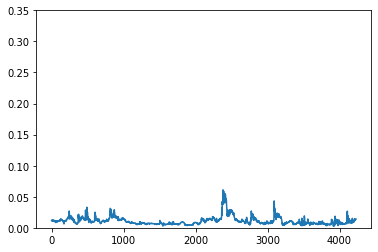

In [18]:
plt.plot([vol / 100 for vol in vols])
plt.ylim((0,0.35))
plt.show()